In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.neighbors as sn
import sklearn.metrics as sm

In [2]:
data = pd.read_csv('H:/Data science/Practice/27 november/KNN Assignment/bangalore house price prediction OHE-data.csv')
data

bath  balcony   price  total_sqft_int  bhk  price_per_sqft  \
0        3      2.0  150.00          1672.0    3     8971.291866   
1        3      3.0  149.00          1750.0    3     8514.285714   
2        3      2.0  150.00          1750.0    3     8571.428571   
3        2      2.0   40.00          1250.0    2     3200.000000   
4        2      2.0   83.00          1200.0    2     6916.666667   
...    ...      ...     ...             ...  ...             ...   
7115     3      2.0  325.00          2900.0    3    11206.896550   
7116     3      1.0   84.83          1780.0    3     4765.730337   
7117     2      1.0   48.00           880.0    2     5454.545455   
7118     2      1.0   55.00          1000.0    2     5500.000000   
7119     2      1.0   78.00          1400.0    3     5571.428571   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
0                                 1                        0   
1                                 0                        1   
2                                 1                        0   
3                                 1                        0   
4                                 0                        0   
...                             ...                      ...   
7115                              1                        0   
7116                              1                        0   
7117                              0                        0   
7118                              0                        0   
7119                              0                        0   

      area_typePlot  Area  availability_Ready To Move  ...  \
0                       0                           1  ...   
1                       0                           1  ...   
2                       0                           1  ...   
3                       0                           1  ...   
4                       1                           1  ...   
...                   ...                         ...  ...   
7115                    0                           1  ...   
7116                    0                           0  ...   
7117                    1                           1  ...   
7118                    1                           0  ...   
7119                    1                           0  ...   

      location_Kalena Agrahara  location_Horamavu Agara  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
7115                         0                        0   
7116                         0                        0   
7117                         0                        0   
7118                         0                        0   
7119                         0                        0   

      location_Vidyaranyapura  location_BTM 2nd Stage  \
0                           0                       0   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   
...                       ...                     ...   
7115                        0                       0   
7116                        0                       0   
7117                        0                       0   
7118                        0                       0   
7119                        0                       0   

      location_Hebbal Kempapura  location_Hosur Road  \
0                             0                    0   
1                             0                    0   
2                             0                    0   
3                             0                    0   
4

In [3]:
df = data.copy()

In [4]:
df.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

In [5]:
df.isnull().sum()

bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 108 entries, bath to location_Tumkur Road
dtypes: float64(4), int64(104)
memory usage: 5.9 MB


In [7]:
df.describe()

bath      balcony        price  total_sqft_int          bhk  \
count  7120.000000  7120.000000  7120.000000     7120.000000  7120.000000   
mean      2.390871     1.572759    96.454991     1479.729806     2.465169   
std       0.876822     0.770583   116.185034      913.779769     0.841520   
min       1.000000     0.000000    10.000000      350.000000     1.000000   
25%       2.000000     1.000000    49.230000     1100.000000     2.000000   
50%       2.000000     2.000000    69.000000     1255.000000     2.000000   
75%       3.000000     2.000000   104.000000     1640.250000     3.000000   
max       9.000000     3.000000  2912.000000    30400.000000     9.000000   

       price_per_sqft  area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
count     7120.000000                    7120.000000              7120.000000   
mean      5923.806855                       0.750702                 0.182303   
std       2556.650935                       0.432637                 0.386121   
min       1250.000000                       0.000000                 0.000000   
25%       4416.761042                       1.000000                 0.000000   
50%       5417.855612                       1.000000                 0.000000   
75%       6618.285651                       1.000000                 0.000000   
max      35000.000000                       1.000000                 1.000000   

       area_typePlot  Area  availability_Ready To Move  ...  \
count          7120.000000                 7120.000000  ...   
mean              0.061938                    0.792697  ...   
std               0.241060                    0.405403  ...   
min               0.000000                    0.000000  ...   
25%               0.000000                    1.000000  ...   
50%               0.000000                    1.000000  ...   
75%               0.000000                    1.000000  ...   
max               1.000000                    1.000000  ...   

       location_Kalena Agrahara  location_Horamavu Agara  \
count               7120.000000              7120.000000   
mean                   0.003090                 0.003090   
std                    0.055505                 0.055505   
min                    0.000000                 0.000000   
25%                    0.000000                 0.000000   
50%                    0.000000                 0.000000   
75%                    0.000000                 0.000000   
max                    1.000000                 1.000000   

       location_Vidyaranyapura  location_BTM 2nd Stage  \
count              7120.000000             7120.000000   
mean                  0.002949                0.002949   
std                   0.054232                0.054232   
min                   0.000000                0.000000   
25%                   0.000000                0.000000   
50%                   0.000000                0.000000   
75%                   0.000000                0.000000   
max                   1.000000                1.000000   

       location_Hebbal Kempapura  location_Hosur Road  \
count                7120.000000          7120.000000   
mean                    0.002949             0.002949   
std                     0.054232             0.054232   
min                     0.000000             0.000000   
25%                     0.000000             0.000000   
50%                     0.000000             0.000000   
75%                     0.000000             0.000000   
max                     1.000000             1.000000   

       location_Horamavu Banaswadi  location_Domlur  location_Mahadevpura  \
count                  7120.000000      7120.000000           7120.000000   
mean                      0.002809         0.002809              0.002809   
std                       0.052929         0.052929              0.052929   
min                       0.000000         0.000000              0.000000   
25%                       0.000000         0.000000        

In [8]:
df.corrwith(df.bath,axis=0)

bath                           1.000000
balcony                        0.283192
price                          0.523941
total_sqft_int                 0.653435
bhk                            0.882461
                                 ...   
location_Hosur Road            0.011201
location_Horamavu Banaswadi   -0.020635
location_Domlur                0.006606
location_Mahadevpura          -0.017608
location_Tumkur Road          -0.002474
Length: 108, dtype: float64

In [9]:
df.corr()

bath   balcony     price  total_sqft_int  \
bath                         1.000000  0.283192  0.523941        0.653435   
balcony                      0.283192  1.000000  0.138946        0.200648   
price                        0.523941  0.138946  1.000000        0.797955   
total_sqft_int               0.653435  0.200648  0.797955        1.000000   
bhk                          0.882461  0.269511  0.497817        0.647485   
...                               ...       ...       ...             ...   
location_Hosur Road          0.011201 -0.020262  0.000618        0.007224   
location_Horamavu Banaswadi -0.020635  0.022541 -0.021200       -0.015287   
location_Domlur              0.006606  0.000445  0.019573        0.007875   
location_Mahadevpura        -0.017608  0.008764 -0.015800       -0.011000   
location_Tumkur Road        -0.002474 -0.018788 -0.006216       -0.010931   

                                  bhk  price_per_sqft  \
bath                         0.882461        0.350497   
balcony                      0.269511        0.068018   
price                        0.497817        0.717821   
total_sqft_int               0.647485        0.376673   
bhk                          1.000000        0.323285   
...                               ...             ...   
location_Hosur Road          0.016102        0.001412   
location_Horamavu Banaswadi -0.026186       -0.037227   
location_Domlur              0.005351        0.054259   
location_Mahadevpura        -0.010418       -0.023633   
location_Tumkur Road         0.008504        0.009832   

                             area_typeSuper built-up  Area  \
bath                                             -0.118940   
balcony                                           0.120220   
price                                            -0.114594   
total_sqft_int                                   -0.133719   
bhk                                              -0.142496   
...                                                    ...   
location_Hosur Road                               0.001408   
location_Horamavu Banaswadi                       0.024451   
location_Domlur                                   0.006048   
location_Mahadevpura                              0.030585   
location_Tumkur Road                              0.030585   

                             area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                        0.030143             0.161243   
balcony                                    -0.048382            -0.138809   
price                                      -0.014613             0.229543   
total_sqft_int                              0.014041             0.219383   
bhk                                         0.044187             0.178557   
...                                              ...                  ...   
location_Hosur Road                         0.001151            -0.003231   
location_Horamavu Banaswadi                -0.018187            -0.013638   
location_Domlur                             0.002433            -0.013638   
location_Mahadevpura                       -0.025060            -0.013638   
location_Tumkur Road                       -0.025060            -0.013638   

                             availability_Ready To Move  ...  \
bath                                           0.022495  ...   
balcony                                        0.117337  ...   
price                                          0.012542  ...   
total_sqft_int                                 0.009710  ...   
bhk                                            0.043887  ...   
...                                                 ...  ...   
location_Hosur Road                           -0.036076  ...   
location_Horamavu Banaswadi                    0.027142  ...   
location_Domlur                                0.020595  ...   
location_Mahadevpura                           0.027142  ...   
location_Tumkur Road                          -0.

<AxesSubplot:>

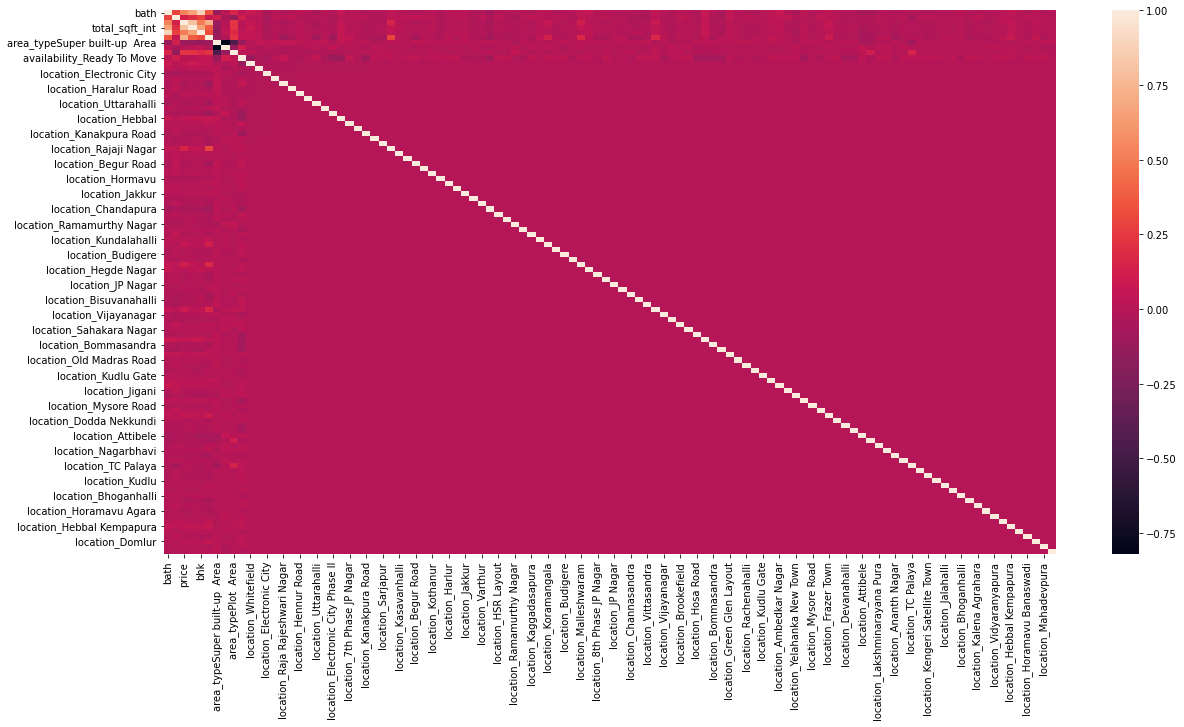

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())

In [11]:
df.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

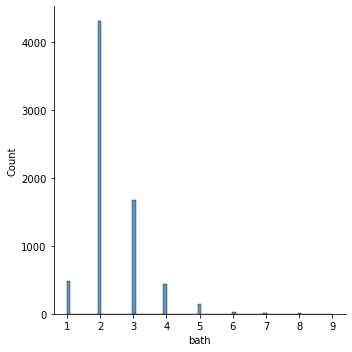

In [12]:
sns.displot(x='bath',data=df)

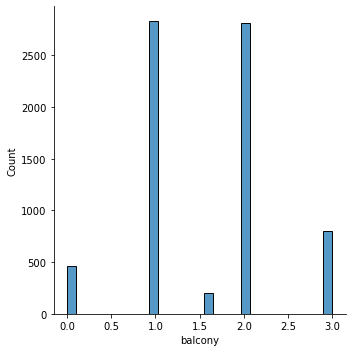

In [13]:
sns.displot(x='balcony',data=df)

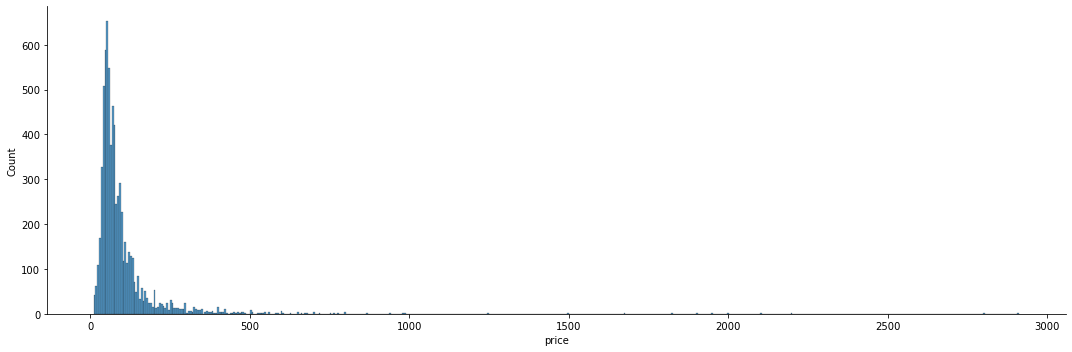

In [14]:
sns.displot(x='price',height=5,aspect=3,data=df)

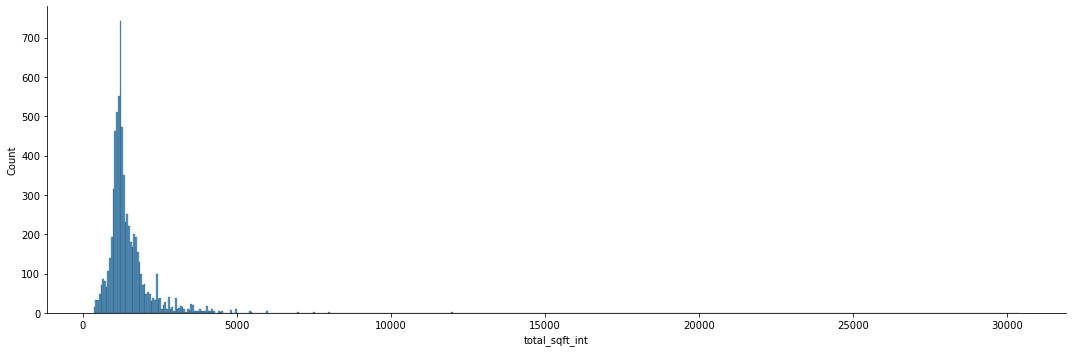

In [15]:
sns.displot(x='total_sqft_int',height=5,aspect=3,data=df)

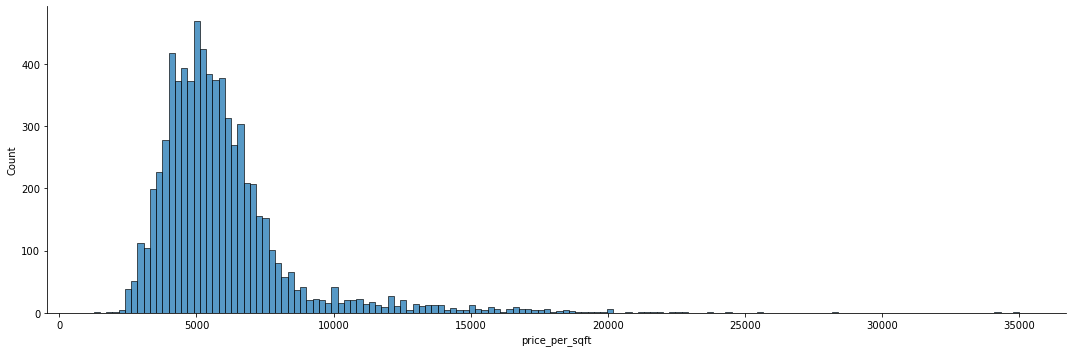

In [16]:
sns.displot(x='price_per_sqft',height=5,aspect=3,data=df)

<AxesSubplot:ylabel='bath'>

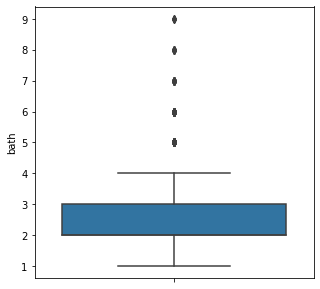

In [17]:
plt.figure(figsize=(5,5))
sns.boxplot(y="bath",data=df)

<AxesSubplot:ylabel='balcony'>

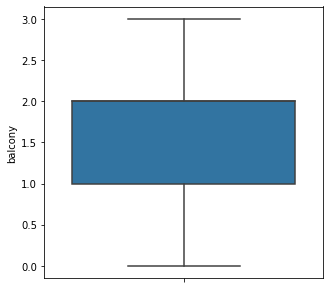

In [18]:
plt.figure(figsize=(5,5))
sns.boxplot(y="balcony",data=df)

<AxesSubplot:ylabel='price'>

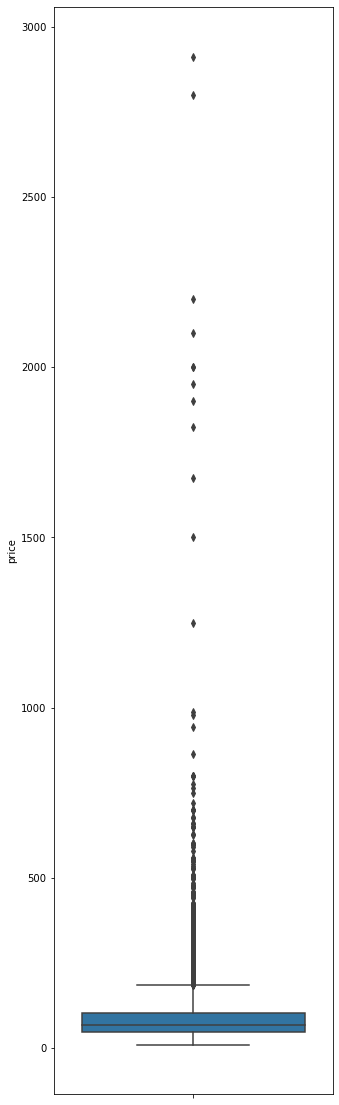

In [19]:
plt.figure(figsize=(5,20))
sns.boxplot(y="price",data=df)

<AxesSubplot:ylabel='total_sqft_int'>

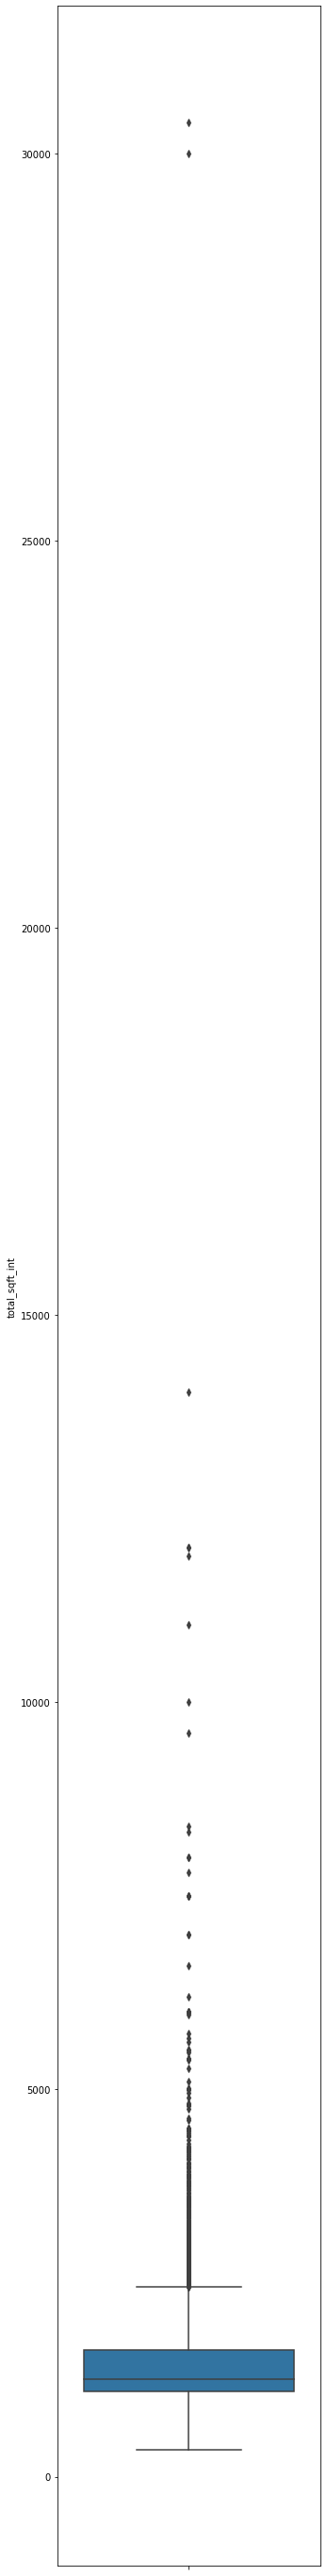

In [20]:
plt.figure(figsize=(5,50))
sns.boxplot(y="total_sqft_int",data=df)

<AxesSubplot:ylabel='bhk'>

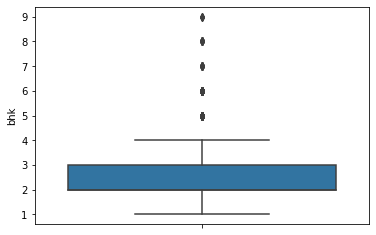

In [21]:
sns.boxplot(y="bhk",data=df)

<AxesSubplot:ylabel='price_per_sqft'>

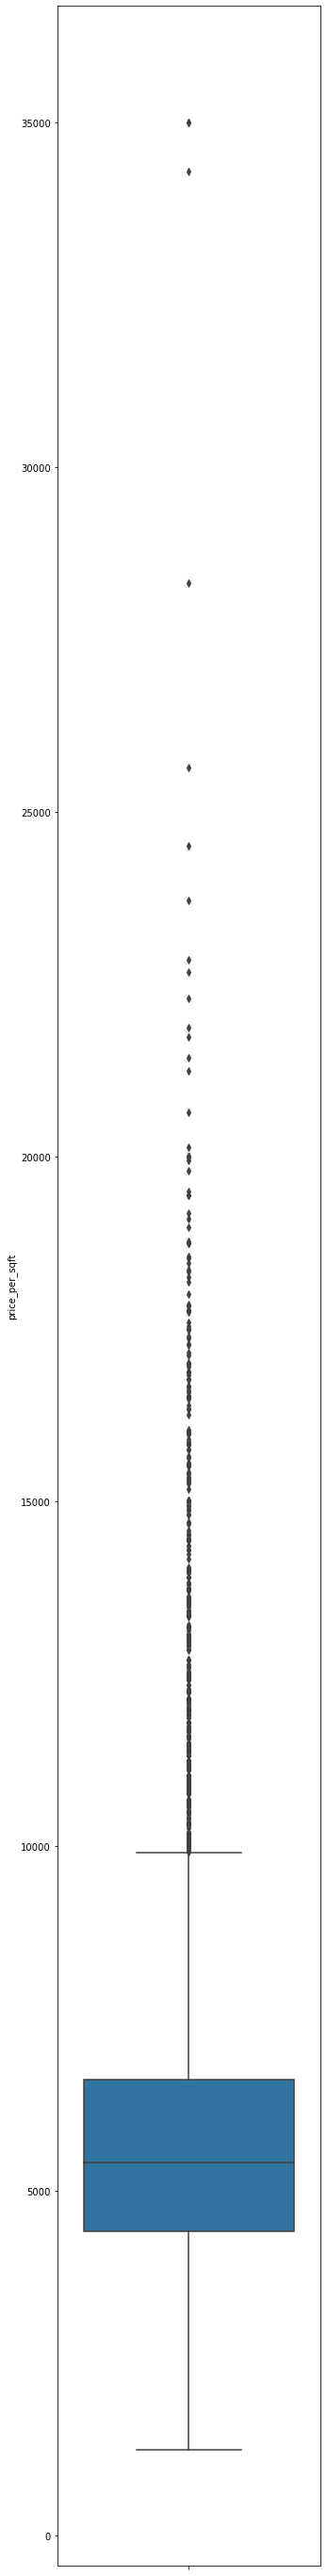

In [22]:
plt.figure(figsize=(5,50))
sns.boxplot(y="price_per_sqft",data=df)

In [23]:
df.head()

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
0     3      2.0  150.0          1672.0    3     8971.291866   
1     3      3.0  149.0          1750.0    3     8514.285714   
2     3      2.0  150.0          1750.0    3     8571.428571   
3     2      2.0   40.0          1250.0    2     3200.000000   
4     2      2.0   83.0          1200.0    2     6916.666667   

   area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
0                              1                        0   
1                              0                        1   
2                              1                        0   
3                              1                        0   
4                              0                        0   

   area_typePlot  Area  availability_Ready To Move  ...  \
0                    0                           1  ...   
1                    0                           1  ...   
2                    0                           1  ...   
3                    0                           1  ...   
4                    1                           1  ...   

   location_Kalena Agrahara  location_Horamavu Agara  location_Vidyaranyapura  \
0                         0                        0                        0   
1                         0                        0                        0   
2                         0                        0                        0   
3                         0                        0                        0   
4                         0                        0                        0   

   location_BTM 2nd Stage  location_Hebbal Kempapura  location_Hosur Road  \
0                       0                          0                    0   
1                       0                          0                    0   
2                       0                          0                    0   
3                       0                          0                    0   
4                       0                          0                    0   

   location_Horamavu Banaswadi  location_Domlur  location_Mahadevpura  \
0                            0                0                     0   
1                            0                0                     0   
2                            0                0                     0   
3                            0                0                     0   
4                            0                0                     0   

   location_Tumkur Road  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 108 columns]

In [24]:
df['price'] = df['price']*100

In [25]:
df['price'] = df['price'].astype(int)

In [26]:
df.head()

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
0     3      2.0  15000          1672.0    3     8971.291866   
1     3      3.0  14900          1750.0    3     8514.285714   
2     3      2.0  15000          1750.0    3     8571.428571   
3     2      2.0   4000          1250.0    2     3200.000000   
4     2      2.0   8300          1200.0    2     6916.666667   

   area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
0                              1                        0   
1                              0                        1   
2                              1                        0   
3                              1                        0   
4                              0                        0   

   area_typePlot  Area  availability_Ready To Move  ...  \
0                    0                           1  ...   
1                    0                           1  ...   
2                    0                           1  ...   
3                    0                           1  ...   
4                    1                           1  ...   

   location_Kalena Agrahara  location_Horamavu Agara  location_Vidyaranyapura  \
0                         0                        0                        0   
1                         0                        0                        0   
2                         0                        0                        0   
3                         0                        0                        0   
4                         0                        0                        0   

   location_BTM 2nd Stage  location_Hebbal Kempapura  location_Hosur Road  \
0                       0                          0                    0   
1                       0                          0                    0   
2                       0                          0                    0   
3                       0                          0                    0   
4                       0                          0                    0   

   location_Horamavu Banaswadi  location_Domlur  location_Mahadevpura  \
0                            0                0                     0   
1                            0                0                     0   
2                            0                0                     0   
3                            0                0                     0   
4                            0                0                     0   

   location_Tumkur Road  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 108 columns]

# Location Wise Models

# 1) location_Akshaya Nagar

In [27]:
df.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

In [28]:
df1=df[df['location_Akshaya Nagar']==1]

In [29]:
df1 = df1[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 326 to 368
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   bath                           43 non-null     int64  
 1   balcony                        43 non-null     float64
 2   price                          43 non-null     int32  
 3   total_sqft_int                 43 non-null     float64
 4   bhk                            43 non-null     int64  
 5   price_per_sqft                 43 non-null     float64
 6   area_typeSuper built-up  Area  43 non-null     int64  
 7   area_typeBuilt-up  Area        43 non-null     int64  
 8   area_typePlot  Area            43 non-null     int64  
 9   availability_Ready To Move     43 non-null     int64  
dtypes: float64(3), int32(1), int64(6)
memory usage: 3.5 KB


In [31]:
df1.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.222789  0.734504        0.856289   
balcony                        0.222789  1.000000  0.470165        0.438457   
price                          0.734504  0.470165  1.000000        0.911175   
total_sqft_int                 0.856289  0.438457  0.911175        1.000000   
bhk                            0.598122  0.544433  0.853819        0.782470   
price_per_sqft                 0.159468  0.320283  0.663316        0.302145   
area_typeSuper built-up  Area -0.052353 -0.108342  0.036540        0.033293   
area_typeBuilt-up  Area        0.052353  0.108342 -0.036540       -0.033293   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move     0.163371  0.113869  0.041078        0.192692   

                                    bhk  price_per_sqft  \
bath                           0.598122        0.159468   
balcony                        0.544433        0.320283   
price                          0.853819        0.663316   
total_sqft_int                 0.782470        0.302145   
bhk                            1.000000        0.584943   
price_per_sqft                 0.584943        1.000000   
area_typeSuper built-up  Area -0.065259        0.021737   
area_typeBuilt-up  Area        0.065259       -0.021737   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move     0.047274       -0.291800   

                               area_typeSuper built-up  Area  \
bath                                               -0.052353   
balcony                                            -0.108342   
price                                               0.036540   
total_sqft_int                                      0.033293   
bhk                                                -0.065259   
price_per_sqft                                      0.021737   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.113633   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.052353                  NaN   
balcony                                       0.108342                  NaN   
price                                        -0.036540                  NaN   
total_sqft_int                               -0.033293                  NaN   
bhk                                           0.065259                  NaN   
price_per_sqft                               -0.021737                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.113633                  NaN   

                               availability_Ready To Move  
bath                                             0.163371  
balcony                                          0.113869  
price                                            0.041078  
total_sqft_int                                   0.192692  
bhk                                              0.047274  
price_per_sqft                                  -0.291800  
area_typeSuper built-up  Area                   -0.113633  
area_typeBuilt-up  Area                          0.113633  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

<AxesSubplot:ylabel='bath'>

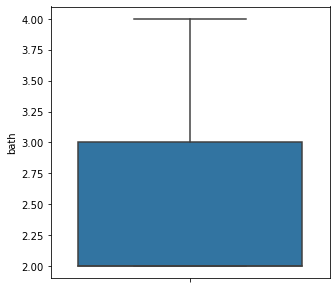

In [32]:
plt.figure(figsize=(5,5))
sns.boxplot(y='bath',data=df1)

<AxesSubplot:ylabel='balcony'>

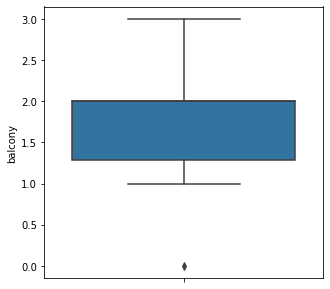

In [33]:
plt.figure(figsize=(5,5))
sns.boxplot(y='balcony',data=df1)

<AxesSubplot:ylabel='price'>

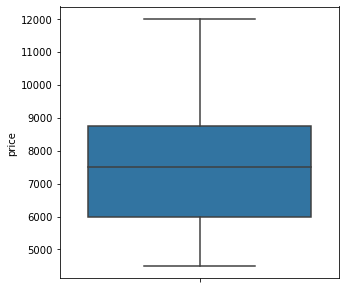

In [34]:
plt.figure(figsize=(5,5))
sns.boxplot(y='price',data=df1)

<AxesSubplot:ylabel='total_sqft_int'>

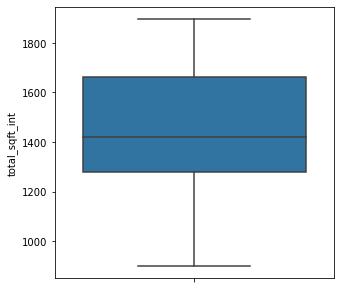

In [35]:
plt.figure(figsize=(5,5))
sns.boxplot(y='total_sqft_int',data=df1)

<AxesSubplot:ylabel='bhk'>

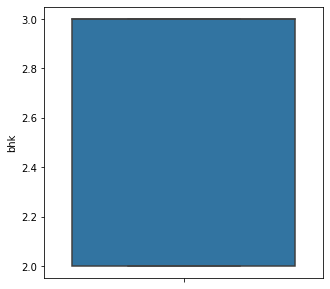

In [36]:
plt.figure(figsize=(5,5))
sns.boxplot(y='bhk',data=df1)

<AxesSubplot:ylabel='price_per_sqft'>

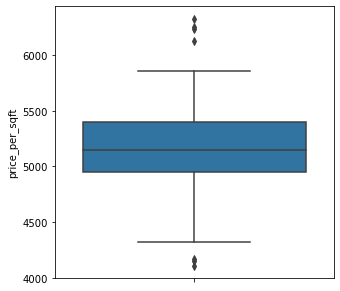

In [37]:
plt.figure(figsize=(5,5))
sns.boxplot(y='price_per_sqft',data=df1)

In [38]:
df1.reset_index(inplace=True)

In [39]:
df1.columns

Index(['index', 'bath', 'balcony', 'price', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move'],
      dtype='object')

In [40]:
df1.drop(columns='index',inplace=True)

In [41]:
df1['pi']=df1['price'].astype(int)

In [42]:
df1.shape

(43, 11)

In [43]:
df1[df1['price_per_sqft']<=4200]

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
0      2      3.0   5700          1388.0    2     4106.628242   
16     2      1.0   5000          1200.0    2     4166.666667   
31     2      1.0   5400          1300.0    2     4153.846154   

    area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
0                               1                        0   
16                              1                        0   
31                              1                        0   

    area_typePlot  Area  availability_Ready To Move    pi  
0                     0                           1  5700  
16                    0                           1  5000  
31                    0                           1  5400

In [44]:
df1[df1['price_per_sqft']>=6000]

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
4      3      2.0  12000          1897.0    3     6325.777543   
6      2      2.0   8500          1360.0    3     6250.000000   
27     2      3.0   8800          1412.0    3     6232.294618   
30     2      3.0   8700          1419.0    3     6131.078224   

    area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
4                               1                        0   
6                               1                        0   
27                              1                        0   
30                              1                        0   

    area_typePlot  Area  availability_Ready To Move     pi  
4                     0                           1  12000  
6                     0                           0   8500  
27                    0                           1   8800  
30                    0                           1   8700

In [45]:
df1=df1[(df1.price_per_sqft>=4200) & (df1.price_per_sqft<=6000)]

In [46]:
df1.shape

(36, 11)

In [47]:
x = df1[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df1[['price']]

In [48]:
# acc= []
# for i in range (1,20):
#     knn = sn.KNeighborsClassifier(n_neighbors=i)
#     m  = knn.fit(x,y)
#     predy = m.predict(x)
#     acc.append(sm.accuracy_score(predy,y.values.reshape(-1,1)))
#     print('k=',i,acc)

In [49]:
acc= []
for i in range (1,20):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    m  = knn.fit(x,y)
    predy = m.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

k= 1 [1.0]
k= 2 [1.0, 0.6944444444444444]
k= 3 [1.0, 0.6944444444444444, 0.5]
k= 4 [1.0, 0.6944444444444444, 0.5, 0.4166666666666667]
k= 5 [1.0, 0.6944444444444444, 0.5, 0.4166666666666667, 0.4166666666666667]
k= 6 [1.0, 0.6944444444444444, 0.5, 0.4166666666666667, 0.4166666666666667, 0.3888888888888889]
k= 7 [1.0, 0.6944444444444444, 0.5, 0.4166666666666667, 0.4166666666666667, 0.3888888888888889, 0.3055555555555556]
k= 8 [1.0, 0.6944444444444444, 0.5, 0.4166666666666667, 0.4166666666666667, 0.3888888888888889, 0.3055555555555556, 0.3055555555555556]
k= 9 [1.0, 0.6944444444444444, 0.5, 0.4166666666666667, 0.4166666666666667, 0.3888888888888889, 0.3055555555555556, 0.3055555555555556, 0.25]
k= 10 [1.0, 0.6944444444444444, 0.5, 0.4166666666666667, 0.4166666666666667, 0.3888888888888889, 0.3055555555555556, 0.3055555555555556, 0.25, 0.25]
k= 11 [1.0, 0.6944444444444444, 0.5, 0.4166666666666667, 0.4166666666666667, 0.3888888888888889, 0.3055555555555556, 0.3055555555555556, 0.25, 0.25, 0.

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [50]:
max(acc)

1.0

In [51]:
k = acc.index(max(acc))+1
k

1

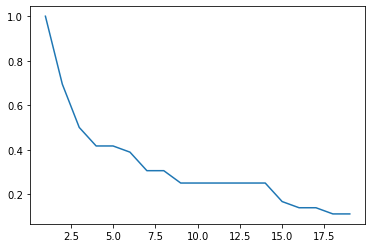

In [52]:
plt.plot(range(1,20),acc)

In [53]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
m  = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# 2) location_Ambedkar Nagar

In [54]:
df2 = df[df['location_Ambedkar Nagar']==1]

In [55]:
df2.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

In [56]:
df2= df2[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [57]:
df2.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.397186  0.495297        0.574420   
balcony                        0.397186  1.000000  0.349476        0.355345   
price                          0.495297  0.349476  1.000000        0.972645   
total_sqft_int                 0.574420  0.355345  0.972645        1.000000   
bhk                            0.792905  0.368167  0.828238        0.874122   
price_per_sqft                 0.185517  0.295342  0.721139        0.550627   
area_typeSuper built-up  Area -0.262781 -0.243786 -0.807345       -0.835092   
area_typeBuilt-up  Area        0.210042 -0.025416  0.569806        0.555420   
area_typePlot  Area            0.145521  0.440225  0.551716        0.617745   
availability_Ready To Move    -0.145521 -0.440225 -0.551716       -0.617745   

                                    bhk  price_per_sqft  \
bath                           0.792905        0.185517   
balcony                        0.368167        0.295342   
price                          0.828238        0.721139   
total_sqft_int                 0.874122        0.550627   
bhk                            1.000000        0.454877   
price_per_sqft                 0.454877        1.000000   
area_typeSuper built-up  Area -0.558319       -0.413600   
area_typeBuilt-up  Area        0.351161        0.347131   
area_typePlot  Area            0.440966        0.206124   
availability_Ready To Move    -0.440966       -0.206124   

                               area_typeSuper built-up  Area  \
bath                                               -0.262781   
balcony                                            -0.243786   
price                                              -0.807345   
total_sqft_int                                     -0.835092   
bhk                                                -0.558319   
price_per_sqft                                     -0.413600   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.799305   
area_typePlot  Area                                -0.553775   
availability_Ready To Move                          0.553775   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.210042             0.145521   
balcony                                      -0.025416             0.440225   
price                                         0.569806             0.551716   
total_sqft_int                                0.555420             0.617745   
bhk                                           0.351161             0.440966   
price_per_sqft                                0.347131             0.206124   
area_typeSuper built-up  Area                -0.799305            -0.553775   
area_typeBuilt-up  Area                       1.000000            -0.057735   
area_typePlot  Area                          -0.057735             1.000000   
availability_Ready To Move                    0.057735            -1.000000   

                               availability_Ready To Move  
bath                                            -0.145521  
balcony                                         -0.440225  
price                                           -0.551716  
total_sqft_int                                  -0.617745  
bhk                                             -0.440966  
price_per_sqft                                  -0.206124  
area_typeSuper built-up  Area                    0.553775  
area_typeBuilt-up  Area                          0.057735  
area_typePlot  Area                             -1.000000  
availability_Ready To Move                       1.000000

<AxesSubplot:ylabel='bath'>

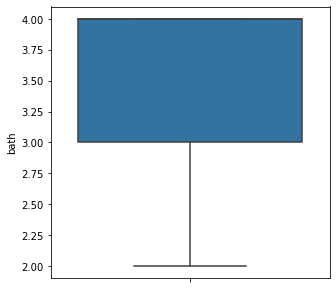

In [58]:
plt.figure(figsize=(5,5))
sns.boxplot(y='bath',data=df2)

<AxesSubplot:ylabel='balcony'>

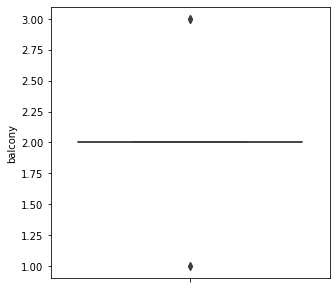

In [59]:
plt.figure(figsize=(5,5))
sns.boxplot(y='balcony',data=df2)

<AxesSubplot:ylabel='price'>

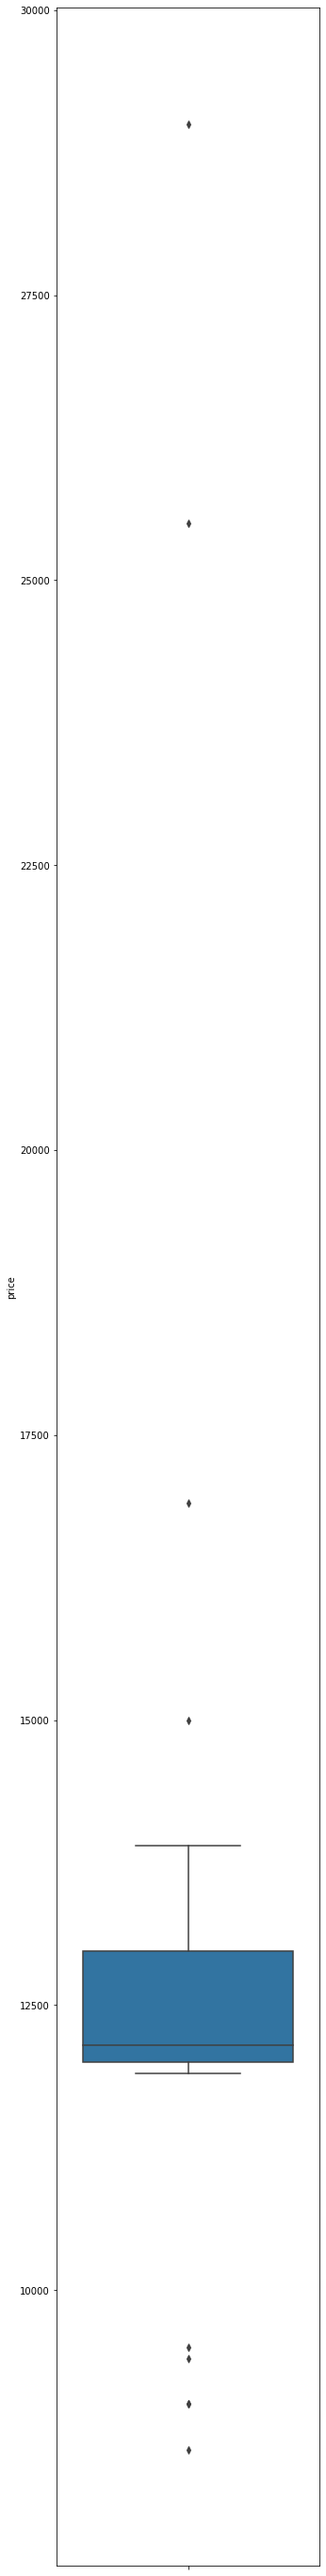

In [60]:
plt.figure(figsize=(5,50))
sns.boxplot(y='price',data=df2)

<AxesSubplot:ylabel='total_sqft_int'>

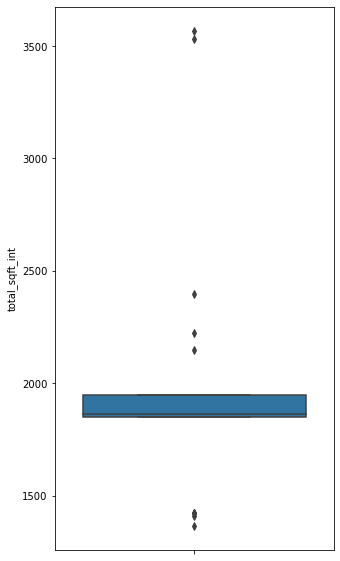

In [61]:
plt.figure(figsize=(5,10))
sns.boxplot(y='total_sqft_int',data=df2)

<AxesSubplot:ylabel='bhk'>

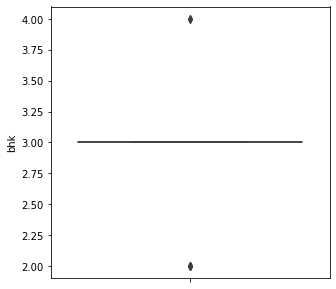

In [62]:
plt.figure(figsize=(5,5))
sns.boxplot(y='bhk',data=df2)

<AxesSubplot:ylabel='price_per_sqft'>

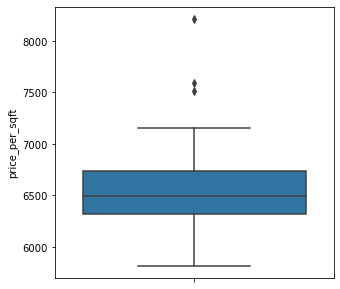

In [63]:
plt.figure(figsize=(5,5))
sns.boxplot(y='price_per_sqft',data=df2)

In [64]:
df2.shape

(26, 10)

In [65]:
x = df2[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df2[['price']]

In [66]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6153846153846154]
k= 3 [1.0, 0.6153846153846154, 0.3076923076923077]
k= 4 [1.0, 0.6153846153846154, 0.3076923076923077, 0.3076923076923077]
k= 5 [1.0, 0.6153846153846154, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077]
k= 6 [1.0, 0.6153846153846154, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077]
k= 7 [1.0, 0.6153846153846154, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077]
k= 8 [1.0, 0.6153846153846154, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077]
k= 9 [1.0, 0.6153846153846154, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.23076923076923078]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

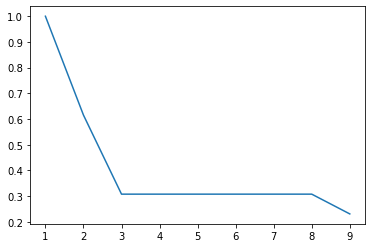

In [67]:
plt.plot(range(1,10),acc)

In [68]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# 3) location_Ananth Nagar

In [69]:
df3 = df[df['location_Ananth Nagar']==1]

In [70]:
df3 = df3[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [71]:
df3.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.219396  0.807758        0.853859   
balcony                        0.219396  1.000000  0.179598        0.234227   
price                          0.807758  0.179598  1.000000        0.901780   
total_sqft_int                 0.853859  0.234227  0.901780        1.000000   
bhk                            0.914207  0.142138  0.869228        0.937567   
price_per_sqft                 0.323123  0.000931  0.672888        0.296112   
area_typeSuper built-up  Area -0.286972 -0.144639 -0.384688       -0.188688   
area_typeBuilt-up  Area        0.286972  0.144639  0.384688        0.188688   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move     0.467615 -0.135230  0.530353        0.351417   

                                    bhk  price_per_sqft  \
bath                           0.914207        0.323123   
balcony                        0.142138        0.000931   
price                          0.869228        0.672888   
total_sqft_int                 0.937567        0.296112   
bhk                            1.000000        0.332861   
price_per_sqft                 0.332861        1.000000   
area_typeSuper built-up  Area -0.302372       -0.515707   
area_typeBuilt-up  Area        0.302372        0.515707   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move     0.522998        0.614228   

                               area_typeSuper built-up  Area  \
bath                                               -0.286972   
balcony                                            -0.144639   
price                                              -0.384688   
total_sqft_int                                     -0.188688   
bhk                                                -0.302372   
price_per_sqft                                     -0.515707   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.411377   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.286972                  NaN   
balcony                                       0.144639                  NaN   
price                                         0.384688                  NaN   
total_sqft_int                                0.188688                  NaN   
bhk                                           0.302372                  NaN   
price_per_sqft                                0.515707                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.411377                  NaN   

                               availability_Ready To Move  
bath                                             0.467615  
balcony                                         -0.135230  
price                                            0.530353  
total_sqft_int                                   0.351417  
bhk                                              0.522998  
price_per_sqft                                   0.614228  
area_typeSuper built-up  Area                   -0.411377  
area_typeBuilt-up  Area                          0.411377  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [72]:
df3

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
483     1      1.0   1400           500.0    1     2800.000000   
484     2      2.0   3150          1100.0    2     2863.636364   
485     2      2.0   2455           982.0    2     2500.000000   
486     2      2.0   1400           500.0    1     2800.000000   
487     2      2.0   2250           900.0    2     2500.000000   
488     2      1.0   2600           908.0    2     2863.436123   
489     2      1.0   3500           937.0    2     3735.325507   
490     2      3.0   3700           960.0    2     3854.166667   
491     1      1.0   1400           500.0    1     2800.000000   
492     2      1.0   2970          1000.0    2     2970.000000   
493     2      1.0   2599           850.0    2     3057.647059   
494     2      1.0   2526           902.0    2     2800.443459   
495     3      2.0   5400          1470.0    3     3673.469388   
496     2      1.0   2550           810.0    2     3148.148148   
497     2      1.0   2700           890.0    2     3033.707865   
498     2      1.0   3600          1200.0    2     3000.000000   
499     3      1.0   4200          1319.0    3     3184.230478   
500     2      3.0   2500          1000.0    2     2500.000000   
501     2      2.0   2500           902.0    2     2771.618625   
502     2      1.0   2599           930.0    2     2794.623656   
503     2      2.0   2685          1074.0    2     2500.000000   
504     1      1.0   1400           500.0    1     2800.000000   
505     2      2.0   3800          1010.0    2     3762.376238   
506     2      2.0   2480           992.0    2     2500.000000   

     area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
483                              1                        0   
484                              1                        0   
485                              1                        0   
486                              1                        0   
487                              1                        0   
488                              1                        0   
489                              1                        0   
490                              0                        1   
491                              1                        0   
492                              1                        0   
493                              0                        1   
494                              1                        0   
495                              0                        1   
496                              0                        1   
497                              1                        0   
498                              1                        0   
499                              1                        0   
500                              1                        0   
501                              1                        0   
502                              1                        0   
503                              1                        0   
504                              1                        0   
505                              1                        0   
506                              1                        0   

     area_typePlot  Area  availability_Ready To Move  
483                    0                           0  
484                    0                           1  
485                    0                           0  
486                    0                           0  
487                    0                           0  
488                    0                           1  
489                    0                           1  
490                    0                           1  
491                    0                           0  
492                    0                           0  
493                    0                           1  
494                    0                           1  
495                    0                           1  
496     

In [73]:
df3.shape

(24, 10)

<AxesSubplot:ylabel='bath'>

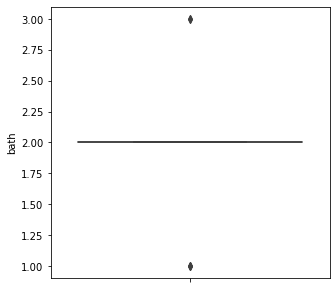

In [74]:
plt.figure(figsize=(5,5))
sns.boxplot(y='bath',data=df3)

<AxesSubplot:ylabel='balcony'>

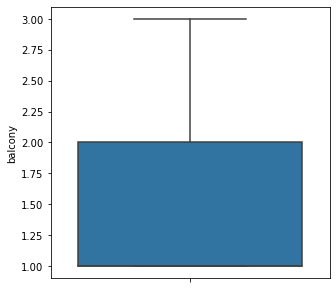

In [75]:
plt.figure(figsize=(5,5))
sns.boxplot(y='balcony',data=df3)

<AxesSubplot:ylabel='price'>

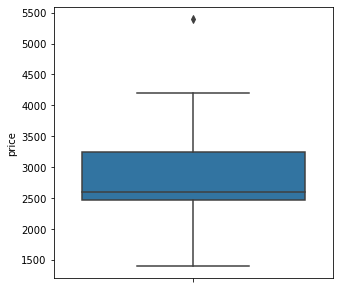

In [76]:
plt.figure(figsize=(5,5))
sns.boxplot(y='price',data=df3)

<AxesSubplot:ylabel='total_sqft_int'>

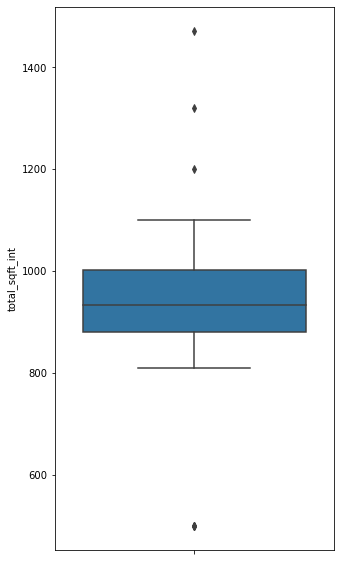

In [77]:
plt.figure(figsize=(5,10))
sns.boxplot(y='total_sqft_int',data=df3)

<AxesSubplot:ylabel='bhk'>

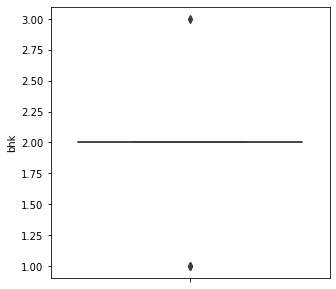

In [78]:
plt.figure(figsize=(5,5))
sns.boxplot(y='bhk',data=df3)

<AxesSubplot:ylabel='price_per_sqft'>

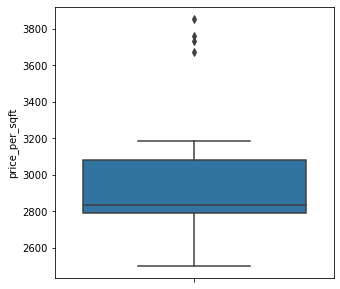

In [79]:
plt.figure(figsize=(5,5))
sns.boxplot(y='price_per_sqft',data=df3)

In [80]:
x = df3[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df3[['price']]

In [81]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5416666666666666]
k= 3 [1.0, 0.5416666666666666, 0.375]
k= 4 [1.0, 0.5416666666666666, 0.375, 0.3333333333333333]
k= 5 [1.0, 0.5416666666666666, 0.375, 0.3333333333333333, 0.2916666666666667]
k= 6 [1.0, 0.5416666666666666, 0.375, 0.3333333333333333, 0.2916666666666667, 0.25]
k= 7 [1.0, 0.5416666666666666, 0.375, 0.3333333333333333, 0.2916666666666667, 0.25, 0.2916666666666667]
k= 8 [1.0, 0.5416666666666666, 0.375, 0.3333333333333333, 0.2916666666666667, 0.25, 0.2916666666666667, 0.2916666666666667]
k= 9 [1.0, 0.5416666666666666, 0.375, 0.3333333333333333, 0.2916666666666667, 0.25, 0.2916666666666667, 0.2916666666666667, 0.2916666666666667]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

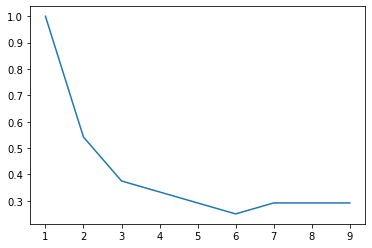

In [82]:
plt.plot(range(1,10),acc)

error method

In [83]:
import numpy as np

In [84]:
er = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    er.append(np.mean(predy!=y['price']))
    print('k=',i,er)

k= 1 [0.0]
k= 2 [0.0, 0.4583333333333333]
k= 3 [0.0, 0.4583333333333333, 0.625]
k= 4 [0.0, 0.4583333333333333, 0.625, 0.6666666666666666]
k= 5 [0.0, 0.4583333333333333, 0.625, 0.6666666666666666, 0.7083333333333334]
k= 6 [0.0, 0.4583333333333333, 0.625, 0.6666666666666666, 0.7083333333333334, 0.75]
k= 7 [0.0, 0.4583333333333333, 0.625, 0.6666666666666666, 0.7083333333333334, 0.75, 0.7083333333333334]
k= 8 [0.0, 0.4583333333333333, 0.625, 0.6666666666666666, 0.7083333333333334, 0.75, 0.7083333333333334, 0.7083333333333334]
k= 9 [0.0, 0.4583333333333333, 0.625, 0.6666666666666666, 0.7083333333333334, 0.75, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [85]:
min(er)

0.0

In [86]:
k = er.index(min(er))+1

In [87]:
k

1

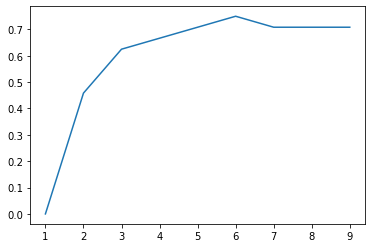

In [88]:
plt.plot(range(1,10),er)

In [89]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# 4) location_Anekal

In [90]:
df4 = df[df['location_Anekal']==1]

In [91]:
df4 = df4[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [92]:
df4.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.208860  0.812555        0.678105   
balcony                        0.208860  1.000000  0.045825       -0.065844   
price                          0.812555  0.045825  1.000000        0.951987   
total_sqft_int                 0.678105 -0.065844  0.951987        1.000000   
bhk                            0.745711  0.173518  0.848320        0.847964   
price_per_sqft                 0.669263  0.460782  0.552591        0.292863   
area_typeSuper built-up  Area  0.146667  0.470960 -0.161952       -0.389519   
area_typeBuilt-up  Area       -0.292770 -0.329720 -0.451092       -0.473652   
area_typePlot  Area            0.051640 -0.237915  0.455179        0.690442   
availability_Ready To Move     0.361478  0.079305 -0.016782       -0.204540   

                                        bhk  price_per_sqft  \
bath                           7.457111e-01        0.669263   
balcony                        1.735177e-01        0.460782   
price                          8.483199e-01        0.552591   
total_sqft_int                 8.479637e-01        0.292863   
bhk                            1.000000e+00        0.439749   
price_per_sqft                 4.397487e-01        1.000000   
area_typeSuper built-up  Area -1.883109e-01        0.601721   
area_typeBuilt-up  Area       -3.859225e-01       -0.341114   
area_typePlot  Area            4.375950e-01       -0.356988   
availability_Ready To Move    -4.858280e-17        0.320041   

                               area_typeSuper built-up  Area  \
bath                                                0.146667   
balcony                                             0.470960   
price                                              -0.161952   
total_sqft_int                                     -0.389519   
bhk                                                -0.188311   
price_per_sqft                                      0.601721   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.292770   
area_typePlot  Area                                -0.774597   
availability_Ready To Move                          0.430331   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.292770             0.051640   
balcony                                      -0.329720            -0.237915   
price                                        -0.451092             0.455179   
total_sqft_int                               -0.473652             0.690442   
bhk                                          -0.385922             0.437595   
price_per_sqft                               -0.341114            -0.356988   
area_typeSuper built-up  Area                -0.292770            -0.774597   
area_typeBuilt-up  Area                       1.000000            -0.377964   
area_typePlot  Area                          -0.377964             1.000000   
availability_Ready To Move                    0.377964            -0.666667   

                               availability_Ready To Move  
bath                                         3.614784e-01  
balcony                                      7.930516e-02  
price                                       -1.678166e-02  
total_sqft_int                              -2.045397e-01  
bhk                                         -4.858280e-17  
price_per_sqft                               3.200407e-01  
area_typeSuper built-up  Area                4.303315e-01  
area_typeBuilt-up  Area                      3.779645e-01  
area_typePlot  Area                         -6.666667e-01  
availability_Ready To Move                   1.000000e+00

In [93]:
df4.set_index('total_sqft_int').sort_index()

bath  balcony  price  bhk  price_per_sqft  \
total_sqft_int                                              
400.0              1      1.0   1150    1     2875.000000   
420.0              1      1.0   1250    1     2976.190476   
456.0              1      1.0   1500    1     3289.473684   
530.0              1      1.0   1800    1     3396.226415   
600.0              1      1.0   1650    1     2750.000000   
700.0              1      0.0   1939    2     2771.428571   
766.0              2      2.0   2800    2     3655.352480   
888.0              2      1.0   3400    2     3828.828829   
925.0              2      1.0   4000    2     4324.324324   
1035.0             2      2.0   3829    2     3700.483092   
1140.0             2      2.0   5200    2     4561.403509   
1150.0             3      2.0   4500    3     3913.043478   
1200.0             2      1.0   3610    2     3008.333333   
1200.0             1      1.0   3600    2     3000.000000   
1200.0             1      1.0   3600    2     3000.000000   
1200.0             1      1.0   3600    2     3000.000000   
1200.0             1      1.0   3600    2     3000.000000   
1200.0             1      1.0   3600    2     3000.000000   
1200.0             2      1.0   3610    2     3008.333333   
1200.0             2      1.0   3610    2     3008.333333   
1200.0             1      1.0   3600    2     3000.000000   
1200.0             1      1.0   3600    2     3000.000000   
1800.0             3      2.0   6800    3     3777.777778   
2400.0             4      0.0   9500    3     3958.333333   

                area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
total_sqft_int                                                           
400.0                                       0                        1   
420.0                                       0                        1   
456.0                                       1                        0   
530.0                                       1                        0   
600.0                                       1                        0   
700.0                                       0                        1   
766.0                                       1                        0   
888.0                                       1                        0   
925.0                                       1                        0   
1035.0                                      1                        0   
1140.0                                      1                        0   
1150.0                                      1                        0   
1200.0                                      0                        0   
1200.0                                      0                        0   
1200.0                                      0                        0   
1200.0                                      0                        0   
1200.0                                      0                        0   
1200.0                                      0                        0   
1200.0                                      0                        0   
1200.0                                      0                        0   
1200.0                                      0                        0   
1200.0                                      0                        0   
1800.0                                      0                        0   
2400.0                                      0                        0   

                area_typePlot  Area  availability_Ready To Move  
total_sqft_int                                                   
400.0                             0                           1  
420.0                             0                           1  
456.0                             0                           1  
530.0                             0                           0  
600.0                             0                           1  
700.0                             0       

<AxesSubplot:ylabel='bath'>

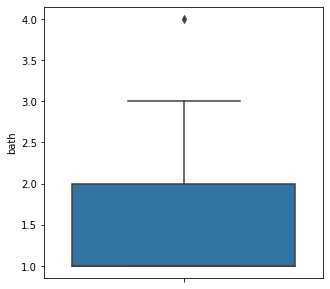

In [94]:
plt.figure(figsize=(5,5))
sns.boxplot(y='bath',data=df4)

<AxesSubplot:ylabel='balcony'>

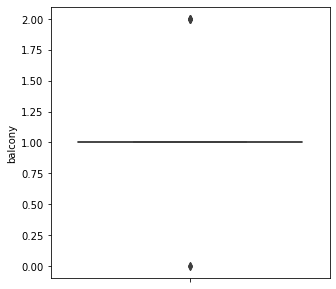

In [95]:
plt.figure(figsize=(5,5))
sns.boxplot(y='balcony',data=df4)

<AxesSubplot:ylabel='price'>

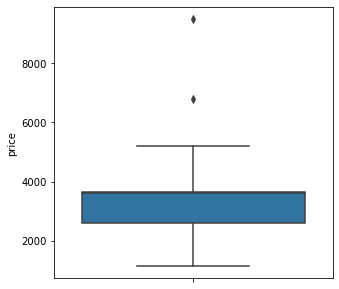

In [96]:
plt.figure(figsize=(5,5))
sns.boxplot(y='price',data=df4)

<AxesSubplot:ylabel='total_sqft_int'>

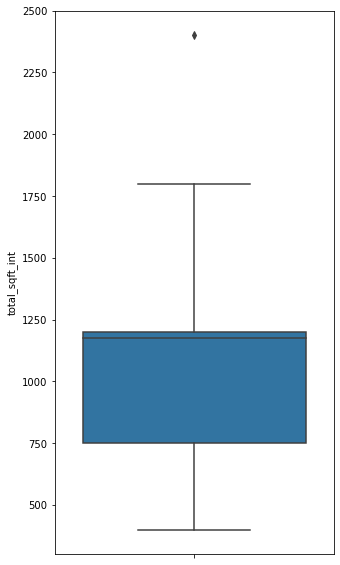

In [97]:
plt.figure(figsize=(5,10))
sns.boxplot(y='total_sqft_int',data=df4)

<AxesSubplot:ylabel='bhk'>

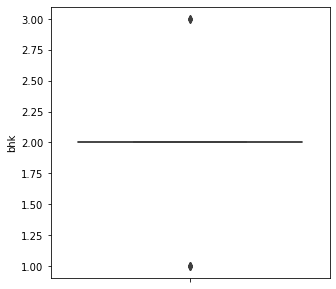

In [98]:
plt.figure(figsize=(5,5))
sns.boxplot(y='bhk',data=df4)

<AxesSubplot:ylabel='price_per_sqft'>

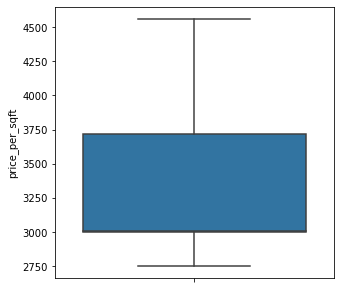

In [99]:
plt.figure(figsize=(5,5))
sns.boxplot(y='price_per_sqft',data=df4)

In [100]:
x = df4[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df4[['price']]

In [101]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.7083333333333334]
k= 3 [1.0, 0.7083333333333334, 0.5416666666666666]
k= 4 [1.0, 0.7083333333333334, 0.5416666666666666, 0.4583333333333333]
k= 5 [1.0, 0.7083333333333334, 0.5416666666666666, 0.4583333333333333, 0.4583333333333333]
k= 6 [1.0, 0.7083333333333334, 0.5416666666666666, 0.4583333333333333, 0.4583333333333333, 0.3333333333333333]
k= 7 [1.0, 0.7083333333333334, 0.5416666666666666, 0.4583333333333333, 0.4583333333333333, 0.3333333333333333, 0.3333333333333333]
k= 8 [1.0, 0.7083333333333334, 0.5416666666666666, 0.4583333333333333, 0.4583333333333333, 0.3333333333333333, 0.3333333333333333, 0.2916666666666667]
k= 9 [1.0, 0.7083333333333334, 0.5416666666666666, 0.4583333333333333, 0.4583333333333333, 0.3333333333333333, 0.3333333333333333, 0.2916666666666667, 0.2916666666666667]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [102]:
max(acc)

1.0

In [103]:
k = acc.index(max(acc))+1

In [104]:
k

1

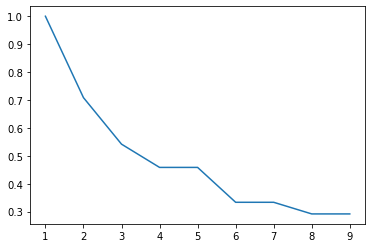

In [105]:
plt.plot(range(1,10),acc)

# 5) location_Attibele

In [106]:
df5 = df[df['location_Attibele']==1]

In [107]:
df5 = df5[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [108]:
df5

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
592     1      1.0   1100           450.0    1     2444.444444   
593     4      0.0   5280          1600.0    4     3300.000000   
594     1      1.0   1100           400.0    1     2750.000000   
595     1      1.0   1200           400.0    1     3000.000000   
596     1      1.0   1400           400.0    1     3500.000000   
597     1      1.0   1700           500.0    1     3400.000000   
598     4      2.0   9500          2168.0    4     4381.918819   
599     1      1.0   1025           395.0    1     2594.936709   
600     1      1.0   1700           420.0    1     4047.619048   
601     1      1.0   1200           418.0    1     2870.813397   
602     2      2.0   4200          1200.0    2     3500.000000   
603     1      1.0   1000           400.0    1     2500.000000   
604     1      1.0   2500           850.0    2     2941.176471   
605     3      3.0  12000          2400.0    3     5000.000000   
606     1      1.0   1250           450.0    1     2777.777778   
607     1      0.0   1955           782.0    1     2500.000000   
608     1      1.0   1150           400.0    1     2875.000000   
609     1      1.0   1300           460.0    1     2826.086957   
610     2      1.0   1150           418.0    1     2751.196172   
611     2      1.0   4200          1000.0    2     4200.000000   
612     1      1.0   1150           550.0    1     2090.909091   
613     1      1.0   1000           410.0    1     2439.024390   
614     3      1.0   6500          1700.0    3     3823.529412   
615     1      1.0   1025           400.0    1     2562.500000   
616     1      1.0   1500           520.0    1     2884.615385   

     area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
592                              1                        0   
593                              0                        1   
594                              0                        1   
595                              0                        1   
596                              0                        1   
597                              1                        0   
598                              0                        0   
599                              0                        1   
600                              0                        1   
601                              0                        1   
602                              0                        1   
603                              1                        0   
604                              1                        0   
605                              0                        1   
606                              0                        1   
607                              1                        0   
608                              0                        1   
609                              0                        0   
610                              1                        0   
611                              0                        0   
612                              1                        0   
613                              0                        1   
614                              0                        0   
615                              1                        0   
616                              0                        1   

     area_typePlot  Area  availability_Ready To Move  
592                    0                           1  
593                    0                           1  
594                    0                           1  
595                    0                           1  
596                    0                           1  
597                    0                           1  
598                    1                           1  
599                    0                           1  
600                    0                           1  
601                    0                           1  
602                    0                    

In [109]:
df5.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.299895  0.847573        0.894598   
balcony                        0.299895  1.000000  0.639729        0.526194   
price                          0.847573  0.639729  1.000000        0.981170   
total_sqft_int                 0.894598  0.526194  0.981170        1.000000   
bhk                            0.955036  0.299895  0.868003        0.926290   
price_per_sqft                 0.646868  0.600537  0.824892        0.751468   
area_typeSuper built-up  Area -0.287290 -0.251123 -0.302542       -0.260928   
area_typeBuilt-up  Area       -0.064514  0.137253 -0.025119       -0.071231   
area_typePlot  Area            0.579447  0.167053  0.533677        0.548720   
availability_Ready To Move    -0.103882  0.029161 -0.110471       -0.083457   

                                    bhk  price_per_sqft  \
bath                           0.955036        0.646868   
balcony                        0.299895        0.600537   
price                          0.868003        0.824892   
total_sqft_int                 0.926290        0.751468   
bhk                            1.000000        0.658458   
price_per_sqft                 0.658458        1.000000   
area_typeSuper built-up  Area -0.287290       -0.463457   
area_typeBuilt-up  Area       -0.064514        0.115140   
area_typePlot  Area            0.579447        0.540033   
availability_Ready To Move    -0.103882       -0.317555   

                               area_typeSuper built-up  Area  \
bath                                               -0.287290   
balcony                                            -0.251123   
price                                              -0.302542   
total_sqft_int                                     -0.260928   
bhk                                                -0.287290   
price_per_sqft                                     -0.463457   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.714006   
area_typePlot  Area                                -0.253320   
availability_Ready To Move                          0.140028   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.064514             0.579447   
balcony                                       0.137253             0.167053   
price                                        -0.025119             0.533677   
total_sqft_int                               -0.071231             0.548720   
bhk                                          -0.064514             0.579447   
price_per_sqft                                0.115140             0.540033   
area_typeSuper built-up  Area                -0.714006            -0.253320   
area_typeBuilt-up  Area                       1.000000            -0.384353   
area_typePlot  Area                          -0.384353             1.000000   
availability_Ready To Move                    0.212459            -0.552771   

                               availability_Ready To Move  
bath                                            -0.103882  
balcony                                          0.029161  
price                                           -0.110471  
total_sqft_int                                  -0.083457  
bhk                                             -0.103882  
price_per_sqft                                  -0.317555  
area_typeSuper built-up  Area                    0.140028  
area_typeBuilt-up  Area                          0.212459  
area_typePlot  Area                             -0.552771  
availability_Ready To Move                       1.000000

In [110]:
x = df5[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df5[['price']]

In [111]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.36]
k= 3 [1.0, 0.36, 0.36]
k= 4 [1.0, 0.36, 0.36, 0.32]
k= 5 [1.0, 0.36, 0.36, 0.32, 0.28]
k= 6 [1.0, 0.36, 0.36, 0.32, 0.28, 0.24]
k= 7 [1.0, 0.36, 0.36, 0.32, 0.28, 0.24, 0.2]
k= 8 [1.0, 0.36, 0.36, 0.32, 0.28, 0.24, 0.2, 0.24]
k= 9 [1.0, 0.36, 0.36, 0.32, 0.28, 0.24, 0.2, 0.24, 0.16]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [112]:
max(acc)

1.0

In [113]:
k = acc.index(max(acc))+1
k

1

In [114]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


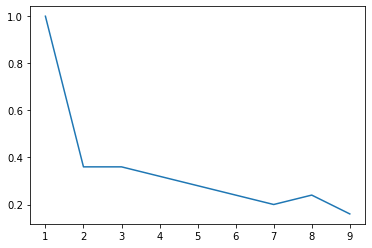

In [115]:
plt.plot(range(1,10),acc)

# 6) location_Balagere

In [116]:
df6 = df[df['location_Balagere']==1]

In [117]:
df6 = df6[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [118]:
df6

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
724     2      1.0   8090         1210.00    2     6685.950413   
725     2      1.0   7200         1210.00    2     5950.413223   
726     2      1.0   7850         1205.00    2     6514.522822   
727     1      0.0   4190          790.50    1     5300.442758   
728     2      1.0   6838         1020.07    2     6703.461527   
729     2      1.0   8100         1205.47    2     6719.370868   
730     2      1.0   6500         1007.00    2     6454.816286   
731     2      1.0   7400         1210.00    2     6115.702479   
732     2      1.0   8300         1210.00    2     6859.504132   
733     1      1.0   4500          675.00    1     6666.666667   
734     1      1.0   4300          656.00    1     6554.878049   
735     2      1.0   6400         1012.00    2     6324.110672   
736     2      1.0   6200         1007.00    2     6156.901688   
737     2      1.0   6700         1007.00    2     6653.426018   
738     2      1.0   6600         1007.00    2     6554.121152   
739     1      1.0   3418          645.00    1     5299.224806   
740     1      0.0   4229          790.50    1     5350.411132   
741     2      1.0   6500         1012.00    2     6422.924901   
742     1      1.0   3877          656.00    1     5910.060976   
743     1      1.0   3900          645.00    1     6046.511628   
744     1      1.0   4100          645.00    1     6356.589147   
745     2      1.0   8200         1210.00    2     6776.859504   
746     1      1.0   3477          656.00    1     5300.304878   
747     2      1.0   7387         1205.00    2     6130.290456   
748     2      1.0   7000         1012.00    2     6916.996047   
749     2      1.0   6800         1007.00    2     6752.730884   
750     2      1.0   7900         1205.00    2     6556.016598   
751     2      1.0   6800         1012.00    2     6719.367589   

     area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
724                              1                        0   
725                              1                        0   
726                              1                        0   
727                              1                        0   
728                              1                        0   
729                              1                        0   
730                              1                        0   
731                              1                        0   
732                              1                        0   
733                              0                        1   
734                              1                        0   
735                              1                        0   
736                              1                        0   
737                              0                        1   
738                              1                        0   
739                              1                        0   
740                              1                        0   
741                              1                        0   
742                              1                        0   
743                              1                        0   
744                              0                        1   
745                              1                        0   
746                              1                        0   
747                              1                        0   
748                              1                        0   
749                              1                        0   
750                              1                        0   
751                              0                        1   

     area_typePlot  Area  availability_Ready To Move  
724                    0                           1  
725                    0                           1  
726                    0                           1  
727                    0                  

In [119]:
df6.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.402980  0.931076        0.912971   
balcony                        0.402980  1.000000  0.338823        0.230706   
price                          0.931076  0.338823  1.000000        0.973577   
total_sqft_int                 0.912971  0.230706  0.973577        1.000000   
bhk                            1.000000  0.402980  0.931076        0.912971   
price_per_sqft                 0.632005  0.561722  0.683688        0.505251   
area_typeSuper built-up  Area  0.156098 -0.113228  0.164058        0.255416   
area_typeBuilt-up  Area       -0.156098  0.113228 -0.164058       -0.255416   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move     0.353393  0.206725  0.382803        0.360782   

                                    bhk  price_per_sqft  \
bath                           1.000000        0.632005   
balcony                        0.402980        0.561722   
price                          0.931076        0.683688   
total_sqft_int                 0.912971        0.505251   
bhk                            1.000000        0.632005   
price_per_sqft                 0.632005        1.000000   
area_typeSuper built-up  Area  0.156098       -0.239901   
area_typeBuilt-up  Area       -0.156098        0.239901   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move     0.353393        0.317950   

                               area_typeSuper built-up  Area  \
bath                                                0.156098   
balcony                                            -0.113228   
price                                               0.164058   
total_sqft_int                                      0.255416   
bhk                                                 0.156098   
price_per_sqft                                     -0.239901   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.121716   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.156098                  NaN   
balcony                                       0.113228                  NaN   
price                                        -0.164058                  NaN   
total_sqft_int                               -0.255416                  NaN   
bhk                                          -0.156098                  NaN   
price_per_sqft                                0.239901                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.121716                  NaN   

                               availability_Ready To Move  
bath                                             0.353393  
balcony                                          0.206725  
price                                            0.382803  
total_sqft_int                                   0.360782  
bhk                                              0.353393  
price_per_sqft                                   0.317950  
area_typeSuper built-up  Area                   -0.121716  
area_typeBuilt-up  Area                          0.121716  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [120]:
x = df6[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df6[['price']]

In [121]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5714285714285714]
k= 3 [1.0, 0.5714285714285714, 0.39285714285714285]
k= 4 [1.0, 0.5714285714285714, 0.39285714285714285, 0.25]
k= 5 [1.0, 0.5714285714285714, 0.39285714285714285, 0.25, 0.25]
k= 6 [1.0, 0.5714285714285714, 0.39285714285714285, 0.25, 0.25, 0.25]
k= 7 [1.0, 0.5714285714285714, 0.39285714285714285, 0.25, 0.25, 0.25, 0.21428571428571427]
k= 8 [1.0, 0.5714285714285714, 0.39285714285714285, 0.25, 0.25, 0.25, 0.21428571428571427, 0.21428571428571427]
k= 9 [1.0, 0.5714285714285714, 0.39285714285714285, 0.25, 0.25, 0.25, 0.21428571428571427, 0.21428571428571427, 0.21428571428571427]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [122]:
max(acc)

1.0

In [123]:
k = acc.index(max(acc))+1
k

1

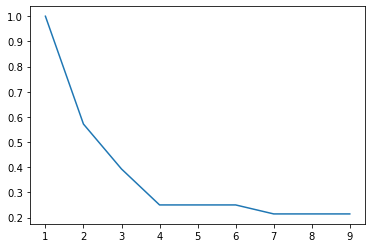

In [124]:
plt.plot(range(1,10),acc)

In [125]:
knn = sn.KNeighborsClassifier(n_neighbors=1) 
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# 7) location_Banashankari

In [126]:
df7 = df[df['location_Banashankari']==1]

In [127]:
df7 = df7[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [128]:
df7.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.225001  0.321348        0.540711   
balcony                        0.225001  1.000000 -0.082991       -0.028660   
price                          0.321348 -0.082991  1.000000        0.859159   
total_sqft_int                 0.540711 -0.028660  0.859159        1.000000   
bhk                            0.809887  0.064607  0.366219        0.466673   
price_per_sqft                 0.032716 -0.102216  0.767983        0.370357   
area_typeSuper built-up  Area -0.059585 -0.019202 -0.013329        0.006230   
area_typeBuilt-up  Area        0.059585  0.019202  0.013329       -0.006230   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move    -0.360856  0.011822 -0.143749       -0.240376   

                                    bhk  price_per_sqft  \
bath                           0.809887        0.032716   
balcony                        0.064607       -0.102216   
price                          0.366219        0.767983   
total_sqft_int                 0.466673        0.370357   
bhk                            1.000000        0.163888   
price_per_sqft                 0.163888        1.000000   
area_typeSuper built-up  Area -0.231377       -0.049061   
area_typeBuilt-up  Area        0.231377        0.049061   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move    -0.293813       -0.049831   

                               area_typeSuper built-up  Area  \
bath                                               -0.059585   
balcony                                            -0.019202   
price                                              -0.013329   
total_sqft_int                                      0.006230   
bhk                                                -0.231377   
price_per_sqft                                     -0.049061   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.177187   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.059585                  NaN   
balcony                                       0.019202                  NaN   
price                                         0.013329                  NaN   
total_sqft_int                               -0.006230                  NaN   
bhk                                           0.231377                  NaN   
price_per_sqft                                0.049061                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.177187                  NaN   

                               availability_Ready To Move  
bath                                            -0.360856  
balcony                                          0.011822  
price                                           -0.143749  
total_sqft_int                                  -0.240376  
bhk                                             -0.293813  
price_per_sqft                                  -0.049831  
area_typeSuper built-up  Area                   -0.177187  
area_typeBuilt-up  Area                          0.177187  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

<AxesSubplot:ylabel='balcony'>

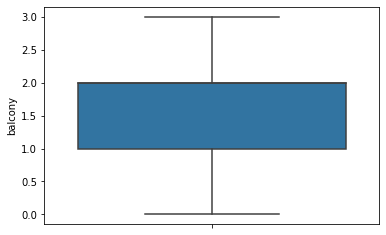

In [129]:
sns.boxplot(y='balcony',data=df7)

<AxesSubplot:ylabel='price'>

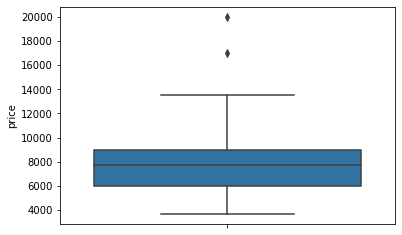

In [130]:
sns.boxplot(y='price',data=df7)

<AxesSubplot:ylabel='total_sqft_int'>

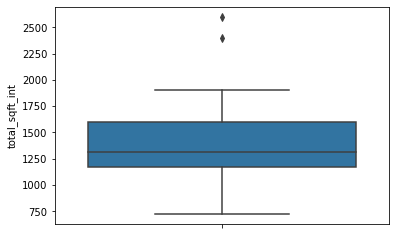

In [131]:
sns.boxplot(y='total_sqft_int',data=df7)

<AxesSubplot:xlabel='price', ylabel='balcony'>

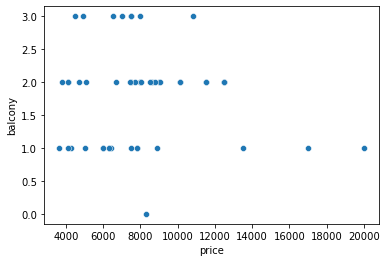

In [132]:
sns.scatterplot(x='price',y='balcony',data=df7)

In [133]:
x = df7[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df7[['price']]

In [134]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.4897959183673469]
k= 3 [1.0, 0.4897959183673469, 0.3673469387755102]
k= 4 [1.0, 0.4897959183673469, 0.3673469387755102, 0.3469387755102041]
k= 5 [1.0, 0.4897959183673469, 0.3673469387755102, 0.3469387755102041, 0.3469387755102041]
k= 6 [1.0, 0.4897959183673469, 0.3673469387755102, 0.3469387755102041, 0.3469387755102041, 0.30612244897959184]
k= 7 [1.0, 0.4897959183673469, 0.3673469387755102, 0.3469387755102041, 0.3469387755102041, 0.30612244897959184, 0.2857142857142857]
k= 8 [1.0, 0.4897959183673469, 0.3673469387755102, 0.3469387755102041, 0.3469387755102041, 0.30612244897959184, 0.2857142857142857, 0.30612244897959184]
k= 9 [1.0, 0.4897959183673469, 0.3673469387755102, 0.3469387755102041, 0.3469387755102041, 0.30612244897959184, 0.2857142857142857, 0.30612244897959184, 0.2653061224489796]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [135]:
max(acc)

1.0

In [136]:
k = acc.index(max(acc))+1
k

1

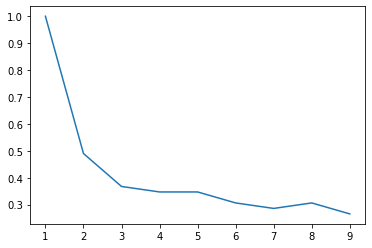

In [137]:
plt.plot(range(1,10),acc)

In [138]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# 8) location_Bannerghatta Road

In [139]:
df8 = df[df['location_Bannerghatta Road']==1]

In [140]:
df8 = df8[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [141]:
df8.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.207973  0.834023        0.866822   
balcony                        0.207973  1.000000  0.336026        0.304285   
price                          0.834023  0.336026  1.000000        0.898774   
total_sqft_int                 0.866822  0.304285  0.898774        1.000000   
bhk                            0.843231  0.312209  0.819633        0.859022   
price_per_sqft                 0.490726  0.294000  0.764032        0.444184   
area_typeSuper built-up  Area -0.006278  0.182913  0.047476        0.009076   
area_typeBuilt-up  Area       -0.010875 -0.195967 -0.066959       -0.023373   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move    -0.072650  0.187794  0.010580       -0.040927   

                                    bhk  price_per_sqft  \
bath                           0.843231        0.490726   
balcony                        0.312209        0.294000   
price                          0.819633        0.764032   
total_sqft_int                 0.859022        0.444184   
bhk                            1.000000        0.508446   
price_per_sqft                 0.508446        1.000000   
area_typeSuper built-up  Area  0.013254        0.118297   
area_typeBuilt-up  Area       -0.059700       -0.147736   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move     0.032846        0.032788   

                               area_typeSuper built-up  Area  \
bath                                               -0.006278   
balcony                                             0.182913   
price                                               0.047476   
total_sqft_int                                      0.009076   
bhk                                                 0.013254   
price_per_sqft                                      0.118297   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.940441   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.158701   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.010875                  NaN   
balcony                                      -0.195967                  NaN   
price                                        -0.066959                  NaN   
total_sqft_int                               -0.023373                  NaN   
bhk                                          -0.059700                  NaN   
price_per_sqft                               -0.147736                  NaN   
area_typeSuper built-up  Area                -0.940441                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.138267                  NaN   

                               availability_Ready To Move  
bath                                            -0.072650  
balcony                                          0.187794  
price                                            0.010580  
total_sqft_int                                  -0.040927  
bhk                                              0.032846  
price_per_sqft                                   0.032788  
area_typeSuper built-up  Area                   -0.158701  
area_typeBuilt-up  Area                          0.138267  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [142]:
x = df8[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df8[['price']]

In [143]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5462962962962963]
k= 3 [1.0, 0.5462962962962963, 0.3611111111111111]
k= 4 [1.0, 0.5462962962962963, 0.3611111111111111, 0.2962962962962963]
k= 5 [1.0, 0.5462962962962963, 0.3611111111111111, 0.2962962962962963, 0.25925925925925924]
k= 6 [1.0, 0.5462962962962963, 0.3611111111111111, 0.2962962962962963, 0.25925925925925924, 0.23148148148148148]
k= 7 [1.0, 0.5462962962962963, 0.3611111111111111, 0.2962962962962963, 0.25925925925925924, 0.23148148148148148, 0.19444444444444445]
k= 8 [1.0, 0.5462962962962963, 0.3611111111111111, 0.2962962962962963, 0.25925925925925924, 0.23148148148148148, 0.19444444444444445, 0.21296296296296297]
k= 9 [1.0, 0.5462962962962963, 0.3611111111111111, 0.2962962962962963, 0.25925925925925924, 0.23148148148148148, 0.19444444444444445, 0.21296296296296297, 0.2222222222222222]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [144]:
max(acc)

1.0

In [145]:
k=acc.index(max(acc))+1
k

1

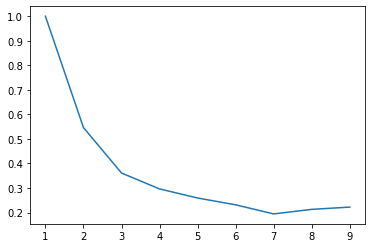

In [146]:
plt.plot(range(1,10),acc)

In [147]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# 9) location_Begur Road

In [148]:
df9 = df[df['location_Begur Road']==1]

In [149]:
df9 = df9[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [150]:
df9.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000 -0.389870  0.592212        0.556837   
balcony                       -0.389870  1.000000  0.130644        0.273895   
price                          0.592212  0.130644  1.000000        0.873932   
total_sqft_int                 0.556837  0.273895  0.873932        1.000000   
bhk                            0.540062  0.232029  0.863714        0.879946   
price_per_sqft                 0.340699 -0.154833  0.668044        0.228617   
area_typeSuper built-up  Area -0.346205  0.275540 -0.038535        0.016236   
area_typeBuilt-up  Area        0.167360 -0.013813  0.021638        0.024401   
area_typePlot  Area            0.387298 -0.510851  0.038001       -0.072893   
availability_Ready To Move    -0.239756  0.370475 -0.254139        0.020533   

                                    bhk  price_per_sqft  \
bath                           0.540062        0.340699   
balcony                        0.232029       -0.154833   
price                          0.863714        0.668044   
total_sqft_int                 0.879946        0.228617   
bhk                            1.000000        0.411926   
price_per_sqft                 0.411926        1.000000   
area_typeSuper built-up  Area -0.117114       -0.129473   
area_typeBuilt-up  Area        0.010564        0.026652   
area_typePlot  Area            0.209165        0.205828   
availability_Ready To Move    -0.081105       -0.545348   

                               area_typeSuper built-up  Area  \
bath                                               -0.346205   
balcony                                             0.275540   
price                                              -0.038535   
total_sqft_int                                      0.016236   
bhk                                                -0.117114   
price_per_sqft                                     -0.129473   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.856957   
area_typePlot  Area                                -0.484768   
availability_Ready To Move                         -0.058938   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.167360             0.387298   
balcony                                      -0.013813            -0.510851   
price                                         0.021638             0.038001   
total_sqft_int                                0.024401            -0.072893   
bhk                                           0.010564             0.209165   
price_per_sqft                                0.026652             0.205828   
area_typeSuper built-up  Area                -0.856957            -0.484768   
area_typeBuilt-up  Area                       1.000000            -0.035355   
area_typePlot  Area                          -0.035355             1.000000   
availability_Ready To Move                    0.050508             0.028571   

                               availability_Ready To Move  
bath                                            -0.239756  
balcony                                          0.370475  
price                                           -0.254139  
total_sqft_int                                   0.020533  
bhk                                             -0.081105  
price_per_sqft                                  -0.545348  
area_typeSuper built-up  Area                   -0.058938  
area_typeBuilt-up  Area                          0.050508  
area_typePlot  Area                              0.028571  
availability_Ready To Move                       1.000000

In [151]:
x = df9[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df9[['price']]

In [152]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.7058823529411765]
k= 3 [1.0, 0.7058823529411765, 0.45098039215686275]
k= 4 [1.0, 0.7058823529411765, 0.45098039215686275, 0.43137254901960786]
k= 5 [1.0, 0.7058823529411765, 0.45098039215686275, 0.43137254901960786, 0.37254901960784315]
k= 6 [1.0, 0.7058823529411765, 0.45098039215686275, 0.43137254901960786, 0.37254901960784315, 0.37254901960784315]
k= 7 [1.0, 0.7058823529411765, 0.45098039215686275, 0.43137254901960786, 0.37254901960784315, 0.37254901960784315, 0.3333333333333333]
k= 8 [1.0, 0.7058823529411765, 0.45098039215686275, 0.43137254901960786, 0.37254901960784315, 0.37254901960784315, 0.3333333333333333, 0.3333333333333333]
k= 9 [1.0, 0.7058823529411765, 0.45098039215686275, 0.43137254901960786, 0.37254901960784315, 0.37254901960784315, 0.3333333333333333, 0.3333333333333333, 0.23529411764705882]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [153]:
max(acc)

1.0

In [154]:
k = acc.index(max(acc))+1
k

1

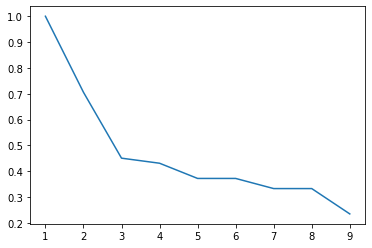

In [155]:
plt.plot(range(1,10),acc)

In [156]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# 10) location_Bellandur

In [157]:
df10 = df[df['location_Bellandur']==1]

In [158]:
df10 = df10[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [159]:
df10

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
1114     3  1.000000  10300          1767.0    3     5829.088851   
1115     2  3.000000   6600          1205.0    2     5477.178423   
1116     2  1.000000   7600          1250.0    2     6080.000000   
1117     2  2.000000   5000          1000.0    2     5000.000000   
1118     2  1.000000   7400          1281.0    2     5776.736924   
1119     2  2.000000   4000           921.0    2     4343.105320   
1120     2  2.000000   9800          1490.0    3     6577.181208   
1121     2  2.000000   6000          1220.0    2     4918.032787   
1122     2  2.000000   8200          1299.0    2     6312.548114   
1123     2  2.000000   5600           900.0    2     6222.222222   
1124     2  1.000000   7900          1350.0    2     5851.851852   
1125     2  2.000000   5700          1286.0    2     4432.348367   
1126     2  2.000000   8500          1457.0    2     5833.905285   
1127     2  2.000000   5100          1195.0    2     4267.782427   
1128     2  2.000000   7200          1050.0    2     6857.142857   
1129     2  2.000000   7200          1310.0    2     5496.183206   
1130     3  3.000000  11800          1785.0    3     6610.644258   
1131     2  2.000000   6000          1051.0    2     5708.848716   
1132     2  1.000000   6500          1060.0    2     6132.075472   
1133     2  3.000000   6200          1100.0    2     5636.363636   
1134     3  3.000000  10000          1685.0    3     5934.718101   
1135     2  2.000000   5500           982.0    2     5600.814664   
1136     2  1.000000   5900          1205.0    2     4896.265560   
1137     2  1.000000   5800          1063.0    2     5456.255880   
1138     2  2.000000   5999          1201.0    2     4995.004163   
1139     2  2.000000   6500          1325.0    2     4905.660377   
1140     2  2.000000   8700          1281.0    2     6791.569087   
1141     2  1.000000   5200          1200.0    2     4333.333333   
1142     3  2.000000  12000          1785.0    3     6722.689076   
1143     2  2.000000   4800          1088.0    2     4411.764706   
1144     2  2.000000   8500          1310.0    2     6488.549618   
1145     3  3.000000   9000          1465.0    2     6143.344710   
1146     3  2.000000  10900          1767.0    3     6168.647425   
1147     4  1.584376  24500          3600.0    4     6805.555556   
1148     2  1.000000   6944          1150.0    2     6038.260870   
1149     3  2.000000   9200          1410.0    2     6524.822695   
1150     2  1.000000   6000          1015.0    2     5911.330049   
1151     3  3.000000  10100          1685.0    3     5994.065282   
1152     3  3.000000  10500          1735.0    3     6051.873199   
1153     3  3.000000  11500          1685.0    3     6824.925816   
1154     2  1.000000   5100          1049.0    2     4861.773117   
1155     2  1.000000   6300          1211.0    2     5202.312139   
1156     3  2.000000  11000          1717.0    3     6406.523005   
1157     2  1.000000   6200          1200.0    2     5166.666667   
1158     2  2.000000   4800           960.0    2     5000.000000   
1159     2  2.000000  11600          1690.0    3     6863.905325   
1160     1  1.000000   4000           950.0    1     4210.526316   
1161     2  1.000000   4500           850.0    2     5294.117647   
1162     2  1.000000   9000          1454.0    2     6189.821183   
1163     2  1.000000   5200          1195.0    2     4351.464435   
1164     2  2.000000   8350          1260.0    2     6626.984127   
1165     3  1.584376   9000          1535.0    3     5863.192182   
1166     2  1.000000   7500          1047.0    2     7163.323782   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
1114                              1                        0   
1115                              0                        1   
1116                              1                        0   
1117                              1                        0   
1118         

In [160]:
df10.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.405878  0.800221        0.806780   
balcony                        0.405878  1.000000  0.252167        0.230465   
price                          0.800221  0.252167  1.000000        0.964414   
total_sqft_int                 0.806780  0.230465  0.964414        1.000000   
bhk                            0.855191  0.351102  0.837293        0.834361   
price_per_sqft                 0.462747  0.234160  0.651602        0.436669   
area_typeSuper built-up  Area -0.335095 -0.187817 -0.298279       -0.295006   
area_typeBuilt-up  Area        0.335095  0.187817  0.298279        0.295006   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move    -0.178281 -0.372962 -0.157347       -0.125530   

                                    bhk  price_per_sqft  \
bath                           0.855191        0.462747   
balcony                        0.351102        0.234160   
price                          0.837293        0.651602   
total_sqft_int                 0.834361        0.436669   
bhk                            1.000000        0.498456   
price_per_sqft                 0.498456        1.000000   
area_typeSuper built-up  Area -0.240627       -0.126449   
area_typeBuilt-up  Area        0.240627        0.126449   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move    -0.178281       -0.211484   

                               area_typeSuper built-up  Area  \
bath                                               -0.335095   
balcony                                            -0.187817   
price                                              -0.298279   
total_sqft_int                                     -0.295006   
bhk                                                -0.240627   
price_per_sqft                                     -0.126449   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.020102   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.335095                  NaN   
balcony                                       0.187817                  NaN   
price                                         0.298279                  NaN   
total_sqft_int                                0.295006                  NaN   
bhk                                           0.240627                  NaN   
price_per_sqft                                0.126449                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.020102                  NaN   

                               availability_Ready To Move  
bath                                            -0.178281  
balcony                                         -0.372962  
price                                           -0.157347  
total_sqft_int                                  -0.125530  
bhk                                             -0.178281  
price_per_sqft                                  -0.211484  
area_typeSuper built-up  Area                   -0.020102  
area_typeBuilt-up  Area                          0.020102  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [161]:
x = df10[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df10[['price']]

In [162]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6037735849056604]
k= 3 [1.0, 0.6037735849056604, 0.33962264150943394]
k= 4 [1.0, 0.6037735849056604, 0.33962264150943394, 0.32075471698113206]
k= 5 [1.0, 0.6037735849056604, 0.33962264150943394, 0.32075471698113206, 0.2641509433962264]
k= 6 [1.0, 0.6037735849056604, 0.33962264150943394, 0.32075471698113206, 0.2641509433962264, 0.22641509433962265]
k= 7 [1.0, 0.6037735849056604, 0.33962264150943394, 0.32075471698113206, 0.2641509433962264, 0.22641509433962265, 0.18867924528301888]
k= 8 [1.0, 0.6037735849056604, 0.33962264150943394, 0.32075471698113206, 0.2641509433962264, 0.22641509433962265, 0.18867924528301888, 0.1509433962264151]
k= 9 [1.0, 0.6037735849056604, 0.33962264150943394, 0.32075471698113206, 0.2641509433962264, 0.22641509433962265, 0.18867924528301888, 0.1509433962264151, 0.1509433962264151]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [163]:
max(acc)

1.0

In [164]:
k = acc.index(max(acc))+1
k

1

In [165]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


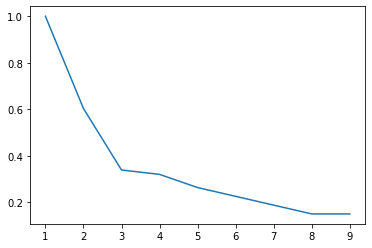

In [166]:
plt.plot(range(1,10),acc)

# 11) location_Bhoganhalli

In [167]:
df11 = df[df['location_Bhoganhalli']==1]

In [168]:
df11 = df11[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [169]:
df11

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
1193     3      1.0   9900          1670.0    3     5928.143713   
1194     2      1.0   7597          1444.0    2     5261.080332   
1195     2      1.0   7597          1447.0    2     5250.172771   
1196     3      2.0  12600          1700.0    3     7411.764706   
1197     2      1.0   7597          1447.0    2     5250.172771   
1198     3      2.0  12700          1760.0    3     7215.909091   
1199     2      1.0   7597          1447.0    2     5250.172771   
1200     3      2.0  12900          1949.0    3     6618.778861   
1201     3      2.0  12800          1760.0    3     7272.727273   
1202     2      1.0   7597          1447.0    2     5250.172771   
1203     4      3.0  18500          2439.0    4     7585.075851   
1204     2      1.0   7597          1444.0    2     5261.080332   
1205     2      2.0   6447          1205.0    2     5350.207469   
1206     2      1.0   7597          1447.0    2     5250.172771   
1207     5      2.0  17000          2439.0    4     6970.069701   
1208     2      1.0   6831          1205.0    2     5669.709544   
1209     2      1.0   6990          1260.0    2     5547.619048   
1210     4      3.0  17000          2439.0    4     6970.069701   
1211     3      2.0  11500          1707.0    3     6736.965436   
1212     2      1.0   5250           970.0    2     5412.371134   
1213     2      1.0   7989          1277.0    2     6256.068912   
1214     3      2.0  12000          1703.0    3     7046.388726   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
1193                              1                        0   
1194                              1                        0   
1195                              1                        0   
1196                              0                        1   
1197                              1                        0   
1198                              1                        0   
1199                              1                        0   
1200                              1                        0   
1201                              1                        0   
1202                              1                        0   
1203                              1                        0   
1204                              1                        0   
1205                              1                        0   
1206                              1                        0   
1207                              0                        1   
1208                              1                        0   
1209                              1                        0   
1210                              1                        0   
1211                              1                        0   
1212                              0                        1   
1213                              1                        0   
1214                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
1193                    0                           0  
1194                    0                           0  
1195                    0                           0  
1196                    0                           1  
1197                    0                           0  
1198                    0                           1  
1199                    0                           0  
1200                    0                           1  
1201                    0                           1  
1202                    0                           0  
1203                    0                           1  
1204                    0                           0  
1205                    0                           0  
1206                    0                           0  
1207                    0                           1  
1208                    0                           0  
1209                    0              

In [170]:
df11.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.783911  0.945120        0.929076   
balcony                        0.783911  1.000000  0.875103        0.802802   
price                          0.945120  0.875103  1.000000        0.968627   
total_sqft_int                 0.929076  0.802802  0.968627        1.000000   
bhk                            0.973844  0.861241  0.974960        0.940702   
price_per_sqft                 0.798567  0.825828  0.877033        0.736580   
area_typeSuper built-up  Area -0.334389 -0.073472 -0.155140       -0.085346   
area_typeBuilt-up  Area        0.334389  0.073472  0.155140        0.085346   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move     0.658586  0.693375  0.670160        0.536495   

                                    bhk  price_per_sqft  \
bath                           0.973844        0.798567   
balcony                        0.861241        0.825828   
price                          0.974960        0.877033   
total_sqft_int                 0.940702        0.736580   
bhk                            1.000000        0.859775   
price_per_sqft                 0.859775        1.000000   
area_typeSuper built-up  Area -0.226635       -0.218648   
area_typeBuilt-up  Area        0.226635        0.218648   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move     0.697097        0.784167   

                               area_typeSuper built-up  Area  \
bath                                               -0.334389   
balcony                                            -0.073472   
price                                              -0.155140   
total_sqft_int                                     -0.085346   
bhk                                                -0.226635   
price_per_sqft                                     -0.218648   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.397360   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.334389                  NaN   
balcony                                       0.073472                  NaN   
price                                         0.155140                  NaN   
total_sqft_int                                0.085346                  NaN   
bhk                                           0.226635                  NaN   
price_per_sqft                                0.218648                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.397360                  NaN   

                               availability_Ready To Move  
bath                                             0.658586  
balcony                                          0.693375  
price                                            0.670160  
total_sqft_int                                   0.536495  
bhk                                              0.697097  
price_per_sqft                                   0.784167  
area_typeSuper built-up  Area                   -0.397360  
area_typeBuilt-up  Area                          0.397360  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [171]:
x = df11[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df11[['price']]

In [172]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.7727272727272727]
k= 3 [1.0, 0.7727272727272727, 0.5909090909090909]
k= 4 [1.0, 0.7727272727272727, 0.5909090909090909, 0.5]
k= 5 [1.0, 0.7727272727272727, 0.5909090909090909, 0.5, 0.5]
k= 6 [1.0, 0.7727272727272727, 0.5909090909090909, 0.5, 0.5, 0.4090909090909091]
k= 7 [1.0, 0.7727272727272727, 0.5909090909090909, 0.5, 0.5, 0.4090909090909091, 0.4090909090909091]
k= 8 [1.0, 0.7727272727272727, 0.5909090909090909, 0.5, 0.5, 0.4090909090909091, 0.4090909090909091, 0.4090909090909091]
k= 9 [1.0, 0.7727272727272727, 0.5909090909090909, 0.5, 0.5, 0.4090909090909091, 0.4090909090909091, 0.4090909090909091, 0.4090909090909091]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [173]:
max(acc)

1.0

In [174]:
k = acc.index(max(acc))+1
k

1

In [175]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


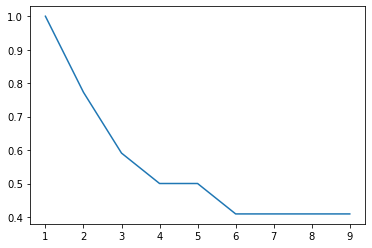

In [176]:
plt.plot(range(1,10),acc)

# 12) location_Bisuvanahalli

In [177]:
df12 = df[df['location_Bisuvanahalli']==1]

In [178]:
df12 = df12[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [179]:
df12

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
1248     3      2.0   4800          1180.0    3     4067.796610   
1249     2      1.0   4600          1075.0    3     4279.069767   
1250     2      1.0   4500          1075.0    3     4186.046512   
1251     2      1.0   3300           845.0    2     3905.325444   
1252     2      1.0   4500          1075.0    3     4186.046512   
1253     2      1.0   3700           845.0    2     4378.698225   
1254     2      1.0   2900           845.0    2     3431.952663   
1255     2      1.0   4700          1075.0    3     4372.093023   
1256     1      1.0   3200           850.0    2     3764.705882   
1257     2      1.0   5000          1075.0    3     4651.162791   
1258     2      1.0   5200          1075.0    3     4837.209302   
1259     2      1.0   4600          1180.0    3     3898.305085   
1260     2      1.0   4200          1075.0    3     3906.976744   
1261     2      1.0   3700           845.0    2     4378.698225   
1262     2      1.0   4300          1075.0    3     4000.000000   
1263     1      1.0   3200           700.0    2     4571.428571   
1264     2      1.0   5200          1075.0    3     4837.209302   
1265     2      1.0   5000          1075.0    3     4651.162791   
1266     2      1.0   3300           845.0    2     3905.325444   
1267     2      1.0   3300           945.0    2     3492.063492   
1268     2      1.0   3000           845.0    2     3550.295858   
1269     2      1.0   4300          1075.0    3     4000.000000   
1270     2      1.0   4500          1080.0    3     4166.666667   
1271     2      1.0   5550          1180.0    3     4703.389831   
1272     2      1.0   4700          1075.0    3     4372.093023   
1273     2      1.0   4800          1075.0    3     4465.116279   
1274     2      1.0   4500          1075.0    3     4186.046512   
1275     2      1.0   4400          1075.0    3     4093.023256   
1276     2      1.0   2700           850.0    2     3176.470588   
1277     2      1.0   4200          1075.0    3     3906.976744   
1278     2      2.0   3200           845.0    2     3786.982249   
1279     2      0.0   3400           845.0    2     4023.668639   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
1248                              1                        0   
1249                              1                        0   
1250                              1                        0   
1251                              0                        1   
1252                              1                        0   
1253                              1                        0   
1254                              1                        0   
1255                              1                        0   
1256                              1                        0   
1257                              1                        0   
1258                              1                        0   
1259                              1                        0   
1260                              1                        0   
1261                              1                        0   
1262                              1                        0   
1263                              0                        1   
1264                              1                        0   
1265                              1                        0   
1266                              1                        0   
1267                              1                        0   
1268                              0                        1   
1269                              1                        0   
1270                              0                        1   
1271                              1                        0   
1272                              1                        0   
1273                              1                        0   
1274                              1                        0   
12

In [180]:
df12.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.347368  0.339022        0.503402   
balcony                        0.347368  1.000000  0.061546        0.146246   
price                          0.339022  0.061546  1.000000        0.885392   
total_sqft_int                 0.503402  0.146246  0.885392        1.000000   
bhk                            0.344378  0.079472  0.904641        0.942029   
price_per_sqft                -0.035609 -0.076228  0.764164        0.382279   
area_typeSuper built-up  Area  0.238416  0.326718  0.369102        0.452986   
area_typeBuilt-up  Area       -0.238416 -0.326718 -0.369102       -0.452986   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move          NaN       NaN       NaN             NaN   

                                    bhk  price_per_sqft  \
bath                           0.344378       -0.035609   
balcony                        0.079472       -0.076228   
price                          0.904641        0.764164   
total_sqft_int                 0.942029        0.382279   
bhk                            1.000000        0.512378   
price_per_sqft                 0.512378        1.000000   
area_typeSuper built-up  Area  0.377778        0.091888   
area_typeBuilt-up  Area       -0.377778       -0.091888   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move          NaN             NaN   

                               area_typeSuper built-up  Area  \
bath                                                0.238416   
balcony                                             0.326718   
price                                               0.369102   
total_sqft_int                                      0.452986   
bhk                                                 0.377778   
price_per_sqft                                      0.091888   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                               NaN   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.238416                  NaN   
balcony                                      -0.326718                  NaN   
price                                        -0.369102                  NaN   
total_sqft_int                               -0.452986                  NaN   
bhk                                          -0.377778                  NaN   
price_per_sqft                               -0.091888                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                         NaN                  NaN   

                               availability_Ready To Move  
bath                                                  NaN  
balcony                                               NaN  
price                                                 NaN  
total_sqft_int                                        NaN  
bhk                                                   NaN  
price_per_sqft                                        NaN  
area_typeSuper built-up  Area                         NaN  
area_typeBuilt-up  Area                               NaN  
area_typePlot  Area                                   NaN  
availability_Ready To Move                            NaN

In [181]:
x = df12[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df12[['price']]

In [182]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.78125]
k= 3 [1.0, 0.78125, 0.6875]
k= 4 [1.0, 0.78125, 0.6875, 0.65625]
k= 5 [1.0, 0.78125, 0.6875, 0.65625, 0.46875]
k= 6 [1.0, 0.78125, 0.6875, 0.65625, 0.46875, 0.375]
k= 7 [1.0, 0.78125, 0.6875, 0.65625, 0.46875, 0.375, 0.375]
k= 8 [1.0, 0.78125, 0.6875, 0.65625, 0.46875, 0.375, 0.375, 0.34375]
k= 9 [1.0, 0.78125, 0.6875, 0.65625, 0.46875, 0.375, 0.375, 0.34375, 0.21875]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [183]:
max(acc)

1.0

In [184]:
k = acc.index(max(acc))+1
k

1

In [185]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


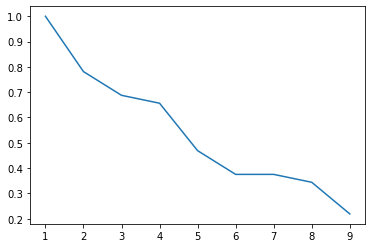

In [186]:
plt.plot(range(1,10),acc)

# 13) location_Bommasandra

In [187]:
df13 = df[df['location_Bommasandra']==1]

In [188]:
df13 = df13[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [189]:
df13

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
1293     3  1.000000   4936          1260.0    3     3917.460317   
1294     3  2.000000   4600          1200.0    3     3833.333333   
1295     2  1.000000   4100          1035.0    2     3961.352657   
1296     2  1.000000   4173          1035.0    2     4031.884058   
1297     2  3.000000   4000          1034.0    2     3868.471954   
1298     2  2.000000   3000           877.0    2     3420.752566   
1299     2  1.000000   3746           920.0    2     4071.739130   
1300     2  1.000000   4143          1035.0    2     4002.898551   
1301     2  1.000000   5028          1295.0    3     3882.625483   
1302     2  1.000000   4000          1015.0    2     3940.886700   
1303     2  1.000000   3500          1000.0    2     3500.000000   
1304     2  1.000000   3528           955.0    2     3694.240838   
1305     2  1.000000   3977          1005.0    2     3957.213930   
1306     2  1.000000   3500          1014.0    2     3451.676529   
1307     2  1.000000   4089          1020.0    2     4008.823529   
1308     2  1.000000   3720           920.0    2     4043.478261   
1309     1  1.000000   3200           800.0    2     4000.000000   
1310     3  1.000000   5000          1280.0    3     3906.250000   
1311     3  1.584376   9000          1942.0    3     4634.397528   
1312     2  1.000000   4500          1127.0    2     3992.901508   
1313     2  1.000000   2900           877.0    2     3306.727480   
1314     3  1.000000   5281          1365.0    3     3868.864469   
1315     2  2.000000   3000           842.0    2     3562.945368   
1316     3  1.000000   4936          1260.0    3     3917.460317   
1317     3  1.000000   5282          1365.0    3     3869.597070   
1318     2  1.000000   3797           955.0    2     3975.916230   
1319     2  1.000000   4000          1089.0    2     3673.094582   
1320     3  1.000000   5396          1365.0    3     3953.113553   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
1293                              1                        0   
1294                              1                        0   
1295                              1                        0   
1296                              1                        0   
1297                              1                        0   
1298                              0                        1   
1299                              1                        0   
1300                              1                        0   
1301                              1                        0   
1302                              1                        0   
1303                              0                        1   
1304                              1                        0   
1305                              1                        0   
1306                              1                        0   
1307                              1                        0   
1308                              1                        0   
1309                              1                        0   
1310                              1                        0   
1311                              0                        0   
1312                              1                        0   
1313                              1                        0   
1314                              1                        0   
1315                              1                        0   
1316                              1                        0   
1317                              1                        0   
1318                              1                        0   
1319                              1                        0   
1320                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
1293                    0                           0  
1294                    0                           1  
1295    

In [190]:
df13.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.028020  0.680668        0.769997   
balcony                        0.028020  1.000000 -0.009215       -0.012653   
price                          0.680668 -0.009215  1.000000        0.976790   
total_sqft_int                 0.769997 -0.012653  0.976790        1.000000   
bhk                            0.864131 -0.034149  0.717202        0.801860   
price_per_sqft                 0.232670 -0.097911  0.717516        0.568315   
area_typeSuper built-up  Area -0.056731 -0.241425 -0.261905       -0.256697   
area_typeBuilt-up  Area       -0.136263  0.176755 -0.252754       -0.199128   
area_typePlot  Area            0.283654  0.157079  0.787275        0.704175   
availability_Ready To Move    -0.338138  0.519693 -0.464224       -0.398577   

                                    bhk  price_per_sqft  \
bath                           0.864131        0.232670   
balcony                       -0.034149       -0.097911   
price                          0.717202        0.717516   
total_sqft_int                 0.801860        0.568315   
bhk                            1.000000        0.299047   
price_per_sqft                 0.299047        1.000000   
area_typeSuper built-up  Area -0.008830        0.019568   
area_typeBuilt-up  Area       -0.190885       -0.444802   
area_typePlot  Area            0.279623        0.584673   
availability_Ready To Move    -0.309942       -0.658231   

                               area_typeSuper built-up  Area  \
bath                                               -0.056731   
balcony                                            -0.241425   
price                                              -0.261905   
total_sqft_int                                     -0.256697   
bhk                                                -0.008830   
price_per_sqft                                      0.019568   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.800641   
area_typePlot  Area                                -0.555556   
availability_Ready To Move                         -0.256076   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.136263             0.283654   
balcony                                       0.176755             0.157079   
price                                        -0.252754             0.787275   
total_sqft_int                               -0.199128             0.704175   
bhk                                          -0.190885             0.279623   
price_per_sqft                               -0.444802             0.584673   
area_typeSuper built-up  Area                -0.800641            -0.555556   
area_typeBuilt-up  Area                       1.000000            -0.053376   
area_typePlot  Area                          -0.053376             1.000000   
availability_Ready To Move                    0.402980            -0.132453   

                               availability_Ready To Move  
bath                                            -0.338138  
balcony                                          0.519693  
price                                           -0.464224  
total_sqft_int                                  -0.398577  
bhk                                             -0.309942  
price_per_sqft                                  -0.658231  
area_typeSuper built-up  Area                   -0.256076  
area_typeBuilt-up  Area                          0.402980  
area_typePlot  Area                             -0.132453  
availability_Ready To Move                       1.000000

In [191]:
x = df13[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df13[['price']]

In [192]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5357142857142857]
k= 3 [1.0, 0.5357142857142857, 0.42857142857142855]
k= 4 [1.0, 0.5357142857142857, 0.42857142857142855, 0.32142857142857145]
k= 5 [1.0, 0.5357142857142857, 0.42857142857142855, 0.32142857142857145, 0.2857142857142857]
k= 6 [1.0, 0.5357142857142857, 0.42857142857142855, 0.32142857142857145, 0.2857142857142857, 0.25]
k= 7 [1.0, 0.5357142857142857, 0.42857142857142855, 0.32142857142857145, 0.2857142857142857, 0.25, 0.2857142857142857]
k= 8 [1.0, 0.5357142857142857, 0.42857142857142855, 0.32142857142857145, 0.2857142857142857, 0.25, 0.2857142857142857, 0.2857142857142857]
k= 9 [1.0, 0.5357142857142857, 0.42857142857142855, 0.32142857142857145, 0.2857142857142857, 0.25, 0.2857142857142857, 0.2857142857142857, 0.25]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [193]:
max(acc)

1.0

In [194]:
k=acc.index(max(acc))+1
k

1

In [195]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


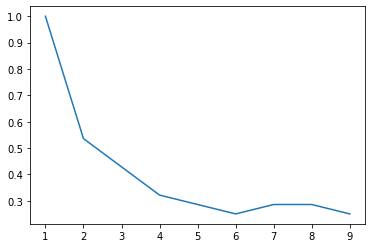

In [196]:
plt.plot(range(1,10),acc)

# 14) location_Brookefield

In [197]:
df14 = df[df['location_Brookefield']==1]

In [198]:
df14 = df14[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [199]:
df14

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
1349     2  3.000000   6900          1150.0    2     6000.000000   
1350     2  2.000000   7000          1142.0    2     6129.597198   
1351     4  2.000000  24000          2800.0    4     8571.428571   
1352     3  2.000000  10500          1476.0    3     7113.821138   
1353     4  1.000000  15200          1700.0    4     8941.176471   
1354     2  1.000000   7500          1262.0    2     5942.947702   
1355     2  2.000000   8000          1139.0    2     7023.705004   
1356     2  2.000000   7000          1125.0    2     6222.222222   
1357     3  2.000000   8500          1420.0    3     5985.915493   
1358     2  2.000000   4800           941.0    2     5100.956429   
1359     2  1.000000   5500          1100.0    2     5000.000000   
1360     3  3.000000  14000          2400.0    4     5833.333333   
1361     2  2.000000   6650          1225.0    2     5428.571429   
1362     6  3.000000  17500          1950.0    5     8974.358974   
1363     2  3.000000   5000          1080.0    2     4629.629630   
1364     2  3.000000   5500          1230.0    2     4471.544715   
1365     2  2.000000   7500          1200.0    2     6250.000000   
1366     2  1.000000   4900          1089.0    2     4499.540863   
1367     2  2.000000   5600          1130.0    2     4955.752212   
1368     2  1.000000   9500          1270.0    2     7480.314961   
1369     3  2.000000  11500          1706.0    3     6740.914420   
1370     2  2.000000   9400          1389.0    2     6767.458603   
1371     2  2.000000   7200          1225.0    2     5877.551020   
1372     3  3.000000  11500          1746.0    3     6586.483391   
1373     3  2.000000  14900          1560.0    4     9551.282051   
1374     2  2.000000   8450          1382.0    2     6114.327062   
1375     2  1.000000   7000          1260.0    2     5555.555556   
1376     2  1.584376   9000          1206.0    2     7462.686567   
1377     3  2.000000  14000          1594.0    3     8782.936010   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
1349                              1                        0   
1350                              0                        1   
1351                              0                        0   
1352                              1                        0   
1353                              0                        0   
1354                              1                        0   
1355                              1                        0   
1356                              1                        0   
1357                              1                        0   
1358                              1                        0   
1359                              0                        1   
1360                              1                        0   
1361                              0                        1   
1362                              0                        0   
1363                              1                        0   
1364                              0                        1   
1365                              1                        0   
1366                              1                        0   
1367                              1                        0   
1368                              1                        0   
1369                              1                        0   
1370                              1                        0   
1371                              0                        1   
1372                              1                        0   
1373                              0                        0   
1374                              1                        0   
1375                              1                        0   
1376                              1                        0   
1377                              1                        0   

      area_typePlot  Area  availability_Read

In [200]:
df14.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.250655  0.811767        0.722111   
balcony                        0.250655  1.000000  0.134600        0.259134   
price                          0.811767  0.134600  1.000000        0.914523   
total_sqft_int                 0.722111  0.259134  0.914523        1.000000   
bhk                            0.934244  0.263510  0.868632        0.816685   
price_per_sqft                 0.673646 -0.051062  0.823569        0.547993   
area_typeSuper built-up  Area -0.361747 -0.014843 -0.315884       -0.229512   
area_typeBuilt-up  Area       -0.263719  0.010099 -0.323346       -0.256014   
area_typePlot  Area            0.774223  0.008851  0.778011        0.588372   
availability_Ready To Move          NaN       NaN       NaN             NaN   

                                    bhk  price_per_sqft  \
bath                           0.934244        0.673646   
balcony                        0.263510       -0.051062   
price                          0.868632        0.823569   
total_sqft_int                 0.816685        0.547993   
bhk                            1.000000        0.703691   
price_per_sqft                 0.703691        1.000000   
area_typeSuper built-up  Area -0.351937       -0.247110   
area_typeBuilt-up  Area       -0.294724       -0.362022   
area_typePlot  Area            0.795027        0.728109   
availability_Ready To Move          NaN             NaN   

                               area_typeSuper built-up  Area  \
bath                                               -0.361747   
balcony                                            -0.014843   
price                                              -0.315884   
total_sqft_int                                     -0.229512   
bhk                                                -0.351937   
price_per_sqft                                     -0.247110   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.680414   
area_typePlot  Area                                -0.596285   
availability_Ready To Move                               NaN   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.263719             0.774223   
balcony                                       0.010099             0.008851   
price                                        -0.323346             0.778011   
total_sqft_int                               -0.256014             0.588372   
bhk                                          -0.294724             0.795027   
price_per_sqft                               -0.362022             0.728109   
area_typeSuper built-up  Area                -0.680414            -0.596285   
area_typeBuilt-up  Area                       1.000000            -0.182574   
area_typePlot  Area                          -0.182574             1.000000   
availability_Ready To Move                         NaN                  NaN   

                               availability_Ready To Move  
bath                                                  NaN  
balcony                                               NaN  
price                                                 NaN  
total_sqft_int                                        NaN  
bhk                                                   NaN  
price_per_sqft                                        NaN  
area_typeSuper built-up  Area                         NaN  
area_typeBuilt-up  Area                               NaN  
area_typePlot  Area                                   NaN  
availability_Ready To Move                            NaN

In [201]:
x = df14[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df14[['price']]

In [202]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5517241379310345]
k= 3 [1.0, 0.5517241379310345, 0.41379310344827586]
k= 4 [1.0, 0.5517241379310345, 0.41379310344827586, 0.3103448275862069]
k= 5 [1.0, 0.5517241379310345, 0.41379310344827586, 0.3103448275862069, 0.27586206896551724]
k= 6 [1.0, 0.5517241379310345, 0.41379310344827586, 0.3103448275862069, 0.27586206896551724, 0.2413793103448276]
k= 7 [1.0, 0.5517241379310345, 0.41379310344827586, 0.3103448275862069, 0.27586206896551724, 0.2413793103448276, 0.2413793103448276]
k= 8 [1.0, 0.5517241379310345, 0.41379310344827586, 0.3103448275862069, 0.27586206896551724, 0.2413793103448276, 0.2413793103448276, 0.20689655172413793]
k= 9 [1.0, 0.5517241379310345, 0.41379310344827586, 0.3103448275862069, 0.27586206896551724, 0.2413793103448276, 0.2413793103448276, 0.20689655172413793, 0.20689655172413793]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [203]:
max(acc)

1.0

In [204]:
k = acc.index(max(acc))+1
k

1

In [205]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


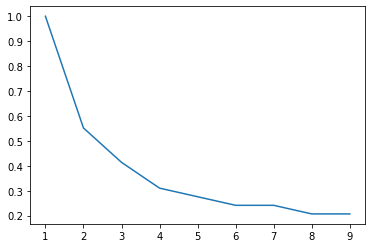

In [206]:
plt.plot(range(1,10),acc)

# 15) location_BTM 2nd Stage

In [207]:
df15 = df[df['location_BTM 2nd Stage']==1]

In [208]:
df15 = df15[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [209]:
df15

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
654     2  1.000000   5200           950.0    2     5473.684211   
655     3  1.584376  17000          1850.0    3     9189.189189   
656     2  2.000000   8000          1200.0    2     6666.666667   
657     2  2.000000   7000          1274.0    2     5494.505495   
658     2  1.000000   4800          1070.0    2     4485.981308   
659     2  2.000000   8000          1280.0    2     6250.000000   
660     2  2.000000   7000          1100.0    2     6363.636364   
661     2  2.000000   5800          1000.0    2     5800.000000   
662     5  3.000000  41600          2990.0    5    13913.043480   
663     2  2.000000   5500          1265.0    2     4347.826087   
664     3  3.000000  22000          2200.0    3    10000.000000   
665     4  1.000000  32500          2780.0    3    11690.647480   
666     2  0.000000  36000          2400.0    3    15000.000000   
667     2  2.000000   5600           965.0    2     5803.108808   
668     2  1.000000   7500          1147.0    2     6538.796861   
669     3  3.000000  17200          1750.0    3     9828.571429   
670     2  3.000000   9000          1400.0    2     6428.571429   
671     2  2.000000   7000          1200.0    2     5833.333333   
672     2  2.000000   4700          1100.0    2     4272.727273   
673     2  2.000000   4600           930.0    2     4946.236559   
674     3  2.000000  34500          2500.0    3    13800.000000   

     area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
654                              0                        0   
655                              0                        1   
656                              1                        0   
657                              1                        0   
658                              1                        0   
659                              0                        1   
660                              0                        1   
661                              1                        0   
662                              0                        0   
663                              1                        0   
664                              1                        0   
665                              1                        0   
666                              0                        0   
667                              1                        0   
668                              1                        0   
669                              0                        1   
670                              1                        0   
671                              1                        0   
672                              1                        0   
673                              1                        0   
674                              1                        0   

     area_typePlot  Area  availability_Ready To Move  
654                    0                           1  
655                    0                           1  
656                    0                           1  
657                    0                           1  
658                    0                           1  
659                    0                           1  
660                    0                           1  
661                    0                           1  
662                    1                           1  
663                    0                           1  
664                    0                           1  
665                    0                           1  
666                    1                           1  
667                    0                           1  
668                    0                           1  
669                    0                           1  
670                    0                           1  
671                    0                           1  
672                    0                           1  
673                    0                   

In [210]:
df15.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.289495  0.795756        0.850887   
balcony                        0.289495  1.000000 -0.031364        0.054413   
price                          0.795756 -0.031364  1.000000        0.977069   
total_sqft_int                 0.850887  0.054413  0.977069        1.000000   
bhk                            0.920775  0.227543  0.883614        0.884930   
price_per_sqft                 0.704995 -0.061450  0.976243        0.931643   
area_typeSuper built-up  Area -0.255377  0.081930 -0.301043       -0.244700   
area_typeBuilt-up  Area        0.043797  0.168299 -0.063031       -0.034818   
area_typePlot  Area            0.439406 -0.165957  0.686450        0.590589   
availability_Ready To Move          NaN       NaN       NaN             NaN   

                                    bhk  price_per_sqft  \
bath                           0.920775        0.704995   
balcony                        0.227543       -0.061450   
price                          0.883614        0.976243   
total_sqft_int                 0.884930        0.931643   
bhk                            1.000000        0.831544   
price_per_sqft                 0.831544        1.000000   
area_typeSuper built-up  Area -0.416025       -0.368451   
area_typeBuilt-up  Area        0.047565        0.027706   
area_typePlot  Area            0.699913        0.665636   
availability_Ready To Move          NaN             NaN   

                               area_typeSuper built-up  Area  \
bath                                               -0.255377   
balcony                                             0.081930   
price                                              -0.301043   
total_sqft_int                                     -0.244700   
bhk                                                -0.416025   
price_per_sqft                                     -0.368451   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.685994   
area_typePlot  Area                                -0.458831   
availability_Ready To Move                               NaN   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.043797             0.439406   
balcony                                       0.168299            -0.165957   
price                                        -0.063031             0.686450   
total_sqft_int                               -0.034818             0.590589   
bhk                                           0.047565             0.699913   
price_per_sqft                                0.027706             0.665636   
area_typeSuper built-up  Area                -0.685994            -0.458831   
area_typeBuilt-up  Area                       1.000000            -0.157378   
area_typePlot  Area                          -0.157378             1.000000   
availability_Ready To Move                         NaN                  NaN   

                               availability_Ready To Move  
bath                                                  NaN  
balcony                                               NaN  
price                                                 NaN  
total_sqft_int                                        NaN  
bhk                                                   NaN  
price_per_sqft                                        NaN  
area_typeSuper built-up  Area                         NaN  
area_typeBuilt-up  Area                               NaN  
area_typePlot  Area                                   NaN  
availability_Ready To Move                            NaN

In [211]:
x = df15[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df15[['price']]

In [212]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.42857142857142855]
k= 3 [1.0, 0.42857142857142855, 0.38095238095238093]
k= 4 [1.0, 0.42857142857142855, 0.38095238095238093, 0.23809523809523808]
k= 5 [1.0, 0.42857142857142855, 0.38095238095238093, 0.23809523809523808, 0.23809523809523808]
k= 6 [1.0, 0.42857142857142855, 0.38095238095238093, 0.23809523809523808, 0.23809523809523808, 0.19047619047619047]
k= 7 [1.0, 0.42857142857142855, 0.38095238095238093, 0.23809523809523808, 0.23809523809523808, 0.19047619047619047, 0.19047619047619047]
k= 8 [1.0, 0.42857142857142855, 0.38095238095238093, 0.23809523809523808, 0.23809523809523808, 0.19047619047619047, 0.19047619047619047, 0.19047619047619047]
k= 9 [1.0, 0.42857142857142855, 0.38095238095238093, 0.23809523809523808, 0.23809523809523808, 0.19047619047619047, 0.19047619047619047, 0.19047619047619047, 0.14285714285714285]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [213]:
max(acc)

1.0

In [214]:
k = acc.index(max(acc))+1
k

1

In [215]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


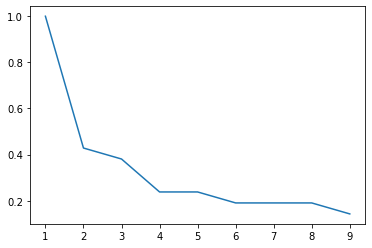

In [216]:
plt.plot(range(1,10),acc)

# 16) location_Budigere

In [217]:
df16 = df[df['location_Budigere']==1]

In [218]:
df16 = df16[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [219]:
df16

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
1378     2      2.0   5640          1153.0    2     4891.587164   
1379     2      1.0   5990          1162.0    2     5154.905336   
1380     4      2.0  10300          1991.0    3     5173.279759   
1381     2      2.0   5700          1153.0    2     4943.625325   
1382     2      1.0   5700          1162.0    2     4905.335628   
1383     2      2.0   5680          1139.0    2     4986.830553   
1384     2      2.0   5685          1139.0    2     4991.220369   
1385     4      2.0  10000          1991.0    3     5022.601708   
1386     1      1.0   3500           664.0    1     5271.084337   
1387     3      2.0   9300          1820.0    3     5109.890110   
1388     3      2.0   8500          1636.0    3     5195.599022   
1389     2      2.0   7000          1444.0    2     4847.645429   
1390     2      2.0   6000          1139.0    2     5267.778753   
1391     3      2.0   9300          1820.0    3     5109.890110   
1392     2      1.0   5800          1162.0    2     4991.394148   
1393     3      2.0   8500          1636.0    3     5195.599022   
1394     2      1.0   5430          1087.0    2     4995.400184   
1395     1      1.0   3540           664.0    1     5331.325301   
1396     2      2.0   5670          1153.0    2     4917.606245   
1397     2      2.0   5650          1139.0    2     4960.491659   
1398     3      2.0   8300          1636.0    3     5073.349633   
1399     1      1.0   3400           664.0    1     5120.481928   
1400     2      1.0   5800          1162.0    2     4991.394148   
1401     2      2.0   6000          1153.0    2     5203.816132   
1402     3      2.0   9900          1820.0    3     5439.560440   
1403     2      0.0   5672          1172.0    2     4840.017065   
1404     3      2.0   9500          1820.0    3     5219.780220   
1405     4      2.0  10000          1991.0    3     5022.601708   
1406     3      2.0   9550          1820.0    3     5247.252747   
1407     2      2.0   5600          1153.0    2     4856.895056   
1408     1      0.0   3454           705.0    1     4900.000000   
1409     2      2.0   5650          1153.0    2     4900.260191   
1410     2      2.0   5800          1153.0    2     5030.355594   
1411     3      2.0   8800          1636.0    3     5378.973105   
1412     2      2.0   5655          1153.0    2     4904.596704   
1413     2      2.0   5650          1153.0    2     4900.260191   
1414     2      2.0   6000          1153.0    2     5203.816132   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
1378                              1                        0   
1379                              1                        0   
1380                              1                        0   
1381                              1                        0   
1382                              1                        0   
1383                              1                        0   
1384                              1                        0   
1385                              1                        0   
1386                              1                        0   
1387                              1                        0   
1388                              1                        0   
1389                              1                        0   
1390                              1                        0   
1391                              1                        0   
1392                              1                        0   
1393                              1                        0   
1394                              1                        0   
1395                              1                        0   
1396                              1                        0   
1397                              1                        0   
1398                              1                        0   
1399                              0                

In [220]:
df16.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.528193  0.963352        0.971755   
balcony                        0.528193  1.000000  0.539788        0.542046   
price                          0.963352  0.539788  1.000000        0.994914   
total_sqft_int                 0.971755  0.542046  0.994914        1.000000   
bhk                            0.943909  0.577764  0.966758        0.966188   
price_per_sqft                 0.231324  0.169057  0.350810        0.258178   
area_typeSuper built-up  Area  0.092735  0.073410  0.025924        0.047879   
area_typeBuilt-up  Area       -0.092735 -0.073410 -0.025924       -0.047879   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move     0.248700  0.700219  0.253996        0.240106   

                                    bhk  price_per_sqft  \
bath                           0.943909        0.231324   
balcony                        0.577764        0.169057   
price                          0.966758        0.350810   
total_sqft_int                 0.966188        0.258178   
bhk                            1.000000        0.281049   
price_per_sqft                 0.281049        1.000000   
area_typeSuper built-up  Area  0.083225       -0.175183   
area_typeBuilt-up  Area       -0.083225        0.175183   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move     0.275683        0.297200   

                               area_typeSuper built-up  Area  \
bath                                                0.092735   
balcony                                             0.073410   
price                                               0.025924   
total_sqft_int                                      0.047879   
bhk                                                 0.083225   
price_per_sqft                                     -0.175183   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.057143   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.092735                  NaN   
balcony                                      -0.073410                  NaN   
price                                        -0.025924                  NaN   
total_sqft_int                               -0.047879                  NaN   
bhk                                          -0.083225                  NaN   
price_per_sqft                                0.175183                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.057143                  NaN   

                               availability_Ready To Move  
bath                                             0.248700  
balcony                                          0.700219  
price                                            0.253996  
total_sqft_int                                   0.240106  
bhk                                              0.275683  
price_per_sqft                                   0.297200  
area_typeSuper built-up  Area                   -0.057143  
area_typeBuilt-up  Area                          0.057143  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [221]:
x = df16[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df16[['price']]

In [222]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6486486486486487]
k= 3 [1.0, 0.6486486486486487, 0.5135135135135135]
k= 4 [1.0, 0.6486486486486487, 0.5135135135135135, 0.4864864864864865]
k= 5 [1.0, 0.6486486486486487, 0.5135135135135135, 0.4864864864864865, 0.43243243243243246]
k= 6 [1.0, 0.6486486486486487, 0.5135135135135135, 0.4864864864864865, 0.43243243243243246, 0.35135135135135137]
k= 7 [1.0, 0.6486486486486487, 0.5135135135135135, 0.4864864864864865, 0.43243243243243246, 0.35135135135135137, 0.2972972972972973]
k= 8 [1.0, 0.6486486486486487, 0.5135135135135135, 0.4864864864864865, 0.43243243243243246, 0.35135135135135137, 0.2972972972972973, 0.2972972972972973]
k= 9 [1.0, 0.6486486486486487, 0.5135135135135135, 0.4864864864864865, 0.43243243243243246, 0.35135135135135137, 0.2972972972972973, 0.2972972972972973, 0.24324324324324326]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [223]:
max(acc)

1.0

In [224]:
k = acc.index(max(acc))+1
k

1

In [225]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


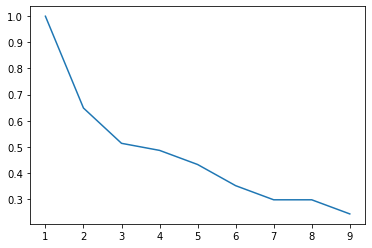

In [226]:
plt.plot(range(1,10),acc)

# 17) location_Chandapura

In [227]:
df17 = df[df['location_Chandapura']==1]

In [228]:
df17 = df17[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [229]:
df17

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
1476     1      1.0   1645          645.00    1     2550.387597   
1477     1      1.0   1645          645.00    1     2550.387597   
1478     2      2.0   3200         1200.00    2     2666.666667   
1479     2      2.0   2768         1025.00    2     2700.487805   
1480     1      0.0   1513          582.50    1     2598.283262   
1481     2      1.0   3300         1065.00    3     3098.591549   
1482     2      1.0   2540          850.00    2     2988.235294   
1483     1      0.0   1357          590.00    1     2300.000000   
1484     1      1.0   1645          645.00    1     2550.387597   
1485     1      1.0   1404          520.00    1     2700.000000   
1486     1      1.0   3600         1200.00    2     3000.000000   
1487     1      1.0   1645          645.00    1     2550.387597   
1488     1      1.0   1645          645.00    1     2550.387597   
1489     1      1.0   1900          700.00    2     2714.285714   
1490     2      2.0   3200         1095.00    3     2922.374429   
1491     3      2.0   4200         1208.51    3     3475.353948   
1492     2      2.0   2950          876.00    2     3367.579909   
1493     1      1.0   1645          645.00    1     2550.387597   
1494     2      2.0   4200         1505.00    3     2790.697674   
1495     1      1.0   1645          645.00    1     2550.387597   
1496     2      1.0   3000          937.00    2     3201.707577   
1497     2      2.0   2768         1025.00    2     2700.487805   
1498     2      1.0   2500          800.00    2     3125.000000   
1499     1      1.0   1645          645.00    1     2550.387597   
1500     2      0.0   2529          778.00    2     3250.642674   
1501     2      1.0   2565          950.00    2     2700.000000   
1502     2      1.0   3600         1200.00    2     3000.000000   
1503     1      1.0   1645          645.00    1     2550.387597   
1504     2      2.0   2768         1025.00    2     2700.487805   
1505     2      2.0   3950         1345.00    3     2936.802974   
1506     1      1.0   1404          520.00    1     2700.000000   
1507     2      1.0   4200         1323.00    3     3174.603175   
1508     1      1.0   1000          410.00    1     2439.024390   
1509     1      1.0   1645          645.00    1     2550.387597   
1510     1      1.0   1645          645.00    1     2550.387597   
1511     2      1.0   3600         1200.00    2     3000.000000   
1512     1      1.0   2200          740.00    2     2972.972973   
1513     2      2.0   2847          876.00    2     3250.000000   
1514     1      1.0   1404          520.00    1     2700.000000   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
1476                              1                        0   
1477                              1                        0   
1478                              1                        0   
1479                              1                        0   
1480                              1                        0   
1481                              1                        0   
1482                              1                        0   
1483                              1                        0   
1484                              1                        0   
1485                              1                        0   
1486                              0                        0   
1487                              1                        0   
1488                              1                        0   
1489                              1                        0   
1490                              1                        0   
1491                              0                        1   
1492                              1                        0   
1493                              1                        0   
1494                              1                        0   
1495                              1          

In [230]:
df17.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.545852  0.829872        0.769119   
balcony                        0.545852  1.000000  0.530545        0.561968   
price                          0.829872  0.530545  1.000000        0.973984   
total_sqft_int                 0.769119  0.561968  0.973984        1.000000   
bhk                            0.826958  0.521671  0.915749        0.876770   
price_per_sqft                 0.747471  0.291152  0.728657        0.562979   
area_typeSuper built-up  Area -0.200692 -0.014335 -0.421867       -0.364988   
area_typeBuilt-up  Area        0.206412  0.135797  0.195310        0.105748   
area_typePlot  Area            0.080933 -0.094422  0.367613        0.370389   
availability_Ready To Move     0.389391  0.389391  0.463730        0.420720   

                                    bhk  price_per_sqft  \
bath                           0.826958        0.747471   
balcony                        0.521671        0.291152   
price                          0.915749        0.728657   
total_sqft_int                 0.876770        0.562979   
bhk                            1.000000        0.727590   
price_per_sqft                 0.727590        1.000000   
area_typeSuper built-up  Area -0.258805       -0.392963   
area_typeBuilt-up  Area        0.254556        0.349145   
area_typePlot  Area            0.113991        0.204012   
availability_Ready To Move     0.652145        0.408874   

                               area_typeSuper built-up  Area  \
bath                                               -0.200692   
balcony                                            -0.014335   
price                                              -0.421867   
total_sqft_int                                     -0.364988   
bhk                                                -0.258805   
price_per_sqft                                     -0.392963   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.606274   
area_typePlot  Area                                -0.752773   
availability_Ready To Move                         -0.076696   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.206412             0.080933   
balcony                                       0.135797            -0.094422   
price                                         0.195310             0.367613   
total_sqft_int                                0.105748             0.370389   
bhk                                           0.254556             0.113991   
price_per_sqft                                0.349145             0.204012   
area_typeSuper built-up  Area                -0.606274            -0.752773   
area_typeBuilt-up  Area                       1.000000            -0.067116   
area_typePlot  Area                          -0.067116             1.000000   
availability_Ready To Move                    0.348743            -0.192450   

                               availability_Ready To Move  
bath                                             0.389391  
balcony                                          0.389391  
price                                            0.463730  
total_sqft_int                                   0.420720  
bhk                                              0.652145  
price_per_sqft                                   0.408874  
area_typeSuper built-up  Area                   -0.076696  
area_typeBuilt-up  Area                          0.348743  
area_typePlot  Area                             -0.192450  
availability_Ready To Move                       1.000000

In [231]:
x = df17[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df17[['price']]

In [232]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.7435897435897436]
k= 3 [1.0, 0.7435897435897436, 0.6153846153846154]
k= 4 [1.0, 0.7435897435897436, 0.6153846153846154, 0.5897435897435898]
k= 5 [1.0, 0.7435897435897436, 0.6153846153846154, 0.5897435897435898, 0.5641025641025641]
k= 6 [1.0, 0.7435897435897436, 0.6153846153846154, 0.5897435897435898, 0.5641025641025641, 0.5384615384615384]
k= 7 [1.0, 0.7435897435897436, 0.6153846153846154, 0.5897435897435898, 0.5641025641025641, 0.5384615384615384, 0.5384615384615384]
k= 8 [1.0, 0.7435897435897436, 0.6153846153846154, 0.5897435897435898, 0.5641025641025641, 0.5384615384615384, 0.5384615384615384, 0.5128205128205128]
k= 9 [1.0, 0.7435897435897436, 0.6153846153846154, 0.5897435897435898, 0.5641025641025641, 0.5384615384615384, 0.5384615384615384, 0.5128205128205128, 0.4358974358974359]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [233]:
max(acc)

1.0

In [234]:
k = acc.index(max(acc))+1
k

1

In [235]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


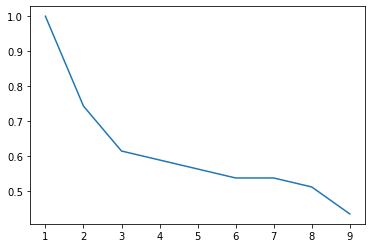

In [236]:
plt.plot(range(1,10),acc)

# 18) location_Channasandra

In [237]:
df18 = df[df['location_Channasandra']==1]

In [238]:
df18 = df18[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [239]:
df18

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
1520     2      1.0   3834          1009.0    2     3799.801784   
1521     2      1.0   3500          1065.0    2     3286.384977   
1522     2      1.0   9000          1470.0    3     6122.448980   
1523     2      1.0   3345          1115.0    2     3000.000000   
1524     2      1.0   3450          1030.0    2     3349.514563   
1525     6      0.0  18000          4200.0    6     4285.714286   
1526     2      1.0   4000          1115.0    2     3587.443946   
1527     3      1.0   6777          1200.0    3     5647.500000   
1528     2      1.0   3550          1104.0    2     3215.579710   
1529     2      1.0   5500          1160.0    2     4741.379310   
1530     2      2.0   4100          1050.0    2     3904.761905   
1531     2      1.0   4047          1065.0    2     3800.000000   
1532     2      1.0   3800          1070.0    2     3551.401869   
1533     2      1.0   3500          1050.0    2     3333.333333   
1534     2      1.0   3400          1093.0    2     3110.704483   
1535     2      1.0   4000           808.0    2     4950.495050   
1536     2      1.0   3600          1010.0    2     3564.356436   
1537     2      1.0   3600          1123.0    2     3205.699020   
1538     2      2.0   3500          1000.0    2     3500.000000   
1539     4      1.0   8945          1500.0    4     5963.333333   
1540     2      2.0   5183          1330.0    3     3896.992481   
1541     2      1.0   3700          1093.0    2     3385.178408   
1542     2      1.0   3579          1115.0    2     3210.762332   
1543     3      1.0   6195          1500.0    3     4130.000000   
1544     2      1.0   3628           830.0    2     4371.084337   
1545     3      1.0   6777          1200.0    3     5647.500000   
1546     2      1.0   5600          1195.0    3     4686.192469   
1547     2      2.0   3800          1175.0    2     3234.042553   
1548     2      1.0   4613          1200.0    2     3844.166667   
1549     2      1.0   3600          1065.0    2     3380.281690   
1550     2      1.0   4441          1050.0    2     4229.523810   
1551     2      1.0   3200          1010.0    2     3168.316832   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
1520                              1                        0   
1521                              1                        0   
1522                              1                        0   
1523                              1                        0   
1524                              1                        0   
1525                              0                        1   
1526                              1                        0   
1527                              0                        0   
1528                              1                        0   
1529                              1                        0   
1530                              1                        0   
1531                              1                        0   
1532                              1                        0   
1533                              1                        0   
1534                              1                        0   
1535                              0                        1   
1536                              1                        0   
1537                              1                        0   
1538                              1                        0   
1539                              0                        0   
1540                              1                        0   
1541                              1                        0   
1542                              1                        0   
1543                              0                        0   
1544                              1                        0   
1545                              0                        0   
1546                              1                        0   
15

In [240]:
df18.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000 -0.492859  0.915184        0.893100   
balcony                       -0.492859  1.000000 -0.473319       -0.482325   
price                          0.915184 -0.473319  1.000000        0.926411   
total_sqft_int                 0.893100 -0.482325  0.926411        1.000000   
bhk                            0.935502 -0.409535  0.961273        0.894605   
price_per_sqft                 0.394723 -0.156581  0.538365        0.185142   
area_typeSuper built-up  Area -0.664573  0.326038 -0.564148       -0.417564   
area_typeBuilt-up  Area        0.554877 -0.399227  0.562424        0.595788   
area_typePlot  Area            0.386732 -0.105060  0.267362        0.078225   
availability_Ready To Move    -0.131153 -0.315179 -0.066679        0.080080   

                                    bhk  price_per_sqft  \
bath                           0.935502        0.394723   
balcony                       -0.409535       -0.156581   
price                          0.961273        0.538365   
total_sqft_int                 0.894605        0.185142   
bhk                            1.000000        0.507977   
price_per_sqft                 0.507977        1.000000   
area_typeSuper built-up  Area -0.587918       -0.581888   
area_typeBuilt-up  Area        0.511875        0.192679   
area_typePlot  Area            0.328125        0.534056   
availability_Ready To Move    -0.118125       -0.378040   

                               area_typeSuper built-up  Area  \
bath                                               -0.664573   
balcony                                             0.326038   
price                                              -0.564148   
total_sqft_int                                     -0.417564   
bhk                                                -0.587918   
price_per_sqft                                     -0.581888   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.487950   
area_typePlot  Area                                -0.813250   
availability_Ready To Move                          0.370842   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.554877             0.386732   
balcony                                      -0.399227            -0.105060   
price                                         0.562424             0.267362   
total_sqft_int                                0.595788             0.078225   
bhk                                           0.511875             0.328125   
price_per_sqft                                0.192679             0.534056   
area_typeSuper built-up  Area                -0.487950            -0.813250   
area_typeBuilt-up  Area                       1.000000            -0.111111   
area_typePlot  Area                          -0.111111             1.000000   
availability_Ready To Move                    0.200000            -0.555556   

                               availability_Ready To Move  
bath                                            -0.131153  
balcony                                         -0.315179  
price                                           -0.066679  
total_sqft_int                                   0.080080  
bhk                                             -0.118125  
price_per_sqft                                  -0.378040  
area_typeSuper built-up  Area                    0.370842  
area_typeBuilt-up  Area                          0.200000  
area_typePlot  Area                             -0.555556  
availability_Ready To Move                       1.000000

In [241]:
x = df18[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df18[['price']]

In [242]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.59375]
k= 3 [1.0, 0.59375, 0.34375]
k= 4 [1.0, 0.59375, 0.34375, 0.25]
k= 5 [1.0, 0.59375, 0.34375, 0.25, 0.21875]
k= 6 [1.0, 0.59375, 0.34375, 0.25, 0.21875, 0.21875]
k= 7 [1.0, 0.59375, 0.34375, 0.25, 0.21875, 0.21875, 0.1875]
k= 8 [1.0, 0.59375, 0.34375, 0.25, 0.21875, 0.21875, 0.1875, 0.1875]
k= 9 [1.0, 0.59375, 0.34375, 0.25, 0.21875, 0.21875, 0.1875, 0.1875, 0.1875]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [243]:
max(acc)

1.0

In [244]:
k = acc.index(max(acc))+1
k

1

In [245]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


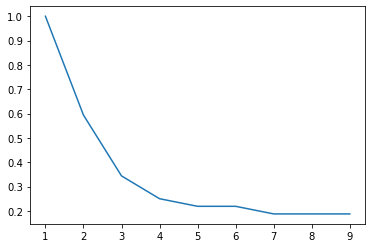

In [246]:
plt.plot(range(1,10),acc)

# 19) location_CV Raman Nagar

In [247]:
df19 = df[df['location_CV Raman Nagar']==1]

In [248]:
df19 = df19[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [249]:
df19

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
1429     2      2.0   5500          1120.0    2     4910.714286   
1430     2      1.0   5500          1070.0    2     5140.186916   
1431     2      1.0   3700           740.0    2     5000.000000   
1432     2      1.0   4900          1028.0    2     4766.536965   
1433     2      1.0   9800          1392.0    2     7040.229885   
1434     2      2.0   4750          1070.0    2     4439.252336   
1435     3      2.0  12600          1825.0    3     6904.109589   
1436     2      2.0   5000          1025.0    2     4878.048780   
1437     2      2.0   6000          1198.0    2     5008.347245   
1438     2      2.0   8500          1560.0    2     5448.717949   
1439     2      3.0   8500          1590.0    3     5345.911950   
1440     2      1.0   5800          1100.0    2     5272.727273   
1441     2      3.0   6100          1051.0    2     5803.996194   
1442     2      1.0   5500          1020.0    2     5392.156863   
1443     2      2.0   6500          1285.0    2     5058.365759   
1444     2      1.0   5000          1040.0    2     4807.692308   
1445     2      1.0   9500          1392.0    2     6824.712644   
1446     2      1.0   5000           705.0    1     7092.198582   
1447     2      1.0   4600          1125.0    2     4088.888889   
1448     2      2.0   7800          1400.0    3     5571.428571   
1449     2      2.0   7800          1400.0    3     5571.428571   
1450     2      2.0   3800           907.0    2     4189.636163   
1451     2      1.0   6200          1310.0    2     4732.824427   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
1429                              1                        0   
1430                              0                        1   
1431                              1                        0   
1432                              0                        1   
1433                              1                        0   
1434                              1                        0   
1435                              1                        0   
1436                              1                        0   
1437                              1                        0   
1438                              1                        0   
1439                              1                        0   
1440                              1                        0   
1441                              1                        0   
1442                              1                        0   
1443                              1                        0   
1444                              1                        0   
1445                              1                        0   
1446                              1                        0   
1447                              0                        1   
1448                              1                        0   
1449                              1                        0   
1450                              1                        0   
1451                              0                        1   

      area_typePlot  Area  availability_Ready To Move  
1429                    0                           1  
1430                    0                           1  
1431                    0                           1  
1432                    0                           1  
1433                    0                           1  
1434                    0                           1  
1435                    0                           1  
1436                    0                           1  
1437                    0                           1  
1438                    0                           1  
1439                    0                           1  
1440                    0                           1  
1441                    0                           1  
1442                    0                           1  
1443                

In [250]:
df19.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.129958  0.618024        0.516899   
balcony                        0.129958  1.000000  0.228254        0.367380   
price                          0.618024  0.228254  1.000000        0.897728   
total_sqft_int                 0.516899  0.367380  0.897728        1.000000   
bhk                            0.414158  0.480222  0.565399        0.719420   
price_per_sqft                 0.390162 -0.061426  0.705455        0.339703   
area_typeSuper built-up  Area  0.097823  0.435064  0.248709        0.098008   
area_typeBuilt-up  Area       -0.097823 -0.435064 -0.248709       -0.098008   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move     0.045455  0.202157 -0.306500       -0.164841   

                                    bhk  price_per_sqft  \
bath                           0.414158        0.390162   
balcony                        0.480222       -0.061426   
price                          0.565399        0.705455   
total_sqft_int                 0.719420        0.339703   
bhk                            1.000000        0.025287   
price_per_sqft                 0.025287        1.000000   
area_typeSuper built-up  Area  0.133697        0.368907   
area_typeBuilt-up  Area       -0.133697       -0.368907   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move     0.062124       -0.370096   

                               area_typeSuper built-up  Area  \
bath                                                0.097823   
balcony                                             0.435064   
price                                               0.248709   
total_sqft_int                                      0.098008   
bhk                                                 0.133697   
price_per_sqft                                      0.368907   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.097823   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.097823                  NaN   
balcony                                      -0.435064                  NaN   
price                                        -0.248709                  NaN   
total_sqft_int                               -0.098008                  NaN   
bhk                                          -0.133697                  NaN   
price_per_sqft                               -0.368907                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.097823                  NaN   

                               availability_Ready To Move  
bath                                             0.045455  
balcony                                          0.202157  
price                                           -0.306500  
total_sqft_int                                  -0.164841  
bhk                                              0.062124  
price_per_sqft                                  -0.370096  
area_typeSuper built-up  Area                   -0.097823  
area_typeBuilt-up  Area                          0.097823  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [251]:
x = df19[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df19[['price']]

In [252]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5652173913043478]
k= 3 [1.0, 0.5652173913043478, 0.4782608695652174]
k= 4 [1.0, 0.5652173913043478, 0.4782608695652174, 0.34782608695652173]
k= 5 [1.0, 0.5652173913043478, 0.4782608695652174, 0.34782608695652173, 0.34782608695652173]
k= 6 [1.0, 0.5652173913043478, 0.4782608695652174, 0.34782608695652173, 0.34782608695652173, 0.34782608695652173]
k= 7 [1.0, 0.5652173913043478, 0.4782608695652174, 0.34782608695652173, 0.34782608695652173, 0.34782608695652173, 0.2608695652173913]
k= 8 [1.0, 0.5652173913043478, 0.4782608695652174, 0.34782608695652173, 0.34782608695652173, 0.34782608695652173, 0.2608695652173913, 0.2608695652173913]
k= 9 [1.0, 0.5652173913043478, 0.4782608695652174, 0.34782608695652173, 0.34782608695652173, 0.34782608695652173, 0.2608695652173913, 0.2608695652173913, 0.17391304347826086]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [253]:
max(acc)

1.0

In [254]:
k = acc.index(max(acc))+1
k

1

In [255]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


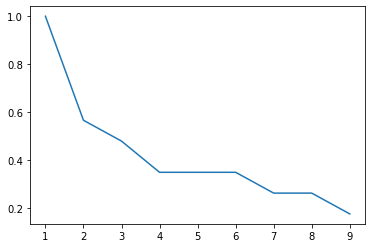

In [256]:
plt.plot(range(1,10),acc)

# 20) location_Devanahalli

In [257]:
df20 = df[df['location_Devanahalli']==1]

In [258]:
df20 = df20[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [259]:
df20

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
1709     2      2.0   6678          1260.0    2     5300.000000   
1710     2      2.0   6852          1282.0    3     5344.773791   
1711     2      1.0   6500          1360.0    2     4779.411765   
1712     2      2.0   8500          1408.0    2     6036.931818   
1713     2      1.0   5100          1010.0    2     5049.504950   
1714     2      0.0   5335          1080.0    2     4939.814815   
1715     5      3.0  10000          2400.0    5     4166.666667   
1716     2      1.0   5900          1174.0    2     5025.553663   
1717     1      1.0   3400           658.0    1     5167.173252   
1718     1      0.0   2691           658.0    1     4089.665653   
1719     1      0.0   2857           698.5    1     4090.193271   
1720     2      1.0   5200          1080.0    2     4814.814815   
1721     3      0.0   8820          1700.0    3     5188.235294   
1722     3      3.0   7915          1498.0    3     5283.711615   
1723     3      3.0   7759          1466.0    3     5292.633015   
1724     1      0.0   3900           775.0    1     5032.258065   
1725     2      1.0   4987          1020.0    1     4889.215686   
1726     2      2.0   4800          1045.0    2     4593.301435   
1727     3      1.0   8500          1550.0    3     5483.870968   
1728     2      1.0   6500          1340.0    2     4850.746269   
1729     3      1.0  10700          2125.0    3     5035.294118   
1730     2      1.0   5645          1230.0    2     4589.430894   
1731     2      0.0   6242          1360.0    2     4590.073529   
1732     1      1.0   2691           658.0    1     4089.665653   
1733     2      1.0   5800          1010.0    2     5742.574257   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
1709                              1                        0   
1710                              1                        0   
1711                              1                        0   
1712                              1                        0   
1713                              1                        0   
1714                              1                        0   
1715                              0                        0   
1716                              1                        0   
1717                              1                        0   
1718                              1                        0   
1719                              1                        0   
1720                              1                        0   
1721                              1                        0   
1722                              1                        0   
1723                              1                        0   
1724                              1                        0   
1725                              1                        0   
1726                              1                        0   
1727                              1                        0   
1728                              1                        0   
1729                              0                        1   
1730                              1                        0   
1731                              1                        0   
1732                              1                        0   
1733                              0                        1   

      area_typePlot  Area  availability_Ready To Move  
1709                    0                           0  
1710                    0                           0  
1711                    0                           0  
1712                    0                           0  
1713                    0                           1  
1714                    0                           1  
1715                    1                           1  
1716                    0                           0  
1717                    0                           0  
1718                    0             

In [260]:
df20.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.577336  0.862191        0.926867   
balcony                        0.577336  1.000000  0.482285        0.466069   
price                          0.862191  0.482285  1.000000        0.955067   
total_sqft_int                 0.926867  0.466069  0.955067        1.000000   
bhk                            0.950316  0.596278  0.857785        0.908322   
price_per_sqft                 0.141582  0.271444  0.448872        0.182498   
area_typeSuper built-up  Area -0.518891 -0.202414 -0.467124       -0.538226   
area_typeBuilt-up  Area        0.129772 -0.051043  0.292503        0.234654   
area_typePlot  Area            0.680823  0.406333  0.369684        0.567683   
availability_Ready To Move     0.202585 -0.025975 -0.016538        0.016245   

                                    bhk  price_per_sqft  \
bath                           0.950316        0.141582   
balcony                        0.596278        0.271444   
price                          0.857785        0.448872   
total_sqft_int                 0.908322        0.182498   
bhk                            1.000000        0.175440   
price_per_sqft                 0.175440        1.000000   
area_typeSuper built-up  Area -0.493111       -0.032295   
area_typeBuilt-up  Area        0.123325        0.270762   
area_typePlot  Area            0.646997       -0.321297   
availability_Ready To Move     0.192520        0.054873   

                               area_typeSuper built-up  Area  \
bath                                               -0.518891   
balcony                                            -0.202414   
price                                              -0.467124   
total_sqft_int                                     -0.538226   
bhk                                                -0.493111   
price_per_sqft                                     -0.032295   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.798549   
area_typePlot  Area                                -0.552771   
availability_Ready To Move                         -0.274430   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.129772             0.680823   
balcony                                      -0.051043             0.406333   
price                                         0.292503             0.369684   
total_sqft_int                                0.234654             0.567683   
bhk                                           0.123325             0.646997   
price_per_sqft                                0.270762            -0.321297   
area_typeSuper built-up  Area                -0.798549            -0.552771   
area_typeBuilt-up  Area                       1.000000            -0.060193   
area_typePlot  Area                          -0.060193             1.000000   
availability_Ready To Move                    0.113787             0.297560   

                               availability_Ready To Move  
bath                                             0.202585  
balcony                                         -0.025975  
price                                           -0.016538  
total_sqft_int                                   0.016245  
bhk                                              0.192520  
price_per_sqft                                   0.054873  
area_typeSuper built-up  Area                   -0.274430  
area_typeBuilt-up  Area                          0.113787  
area_typePlot  Area                              0.297560  
availability_Ready To Move                       1.000000

In [261]:
x = df20[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df20[['price']]

In [262]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.52]
k= 3 [1.0, 0.52, 0.4]
k= 4 [1.0, 0.52, 0.4, 0.4]
k= 5 [1.0, 0.52, 0.4, 0.4, 0.32]
k= 6 [1.0, 0.52, 0.4, 0.4, 0.32, 0.28]
k= 7 [1.0, 0.52, 0.4, 0.4, 0.32, 0.28, 0.32]
k= 8 [1.0, 0.52, 0.4, 0.4, 0.32, 0.28, 0.32, 0.28]
k= 9 [1.0, 0.52, 0.4, 0.4, 0.32, 0.28, 0.32, 0.28, 0.28]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [263]:
max(acc)

1.0

In [264]:
k = acc.index(max(acc))+1
k

1

In [265]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


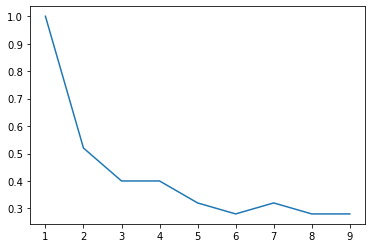

In [266]:
plt.plot(range(1,10),acc)

# 21) location_Dodda Nekkundi

In [267]:
df21 = df[df['location_Dodda Nekkundi']==1]

In [268]:
df21 = df21[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [269]:
df21

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
1756     2  2.000000   5500          1260.0    2     4365.079365   
1757     2  3.000000   2800           850.0    2     3294.117647   
1758     2  2.000000   6000          1390.0    2     4316.546763   
1759     3  2.000000  12100          1804.0    3     6707.317073   
1760     2  2.000000   5000          1080.0    2     4629.629630   
1761     3  2.000000  13200          1999.0    3     6603.301651   
1762     2  2.000000   4800          1100.0    2     4363.636364   
1763     3  2.000000  13500          1999.0    3     6753.376688   
1764     2  1.000000   4115          1100.0    2     3740.909091   
1765     2  1.000000   7100          1252.0    3     5670.926518   
1766     2  1.000000   4600          1155.0    2     3982.683983   
1767     2  2.000000   4500          1128.0    2     3989.361702   
1768     2  1.000000   5600          1148.0    2     4878.048780   
1769     2  1.000000   4650          1145.0    2     4061.135371   
1770     3  2.000000  12500          1829.0    3     6834.335703   
1771     2  1.000000   4116          1100.0    2     3741.818182   
1772     2  1.000000   4675          1100.0    2     4250.000000   
1773     2  2.000000   5000          1315.0    2     3802.281369   
1774     2  2.000000   5800          1135.0    2     5110.132159   
1775     2  1.000000   4118          1100.0    2     3743.636364   
1776     2  2.000000   6000          1370.0    2     4379.562044   
1777     2  2.000000   7100          1200.0    2     5916.666667   
1778     2  2.000000   7900          1585.0    3     4984.227129   
1779     2  2.000000   4500          1005.0    2     4477.611940   
1780     2  1.584376   5200          1264.0    2     4113.924051   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
1756                              0                        1   
1757                              1                        0   
1758                              1                        0   
1759                              1                        0   
1760                              1                        0   
1761                              1                        0   
1762                              1                        0   
1763                              1                        0   
1764                              1                        0   
1765                              1                        0   
1766                              1                        0   
1767                              1                        0   
1768                              1                        0   
1769                              0                        1   
1770                              1                        0   
1771                              1                        0   
1772                              1                        0   
1773                              1                        0   
1774                              1                        0   
1775                              1                        0   
1776                              0                        1   
1777                              1                        0   
1778                              1                        0   
1779                              0                        1   
1780                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
1756                    0                           1  
1757                    0                           1  
1758                    0                           1  
1759                    0                           1  
1760                    0                           1  
1761                    0                           1  
1762                    0                           1  
1763                    0                           1  
1764                    0                           1  
1765        

In [270]:
df21.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.245124  0.933088        0.882702   
balcony                        0.245124  1.000000  0.233307        0.210305   
price                          0.933088  0.233307  1.000000        0.959668   
total_sqft_int                 0.882702  0.210305  0.959668        1.000000   
bhk                            0.776643  0.138280  0.868748        0.833313   
price_per_sqft                 0.828277  0.198390  0.939091        0.821609   
area_typeSuper built-up  Area  0.190476 -0.038530  0.182316        0.146609   
area_typeBuilt-up  Area       -0.190476  0.038530 -0.182316       -0.146609   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move          NaN       NaN       NaN             NaN   

                                    bhk  price_per_sqft  \
bath                           0.776643        0.828277   
balcony                        0.138280        0.198390   
price                          0.868748        0.939091   
total_sqft_int                 0.833313        0.821609   
bhk                            1.000000        0.815176   
price_per_sqft                 0.815176        1.000000   
area_typeSuper built-up  Area  0.245256        0.179206   
area_typeBuilt-up  Area       -0.245256       -0.179206   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move          NaN             NaN   

                               area_typeSuper built-up  Area  \
bath                                                0.190476   
balcony                                            -0.038530   
price                                               0.182316   
total_sqft_int                                      0.146609   
bhk                                                 0.245256   
price_per_sqft                                      0.179206   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                               NaN   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.190476                  NaN   
balcony                                       0.038530                  NaN   
price                                        -0.182316                  NaN   
total_sqft_int                               -0.146609                  NaN   
bhk                                          -0.245256                  NaN   
price_per_sqft                               -0.179206                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                         NaN                  NaN   

                               availability_Ready To Move  
bath                                                  NaN  
balcony                                               NaN  
price                                                 NaN  
total_sqft_int                                        NaN  
bhk                                                   NaN  
price_per_sqft                                        NaN  
area_typeSuper built-up  Area                         NaN  
area_typeBuilt-up  Area                               NaN  
area_typePlot  Area                                   NaN  
availability_Ready To Move                            NaN

In [271]:
x = df21[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df21[['price']]

In [272]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.52]
k= 3 [1.0, 0.52, 0.36]
k= 4 [1.0, 0.52, 0.36, 0.36]
k= 5 [1.0, 0.52, 0.36, 0.36, 0.28]
k= 6 [1.0, 0.52, 0.36, 0.36, 0.28, 0.28]
k= 7 [1.0, 0.52, 0.36, 0.36, 0.28, 0.28, 0.24]
k= 8 [1.0, 0.52, 0.36, 0.36, 0.28, 0.28, 0.24, 0.24]
k= 9 [1.0, 0.52, 0.36, 0.36, 0.28, 0.28, 0.24, 0.24, 0.24]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [273]:
max(acc)

1.0

In [274]:
k = acc.index(max(acc))+1
k

1

In [275]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


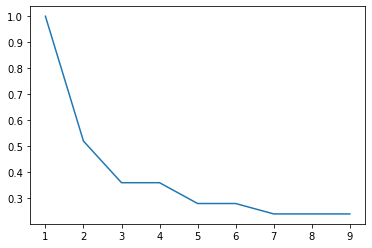

In [276]:
plt.plot(range(1,10),acc)

# 22) location_Doddathoguru

In [277]:
df22 = df[df['location_Doddathoguru']==1]

In [278]:
df22 = df22[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [279]:
df22

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
1823     2      0.0   3300           970.0    2     3402.061856   
1824     2      1.0   3200          1050.0    2     3047.619048   
1825     2      1.0   2500           850.0    2     2941.176471   
1826     2      2.0   4200          1030.0    2     4077.669903   
1827     3      2.0   6500          1549.0    3     4196.255649   
1828     1      1.0   1700           550.0    1     3090.909091   
1829     2      2.0   3350          1015.0    2     3300.492611   
1830     2      2.0   3900          1104.0    2     3532.608696   
1831     2      1.0   3200           915.0    2     3497.267760   
1832     1      1.0   2550           750.0    1     3400.000000   
1833     3      3.0   6200          1595.0    3     3887.147335   
1834     2      1.0   3200           855.0    2     3742.690058   
1835     2      1.0   5000          1105.0    2     4524.886878   
1836     2      2.0   3000           925.0    2     3243.243243   
1837     3      1.0   4500          1208.0    3     3725.165563   
1838     2      2.0   5000          1100.0    2     4545.454545   
1839     2      1.0   3290           940.0    2     3500.000000   
1840     3      1.0   6500          1382.0    3     4703.328509   
1841     2      3.0   4400          1107.0    2     3974.706414   
1842     2      1.0   4000           907.0    2     4410.143330   
1843     3      3.0   8500          1783.0    3     4767.246214   
1844     1      1.0   1700           550.0    1     3090.909091   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
1823                              1                        0   
1824                              0                        1   
1825                              1                        0   
1826                              1                        0   
1827                              1                        0   
1828                              1                        0   
1829                              1                        0   
1830                              1                        0   
1831                              1                        0   
1832                              1                        0   
1833                              1                        0   
1834                              1                        0   
1835                              1                        0   
1836                              0                        1   
1837                              0                        1   
1838                              0                        1   
1839                              1                        0   
1840                              1                        0   
1841                              0                        1   
1842                              0                        1   
1843                              1                        0   
1844                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
1823                    0                           1  
1824                    0                           1  
1825                    0                           1  
1826                    0                           1  
1827                    0                           1  
1828                    0                           1  
1829                    0                           1  
1830                    0                           1  
1831                    0                           1  
1832                    0                           1  
1833                    0                           1  
1834                    0                           1  
1835                    0                           1  
1836                    0                           1  
1837                    0                           1  
1838                    0                           1  
1839                    0              

In [280]:
df.corr()

bath   balcony     price  total_sqft_int  \
bath                         1.000000  0.283192  0.523941        0.653435   
balcony                      0.283192  1.000000  0.138946        0.200648   
price                        0.523941  0.138946  1.000000        0.797955   
total_sqft_int               0.653435  0.200648  0.797955        1.000000   
bhk                          0.882461  0.269511  0.497817        0.647485   
...                               ...       ...       ...             ...   
location_Hosur Road          0.011201 -0.020262  0.000618        0.007224   
location_Horamavu Banaswadi -0.020635  0.022541 -0.021200       -0.015287   
location_Domlur              0.006606  0.000445  0.019573        0.007875   
location_Mahadevpura        -0.017608  0.008764 -0.015800       -0.011000   
location_Tumkur Road        -0.002474 -0.018788 -0.006216       -0.010931   

                                  bhk  price_per_sqft  \
bath                         0.882461        0.350497   
balcony                      0.269511        0.068018   
price                        0.497817        0.717821   
total_sqft_int               0.647485        0.376673   
bhk                          1.000000        0.323285   
...                               ...             ...   
location_Hosur Road          0.016102        0.001412   
location_Horamavu Banaswadi -0.026186       -0.037227   
location_Domlur              0.005351        0.054259   
location_Mahadevpura        -0.010418       -0.023633   
location_Tumkur Road         0.008504        0.009832   

                             area_typeSuper built-up  Area  \
bath                                             -0.118940   
balcony                                           0.120220   
price                                            -0.114594   
total_sqft_int                                   -0.133719   
bhk                                              -0.142496   
...                                                    ...   
location_Hosur Road                               0.001408   
location_Horamavu Banaswadi                       0.024451   
location_Domlur                                   0.006048   
location_Mahadevpura                              0.030585   
location_Tumkur Road                              0.030585   

                             area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                        0.030143             0.161243   
balcony                                    -0.048382            -0.138809   
price                                      -0.014613             0.229543   
total_sqft_int                              0.014041             0.219383   
bhk                                         0.044187             0.178557   
...                                              ...                  ...   
location_Hosur Road                         0.001151            -0.003231   
location_Horamavu Banaswadi                -0.018187            -0.013638   
location_Domlur                             0.002433            -0.013638   
location_Mahadevpura                       -0.025060            -0.013638   
location_Tumkur Road                       -0.025060            -0.013638   

                             availability_Ready To Move  ...  \
bath                                           0.022495  ...   
balcony                                        0.117337  ...   
price                                          0.012542  ...   
total_sqft_int                                 0.009710  ...   
bhk                                            0.043887  ...   
...                                                 ...  ...   
location_Hosur Road                           -0.036076  ...   
location_Horamavu Banaswadi                    0.027142  ...   
location_Domlur                                0.020595  ...   
location_Mahadevpura                           0.027142  ...   
location_Tumkur Road                          -0.

In [281]:
x = df22[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df22[['price']]

In [282]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5454545454545454]
k= 3 [1.0, 0.5454545454545454, 0.4090909090909091]
k= 4 [1.0, 0.5454545454545454, 0.4090909090909091, 0.3181818181818182]
k= 5 [1.0, 0.5454545454545454, 0.4090909090909091, 0.3181818181818182, 0.3181818181818182]
k= 6 [1.0, 0.5454545454545454, 0.4090909090909091, 0.3181818181818182, 0.3181818181818182, 0.3181818181818182]
k= 7 [1.0, 0.5454545454545454, 0.4090909090909091, 0.3181818181818182, 0.3181818181818182, 0.3181818181818182, 0.2727272727272727]
k= 8 [1.0, 0.5454545454545454, 0.4090909090909091, 0.3181818181818182, 0.3181818181818182, 0.3181818181818182, 0.2727272727272727, 0.3181818181818182]
k= 9 [1.0, 0.5454545454545454, 0.4090909090909091, 0.3181818181818182, 0.3181818181818182, 0.3181818181818182, 0.2727272727272727, 0.3181818181818182, 0.3181818181818182]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [283]:
max(acc)

1.0

In [284]:
k = acc.index(max(acc))+1
k

1

In [285]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


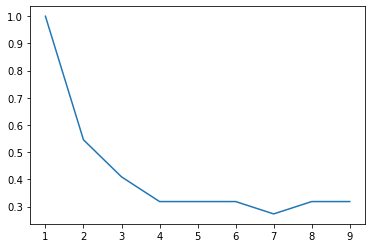

In [286]:
plt.plot(range(1,10),acc)

# 23) location_Domlur

In [287]:
df23 = df[df['location_Domlur']==1]

In [288]:
df23 = df23[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [289]:
df23

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
1861     3  2.000000   9000          1540.0    3     5844.155844   
1862     2  2.000000  15000          1875.0    3     8000.000000   
1863     3  3.000000   8600          1429.0    3     6018.194542   
1864     1  0.000000   5500           640.0    1     8593.750000   
1865     2  2.000000   8500          1050.0    2     8095.238095   
1866     3  2.000000  15000          1800.0    3     8333.333333   
1867     3  1.000000  13500          1720.0    3     7848.837209   
1868     3  3.000000  16500          1950.0    3     8461.538462   
1869     3  2.000000  28500          2180.0    3    13073.394500   
1870     1  1.000000   7000           650.0    1    10769.230770   
1871     1  1.000000   7000           780.0    1     8974.358974   
1872     3  2.000000  28500          2180.0    3    13073.394500   
1873     3  0.000000  12000          1740.0    3     6896.551724   
1874     3  2.000000  12500          1695.0    3     7374.631268   
1875     2  1.000000   9500          1246.0    2     7624.398074   
1876     3  2.000000  14500          2100.0    3     6904.761905   
1877     2  2.000000   8000          1276.0    2     6269.592476   
1878     3  1.000000  18000          1850.0    3     9729.729730   
1879     3  1.584376  23500          2955.0    3     7952.622673   
1880     3  1.000000  18000          1650.0    3    10909.090910   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
1861                              1                        0   
1862                              1                        0   
1863                              1                        0   
1864                              0                        1   
1865                              1                        0   
1866                              1                        0   
1867                              1                        0   
1868                              1                        0   
1869                              0                        1   
1870                              1                        0   
1871                              1                        0   
1872                              1                        0   
1873                              1                        0   
1874                              0                        1   
1875                              1                        0   
1876                              1                        0   
1877                              1                        0   
1878                              1                        0   
1879                              1                        0   
1880                              0                        1   

      area_typePlot  Area  availability_Ready To Move  
1861                    0                           1  
1862                    0                           1  
1863                    0                           1  
1864                    0                           1  
1865                    0                           1  
1866                    0                           1  
1867                    0                           1  
1868                    0                           1  
1869                    0                           0  
1870                    0                           1  
1871                    0                           1  
1872                    0                           1  
1873                    0                           1  
1874                    0                           1  
1875                    0                           1  
1876                    0                           1  
1877                    0                           1  
1878                    0                           1  
1879                    0                           1  
1880                    0                           1

In [290]:
df23.corr()

bath   balcony     price  \
bath                           1.000000e+00  0.406545  0.606678   
balcony                        4.065446e-01  1.000000  0.234500   
price                          6.066776e-01  0.234500  1.000000   
total_sqft_int                 7.974963e-01  0.350070  0.825129   
bhk                            9.567223e-01  0.443250  0.619033   
price_per_sqft                -4.323185e-02 -0.119256  0.648151   
area_typeSuper built-up  Area -3.742561e-17  0.207129 -0.166540   
area_typeBuilt-up  Area        9.356403e-17 -0.207129  0.166540   
area_typePlot  Area                     NaN       NaN       NaN   
availability_Ready To Move    -1.546721e-01 -0.121469 -0.507221   

                               total_sqft_int       bhk  price_per_sqft  \
bath                                 0.797496  0.956722       -0.043232   
balcony                              0.350070  0.443250       -0.119256   
price                                0.825129  0.619033        0.648151   
total_sqft_int                       1.000000  0.830930        0.124993   
bhk                                  0.830930  1.000000       -0.061372   
price_per_sqft                       0.124993 -0.061372        1.000000   
area_typeSuper built-up  Area        0.066701  0.033787       -0.360335   
area_typeBuilt-up  Area             -0.066701 -0.033787        0.360335   
area_typePlot  Area                       NaN       NaN             NaN   
availability_Ready To Move          -0.233389 -0.139522       -0.517079   

                               area_typeSuper built-up  Area  \
bath                                           -3.742561e-17   
balcony                                         2.071287e-01   
price                                          -1.665402e-01   
total_sqft_int                                  6.670128e-02   
bhk                                             3.378687e-02   
price_per_sqft                                 -3.603346e-01   
area_typeSuper built-up  Area                   1.000000e+00   
area_typeBuilt-up  Area                        -1.000000e+00   
area_typePlot  Area                                      NaN   
availability_Ready To Move                      4.588315e-01   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                      9.356403e-17                  NaN   
balcony                                  -2.071287e-01                  NaN   
price                                     1.665402e-01                  NaN   
total_sqft_int                           -6.670128e-02                  NaN   
bhk                                      -3.378687e-02                  NaN   
price_per_sqft                            3.603346e-01                  NaN   
area_typeSuper built-up  Area            -1.000000e+00                  NaN   
area_typeBuilt-up  Area                   1.000000e+00                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move               -4.588315e-01                  NaN   

                               availability_Ready To Move  
bath                                            -0.154672  
balcony                                         -0.121469  
price                                           -0.507221  
total_sqft_int                                  -0.233389  
bhk                                             -0.139522  
price_per_sqft                                  -0.517079  
area_typeSuper built-up  Area                    0.458831  
area_typeBuilt-up  Area                         -0.458831  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

<AxesSubplot:ylabel='bath'>

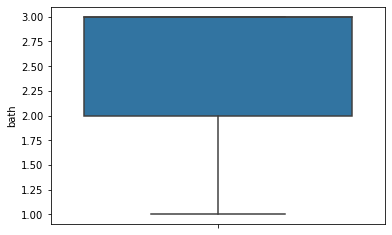

In [291]:
sns.boxplot(y='bath',data=df23)

<AxesSubplot:ylabel='price'>

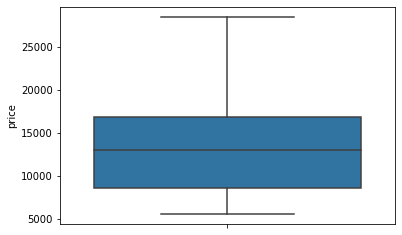

In [292]:
sns.boxplot(y='price',data=df23)

In [293]:
x = df23[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df23[['price']]

In [294]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6]
k= 3 [1.0, 0.6, 0.45]
k= 4 [1.0, 0.6, 0.45, 0.4]
k= 5 [1.0, 0.6, 0.45, 0.4, 0.3]
k= 6 [1.0, 0.6, 0.45, 0.4, 0.3, 0.25]
k= 7 [1.0, 0.6, 0.45, 0.4, 0.3, 0.25, 0.25]
k= 8 [1.0, 0.6, 0.45, 0.4, 0.3, 0.25, 0.25, 0.2]
k= 9 [1.0, 0.6, 0.45, 0.4, 0.3, 0.25, 0.25, 0.2, 0.2]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [295]:
max(acc)

1.0

In [296]:
k = acc.index(max(acc))+1
k

1

In [297]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


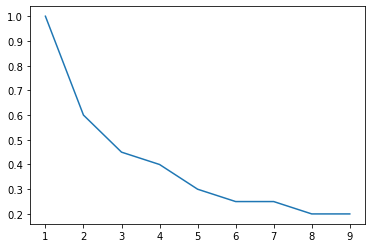

In [298]:
plt.plot(range(1,10),acc)

# 24) location_Electronic City

In [299]:
df24 = df[df['location_Electronic City']==1]

In [300]:
df24 = df24[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [301]:
df24

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
1915     2      1.0   6450          1500.0    3     4300.000000   
1916     2      1.0   6000          1060.0    2     5660.377358   
1917     2      1.0   6450          1152.0    2     5598.958333   
1918     1      1.0   3600           770.0    2     4675.324675   
1919     2      1.0   5200          1070.0    2     4859.813084   
...    ...      ...    ...             ...  ...             ...   
2068     2      1.0   6450          1500.0    3     4300.000000   
2069     4      2.0  13400          2093.0    4     6402.293359   
2070     2      1.0   7300          1355.0    2     5387.453875   
2071     2      1.0   6498          1360.0    3     4778.676471   
2072     2      1.0   5200          1060.0    2     4905.660377   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
1915                              1                        0   
1916                              0                        1   
1917                              1                        0   
1918                              0                        1   
1919                              1                        0   
...                             ...                      ...   
2068                              1                        0   
2069                              1                        0   
2070                              1                        0   
2071                              1                        0   
2072                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
1915                    0                           1  
1916                    0                           1  
1917                    0                           0  
1918                    0                           1  
1919                    0                           1  
...                   ...                         ...  
2068                    0                           1  
2069                    0                           0  
2070                    0                           0  
2071                    0                           1  
2072                    0                           1  

[158 rows x 10 columns]

In [302]:
df24.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.535386  0.826247        0.872222   
balcony                        0.535386  1.000000  0.499968        0.483623   
price                          0.826247  0.499968  1.000000        0.931980   
total_sqft_int                 0.872222  0.483623  0.931980        1.000000   
bhk                            0.852589  0.456394  0.833398        0.902506   
price_per_sqft                 0.397716  0.287172  0.710027        0.442207   
area_typeSuper built-up  Area -0.013281  0.103299  0.000849        0.017309   
area_typeBuilt-up  Area       -0.035082 -0.069589 -0.042068       -0.057264   
area_typePlot  Area            0.236931 -0.171177  0.201151        0.193923   
availability_Ready To Move    -0.083970  0.070524 -0.189045       -0.164902   

                                    bhk  price_per_sqft  \
bath                           0.852589        0.397716   
balcony                        0.456394        0.287172   
price                          0.833398        0.710027   
total_sqft_int                 0.902506        0.442207   
bhk                            1.000000        0.374944   
price_per_sqft                 0.374944        1.000000   
area_typeSuper built-up  Area -0.013132        0.009972   
area_typeBuilt-up  Area       -0.030323       -0.025913   
area_typePlot  Area            0.212967        0.077175   
availability_Ready To Move    -0.025506       -0.173030   

                               area_typeSuper built-up  Area  \
bath                                               -0.013281   
balcony                                             0.103299   
price                                               0.000849   
total_sqft_int                                      0.017309   
bhk                                                -0.013132   
price_per_sqft                                      0.009972   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.979374   
area_typePlot  Area                                -0.164852   
availability_Ready To Move                         -0.140204   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.035082             0.236931   
balcony                                      -0.069589            -0.171177   
price                                        -0.042068             0.201151   
total_sqft_int                               -0.057264             0.193923   
bhk                                          -0.030323             0.212967   
price_per_sqft                               -0.025913             0.077175   
area_typeSuper built-up  Area                -0.979374            -0.164852   
area_typeBuilt-up  Area                       1.000000            -0.037840   
area_typePlot  Area                          -0.037840             1.000000   
availability_Ready To Move                    0.129425             0.061611   

                               availability_Ready To Move  
bath                                            -0.083970  
balcony                                          0.070524  
price                                           -0.189045  
total_sqft_int                                  -0.164902  
bhk                                             -0.025506  
price_per_sqft                                  -0.173030  
area_typeSuper built-up  Area                   -0.140204  
area_typeBuilt-up  Area                          0.129425  
area_typePlot  Area                              0.061611  
availability_Ready To Move                       1.000000

In [303]:
x = df24[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df24[['price']]

In [304]:
acc = []
for i in range(1,12):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6012658227848101]
k= 3 [1.0, 0.6012658227848101, 0.4240506329113924]
k= 4 [1.0, 0.6012658227848101, 0.4240506329113924, 0.34177215189873417]
k= 5 [1.0, 0.6012658227848101, 0.4240506329113924, 0.34177215189873417, 0.2974683544303797]
k= 6 [1.0, 0.6012658227848101, 0.4240506329113924, 0.34177215189873417, 0.2974683544303797, 0.2974683544303797]
k= 7 [1.0, 0.6012658227848101, 0.4240506329113924, 0.34177215189873417, 0.2974683544303797, 0.2974683544303797, 0.2848101265822785]
k= 8 [1.0, 0.6012658227848101, 0.4240506329113924, 0.34177215189873417, 0.2974683544303797, 0.2974683544303797, 0.2848101265822785, 0.26582278481012656]
k= 9 [1.0, 0.6012658227848101, 0.4240506329113924, 0.34177215189873417, 0.2974683544303797, 0.2974683544303797, 0.2848101265822785, 0.26582278481012656, 0.25949367088607594]
k= 10 [1.0, 0.6012658227848101, 0.4240506329113924, 0.34177215189873417, 0.2974683544303797, 0.2974683544303797, 0.2848101265822785, 0.26582278481012656, 0.2594936708860759

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [305]:
max(acc)

1.0

In [306]:
k = acc.index(max(acc))+1
k

1

In [307]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


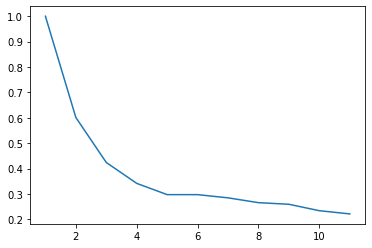

In [308]:
plt.plot(range(1,12),acc)

# 25) location_Electronic City Phase II

In [309]:
df25 = df[df['location_Electronic City Phase II']==1]

In [310]:
df25 = df25[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [311]:
df25

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
2073     2      1.0   3907          1056.0    2     3699.810606   
2074     2      1.0   3060          1020.0    2     3000.000000   
2075     2      2.0   4500          1069.0    2     4209.541628   
2076     1      1.0   2835           630.0    1     4500.000000   
2077     2      1.0   2500          1000.0    2     2500.000000   
...    ...      ...    ...             ...  ...             ...   
2157     2      1.0   3075          1065.0    2     2887.323944   
2158     2      1.0   3306          1140.0    2     2900.000000   
2159     2      1.0   2650           911.0    2     2908.891328   
2160     2      1.0   3465          1200.0    2     2887.500000   
2161     2      1.0   5448          1031.0    2     5284.190107   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
2073                              1                        0   
2074                              1                        0   
2075                              1                        0   
2076                              1                        0   
2077                              1                        0   
...                             ...                      ...   
2157                              0                        1   
2158                              0                        1   
2159                              1                        0   
2160                              0                        1   
2161                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
2073                    0                           0  
2074                    0                           0  
2075                    0                           1  
2076                    0                           0  
2077                    0                           0  
...                   ...                         ...  
2157                    0                           0  
2158                    0                           0  
2159                    0                           1  
2160                    0                           0  
2161                    0                           1  

[89 rows x 10 columns]

In [312]:
df25.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.088334  0.724506        0.724185   
balcony                        0.088334  1.000000  0.149100        0.084133   
price                          0.724506  0.149100  1.000000        0.921424   
total_sqft_int                 0.724185  0.084133  0.921424        1.000000   
bhk                            0.891006  0.217344  0.712903        0.676100   
price_per_sqft                 0.240088  0.188785  0.543155        0.181110   
area_typeSuper built-up  Area -0.014031  0.019551  0.012000       -0.130485   
area_typeBuilt-up  Area       -0.077135 -0.031095 -0.181980       -0.064593   
area_typePlot  Area            0.415475  0.051974  0.773513        0.892030   
availability_Ready To Move     0.008584  0.388144  0.196934       -0.066590   

                                    bhk  price_per_sqft  \
bath                           0.891006        0.240088   
balcony                        0.217344        0.188785   
price                          0.712903        0.543155   
total_sqft_int                 0.676100        0.181110   
bhk                            1.000000        0.315034   
price_per_sqft                 0.315034        1.000000   
area_typeSuper built-up  Area -0.002841        0.331286   
area_typeBuilt-up  Area       -0.074344       -0.346978   
area_typePlot  Area            0.351484        0.061550   
availability_Ready To Move     0.037182        0.635486   

                               area_typeSuper built-up  Area  \
bath                                               -0.014031   
balcony                                             0.019551   
price                                               0.012000   
total_sqft_int                                     -0.130485   
bhk                                                -0.002841   
price_per_sqft                                      0.331286   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.976056   
area_typePlot  Area                                -0.138866   
availability_Ready To Move                          0.220553   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.077135             0.415475   
balcony                                      -0.031095             0.051974   
price                                        -0.181980             0.773513   
total_sqft_int                               -0.064593             0.892030   
bhk                                          -0.074344             0.351484   
price_per_sqft                               -0.346978             0.061550   
area_typeSuper built-up  Area                -0.976056            -0.138866   
area_typeBuilt-up  Area                       1.000000            -0.079872   
area_typePlot  Area                          -0.079872             1.000000   
availability_Ready To Move                   -0.203589            -0.083814   

                               availability_Ready To Move  
bath                                             0.008584  
balcony                                          0.388144  
price                                            0.196934  
total_sqft_int                                  -0.066590  
bhk                                              0.037182  
price_per_sqft                                   0.635486  
area_typeSuper built-up  Area                    0.220553  
area_typeBuilt-up  Area                         -0.203589  
area_typePlot  Area                             -0.083814  
availability_Ready To Move                       1.000000

In [313]:
x = df25[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df25[['price']]

In [314]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.651685393258427]
k= 3 [1.0, 0.651685393258427, 0.5168539325842697]
k= 4 [1.0, 0.651685393258427, 0.5168539325842697, 0.39325842696629215]
k= 5 [1.0, 0.651685393258427, 0.5168539325842697, 0.39325842696629215, 0.3595505617977528]
k= 6 [1.0, 0.651685393258427, 0.5168539325842697, 0.39325842696629215, 0.3595505617977528, 0.25842696629213485]
k= 7 [1.0, 0.651685393258427, 0.5168539325842697, 0.39325842696629215, 0.3595505617977528, 0.25842696629213485, 0.24719101123595505]
k= 8 [1.0, 0.651685393258427, 0.5168539325842697, 0.39325842696629215, 0.3595505617977528, 0.25842696629213485, 0.24719101123595505, 0.23595505617977527]
k= 9 [1.0, 0.651685393258427, 0.5168539325842697, 0.39325842696629215, 0.3595505617977528, 0.25842696629213485, 0.24719101123595505, 0.23595505617977527, 0.2247191011235955]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [315]:
max(acc)

1.0

In [316]:
k = acc.index(max(acc))+1
k

1

In [317]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


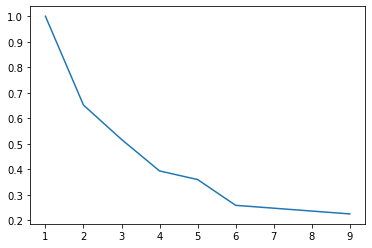

In [318]:
plt.plot(range(1,10),acc)

# 26) location_Electronics City Phase 1

In [319]:
df26 = df[df['location_Electronics City Phase 1']==1]

In [320]:
df26 = df26[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [321]:
df26

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
2163     3      2.0   7829         1475.00    3     5307.796610   
2164     3      1.0   7880         1490.00    3     5288.590604   
2165     2      2.0   5300         1113.27    2     4760.749863   
2166     3      1.0   8400         1490.00    3     5637.583893   
2167     2      1.0   5600         1015.00    2     5517.241379   
2168     2      1.0   8091         1515.00    3     5340.594059   
2169     2      0.0   4600          995.00    2     4623.115578   
2170     2      1.0   8200         1555.00    3     5273.311897   
2171     2      2.0   7500         1340.00    2     5597.014925   
2172     2      2.0   5500         1124.00    3     4893.238434   
2173     2      1.0   5700         1175.00    2     4851.063830   
2174     1      1.0   4241          755.00    1     5617.218543   
2175     1      1.0   2700          580.00    1     4655.172414   
2176     2      2.0   4900          940.00    2     5212.765957   
2177     2      2.0   6700         1335.00    2     5018.726592   
2178     2      2.0   5500         1113.12    2     4941.066552   
2179     3      0.0   7100         1350.00    3     5259.259259   
2180     2      1.0   4980          995.00    2     5005.025126   
2181     1      0.0   2600          635.00    1     4094.488189   
2182     2      1.0   6800         1190.00    2     5714.285714   
2183     3      2.0   7254         1450.00    3     5002.758621   
2184     1      0.0   1689          360.00    1     4694.444444   
2185     1      1.0   3200          638.00    1     5015.673981   
2186     2      2.0   6498         1175.00    2     5530.212766   
2187     1      1.0   2100          585.00    1     3589.743590   
2188     2      2.0   5976         1200.00    2     4980.000000   
2189     2      1.0   5400         1145.00    2     4716.157205   
2190     2      2.0   6500         1125.00    2     5777.777778   
2191     2      2.0   8200         1550.00    3     5290.322581   
2192     2      0.0   4000          865.00    2     4624.277457   
2193     3      2.0   9300         1800.00    3     5166.666667   
2194     2      2.0   6000         1314.00    2     4566.210046   
2195     2      1.0   6200         1170.00    2     5299.145299   
2196     3      2.0   7900         1450.00    3     5448.275862   
2197     2      1.0   4800          940.00    2     5106.382979   
2198     2      1.0   4400          940.00    2     4680.851064   
2199     2      1.0   6700         1300.00    2     5153.846154   
2200     2      1.0   5100         1028.00    2     4961.089494   
2201     2      2.0   6000         1205.00    2     4979.253112   
2202     2      1.0   6700         1305.00    2     5134.099617   
2203     1      0.0   3012          755.00    1     3989.403974   
2204     2      1.0   6000         1175.00    2     5106.382979   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
2163                              1                        0   
2164                              0                        1   
2165                              1                        0   
2166                              1                        0   
2167                              0                        1   
2168                              1                        0   
2169                              0                        1   
2170                              1                        0   
2171                              0                        1   
2172                              1                        0   
2173                              1                        0   
2174                              1                        0   
2175                              0                        1   
2176                              0                        1   
2177                              1                        0   
2178                              1                        0   
2179                              0 

In [322]:
df26.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.362033  0.822696        0.829542   
balcony                        0.362033  1.000000  0.499989        0.497872   
price                          0.822696  0.499989  1.000000        0.979633   
total_sqft_int                 0.829542  0.497872  0.979633        1.000000   
bhk                            0.891400  0.379064  0.872291        0.883287   
price_per_sqft                 0.500009  0.375506  0.690272        0.543078   
area_typeSuper built-up  Area  0.093796  0.365983  0.253501        0.282157   
area_typeBuilt-up  Area       -0.093796 -0.365983 -0.253501       -0.282157   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move    -0.086066 -0.321975 -0.177435       -0.182136   

                                    bhk  price_per_sqft  \
bath                           0.891400        0.500009   
balcony                        0.379064        0.375506   
price                          0.872291        0.690272   
total_sqft_int                 0.883287        0.543078   
bhk                            1.000000        0.499809   
price_per_sqft                 0.499809        1.000000   
area_typeSuper built-up  Area  0.171201        0.063019   
area_typeBuilt-up  Area       -0.171201       -0.063019   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move     0.032880       -0.179774   

                               area_typeSuper built-up  Area  \
bath                                                0.093796   
balcony                                             0.365983   
price                                               0.253501   
total_sqft_int                                      0.282157   
bhk                                                 0.171201   
price_per_sqft                                      0.063019   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.330979   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.093796                  NaN   
balcony                                      -0.365983                  NaN   
price                                        -0.253501                  NaN   
total_sqft_int                               -0.282157                  NaN   
bhk                                          -0.171201                  NaN   
price_per_sqft                               -0.063019                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.330979                  NaN   

                               availability_Ready To Move  
bath                                            -0.086066  
balcony                                         -0.321975  
price                                           -0.177435  
total_sqft_int                                  -0.182136  
bhk                                              0.032880  
price_per_sqft                                  -0.179774  
area_typeSuper built-up  Area                   -0.330979  
area_typeBuilt-up  Area                          0.330979  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [323]:
x = df26[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df26[['price']]

In [324]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5714285714285714]
k= 3 [1.0, 0.5714285714285714, 0.40476190476190477]
k= 4 [1.0, 0.5714285714285714, 0.40476190476190477, 0.40476190476190477]
k= 5 [1.0, 0.5714285714285714, 0.40476190476190477, 0.40476190476190477, 0.2857142857142857]
k= 6 [1.0, 0.5714285714285714, 0.40476190476190477, 0.40476190476190477, 0.2857142857142857, 0.2857142857142857]
k= 7 [1.0, 0.5714285714285714, 0.40476190476190477, 0.40476190476190477, 0.2857142857142857, 0.2857142857142857, 0.21428571428571427]
k= 8 [1.0, 0.5714285714285714, 0.40476190476190477, 0.40476190476190477, 0.2857142857142857, 0.2857142857142857, 0.21428571428571427, 0.21428571428571427]
k= 9 [1.0, 0.5714285714285714, 0.40476190476190477, 0.40476190476190477, 0.2857142857142857, 0.2857142857142857, 0.21428571428571427, 0.21428571428571427, 0.21428571428571427]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [325]:
max(acc)

1.0

In [326]:
k = acc.index(max(acc))+1
k

1

In [327]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


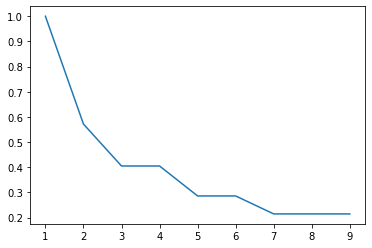

In [328]:
plt.plot(range(1,10),acc)

# 27) location_Frazer Town

In [329]:
df27 = df[df['location_Frazer Town']==1]

In [330]:
df27 = df27[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [331]:
df27

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
2208     3  1.000000  18000          1700.0    3    10588.235290   
2209     3  1.584376   9545          1305.0    3     7314.176245   
2210     3  3.000000  18500          1870.0    3     9893.048128   
2211     3  2.000000  15000          1750.0    3     8571.428571   
2212     3  1.000000  20000          2000.0    3    10000.000000   
2213     4  2.000000  33000          3500.0    3     9428.571429   
2214     4  3.000000  28500          2350.0    3    12127.659570   
2215     2  2.000000  14000          1550.0    2     9032.258065   
2216     4  2.000000  14500          1900.0    3     7631.578947   
2217     3  2.000000  26500          2560.0    3    10351.562500   
2218     3  2.000000  26000          2400.0    3    10833.333330   
2219     3  1.584376  28800          2560.0    3    11250.000000   
2220     5  1.584376  34100          3436.0    4     9924.330617   
2221     2  2.000000  14000          1315.0    2    10646.387830   
2222     3  3.000000  15400          1706.0    3     9026.963658   
2223     3  3.000000  22000          2079.0    3    10582.010580   
2224     2  1.000000  34100          3435.0    4     9927.219796   
2225     5  1.584376  34500          3436.0    4    10040.745050   
2226     3  1.584376  40000          3100.0    3    12903.225810   
2227     3  2.000000  40000          5400.0    3     7407.407407   
2228     2  1.000000  10500          1180.0    2     8898.305085   
2229     4  2.000000  32500          2900.0    4    11206.896550   
2230     3  3.000000  18000          1870.0    3     9625.668449   
2231     1  0.000000  10000           896.0    1    11160.714290   
2232     2  0.000000  12000          1420.0    2     8450.704225   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
2208                              1                        0   
2209                              0                        1   
2210                              1                        0   
2211                              1                        0   
2212                              1                        0   
2213                              0                        1   
2214                              1                        0   
2215                              1                        0   
2216                              0                        1   
2217                              1                        0   
2218                              1                        0   
2219                              1                        0   
2220                              0                        1   
2221                              0                        1   
2222                              1                        0   
2223                              0                        1   
2224                              0                        1   
2225                              1                        0   
2226                              1                        0   
2227                              1                        0   
2228                              1                        0   
2229                              1                        0   
2230                              1                        0   
2231                              0                        0   
2232                              0                        1   

      area_typePlot  Area  availability_Ready To Move  
2208                    0                           1  
2209                    0                           1  
2210                    0                           1  
2211                    0                           1  
2212                    0                           1  
2213                    0                           1  
2214                    0                           1  
2215                    0                           1  
2216                    0                           1  
2217        

In [332]:
df27.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.401459  0.539559        0.505293   
balcony                        0.401459  1.000000  0.154665        0.142514   
price                          0.539559  0.154665  1.000000        0.918454   
total_sqft_int                 0.505293  0.142514  0.918454        1.000000   
bhk                            0.766824  0.337356  0.668949        0.622877   
price_per_sqft                 0.037694  0.049299  0.381120        0.017531   
area_typeSuper built-up  Area  0.123775  0.304994  0.189243        0.123177   
area_typeBuilt-up  Area        0.063682 -0.126057 -0.080356       -0.004156   
area_typePlot  Area           -0.454777 -0.447004 -0.272263       -0.291828   
availability_Ready To Move     0.008917 -0.299298  0.016573        0.046760   

                                    bhk  price_per_sqft  \
bath                           0.766824        0.037694   
balcony                        0.337356        0.049299   
price                          0.668949        0.381120   
total_sqft_int                 0.622877        0.017531   
bhk                            1.000000        0.063813   
price_per_sqft                 0.063813        1.000000   
area_typeSuper built-up  Area  0.154997        0.231822   
area_typeBuilt-up  Area        0.079745       -0.319590   
area_typePlot  Area           -0.569495        0.192931   
availability_Ready To Move    -0.023729       -0.106234   

                               area_typeSuper built-up  Area  \
bath                                                0.123775   
balcony                                             0.304994   
price                                               0.189243   
total_sqft_int                                      0.123177   
bhk                                                 0.154997   
price_per_sqft                                      0.231822   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.914659   
area_typePlot  Area                                -0.272166   
availability_Ready To Move                          0.272166   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.063682            -0.454777   
balcony                                      -0.126057            -0.447004   
price                                        -0.080356            -0.272263   
total_sqft_int                               -0.004156            -0.291828   
bhk                                           0.079745            -0.569495   
price_per_sqft                               -0.319590             0.192931   
area_typeSuper built-up  Area                -0.914659            -0.272166   
area_typeBuilt-up  Area                       1.000000            -0.140028   
area_typePlot  Area                          -0.140028             1.000000   
availability_Ready To Move                   -0.297560             0.041667   

                               availability_Ready To Move  
bath                                             0.008917  
balcony                                         -0.299298  
price                                            0.016573  
total_sqft_int                                   0.046760  
bhk                                             -0.023729  
price_per_sqft                                  -0.106234  
area_typeSuper built-up  Area                    0.272166  
area_typeBuilt-up  Area                         -0.297560  
area_typePlot  Area                              0.041667  
availability_Ready To Move                       1.000000

In [333]:
x = df27[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df27[['price']]

In [334]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.56]
k= 3 [1.0, 0.56, 0.28]
k= 4 [1.0, 0.56, 0.28, 0.24]
k= 5 [1.0, 0.56, 0.28, 0.24, 0.2]
k= 6 [1.0, 0.56, 0.28, 0.24, 0.2, 0.24]
k= 7 [1.0, 0.56, 0.28, 0.24, 0.2, 0.24, 0.24]
k= 8 [1.0, 0.56, 0.28, 0.24, 0.2, 0.24, 0.24, 0.28]
k= 9 [1.0, 0.56, 0.28, 0.24, 0.2, 0.24, 0.24, 0.28, 0.28]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [335]:
max(acc)

1.0

In [336]:
k = acc.index(max(acc))+1
k

1

In [337]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


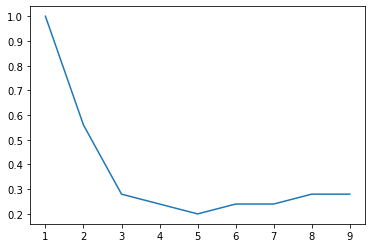

In [338]:
plt.plot(range(1,10),acc)

# 28) location_Gottigere

In [339]:
df28 = df[df['location_Gottigere']==1]

In [340]:
df28 = df28[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [341]:
df28

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
2306     2      2.0   4000          1100.0    2     3636.363636   
2307     2      3.0   4500           967.0    2     4653.567735   
2308     3      3.0   8250          1618.0    3     5098.887515   
2309     2      1.0   6300          1222.0    2     5155.482815   
2310     3      3.0   6500          1300.0    3     5000.000000   
2311     2      1.0   3800           950.0    2     4000.000000   
2312     2      1.0   4850          1153.0    2     4206.418040   
2313     1      0.0   2600           812.0    1     3201.970443   
2314     2      2.0   6500          1460.0    3     4452.054795   
2315     3      2.0   7000          1500.0    3     4666.666667   
2316     3      3.0   7200          1621.0    3     4441.702653   
2317     1      1.0   2600           812.0    1     3201.970443   
2318     2      1.0   4000           990.0    2     4040.404040   
2319     2      2.0   6300          1235.0    2     5101.214575   
2320     3      2.0   6400          1385.0    3     4620.938628   
2321     2      1.0   3500          1000.0    2     3500.000000   
2322     2      1.0   3500          1010.0    2     3465.346535   
2323     2      2.0   4500          1410.0    2     3191.489362   
2324     2      3.0   6200          1435.0    3     4320.557491   
2325     2      0.0   4500           945.0    2     4761.904762   
2326     3      2.0  12000          2500.0    4     4800.000000   
2327     2      2.0   5200          1230.0    3     4227.642276   
2328     2      2.0   5000          1120.0    2     4464.285714   
2329     3      2.0   6300          1500.0    3     4200.000000   
2330     2      3.0   4000          1200.0    2     3333.333333   
2331     2      1.0   6100          1280.0    2     4765.625000   
2332     2      1.0   5658          1205.0    2     4695.435685   
2333     2      2.0   4000          1170.0    2     3418.803419   
2334     3      0.0  13200          3000.0    4     4400.000000   
2335     3      3.0   7200          1613.0    3     4463.732176   
2336     2      2.0   3625          1110.0    2     3265.765766   
2337     2      2.0   5900          1245.0    2     4738.955823   
2338     2      2.0   5000          1200.0    2     4166.666667   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
2306                              0                        1   
2307                              0                        1   
2308                              1                        0   
2309                              1                        0   
2310                              1                        0   
2311                              1                        0   
2312                              1                        0   
2313                              0                        0   
2314                              1                        0   
2315                              1                        0   
2316                              1                        0   
2317                              0                        0   
2318                              1                        0   
2319                              1                        0   
2320                              1                        0   
2321                              1                        0   
2322                              1                        0   
2323                              1                        0   
2324                              1                        0   
2325                              0                        1   
2326                              0                        0   
2327                              1                        0   
2328                              1                        0   
2329                              1                        0   
2330                              1                        0   
2331                              1                        0   

In [342]:
df28.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.425283  0.737614        0.687929   
balcony                        0.425283  1.000000  0.122632        0.088603   
price                          0.737614  0.122632  1.000000        0.953723   
total_sqft_int                 0.687929  0.088603  0.953723        1.000000   
bhk                            0.857096  0.342264  0.867256        0.851189   
price_per_sqft                 0.524692  0.190865  0.600802        0.341476   
area_typeSuper built-up  Area  0.204972  0.358925 -0.128930       -0.164450   
area_typeBuilt-up  Area        0.026198 -0.212127  0.150158        0.165330   
area_typePlot  Area           -0.321224 -0.269582  0.012872        0.046157   
availability_Ready To Move          NaN       NaN       NaN             NaN   

                                    bhk  price_per_sqft  \
bath                           0.857096        0.524692   
balcony                        0.342264        0.190865   
price                          0.867256        0.600802   
total_sqft_int                 0.851189        0.341476   
bhk                            1.000000        0.484466   
price_per_sqft                 0.484466        1.000000   
area_typeSuper built-up  Area  0.058737        0.117847   
area_typeBuilt-up  Area        0.073573        0.079820   
area_typePlot  Area           -0.167054       -0.258204   
availability_Ready To Move          NaN             NaN   

                               area_typeSuper built-up  Area  \
bath                                                0.204972   
balcony                                             0.358925   
price                                              -0.128930   
total_sqft_int                                     -0.164450   
bhk                                                 0.058737   
price_per_sqft                                      0.117847   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.715762   
area_typePlot  Area                                -0.609449   
availability_Ready To Move                               NaN   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.026198            -0.321224   
balcony                                      -0.212127            -0.269582   
price                                         0.150158             0.012872   
total_sqft_int                                0.165330             0.046157   
bhk                                           0.073573            -0.167054   
price_per_sqft                                0.079820            -0.258204   
area_typeSuper built-up  Area                -0.715762            -0.609449   
area_typeBuilt-up  Area                       1.000000            -0.117444   
area_typePlot  Area                          -0.117444             1.000000   
availability_Ready To Move                         NaN                  NaN   

                               availability_Ready To Move  
bath                                                  NaN  
balcony                                               NaN  
price                                                 NaN  
total_sqft_int                                        NaN  
bhk                                                   NaN  
price_per_sqft                                        NaN  
area_typeSuper built-up  Area                         NaN  
area_typeBuilt-up  Area                               NaN  
area_typePlot  Area                                   NaN  
availability_Ready To Move                            NaN

In [343]:
x = df28[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df28[['price']]

In [344]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6060606060606061]
k= 3 [1.0, 0.6060606060606061, 0.48484848484848486]
k= 4 [1.0, 0.6060606060606061, 0.48484848484848486, 0.45454545454545453]
k= 5 [1.0, 0.6060606060606061, 0.48484848484848486, 0.45454545454545453, 0.3939393939393939]
k= 6 [1.0, 0.6060606060606061, 0.48484848484848486, 0.45454545454545453, 0.3939393939393939, 0.3333333333333333]
k= 7 [1.0, 0.6060606060606061, 0.48484848484848486, 0.45454545454545453, 0.3939393939393939, 0.3333333333333333, 0.36363636363636365]
k= 8 [1.0, 0.6060606060606061, 0.48484848484848486, 0.45454545454545453, 0.3939393939393939, 0.3333333333333333, 0.36363636363636365, 0.36363636363636365]
k= 9 [1.0, 0.6060606060606061, 0.48484848484848486, 0.45454545454545453, 0.3939393939393939, 0.3333333333333333, 0.36363636363636365, 0.36363636363636365, 0.36363636363636365]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [345]:
max(acc)

1.0

In [346]:
k = acc.index(max(acc))+1
k

1

In [347]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


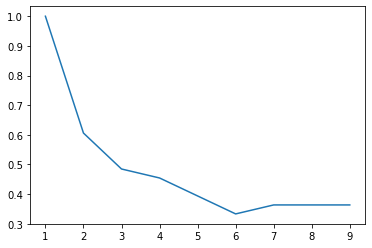

In [348]:
plt.plot(range(1,10),acc)

# 29) location_Green Glen Layout

In [349]:
df29 = df[df['location_Green Glen Layout']==1]

In [350]:
df29 = df29[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [351]:
df29

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
2346     3  2.000000  12000         1670.00    3     7185.628743   
2347     4  3.000000  23000         3250.00    4     7076.923077   
2348     3  2.000000  10500         1776.42    3     5910.764346   
2349     4  1.584376  23000         3250.00    4     7076.923077   
2350     2  1.000000   5680          940.00    2     6042.553191   
2351     2  1.000000   6000         1075.00    2     5581.395349   
2352     3  2.000000  11500         1715.00    3     6705.539359   
2353     2  1.000000  11500         1751.00    3     6567.675614   
2354     3  2.000000  13000         1750.00    3     7428.571429   
2355     3  2.000000  10500         1530.00    3     6862.745098   
2356     3  2.000000  10500         1752.00    3     5993.150685   
2357     4  3.000000   9500         1680.00    3     5654.761905   
2358     3  2.000000  12500         1728.00    3     7233.796296   
2359     3  2.000000  11000         1645.00    3     6686.930091   
2360     3  3.000000  10000         1517.00    3     6591.957811   
2361     4  3.000000  21800         3150.00    4     6920.634921   
2362     3  2.000000  12000         1750.00    3     6857.142857   
2363     3  2.000000  11500         1751.00    3     6567.675614   
2364     3  2.000000  10500         1750.00    3     6000.000000   
2365     3  2.000000  13500         1885.00    3     7161.803714   
2366     3  3.000000  12000         1715.00    3     6997.084548   
2367     2  2.000000  10500         1623.29    3     6468.345151   
2368     3  3.000000  11500         1715.00    3     6705.539359   
2369     3  2.000000  10500         1715.00    3     6122.448980   
2370     3  3.000000  10500         1600.00    3     6562.500000   
2371     3  3.000000  12500         1717.00    3     7280.139779   
2372     2  0.000000   7500         1250.00    2     6000.000000   
2373     3  3.000000  11200         1715.00    3     6530.612245   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
2346                              0                        1   
2347                              1                        0   
2348                              1                        0   
2349                              1                        0   
2350                              0                        1   
2351                              0                        1   
2352                              1                        0   
2353                              1                        0   
2354                              1                        0   
2355                              1                        0   
2356                              1                        0   
2357                              1                        0   
2358                              1                        0   
2359                              1                        0   
2360                              1                        0   
2361                              1                        0   
2362                              1                        0   
2363                              1                        0   
2364                              1                        0   
2365                              1                        0   
2366                              1                        0   
2367                              1                        0   
2368                              1                        0   
2369                              1                        0   
2370                              0                        1   
2371                              1                        0   
2372                              0                        1   
2373                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
2346                    0                           1  
2347                    0                           1  
2348    

In [352]:
df29.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.649814  0.743847        0.768948   
balcony                        0.649814  1.000000  0.365401        0.357512   
price                          0.743847  0.365401  1.000000        0.983644   
total_sqft_int                 0.768948  0.357512  0.983644        1.000000   
bhk                            0.818121  0.575118  0.918879        0.924762   
price_per_sqft                 0.333326  0.333412  0.588548        0.439789   
area_typeSuper built-up  Area  0.464988  0.453104  0.417174        0.430439   
area_typeBuilt-up  Area       -0.464988 -0.453104 -0.417174       -0.430439   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move          NaN       NaN       NaN             NaN   

                                    bhk  price_per_sqft  \
bath                           0.818121        0.333326   
balcony                        0.575118        0.333412   
price                          0.918879        0.588548   
total_sqft_int                 0.924762        0.439789   
bhk                            1.000000        0.526865   
price_per_sqft                 0.526865        1.000000   
area_typeSuper built-up  Area  0.604332        0.299555   
area_typeBuilt-up  Area       -0.604332       -0.299555   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move          NaN             NaN   

                               area_typeSuper built-up  Area  \
bath                                                0.464988   
balcony                                             0.453104   
price                                               0.417174   
total_sqft_int                                      0.430439   
bhk                                                 0.604332   
price_per_sqft                                      0.299555   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                               NaN   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.464988                  NaN   
balcony                                      -0.453104                  NaN   
price                                        -0.417174                  NaN   
total_sqft_int                               -0.430439                  NaN   
bhk                                          -0.604332                  NaN   
price_per_sqft                               -0.299555                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                         NaN                  NaN   

                               availability_Ready To Move  
bath                                                  NaN  
balcony                                               NaN  
price                                                 NaN  
total_sqft_int                                        NaN  
bhk                                                   NaN  
price_per_sqft                                        NaN  
area_typeSuper built-up  Area                         NaN  
area_typeBuilt-up  Area                               NaN  
area_typePlot  Area                                   NaN  
availability_Ready To Move                            NaN

In [353]:
x = df29[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df29[['price']]

In [354]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

k= 1 [1.0]
k= 2 [1.0, 0.8571428571428571]
k= 3 [1.0, 0.8571428571428571, 0.6785714285714286]
k= 4 [1.0, 0.8571428571428571, 0.6785714285714286, 0.6071428571428571]
k= 5 [1.0, 0.8571428571428571, 0.6785714285714286, 0.6071428571428571, 0.6071428571428571]
k= 6 [1.0, 0.8571428571428571, 0.6785714285714286, 0.6071428571428571, 0.6071428571428571, 0.5]
k= 7 [1.0, 0.8571428571428571, 0.6785714285714286, 0.6071428571428571, 0.6071428571428571, 0.5, 0.42857142857142855]
k= 8 [1.0, 0.8571428571428571, 0.6785714285714286, 0.6071428571428571, 0.6071428571428571, 0.5, 0.42857142857142855, 0.39285714285714285]
k= 9 [1.0, 0.8571428571428571, 0.6785714285714286, 0.6071428571428571, 0.6071428571428571, 0.5, 0.42857142857142855, 0.39285714285714285, 0.35714285714285715]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [355]:
max(acc)

1.0

In [356]:
k = acc.index(max(acc))+1
k

1

In [357]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


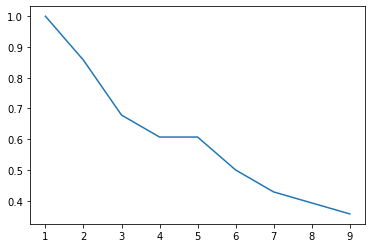

In [358]:
plt.plot(range(1,10),acc)

# 30) location_Haralur Road

In [359]:
df30=df[df['location_Haralur Road']==1]

In [360]:
df30 = df30[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [361]:
df30

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
2498     2      1.0   7000          1240.0    2     5645.161290   
2499     2      2.0   4400          1027.0    2     4284.323272   
2500     5      3.0  15400          2805.0    4     5490.196078   
2501     2      2.0   4700          1194.0    2     3936.348409   
2502     2      1.0   5300          1202.0    2     4409.317804   
...    ...      ...    ...             ...  ...             ...   
2609     3      2.0   9700          1735.0    3     5590.778098   
2610     3      2.0   9783          1810.0    3     5404.972376   
2611     2      2.0   4600          1200.0    2     3833.333333   
2612     2      2.0   4600          1243.0    2     3700.724055   
2613     3      2.0  11200          1810.0    3     6187.845304   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
2498                              1                        0   
2499                              1                        0   
2500                              1                        0   
2501                              1                        0   
2502                              0                        1   
...                             ...                      ...   
2609                              1                        0   
2610                              1                        0   
2611                              1                        0   
2612                              1                        0   
2613                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
2498                    0                           0  
2499                    0                           1  
2500                    0                           0  
2501                    0                           1  
2502                    0                           1  
...                   ...                         ...  
2609                    0                           1  
2610                    0                           0  
2611                    0                           1  
2612                    0                           1  
2613                    0                           0  

[116 rows x 10 columns]

In [362]:
df30.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.369938  0.836961        0.923173   
balcony                        0.369938  1.000000  0.208015        0.395445   
price                          0.836961  0.208015  1.000000        0.920286   
total_sqft_int                 0.923173  0.395445  0.920286        1.000000   
bhk                            0.885342  0.365885  0.897708        0.929400   
price_per_sqft                 0.354154 -0.239296  0.734055        0.417611   
area_typeSuper built-up  Area -0.022594  0.081113 -0.008318       -0.007102   
area_typeBuilt-up  Area        0.022594 -0.081113  0.008318        0.007102   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move    -0.328579 -0.024509 -0.495647       -0.362655   

                                    bhk  price_per_sqft  \
bath                           0.885342        0.354154   
balcony                        0.365885       -0.239296   
price                          0.897708        0.734055   
total_sqft_int                 0.929400        0.417611   
bhk                            1.000000        0.473300   
price_per_sqft                 0.473300        1.000000   
area_typeSuper built-up  Area -0.007565       -0.059857   
area_typeBuilt-up  Area        0.007565        0.059857   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move    -0.408549       -0.530156   

                               area_typeSuper built-up  Area  \
bath                                               -0.022594   
balcony                                             0.081113   
price                                              -0.008318   
total_sqft_int                                     -0.007102   
bhk                                                -0.007565   
price_per_sqft                                     -0.059857   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.171293   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.022594                  NaN   
balcony                                      -0.081113                  NaN   
price                                         0.008318                  NaN   
total_sqft_int                                0.007102                  NaN   
bhk                                           0.007565                  NaN   
price_per_sqft                                0.059857                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.171293                  NaN   

                               availability_Ready To Move  
bath                                            -0.328579  
balcony                                         -0.024509  
price                                           -0.495647  
total_sqft_int                                  -0.362655  
bhk                                             -0.408549  
price_per_sqft                                  -0.530156  
area_typeSuper built-up  Area                   -0.171293  
area_typeBuilt-up  Area                          0.171293  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [363]:
x = df30[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df30[['price']]

In [364]:
acc = []
for i in range(1,12):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.7758620689655172]
k= 3 [1.0, 0.7758620689655172, 0.7068965517241379]
k= 4 [1.0, 0.7758620689655172, 0.7068965517241379, 0.6637931034482759]
k= 5 [1.0, 0.7758620689655172, 0.7068965517241379, 0.6637931034482759, 0.603448275862069]
k= 6 [1.0, 0.7758620689655172, 0.7068965517241379, 0.6637931034482759, 0.603448275862069, 0.5775862068965517]
k= 7 [1.0, 0.7758620689655172, 0.7068965517241379, 0.6637931034482759, 0.603448275862069, 0.5775862068965517, 0.5775862068965517]
k= 8 [1.0, 0.7758620689655172, 0.7068965517241379, 0.6637931034482759, 0.603448275862069, 0.5775862068965517, 0.5775862068965517, 0.5689655172413793]
k= 9 [1.0, 0.7758620689655172, 0.7068965517241379, 0.6637931034482759, 0.603448275862069, 0.5775862068965517, 0.5775862068965517, 0.5689655172413793, 0.5689655172413793]
k= 10 [1.0, 0.7758620689655172, 0.7068965517241379, 0.6637931034482759, 0.603448275862069, 0.5775862068965517, 0.5775862068965517, 0.5689655172413793, 0.5689655172413793, 0.5431034482758

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [365]:
max(acc)

1.0

In [366]:
k = acc.index(max(acc))+1
k

1

In [367]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


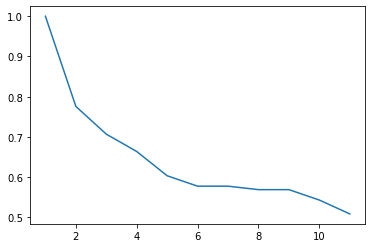

In [368]:
plt.plot(range(1,12),acc)

# 31) location_Harlur

In [369]:
df31 = df[df['location_Harlur']==1]

In [370]:
df31 = df31[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [371]:
df31

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
2616     2      1.0   6900         1174.00    2     5877.342419   
2617     2      1.0   8400         1197.00    2     7017.543860   
2618     3      2.0  13200         1757.00    3     7512.805919   
2619     2      1.0   7600         1174.00    2     6473.594549   
2620     3      2.0  12500         1754.00    3     7126.567845   
2621     2      1.0   8500         1290.00    2     6589.147287   
2622     3      2.0  11600         1752.12    3     6620.551104   
2623     3      2.0  12400         1754.00    3     7069.555302   
2624     2      2.0   6900         1152.00    2     5989.583333   
2625     2      1.0   8700         1290.00    2     6744.186047   
2626     3      2.0  11500         1749.00    3     6575.185820   
2627     3      2.0  13300         1758.00    3     7565.415245   
2628     2      1.0   7900         1197.00    2     6599.832916   
2629     2      1.0   7800         1174.00    2     6643.952300   
2630     2      1.0   7900         1197.00    2     6599.832916   
2631     2      1.0   7500         1174.00    2     6388.415673   
2632     3      1.0  11000         1620.00    3     6790.123457   
2633     3      2.0  13300         1762.00    3     7548.240636   
2634     3      2.0  13100         1756.00    3     7460.136674   
2635     3      2.0  13000         1755.00    3     7407.407407   
2636     3      1.0  14000         1864.00    3     7510.729614   
2637     2      1.0   8800         1331.00    2     6611.570248   
2638     3      2.0  12800         1756.00    3     7289.293850   
2639     3      2.0  12000         1749.00    3     6861.063465   
2640     2      1.0   8200         1197.00    2     6850.459482   
2641     2      1.0   9000         1303.00    2     6907.137375   
2642     3      2.0  13200         1754.00    3     7525.655644   
2643     2      1.0   7500         1174.00    2     6388.415673   
2644     2      1.0   7800         1197.00    2     6516.290727   
2645     2      1.0   8990         1290.00    2     6968.992248   
2646     2      2.0   8500         1386.00    2     6132.756133   
2647     2      1.0   7400         1174.00    2     6303.236797   
2648     2      1.0   7800         1174.00    2     6643.952300   
2649     3      2.0  11500         1755.00    3     6552.706553   
2650     2      1.0   7700         1197.00    2     6432.748538   
2651     3      2.0  12500         1752.12    3     7134.214552   
2652     5      3.0  18000         2569.00    4     7006.617361   
2653     2      1.0   7600         1197.00    2     6349.206349   
2654     2      1.0   7500         1197.00    2     6265.664160   
2655     3      2.0  11700         1755.00    3     6666.666667   
2656     2      1.0   7990         1197.00    2     6675.020886   
2657     4      1.0  22500         2990.00    4     7525.083612   
2658     2      2.0   8800         1370.00    2     6423.357664   
2659     2      0.0   7276         1335.00    2     5450.187266   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
2616                              1                        0   
2617                              0                        1   
2618                              1                        0   
2619                              1                        0   
2620                              1                        0   
2621                              1                        0   
2622                              1                        0   
2623                              1                        0   
2624                              1                        0   
2625                              1                        0   
2626                              1                        0   
2627                              1                        0   
2628                              1                        0   
2629                              1                        0   
2630                          

In [372]:
df31.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.685894  0.927404        0.944521   
balcony                        0.685894  1.000000  0.556571        0.562505   
price                          0.927404  0.556571  1.000000        0.984390   
total_sqft_int                 0.944521  0.562505  0.984390        1.000000   
bhk                            0.978117  0.667188  0.950241        0.955125   
price_per_sqft                 0.606193  0.446517  0.738339        0.613509   
area_typeSuper built-up  Area  0.205820  0.045941  0.153196        0.175198   
area_typeBuilt-up  Area       -0.205820 -0.045941 -0.153196       -0.175198   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move    -0.205820 -0.265044 -0.101095       -0.152193   

                                    bhk  price_per_sqft  \
bath                           0.978117        0.606193   
balcony                        0.667188        0.446517   
price                          0.950241        0.738339   
total_sqft_int                 0.955125        0.613509   
bhk                            1.000000        0.663210   
price_per_sqft                 0.663210        1.000000   
area_typeSuper built-up  Area  0.221282       -0.000205   
area_typeBuilt-up  Area       -0.221282        0.000205   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move    -0.087810        0.102563   

                               area_typeSuper built-up  Area  \
bath                                                0.205820   
balcony                                             0.045941   
price                                               0.153196   
total_sqft_int                                      0.175198   
bhk                                                 0.221282   
price_per_sqft                                     -0.000205   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.073171   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.205820                  NaN   
balcony                                      -0.045941                  NaN   
price                                        -0.153196                  NaN   
total_sqft_int                               -0.175198                  NaN   
bhk                                          -0.221282                  NaN   
price_per_sqft                                0.000205                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.073171                  NaN   

                               availability_Ready To Move  
bath                                            -0.205820  
balcony                                         -0.265044  
price                                           -0.101095  
total_sqft_int                                  -0.152193  
bhk                                             -0.087810  
price_per_sqft                                   0.102563  
area_typeSuper built-up  Area                   -0.073171  
area_typeBuilt-up  Area                          0.073171  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [373]:
x = df31[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df31[['price']]

In [374]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6363636363636364]
k= 3 [1.0, 0.6363636363636364, 0.5]
k= 4 [1.0, 0.6363636363636364, 0.5, 0.3409090909090909]
k= 5 [1.0, 0.6363636363636364, 0.5, 0.3409090909090909, 0.36363636363636365]
k= 6 [1.0, 0.6363636363636364, 0.5, 0.3409090909090909, 0.36363636363636365, 0.3181818181818182]
k= 7 [1.0, 0.6363636363636364, 0.5, 0.3409090909090909, 0.36363636363636365, 0.3181818181818182, 0.3409090909090909]
k= 8 [1.0, 0.6363636363636364, 0.5, 0.3409090909090909, 0.36363636363636365, 0.3181818181818182, 0.3409090909090909, 0.25]
k= 9 [1.0, 0.6363636363636364, 0.5, 0.3409090909090909, 0.36363636363636365, 0.3181818181818182, 0.3409090909090909, 0.25, 0.22727272727272727]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [375]:
max(acc)

1.0

In [376]:
k = acc.index(max(acc))+1
k

1

In [377]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


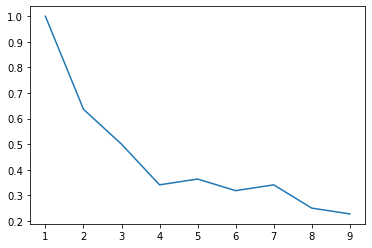

In [378]:
plt.plot(range(1,10),acc)

# 32) location_Hebbal

In [379]:
df32 = df[df['location_Hebbal']==1]

In [380]:
df32 = df32[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [381]:
df32

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
2662     2      2.0  12300          1760.0    3     6988.636364   
2663     4      0.0  47700          5611.5    4     8500.400962   
2664     2      1.0   9820          1349.0    2     7279.466271   
2665     5      2.0  21200          2483.0    4     8538.058800   
2666     2      2.0  13000          1760.0    3     7386.363636   
...    ...      ...    ...             ...  ...             ...   
2744     2      1.0  11500          1294.0    2     8887.171561   
2745     2      1.0  13700          1740.0    3     7873.563218   
2746     3      2.0  15500          1662.0    3     9326.113117   
2747     2      1.0   9800          1349.0    2     7264.640474   
2748     2      1.0   9680          1349.0    2     7175.685693   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
2662                              1                        0   
2663                              1                        0   
2664                              1                        0   
2665                              1                        0   
2666                              1                        0   
...                             ...                      ...   
2744                              1                        0   
2745                              1                        0   
2746                              1                        0   
2747                              1                        0   
2748                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
2662                    0                           1  
2663                    0                           0  
2664                    0                           1  
2665                    0                           1  
2666                    0                           0  
...                   ...                         ...  
2744                    0                           1  
2745                    0                           1  
2746                    0                           0  
2747                    0                           1  
2748                    0                           1  

[87 rows x 10 columns]

In [382]:
df32.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.599450  0.760366        0.787326   
balcony                        0.599450  1.000000  0.363121        0.419056   
price                          0.760366  0.363121  1.000000        0.984429   
total_sqft_int                 0.787326  0.419056  0.984429        1.000000   
bhk                            0.896547  0.592700  0.773124        0.800983   
price_per_sqft                 0.385328  0.101325  0.577744        0.451686   
area_typeSuper built-up  Area  0.234663  0.184493  0.241171        0.244281   
area_typeBuilt-up  Area       -0.212907 -0.156229 -0.199216       -0.201651   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move    -0.176273 -0.269301 -0.144115       -0.201730   

                                    bhk  price_per_sqft  \
bath                           0.896547        0.385328   
balcony                        0.592700        0.101325   
price                          0.773124        0.577744   
total_sqft_int                 0.800983        0.451686   
bhk                            1.000000        0.408411   
price_per_sqft                 0.408411        1.000000   
area_typeSuper built-up  Area  0.296110        0.241838   
area_typeBuilt-up  Area       -0.268657       -0.187098   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move    -0.304454        0.152105   

                               area_typeSuper built-up  Area  \
bath                                                0.234663   
balcony                                             0.184493   
price                                               0.241171   
total_sqft_int                                      0.244281   
bhk                                                 0.296110   
price_per_sqft                                      0.241838   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.907288   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.168675   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.212907                  NaN   
balcony                                      -0.156229                  NaN   
price                                        -0.199216                  NaN   
total_sqft_int                               -0.201651                  NaN   
bhk                                          -0.268657                  NaN   
price_per_sqft                               -0.187098                  NaN   
area_typeSuper built-up  Area                -0.907288                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.221314                  NaN   

                               availability_Ready To Move  
bath                                            -0.176273  
balcony                                         -0.269301  
price                                           -0.144115  
total_sqft_int                                  -0.201730  
bhk                                             -0.304454  
price_per_sqft                                   0.152105  
area_typeSuper built-up  Area                   -0.168675  
area_typeBuilt-up  Area                          0.221314  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [383]:
x = df32[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df32[['price']]

In [384]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.632183908045977]
k= 3 [1.0, 0.632183908045977, 0.4827586206896552]
k= 4 [1.0, 0.632183908045977, 0.4827586206896552, 0.42528735632183906]
k= 5 [1.0, 0.632183908045977, 0.4827586206896552, 0.42528735632183906, 0.367816091954023]
k= 6 [1.0, 0.632183908045977, 0.4827586206896552, 0.42528735632183906, 0.367816091954023, 0.3333333333333333]
k= 7 [1.0, 0.632183908045977, 0.4827586206896552, 0.42528735632183906, 0.367816091954023, 0.3333333333333333, 0.3218390804597701]
k= 8 [1.0, 0.632183908045977, 0.4827586206896552, 0.42528735632183906, 0.367816091954023, 0.3333333333333333, 0.3218390804597701, 0.3103448275862069]
k= 9 [1.0, 0.632183908045977, 0.4827586206896552, 0.42528735632183906, 0.367816091954023, 0.3333333333333333, 0.3218390804597701, 0.3103448275862069, 0.28735632183908044]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [385]:
max(acc)

1.0

In [386]:
k = acc.index(max(acc))+1
k

1

In [387]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


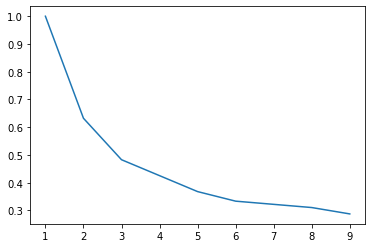

In [388]:
plt.plot(range(1,10),acc)

# 33) location_Hebbal Kempapura

In [389]:
df33 = df[df['location_Hebbal Kempapura']==1]

In [390]:
df33 = df33[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [391]:
df33

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
2749     3  2.000000  15500          1700.0    3     9117.647059   
2750     3  2.000000  17500          1800.0    3     9722.222222   
2751     4  1.584376  30000          2900.0    3    10344.827590   
2752     3  2.000000  38000          3522.0    3    10789.324250   
2753     5  1.584376  20000          2280.0    5     8771.929825   
2754     2  1.000000  12500          1200.0    2    10416.666670   
2755     4  1.584376  24000          2900.0    3     8275.862069   
2756     2  2.000000  10200          1300.0    2     7846.153846   
2757     2  3.000000  14000          1466.0    3     9549.795362   
2758     2  1.000000  16500          1725.0    3     9565.217391   
2759     3  1.584376  12500          1200.0    3    10416.666670   
2760     3  3.000000  26000          3408.0    3     7629.107981   
2761     3  3.000000  13200          1485.0    2     8888.888889   
2762     2  2.000000  10800          1400.0    2     7714.285714   
2763     3  3.000000  15000          1800.0    3     8333.333333   
2764     5  2.000000  20000          2400.0    5     8333.333333   
2765     5  1.000000  22000          2800.0    5     7857.142857   
2766     3  0.000000  16500          1785.0    3     9243.697479   
2767     4  2.000000  38400          3729.0    4    10297.666930   
2768     3  3.000000  17000          1600.0    3    10625.000000   
2769     3  2.000000  17500          1730.0    3    10115.606940   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
2749                              1                        0   
2750                              1                        0   
2751                              1                        0   
2752                              1                        0   
2753                              0                        0   
2754                              0                        0   
2755                              1                        0   
2756                              0                        1   
2757                              1                        0   
2758                              0                        1   
2759                              0                        0   
2760                              0                        1   
2761                              1                        0   
2762                              1                        0   
2763                              1                        0   
2764                              0                        0   
2765                              0                        1   
2766                              0                        1   
2767                              1                        0   
2768                              1                        0   
2769                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
2749                    0                           1  
2750                    0                           1  
2751                    0                           1  
2752                    0                           1  
2753                    1                           1  
2754                    1                           1  
2755                    0                           1  
2756                    0                           1  
2757                    0                           1  
2758                    0                           1  
2759                    1                           1  
2760                    0                           1  
2761                    0                           1  
2762                    0                           1  
2763                    0                           1  
2764                    1                           1  
2765                    0                           1  
2766                    0                           1  
2767                    0           

In [392]:
df33.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000 -0.150915  0.477535        0.573580   
balcony                       -0.150915  1.000000 -0.019918        0.007944   
price                          0.477535 -0.019918  1.000000        0.944791   
total_sqft_int                 0.573580  0.007944  0.944791        1.000000   
bhk                            0.864101 -0.179789  0.395516        0.481066   
price_per_sqft                -0.153100 -0.099589  0.289830       -0.016050   
area_typeSuper built-up  Area -0.129259  0.512483  0.225436        0.100527   
area_typeBuilt-up  Area       -0.111249 -0.376487 -0.082123        0.073227   
area_typePlot  Area            0.283565 -0.237500 -0.195031       -0.206115   
availability_Ready To Move          NaN       NaN       NaN             NaN   

                                    bhk  price_per_sqft  \
bath                           0.864101       -0.153100   
balcony                       -0.179789       -0.099589   
price                          0.395516        0.289830   
total_sqft_int                 0.481066       -0.016050   
bhk                            1.000000       -0.121474   
price_per_sqft                -0.121474        1.000000   
area_typeSuper built-up  Area -0.294018        0.279963   
area_typeBuilt-up  Area        0.035960       -0.435210   
area_typePlot  Area            0.331532        0.119228   
availability_Ready To Move          NaN             NaN   

                               area_typeSuper built-up  Area  \
bath                                               -0.129259   
balcony                                             0.512483   
price                                               0.225436   
total_sqft_int                                      0.100527   
bhk                                                -0.294018   
price_per_sqft                                      0.279963   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.645497   
area_typePlot  Area                                -0.560112   
availability_Ready To Move                               NaN   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.111249             0.283565   
balcony                                      -0.376487            -0.237500   
price                                        -0.082123            -0.195031   
total_sqft_int                                0.073227            -0.206115   
bhk                                           0.035960             0.331532   
price_per_sqft                               -0.435210             0.119228   
area_typeSuper built-up  Area                -0.645497            -0.560112   
area_typeBuilt-up  Area                       1.000000            -0.271163   
area_typePlot  Area                          -0.271163             1.000000   
availability_Ready To Move                         NaN                  NaN   

                               availability_Ready To Move  
bath                                                  NaN  
balcony                                               NaN  
price                                                 NaN  
total_sqft_int                                        NaN  
bhk                                                   NaN  
price_per_sqft                                        NaN  
area_typeSuper built-up  Area                         NaN  
area_typeBuilt-up  Area                               NaN  
area_typePlot  Area                                   NaN  
availability_Ready To Move                            NaN

In [393]:
x = df33[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df33[['price']]

In [394]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6666666666666666]
k= 3 [1.0, 0.6666666666666666, 0.47619047619047616]
k= 4 [1.0, 0.6666666666666666, 0.47619047619047616, 0.47619047619047616]
k= 5 [1.0, 0.6666666666666666, 0.47619047619047616, 0.47619047619047616, 0.42857142857142855]
k= 6 [1.0, 0.6666666666666666, 0.47619047619047616, 0.47619047619047616, 0.42857142857142855, 0.3333333333333333]
k= 7 [1.0, 0.6666666666666666, 0.47619047619047616, 0.47619047619047616, 0.42857142857142855, 0.3333333333333333, 0.2857142857142857]
k= 8 [1.0, 0.6666666666666666, 0.47619047619047616, 0.47619047619047616, 0.42857142857142855, 0.3333333333333333, 0.2857142857142857, 0.23809523809523808]
k= 9 [1.0, 0.6666666666666666, 0.47619047619047616, 0.47619047619047616, 0.42857142857142855, 0.3333333333333333, 0.2857142857142857, 0.23809523809523808, 0.23809523809523808]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [395]:
max(acc)

1.0

In [396]:
k = acc.index(max(acc))+1
k

1

In [397]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


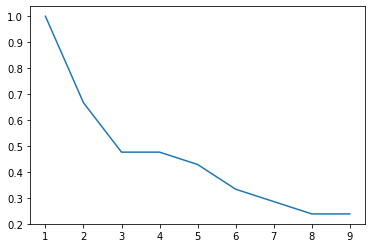

In [398]:
plt.plot(range(1,10),acc)

# 34) location_Hegde Nagar

In [399]:
df34 = df[df['location_Hegde Nagar']==1]

In [400]:
df34 = df34[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [401]:
df34

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
2770     3  1.000000  10100         1569.00    3     6437.221160   
2771     7  2.000000  21000         3000.00    6     7000.000000   
2772     3  2.000000  13200         2026.00    3     6515.301086   
2773     3  2.000000  11500         1801.00    3     6385.341477   
2774     1  1.584376   5600         1050.00    2     5333.333333   
2775     2  1.000000   9700         1341.00    2     7233.407905   
2776     4  2.000000  14500         2112.95    3     6862.443503   
2777     3  2.000000  11300         1703.00    3     6635.349383   
2778     3  1.000000  10500         1570.00    3     6687.898089   
2779     3  2.000000  14000         1801.00    3     7773.459189   
2780     3  1.000000  10300         1584.01    3     6502.484201   
2781     4  2.000000  12500         1965.00    3     6361.323155   
2782     2  0.000000   7500         1200.00    2     6250.000000   
2783     3  2.000000  13500         1847.00    3     7309.149973   
2784     4  2.000000  13200         1965.00    3     6717.557252   
2785     3  2.000000  12500         1703.00    3     7339.988256   
2786     3  2.000000  12500         1847.00    3     6767.731456   
2787     4  2.000000  14500         2144.60    3     6761.167584   
2788     3  2.000000  11900         1718.00    3     6926.658906   
2789     3  2.000000  12300         1847.00    3     6659.447753   
2790     2  2.000000   7200         1340.00    2     5373.134328   
2791     3  2.000000  11500         2087.01    3     5510.275466   
2792     3  2.000000  13000         1703.00    3     7633.587786   
2793     4  2.000000  13500         2087.01    3     6468.584243   
2794     3  2.000000  13000         1718.00    3     7566.938300   
2795     4  2.000000  11800         1884.00    3     6263.269639   
2796     4  2.000000  12200         1930.00    3     6321.243523   
2797     3  1.000000  10400         1584.01    3     6565.615116   
2798     2  1.000000   6800         1168.00    3     5821.917808   
2799     4  2.000000  12900         2162.03    3     5966.614709   
2800     4  2.000000  16000         2087.01    3     7666.470213   
2801     2  0.000000   6600         1000.00    2     6600.000000   
2802     2  2.000000   8050         1348.00    3     5971.810089   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
2770                              1                        0   
2771                              0                        1   
2772                              1                        0   
2773                              1                        0   
2774                              0                        0   
2775                              1                        0   
2776                              1                        0   
2777                              1                        0   
2778                              1                        0   
2779                              1                        0   
2780                              1                        0   
2781                              1                        0   
2782                              0                        0   
2783                              1                        0   
2784                              1                        0   
2785                              1                        0   
2786                              1                        0   
2787                              1                        0   
2788                              1                        0   
2789                              1                        0   
2790                              1                        0   
2791                              1                        0   
2792                              1                        0   
2793                              1                        0   
2794                              1                        0   
2795                         

In [402]:
df34.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.435573  0.893134        0.928715   
balcony                        0.435573  1.000000  0.586315        0.630535   
price                          0.893134  0.586315  1.000000        0.941148   
total_sqft_int                 0.928715  0.630535  0.941148        1.000000   
bhk                            0.839586  0.389250  0.777787        0.795039   
price_per_sqft                 0.309256  0.145457  0.587505        0.289300   
area_typeSuper built-up  Area  0.145823  0.417550  0.271278        0.256573   
area_typeBuilt-up  Area        0.336244  0.139586  0.242849        0.275741   
area_typePlot  Area           -0.460953 -0.636632 -0.539906       -0.548865   
availability_Ready To Move     0.037780 -0.139586 -0.049458       -0.092433   

                                    bhk  price_per_sqft  \
bath                           0.839586        0.309256   
balcony                        0.389250        0.145457   
price                          0.777787        0.587505   
total_sqft_int                 0.795039        0.289300   
bhk                            1.000000        0.260097   
price_per_sqft                 0.260097        1.000000   
area_typeSuper built-up  Area -0.039491        0.260828   
area_typeBuilt-up  Area        0.611236       -0.051830   
area_typePlot  Area           -0.458067       -0.282291   
availability_Ready To Move    -0.023737        0.016408   

                               area_typeSuper built-up  Area  \
bath                                                0.145823   
balcony                                             0.417550   
price                                               0.271278   
total_sqft_int                                      0.256573   
bhk                                                -0.039491   
price_per_sqft                                      0.260828   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.601074   
area_typePlot  Area                                -0.748331   
availability_Ready To Move                         -0.107335   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.336244            -0.460953   
balcony                                       0.139586            -0.636632   
price                                         0.242849            -0.539906   
total_sqft_int                                0.275741            -0.548865   
bhk                                           0.611236            -0.458067   
price_per_sqft                               -0.051830            -0.282291   
area_typeSuper built-up  Area                -0.601074            -0.748331   
area_typeBuilt-up  Area                       1.000000            -0.080322   
area_typePlot  Area                          -0.080322             1.000000   
availability_Ready To Move                    0.064516             0.080322   

                               availability_Ready To Move  
bath                                             0.037780  
balcony                                         -0.139586  
price                                           -0.049458  
total_sqft_int                                  -0.092433  
bhk                                             -0.023737  
price_per_sqft                                   0.016408  
area_typeSuper built-up  Area                   -0.107335  
area_typeBuilt-up  Area                          0.064516  
area_typePlot  Area                              0.080322  
availability_Ready To Move                       1.000000

In [403]:
x = df34[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df34[['price']]

In [404]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5757575757575758]
k= 3 [1.0, 0.5757575757575758, 0.3939393939393939]
k= 4 [1.0, 0.5757575757575758, 0.3939393939393939, 0.30303030303030304]
k= 5 [1.0, 0.5757575757575758, 0.3939393939393939, 0.30303030303030304, 0.24242424242424243]
k= 6 [1.0, 0.5757575757575758, 0.3939393939393939, 0.30303030303030304, 0.24242424242424243, 0.21212121212121213]
k= 7 [1.0, 0.5757575757575758, 0.3939393939393939, 0.30303030303030304, 0.24242424242424243, 0.21212121212121213, 0.21212121212121213]
k= 8 [1.0, 0.5757575757575758, 0.3939393939393939, 0.30303030303030304, 0.24242424242424243, 0.21212121212121213, 0.21212121212121213, 0.24242424242424243]
k= 9 [1.0, 0.5757575757575758, 0.3939393939393939, 0.30303030303030304, 0.24242424242424243, 0.21212121212121213, 0.21212121212121213, 0.24242424242424243, 0.2727272727272727]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [405]:
max(acc)

1.0

In [406]:
k = acc.index(max(acc))+1
k

1

In [407]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


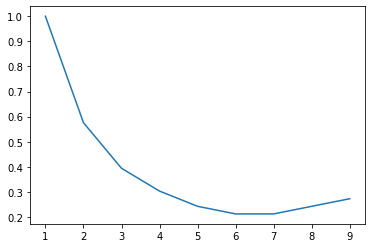

In [408]:
plt.plot(range(1,10),acc)

# 35) location_Hennur

In [409]:
df35 = df[df['location_Hennur']==1]

In [410]:
df35 = df35[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [411]:
df35

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
2805     2  1.000000   5200          1075.0    2     4837.209302   
2806     2  1.000000   5232          1255.0    2     4168.924303   
2807     2  1.000000   5700          1225.0    2     4653.061224   
2808     2  1.000000   5750          1255.0    2     4581.673307   
2809     2  2.000000   5700          1259.0    2     4527.402701   
2810     2  2.000000   5350          1255.0    2     4262.948207   
2811     2  1.000000   6000          1285.0    2     4669.260700   
2812     2  1.000000   6000          1285.0    2     4669.260700   
2813     2  1.000000   6000          1100.0    2     5454.545455   
2814     2  1.000000   5800          1255.0    2     4621.513944   
2815     2  2.000000   4212          1040.0    2     4050.000000   
2816     2  1.000000   5450          1255.0    2     4342.629482   
2817     2  1.000000   5550          1255.0    2     4422.310757   
2818     2  2.000000   5000          1231.0    2     4061.738424   
2819     5  2.000000  12500          2500.0    5     5000.000000   
2820     2  1.000000   4900          1160.0    2     4224.137931   
2821     3  1.584376  13500          2400.0    3     5625.000000   
2822     2  2.000000   5350          1255.0    2     4262.948207   
2823     2  2.000000   5550          1255.0    2     4422.310757   
2824     2  1.000000   4455          1100.0    2     4050.000000   
2825     2  1.000000   5750          1255.0    2     4581.673307   
2826     2  1.000000   4800           960.0    2     5000.000000   
2827     2  1.000000   4800          1020.0    2     4705.882353   
2828     2  1.000000   5232          1255.0    2     4168.924303   
2829     2  1.000000   6400          1295.0    2     4942.084942   
2830     3  2.000000  10200          1935.0    3     5271.317829   
2831     2  1.000000   6900          1345.0    3     5130.111524   
2832     2  1.000000   5800          1255.0    2     4621.513944   
2833     2  1.000000   6200          1420.0    2     4366.197183   
2834     2  2.000000   5450          1155.0    2     4718.614719   
2835     2  1.000000   5232          1255.0    2     4168.924303   
2836     2  2.000000   5235          1255.0    2     4171.314741   
2837     2  2.000000   5450          1255.0    2     4342.629482   
2838     3  0.000000   8420          1830.5    3     4600.109260   
2839     2  1.000000   5550          1255.0    2     4422.310757   
2840     2  1.000000   5357          1255.0    2     4268.525896   
2841     2  2.000000   5650          1255.0    2     4501.992032   
2842     2  2.000000   4273          1050.0    2     4069.523810   
2843     2  1.000000   6200          1295.0    2     4787.644788   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
2805                              1                        0   
2806                              1                        0   
2807                              1                        0   
2808                              1                        0   
2809                              1                        0   
2810                              1                        0   
2811                              1                        0   
2812                              1                        0   
2813                              0                        1   
2814                              1                        0   
2815                              1                        0   
2816                              1                        0   
2817                              1                        0   
2818                              1                        0   
2819                              0                        1   
2820                              1                        0   
2821                              1                        0   
2822                              1                        0   
2823                              1                        0   
2824 

In [412]:
df35.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.154461  0.837018        0.880139   
balcony                        0.154461  1.000000  0.083650        0.113708   
price                          0.837018  0.083650  1.000000        0.971668   
total_sqft_int                 0.880139  0.113708  0.971668        1.000000   
bhk                            0.957712  0.120646  0.833571        0.859175   
price_per_sqft                 0.396442 -0.131219  0.671824        0.486920   
area_typeSuper built-up  Area -0.378161 -0.116757 -0.210093       -0.216496   
area_typeBuilt-up  Area        0.378161  0.116757  0.210093        0.216496   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move    -0.257561  0.417908 -0.200553       -0.264780   

                                    bhk  price_per_sqft  \
bath                           0.957712        0.396442   
balcony                        0.120646       -0.131219   
price                          0.833571        0.671824   
total_sqft_int                 0.859175        0.486920   
bhk                            1.000000        0.454985   
price_per_sqft                 0.454985        1.000000   
area_typeSuper built-up  Area -0.351474       -0.145848   
area_typeBuilt-up  Area        0.351474        0.145848   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move    -0.242563       -0.018036   

                               area_typeSuper built-up  Area  \
bath                                               -0.378161   
balcony                                            -0.116757   
price                                              -0.210093   
total_sqft_int                                     -0.216496   
bhk                                                -0.351474   
price_per_sqft                                     -0.145848   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.054841   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.378161                  NaN   
balcony                                       0.116757                  NaN   
price                                         0.210093                  NaN   
total_sqft_int                                0.216496                  NaN   
bhk                                           0.351474                  NaN   
price_per_sqft                                0.145848                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.054841                  NaN   

                               availability_Ready To Move  
bath                                            -0.257561  
balcony                                          0.417908  
price                                           -0.200553  
total_sqft_int                                  -0.264780  
bhk                                             -0.242563  
price_per_sqft                                  -0.018036  
area_typeSuper built-up  Area                   -0.054841  
area_typeBuilt-up  Area                          0.054841  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [413]:
x = df35[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df35[['price']]

In [414]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6666666666666666]
k= 3 [1.0, 0.6666666666666666, 0.48717948717948717]
k= 4 [1.0, 0.6666666666666666, 0.48717948717948717, 0.38461538461538464]
k= 5 [1.0, 0.6666666666666666, 0.48717948717948717, 0.38461538461538464, 0.358974358974359]
k= 6 [1.0, 0.6666666666666666, 0.48717948717948717, 0.38461538461538464, 0.358974358974359, 0.2564102564102564]
k= 7 [1.0, 0.6666666666666666, 0.48717948717948717, 0.38461538461538464, 0.358974358974359, 0.2564102564102564, 0.23076923076923078]
k= 8 [1.0, 0.6666666666666666, 0.48717948717948717, 0.38461538461538464, 0.358974358974359, 0.2564102564102564, 0.23076923076923078, 0.1794871794871795]
k= 9 [1.0, 0.6666666666666666, 0.48717948717948717, 0.38461538461538464, 0.358974358974359, 0.2564102564102564, 0.23076923076923078, 0.1794871794871795, 0.20512820512820512]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [415]:
max(acc)

1.0

In [416]:
k = acc.index(max(acc))+1
k

1

In [417]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


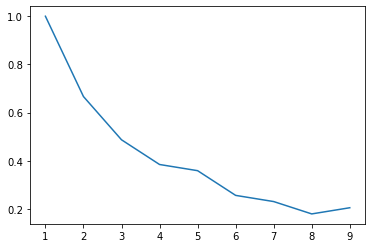

In [418]:
plt.plot(range(1,10),acc)

# 36) location_Hennur Road

In [419]:
df36 = df[df['location_Hennur Road']==1]

In [420]:
df36 = df36[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [421]:
df36

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
2851     3  2.000000  14000          2089.0    3     6701.771182   
2852     8  1.584376  25000          5000.0    8     5000.000000   
2853     2  1.000000   8309          1385.0    2     5999.277978   
2854     2  0.000000   6377          1317.5    2     4840.227704   
2855     3  1.000000  15900          2264.0    3     7022.968198   
...    ...       ...    ...             ...  ...             ...   
2954     3  1.000000  11000          1891.0    3     5817.028027   
2955     2  1.000000   5200          1165.0    2     4463.519313   
2956     2  2.000000   8000          1450.0    2     5517.241379   
2957     2  1.000000   6918          1155.0    2     5989.610390   
2958     3  1.000000  13100          1936.0    3     6766.528926   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
2851                              1                        0   
2852                              0                        1   
2853                              1                        0   
2854                              1                        0   
2855                              0                        1   
...                             ...                      ...   
2954                              1                        0   
2955                              1                        0   
2956                              0                        1   
2957                              1                        0   
2958                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
2851                    0                           1  
2852                    0                           1  
2853                    0                           1  
2854                    0                           0  
2855                    0                           0  
...                   ...                         ...  
2954                    0                           1  
2955                    0                           0  
2956                    0                           1  
2957                    0                           1  
2958                    0                           1  

[108 rows x 10 columns]

In [422]:
df36.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.292195  0.848369        0.930011   
balcony                        0.292195  1.000000  0.373604        0.359534   
price                          0.848369  0.373604  1.000000        0.949488   
total_sqft_int                 0.930011  0.359534  0.949488        1.000000   
bhk                            0.915053  0.248781  0.786806        0.870827   
price_per_sqft                 0.275200  0.178532  0.596921        0.355233   
area_typeSuper built-up  Area -0.245443  0.085259 -0.252930       -0.262515   
area_typeBuilt-up  Area        0.136613 -0.156791  0.091749        0.112083   
area_typePlot  Area            0.407129  0.242019  0.591499        0.554798   
availability_Ready To Move     0.237827  0.221164  0.205474        0.249970   

                                    bhk  price_per_sqft  \
bath                           0.915053        0.275200   
balcony                        0.248781        0.178532   
price                          0.786806        0.596921   
total_sqft_int                 0.870827        0.355233   
bhk                            1.000000        0.304511   
price_per_sqft                 0.304511        1.000000   
area_typeSuper built-up  Area -0.252287       -0.100370   
area_typeBuilt-up  Area        0.174468        0.064246   
area_typePlot  Area            0.299081        0.137100   
availability_Ready To Move     0.205041       -0.059569   

                               area_typeSuper built-up  Area  \
bath                                               -0.245443   
balcony                                             0.085259   
price                                              -0.252930   
total_sqft_int                                     -0.262515   
bhk                                                -0.252287   
price_per_sqft                                     -0.100370   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.960939   
area_typePlot  Area                                -0.240715   
availability_Ready To Move                         -0.120669   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.136613             0.407129   
balcony                                      -0.156791             0.242019   
price                                         0.091749             0.591499   
total_sqft_int                                0.112083             0.554798   
bhk                                           0.174468             0.299081   
price_per_sqft                                0.064246             0.137100   
area_typeSuper built-up  Area                -0.960939            -0.240715   
area_typeBuilt-up  Area                       1.000000            -0.037309   
area_typePlot  Area                          -0.037309             1.000000   
availability_Ready To Move                    0.104338             0.069788   

                               availability_Ready To Move  
bath                                             0.237827  
balcony                                          0.221164  
price                                            0.205474  
total_sqft_int                                   0.249970  
bhk                                              0.205041  
price_per_sqft                                  -0.059569  
area_typeSuper built-up  Area                   -0.120669  
area_typeBuilt-up  Area                          0.104338  
area_typePlot  Area                              0.069788  
availability_Ready To Move                       1.000000

In [423]:
x = df36[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df36[['price']]

In [424]:
acc = []
for i in range(1,12):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5462962962962963]
k= 3 [1.0, 0.5462962962962963, 0.35185185185185186]
k= 4 [1.0, 0.5462962962962963, 0.35185185185185186, 0.28703703703703703]
k= 5 [1.0, 0.5462962962962963, 0.35185185185185186, 0.28703703703703703, 0.24074074074074073]
k= 6 [1.0, 0.5462962962962963, 0.35185185185185186, 0.28703703703703703, 0.24074074074074073, 0.21296296296296297]
k= 7 [1.0, 0.5462962962962963, 0.35185185185185186, 0.28703703703703703, 0.24074074074074073, 0.21296296296296297, 0.19444444444444445]
k= 8 [1.0, 0.5462962962962963, 0.35185185185185186, 0.28703703703703703, 0.24074074074074073, 0.21296296296296297, 0.19444444444444445, 0.18518518518518517]
k= 9 [1.0, 0.5462962962962963, 0.35185185185185186, 0.28703703703703703, 0.24074074074074073, 0.21296296296296297, 0.19444444444444445, 0.18518518518518517, 0.19444444444444445]
k= 10 [1.0, 0.5462962962962963, 0.35185185185185186, 0.28703703703703703, 0.24074074074074073, 0.21296296296296297, 0.19444444444444445, 0.18518518518518

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [425]:
max(acc)

1.0

In [426]:
k = acc.index(max(acc))+1
k

1

In [427]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


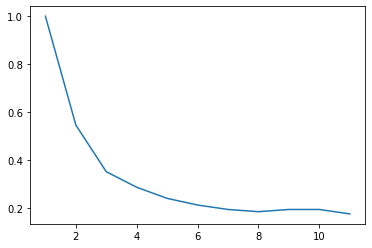

In [428]:
plt.plot(range(1,12),acc)

# 37) location_Hoodi

In [429]:
df37 = df[df['location_Hoodi']==1]

In [430]:
df37 = df37[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [431]:
df37

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
2973     2      2.0   6700           985.0    2     6802.030457   
2974     2      2.0   8000          1425.0    2     5614.035088   
2975     2      2.0   7500          1420.0    2     5281.690141   
2976     3      2.0  11000          1639.0    3     6711.409396   
2977     3      1.0   9832          1639.0    3     5998.779744   
2978     2      1.0   6087          1026.0    2     5932.748538   
2979     2      2.0   5000          1050.0    2     4761.904762   
2980     2      1.0   7800          1400.0    2     5571.428571   
2981     5      2.0  16000          2400.0    5     6666.666667   
2982     2      0.0   7173          1196.0    2     5998.327759   
2983     2      1.0   8400          1500.0    2     5600.000000   
2984     2      1.0   5763          1055.0    2     5462.559242   
2985     2      3.0  11400          1925.0    3     5922.077922   
2986     2      1.0   8200          1400.0    2     5857.142857   
2987     1      1.0   4824           706.0    1     6832.861190   
2988     2      1.0   6900          1257.0    2     5489.260143   
2989     2      0.0   6790          1132.0    2     5998.233216   
2990     3      3.0  11000          1925.0    3     5714.285714   
2991     2      1.0   7103          1257.0    2     5650.755768   
2992     2      1.0   7500          1305.0    2     5747.126437   
2993     2      3.0   6500          1240.0    2     5241.935484   
2994     2      1.0   7423          1108.0    2     6699.458484   
2995     2      1.0   6850          1257.0    2     5449.482896   
2996     2      2.0   4800          1000.0    2     4800.000000   
2997     2      1.0   6117          1063.0    2     5754.468485   
2998     2      2.0   6945          1259.0    2     5516.282764   
2999     1      0.0   4265           711.0    1     5998.593530   
3000     1      0.0   4054           863.0    1     4698.725377   
3001     2      2.0  10000          1715.0    3     5830.903790   
3002     3      2.0   7600          1447.0    2     5252.246026   
3003     3      2.0  14000          2144.0    3     6529.850746   
3004     2      0.0   6645          1108.0    2     5998.194946   
3005     3      1.0  11000          1837.0    3     5988.023952   
3006     4      1.0  22000          3385.0    4     6499.261448   
3007     2      2.0   5500          1181.0    2     4657.070279   
3008     3      0.0   8500          1490.0    3     5704.697987   
3009     2      0.0   5913          1258.5    2     4698.847835   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
2973                              0                        1   
2974                              0                        1   
2975                              1                        0   
2976                              1                        0   
2977                              1                        0   
2978                              1                        0   
2979                              1                        0   
2980                              1                        0   
2981                              0                        0   
2982                              1                        0   
2983                              0                        1   
2984                              1                        0   
2985                              1                        0   
2986                              1                        0   
2987                              1                        0   
2988                              1                        0   
2989                              1                        0   
2990                              1                        0   
2991                              1                        0   
2992                              1                        0   
2993                              0                        1   
2994                              1                

In [432]:
df.corr()

bath   balcony     price  total_sqft_int  \
bath                         1.000000  0.283192  0.523941        0.653435   
balcony                      0.283192  1.000000  0.138946        0.200648   
price                        0.523941  0.138946  1.000000        0.797955   
total_sqft_int               0.653435  0.200648  0.797955        1.000000   
bhk                          0.882461  0.269511  0.497817        0.647485   
...                               ...       ...       ...             ...   
location_Hosur Road          0.011201 -0.020262  0.000618        0.007224   
location_Horamavu Banaswadi -0.020635  0.022541 -0.021200       -0.015287   
location_Domlur              0.006606  0.000445  0.019573        0.007875   
location_Mahadevpura        -0.017608  0.008764 -0.015800       -0.011000   
location_Tumkur Road        -0.002474 -0.018788 -0.006216       -0.010931   

                                  bhk  price_per_sqft  \
bath                         0.882461        0.350497   
balcony                      0.269511        0.068018   
price                        0.497817        0.717821   
total_sqft_int               0.647485        0.376673   
bhk                          1.000000        0.323285   
...                               ...             ...   
location_Hosur Road          0.016102        0.001412   
location_Horamavu Banaswadi -0.026186       -0.037227   
location_Domlur              0.005351        0.054259   
location_Mahadevpura        -0.010418       -0.023633   
location_Tumkur Road         0.008504        0.009832   

                             area_typeSuper built-up  Area  \
bath                                             -0.118940   
balcony                                           0.120220   
price                                            -0.114594   
total_sqft_int                                   -0.133719   
bhk                                              -0.142496   
...                                                    ...   
location_Hosur Road                               0.001408   
location_Horamavu Banaswadi                       0.024451   
location_Domlur                                   0.006048   
location_Mahadevpura                              0.030585   
location_Tumkur Road                              0.030585   

                             area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                        0.030143             0.161243   
balcony                                    -0.048382            -0.138809   
price                                      -0.014613             0.229543   
total_sqft_int                              0.014041             0.219383   
bhk                                         0.044187             0.178557   
...                                              ...                  ...   
location_Hosur Road                         0.001151            -0.003231   
location_Horamavu Banaswadi                -0.018187            -0.013638   
location_Domlur                             0.002433            -0.013638   
location_Mahadevpura                       -0.025060            -0.013638   
location_Tumkur Road                       -0.025060            -0.013638   

                             availability_Ready To Move  ...  \
bath                                           0.022495  ...   
balcony                                        0.117337  ...   
price                                          0.012542  ...   
total_sqft_int                                 0.009710  ...   
bhk                                            0.043887  ...   
...                                                 ...  ...   
location_Hosur Road                           -0.036076  ...   
location_Horamavu Banaswadi                    0.027142  ...   
location_Domlur                                0.020595  ...   
location_Mahadevpura                           0.027142  ...   
location_Tumkur Road                          -0.

In [433]:
x = df37[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df37[['price']]

In [434]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5135135135135135]
k= 3 [1.0, 0.5135135135135135, 0.2702702702702703]
k= 4 [1.0, 0.5135135135135135, 0.2702702702702703, 0.1891891891891892]
k= 5 [1.0, 0.5135135135135135, 0.2702702702702703, 0.1891891891891892, 0.21621621621621623]
k= 6 [1.0, 0.5135135135135135, 0.2702702702702703, 0.1891891891891892, 0.21621621621621623, 0.1891891891891892]
k= 7 [1.0, 0.5135135135135135, 0.2702702702702703, 0.1891891891891892, 0.21621621621621623, 0.1891891891891892, 0.16216216216216217]
k= 8 [1.0, 0.5135135135135135, 0.2702702702702703, 0.1891891891891892, 0.21621621621621623, 0.1891891891891892, 0.16216216216216217, 0.16216216216216217]
k= 9 [1.0, 0.5135135135135135, 0.2702702702702703, 0.1891891891891892, 0.21621621621621623, 0.1891891891891892, 0.16216216216216217, 0.16216216216216217, 0.16216216216216217]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [435]:
max(acc)

1.0

In [436]:
k = acc.index(max(acc))+1
k

1

In [437]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


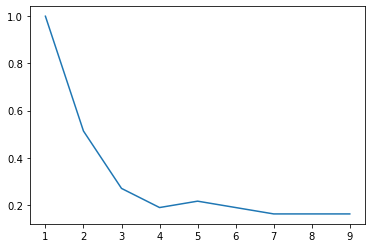

In [438]:
plt.plot(range(1,10),acc)

# 38) location_Horamavu Agara

In [439]:
df38 = df[df['location_Horamavu Agara']==1]

In [440]:
df38 = df38[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [441]:
df38

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
3015     2      1.0   4500         1200.00    2     3750.000000   
3016     3      2.0   7500         1560.00    3     4807.692308   
3017     2      1.0   4765          982.00    2     4852.342159   
3018     2      1.0   7500         1650.00    3     4545.454545   
3019     2      3.0   3900          950.00    2     4105.263158   
3020     2      1.0   4309         1106.00    2     3896.021700   
3021     2      2.0   4100         1079.00    2     3799.814643   
3022     2      1.0   3700         1060.00    2     3490.566038   
3023     2      1.0   4151         1107.83    2     3746.964787   
3024     2      1.0   3819          980.00    2     3896.938776   
3025     2      1.0   4121         1145.00    2     3599.126638   
3026     2      1.0   4600         1000.00    2     4600.000000   
3027     2      2.0   3749          760.00    2     4932.894737   
3028     2      1.0   4200         1150.00    2     3652.173913   
3029     1      1.0   2700          625.00    1     4320.000000   
3030     2      1.0   3800         1080.00    2     3518.518519   
3031     2      1.0   4228          994.00    2     4253.521127   
3032     2      1.0   4151         1107.83    2     3746.964787   
3033     2      1.0   4600         1090.00    2     4220.183486   
3034     3      3.0   6300         1400.00    3     4500.000000   
3035     3      1.0   7000         1557.00    3     4495.825305   
3036     2      2.0   4700         1058.00    2     4442.344045   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
3015                              1                        0   
3016                              1                        0   
3017                              0                        1   
3018                              1                        0   
3019                              1                        0   
3020                              0                        1   
3021                              1                        0   
3022                              1                        0   
3023                              1                        0   
3024                              0                        1   
3025                              1                        0   
3026                              1                        0   
3027                              0                        1   
3028                              1                        0   
3029                              1                        0   
3030                              0                        1   
3031                              1                        0   
3032                              1                        0   
3033                              1                        0   
3034                              0                        1   
3035                              1                        0   
3036                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
3015                    0                           1  
3016                    0                           1  
3017                    0                           1  
3018                    0                           1  
3019                    0                           0  
3020                    0                           1  
3021                    0                           0  
3022                    0                           1  
3023                    0                           1  
3024                    0                           1  
3025                    0                           1  
3026                    0                           1  
3027                    0                           1  
3028                    0                           1  
3029                    0                           1  
3030                    0                           1  
3031                    0              

In [442]:
df38.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.385758  0.776161        0.760274   
balcony                        0.385758  1.000000  0.183957        0.058581   
price                          0.776161  0.183957  1.000000        0.918522   
total_sqft_int                 0.760274  0.058581  0.918522        1.000000   
bhk                            0.890253  0.295511  0.936954        0.915775   
price_per_sqft                 0.291840  0.322783  0.497596        0.117068   
area_typeSuper built-up  Area -0.111359 -0.129904  0.097726        0.177573   
area_typeBuilt-up  Area        0.111359  0.129904 -0.097726       -0.177573   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move     0.118345 -0.368143  0.152985        0.196458   

                                    bhk  price_per_sqft  \
bath                           0.890253        0.291840   
balcony                        0.295511        0.322783   
price                          0.936954        0.497596   
total_sqft_int                 0.915775        0.117068   
bhk                            1.000000        0.355506   
price_per_sqft                 0.355506        1.000000   
area_typeSuper built-up  Area -0.040622       -0.167084   
area_typeBuilt-up  Area        0.040622        0.167084   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move     0.161890       -0.024295   

                               area_typeSuper built-up  Area  \
bath                                               -0.111359   
balcony                                            -0.129904   
price                                               0.097726   
total_sqft_int                                      0.177573   
bhk                                                -0.040622   
price_per_sqft                                     -0.167084   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.332106   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.111359                  NaN   
balcony                                       0.129904                  NaN   
price                                        -0.097726                  NaN   
total_sqft_int                               -0.177573                  NaN   
bhk                                           0.040622                  NaN   
price_per_sqft                                0.167084                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.332106                  NaN   

                               availability_Ready To Move  
bath                                             0.118345  
balcony                                         -0.368143  
price                                            0.152985  
total_sqft_int                                   0.196458  
bhk                                              0.161890  
price_per_sqft                                  -0.024295  
area_typeSuper built-up  Area                   -0.332106  
area_typeBuilt-up  Area                          0.332106  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [443]:
x = df38[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df38[['price']]

In [444]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6363636363636364]
k= 3 [1.0, 0.6363636363636364, 0.45454545454545453]
k= 4 [1.0, 0.6363636363636364, 0.45454545454545453, 0.36363636363636365]
k= 5 [1.0, 0.6363636363636364, 0.45454545454545453, 0.36363636363636365, 0.3181818181818182]
k= 6 [1.0, 0.6363636363636364, 0.45454545454545453, 0.36363636363636365, 0.3181818181818182, 0.22727272727272727]
k= 7 [1.0, 0.6363636363636364, 0.45454545454545453, 0.36363636363636365, 0.3181818181818182, 0.22727272727272727, 0.22727272727272727]
k= 8 [1.0, 0.6363636363636364, 0.45454545454545453, 0.36363636363636365, 0.3181818181818182, 0.22727272727272727, 0.22727272727272727, 0.18181818181818182]
k= 9 [1.0, 0.6363636363636364, 0.45454545454545453, 0.36363636363636365, 0.3181818181818182, 0.22727272727272727, 0.22727272727272727, 0.18181818181818182, 0.18181818181818182]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [445]:
max(acc)

1.0

In [446]:
k = acc.index(max(acc))+1
k

1

In [447]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


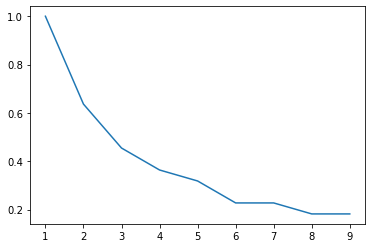

In [448]:
plt.plot(range(1,10),acc)

# 39) location_Horamavu Banaswadi

In [449]:
df39 = df[df['location_Horamavu Banaswadi']==1]

In [450]:
df39 = df39[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [451]:
df39

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
3037     2      2.0   4600          1156.0    2     3979.238754   
3038     2      2.0   5800          1180.0    2     4915.254237   
3039     2      2.0   5160          1307.0    2     3947.972456   
3040     2      2.0   5400          1357.0    2     3979.366249   
3041     2      3.0   3800           925.0    2     4108.108108   
3042     2      2.0   4800          1272.0    2     3773.584906   
3043     2      2.0   4950          1225.0    2     4040.816327   
3044     2      2.0   5150          1272.0    2     4048.742138   
3045     2      2.0   5150          1272.0    2     4048.742138   
3046     2      2.0   4690          1156.0    2     4057.093426   
3047     2      1.0   4500          1200.0    2     3750.000000   
3048     2      2.0   4700          1254.0    2     3748.006380   
3049     3      3.0   6800          1610.0    3     4223.602484   
3050     2      1.0   5000          1210.0    2     4132.231405   
3051     2      2.0   5400          1357.0    2     3979.366249   
3052     2      2.0   5000          1272.0    2     3930.817610   
3053     2      1.0   4500          1200.0    2     3750.000000   
3054     2      2.0   4500          1025.0    2     4390.243902   
3055     2      1.0   5200          1081.0    2     4810.360777   
3056     2      2.0   5000          1000.0    2     5000.000000   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
3037                              1                        0   
3038                              1                        0   
3039                              1                        0   
3040                              1                        0   
3041                              1                        0   
3042                              1                        0   
3043                              1                        0   
3044                              1                        0   
3045                              1                        0   
3046                              1                        0   
3047                              1                        0   
3048                              1                        0   
3049                              1                        0   
3050                              1                        0   
3051                              1                        0   
3052                              1                        0   
3053                              1                        0   
3054                              1                        0   
3055                              0                        1   
3056                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
3037                    0                           1  
3038                    0                           1  
3039                    0                           1  
3040                    0                           1  
3041                    0                           1  
3042                    0                           1  
3043                    0                           1  
3044                    0                           1  
3045                    0                           1  
3046                    0                           1  
3047                    0                           1  
3048                    0                           1  
3049                    0                           1  
3050                    0                           1  
3051                    0                           1  
3052                    0                           1  
3053                    0                           1  
3054                    0                           1  
3055                    0                           1  
3056                    0                           1

In [452]:
df39.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.468616  0.701672        0.628569   
balcony                        0.468616  1.000000  0.223068        0.179163   
price                          0.701672  0.223068  1.000000        0.758061   
total_sqft_int                 0.628569  0.179163  0.758061        1.000000   
bhk                            1.000000  0.468616  0.701672        0.628569   
price_per_sqft                 0.058649  0.038436  0.306588       -0.386520   
area_typeSuper built-up  Area  0.052632  0.383413 -0.076226        0.216552   
area_typeBuilt-up  Area       -0.052632 -0.383413  0.076226       -0.216552   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move          NaN       NaN       NaN             NaN   

                                    bhk  price_per_sqft  \
bath                           1.000000        0.058649   
balcony                        0.468616        0.038436   
price                          0.701672        0.306588   
total_sqft_int                 0.628569       -0.386520   
bhk                            1.000000        0.058649   
price_per_sqft                 0.058649        1.000000   
area_typeSuper built-up  Area  0.052632       -0.428979   
area_typeBuilt-up  Area       -0.052632        0.428979   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move          NaN             NaN   

                               area_typeSuper built-up  Area  \
bath                                                0.052632   
balcony                                             0.383413   
price                                              -0.076226   
total_sqft_int                                      0.216552   
bhk                                                 0.052632   
price_per_sqft                                     -0.428979   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                               NaN   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.052632                  NaN   
balcony                                      -0.383413                  NaN   
price                                         0.076226                  NaN   
total_sqft_int                               -0.216552                  NaN   
bhk                                          -0.052632                  NaN   
price_per_sqft                                0.428979                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                         NaN                  NaN   

                               availability_Ready To Move  
bath                                                  NaN  
balcony                                               NaN  
price                                                 NaN  
total_sqft_int                                        NaN  
bhk                                                   NaN  
price_per_sqft                                        NaN  
area_typeSuper built-up  Area                         NaN  
area_typeBuilt-up  Area                               NaN  
area_typePlot  Area                                   NaN  
availability_Ready To Move                            NaN

In [453]:
x = df39[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df39[['price']]

In [454]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.7]
k= 3 [1.0, 0.7, 0.5]
k= 4 [1.0, 0.7, 0.5, 0.4]
k= 5 [1.0, 0.7, 0.5, 0.4, 0.45]
k= 6 [1.0, 0.7, 0.5, 0.4, 0.45, 0.3]
k= 7 [1.0, 0.7, 0.5, 0.4, 0.45, 0.3, 0.3]
k= 8 [1.0, 0.7, 0.5, 0.4, 0.45, 0.3, 0.3, 0.3]
k= 9 [1.0, 0.7, 0.5, 0.4, 0.45, 0.3, 0.3, 0.3, 0.2]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [455]:
max(acc)

1.0

In [456]:
k = acc.index(max(acc))+1
k

1

In [457]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


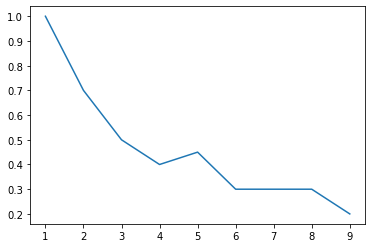

In [458]:
plt.plot(range(1,10),acc)

# 40) location_Hormavu

In [459]:
df40 = df[df['location_Hormavu']==1]

In [460]:
df40 = df40[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [461]:
df40

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
3057     2      1.0   7800          1500.0    2     5200.000000   
3058     2      2.0   5500          1150.0    2     4782.608696   
3059     2      2.0   5000          1180.0    2     4237.288136   
3060     2      0.0   6700          1200.0    2     5583.333333   
3061     3      0.0   7000          1200.0    2     5833.333333   
3062     2      1.0   5200          1175.0    2     4425.531915   
3063     2      1.0   5300          1351.0    1     3923.019985   
3064     2      1.0   4440          1141.0    2     3891.323401   
3065     2      1.0   4230          1130.0    2     3743.362832   
3066     3      2.0   8500          1725.0    3     4927.536232   
3067     2      1.0   6500          1153.0    2     5637.467476   
3068     2      1.0   5311          1150.0    2     4618.260870   
3069     2      1.0   5600          1123.0    2     4986.642921   
3070     2      2.0   6900          1385.0    3     4981.949458   
3071     2      1.0   4935          1030.0    2     4791.262136   
3072     2      1.0   5080          1018.0    2     4990.176817   
3073     3      2.0   7500          1555.0    3     4823.151125   
3074     2      1.0   5300          1143.0    2     4636.920385   
3075     2      3.0   3800          1100.0    2     3454.545455   
3076     2      2.0   5000          1000.0    2     5000.000000   
3077     2      2.0   6800          1200.0    2     5666.666667   
3078     2      3.0   6800          1200.0    2     5666.666667   
3079     2      1.0   3749           765.0    2     4900.653595   
3080     2      0.0   3866          1081.5    2     3575.127138   
3081     2      2.0   6000          1250.0    2     4800.000000   
3082     2      2.0   3715           965.0    2     3849.740933   
3083     1      0.0   2827           583.0    1     4849.914237   
3084     2      1.0   4400          1129.0    2     3897.254207   
3085     2      1.0   6925          1385.0    3     5000.000000   
3086     2      1.0   5092          1065.0    2     4781.220657   
3087     2      1.0   6000          1046.0    2     5736.137667   
3088     2      0.0   7500          1400.0    2     5357.142857   
3089     2      2.0   6500          1365.0    3     4761.904762   
3090     2      1.0   4480          1196.0    2     3745.819398   
3091     2      1.0   4736          1263.0    2     3749.802059   
3092     2      1.0   3908          1015.0    2     3850.246305   
3093     2      0.0   7300          1200.0    2     6083.333333   
3094     2      2.0   6500          1250.0    2     5200.000000   
3095     2      1.0   5370          1075.0    2     4995.348837   
3096     2      2.0   4200           980.0    2     4285.714286   
3097     2      1.0   5370          1075.0    2     4995.348837   
3098     4      0.0  11500          2282.0    4     5039.439089   
3099     2      1.0   5500          1206.0    2     4560.530680   
3100     2      2.0   6700          1310.0    2     5114.503817   
3101     2      3.0   6000          1310.0    2     4580.152672   
3102     2      2.0   4575          1020.0    2     4485.294118   
3103     2      3.0   6900          1210.0    2     5702.479339   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
3057                              1                        0   
3058                              1                        0   
3059                              0                        1   
3060                              0                        0   
3061                              0                        0   
3062                              1                        0   
3063                              1                        0   
3064                              1                        0   
3065                              1                        0   
3066                              0                        1   
3067                              1                        0   
3068                 

In [462]:
df40.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000 -0.081271  0.704025        0.790195   
balcony                       -0.081271  1.000000 -0.035405        0.008493   
price                          0.704025 -0.035405  1.000000        0.870081   
total_sqft_int                 0.790195  0.008493  0.870081        1.000000   
bhk                            0.734217  0.076471  0.670637        0.747204   
price_per_sqft                 0.143161 -0.078296  0.618684        0.153457   
area_typeSuper built-up  Area -0.299244  0.318243 -0.272757       -0.165785   
area_typeBuilt-up  Area        0.124579  0.158730  0.046854        0.083679   
area_typePlot  Area            0.160557 -0.416067  0.220092        0.003728   
availability_Ready To Move    -0.235223  0.378514 -0.019175       -0.123553   

                                    bhk  price_per_sqft  \
bath                           0.734217        0.143161   
balcony                        0.076471       -0.078296   
price                          0.670637        0.618684   
total_sqft_int                 0.747204        0.153457   
bhk                            1.000000        0.138189   
price_per_sqft                 0.138189        1.000000   
area_typeSuper built-up  Area -0.119454       -0.276128   
area_typeBuilt-up  Area        0.092815       -0.029764   
area_typePlot  Area           -0.058860        0.429115   
availability_Ready To Move    -0.048865        0.155689   

                               area_typeSuper built-up  Area  \
bath                                               -0.299244   
balcony                                             0.318243   
price                                              -0.272757   
total_sqft_int                                     -0.165785   
bhk                                                -0.119454   
price_per_sqft                                     -0.276128   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.626710   
area_typePlot  Area                                -0.536543   
availability_Ready To Move                          0.299943   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.124579             0.160557   
balcony                                       0.158730            -0.416067   
price                                         0.046854             0.220092   
total_sqft_int                                0.083679             0.003728   
bhk                                           0.092815            -0.058860   
price_per_sqft                               -0.029764             0.429115   
area_typeSuper built-up  Area                -0.626710            -0.536543   
area_typeBuilt-up  Area                       1.000000            -0.079640   
area_typePlot  Area                          -0.079640             1.000000   
availability_Ready To Move                    0.116675            -0.160932   

                               availability_Ready To Move  
bath                                            -0.235223  
balcony                                          0.378514  
price                                           -0.019175  
total_sqft_int                                  -0.123553  
bhk                                             -0.048865  
price_per_sqft                                   0.155689  
area_typeSuper built-up  Area                    0.299943  
area_typeBuilt-up  Area                          0.116675  
area_typePlot  Area                             -0.160932  
availability_Ready To Move                       1.000000

In [463]:
x = df40[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df40[['price']]

In [464]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.46808510638297873]
k= 3 [1.0, 0.46808510638297873, 0.3191489361702128]
k= 4 [1.0, 0.46808510638297873, 0.3191489361702128, 0.2765957446808511]
k= 5 [1.0, 0.46808510638297873, 0.3191489361702128, 0.2765957446808511, 0.23404255319148937]
k= 6 [1.0, 0.46808510638297873, 0.3191489361702128, 0.2765957446808511, 0.23404255319148937, 0.19148936170212766]
k= 7 [1.0, 0.46808510638297873, 0.3191489361702128, 0.2765957446808511, 0.23404255319148937, 0.19148936170212766, 0.19148936170212766]
k= 8 [1.0, 0.46808510638297873, 0.3191489361702128, 0.2765957446808511, 0.23404255319148937, 0.19148936170212766, 0.19148936170212766, 0.14893617021276595]
k= 9 [1.0, 0.46808510638297873, 0.3191489361702128, 0.2765957446808511, 0.23404255319148937, 0.19148936170212766, 0.19148936170212766, 0.14893617021276595, 0.1702127659574468]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [465]:
max(acc)

1.0

In [466]:
k = acc.index(max(acc))+1
k

1

In [467]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


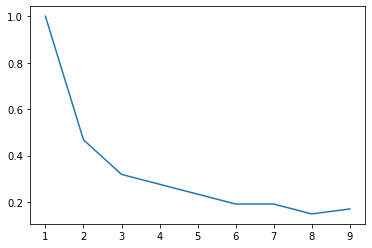

In [468]:
plt.plot(range(1,10),acc)

# 41) location_Hosa Road

In [469]:
df41 = df[df['location_Hosa Road']==1]

In [470]:
df41 = df41[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [471]:
df41

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
3104     3      2.0   8500          1652.0    3     5145.278450   
3105     2      1.0   5515          1161.0    2     4750.215332   
3106     2      1.0   5515          1161.0    2     4750.215332   
3107     2      1.0   9200          1365.0    2     6739.926740   
3108     2      2.0   4850          1243.0    2     3901.850362   
3109     2      1.0   8612          1332.0    3     6465.465465   
3110     1      1.0   2829           615.0    1     4600.000000   
3111     2      1.0   8528          1318.0    3     6470.409712   
3112     2      1.0   5200          1133.0    2     4589.585172   
3113     2      2.0   4000          1016.0    2     3937.007874   
3114     2      2.0   4000           972.0    2     4115.226337   
3115     2      1.0   5515          1161.0    2     4750.215332   
3116     3      2.0   9813          1532.0    3     6405.352480   
3117     3      1.0  10100          1680.0    3     6011.904762   
3118     2      0.0   5000           880.0    2     5681.818182   
3119     3      1.0   9818          1533.0    3     6404.435747   
3120     2      1.0   6859          1040.0    2     6595.192308   
3121     2      1.0   6100          1040.0    2     5865.384615   
3122     2      1.0   6200          1245.0    2     4979.919679   
3123     2      1.0   8486          1311.0    3     6472.921434   
3124     1      0.0   3999           800.0    1     4998.750000   
3125     2      1.0   6479          1364.0    2     4750.000000   
3126     2      1.0   4500          1016.0    2     4429.133858   
3127     2      1.0   7761          1360.0    2     5706.617647   
3128     2      2.0   6500          1170.0    2     5555.555556   
3129     2      1.0   5515          1161.0    2     4750.215332   
3130     2      2.0   8422          1470.0    3     5729.251701   
3131     2      1.0   4875          1161.0    2     4198.966408   
3132     2      1.0   3995          1016.0    2     3932.086614   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
3104                              1                        0   
3105                              1                        0   
3106                              1                        0   
3107                              1                        0   
3108                              1                        0   
3109                              1                        0   
3110                              1                        0   
3111                              1                        0   
3112                              1                        0   
3113                              1                        0   
3114                              0                        1   
3115                              1                        0   
3116                              1                        0   
3117                              1                        0   
3118                              0                        0   
3119                              1                        0   
3120                              1                        0   
3121                              1                        0   
3122                              1                        0   
3123                              1                        0   
3124                              1                        0   
3125                              1                        0   
3126                              1                        0   
3127                              1                        0   
3128                              1                        0   
3129                              1                        0   
3130                              1                        0   
3131                              1                        0   
3132                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
3104              

In [472]:
df.corr()

bath   balcony     price  total_sqft_int  \
bath                         1.000000  0.283192  0.523941        0.653435   
balcony                      0.283192  1.000000  0.138946        0.200648   
price                        0.523941  0.138946  1.000000        0.797955   
total_sqft_int               0.653435  0.200648  0.797955        1.000000   
bhk                          0.882461  0.269511  0.497817        0.647485   
...                               ...       ...       ...             ...   
location_Hosur Road          0.011201 -0.020262  0.000618        0.007224   
location_Horamavu Banaswadi -0.020635  0.022541 -0.021200       -0.015287   
location_Domlur              0.006606  0.000445  0.019573        0.007875   
location_Mahadevpura        -0.017608  0.008764 -0.015800       -0.011000   
location_Tumkur Road        -0.002474 -0.018788 -0.006216       -0.010931   

                                  bhk  price_per_sqft  \
bath                         0.882461        0.350497   
balcony                      0.269511        0.068018   
price                        0.497817        0.717821   
total_sqft_int               0.647485        0.376673   
bhk                          1.000000        0.323285   
...                               ...             ...   
location_Hosur Road          0.016102        0.001412   
location_Horamavu Banaswadi -0.026186       -0.037227   
location_Domlur              0.005351        0.054259   
location_Mahadevpura        -0.010418       -0.023633   
location_Tumkur Road         0.008504        0.009832   

                             area_typeSuper built-up  Area  \
bath                                             -0.118940   
balcony                                           0.120220   
price                                            -0.114594   
total_sqft_int                                   -0.133719   
bhk                                              -0.142496   
...                                                    ...   
location_Hosur Road                               0.001408   
location_Horamavu Banaswadi                       0.024451   
location_Domlur                                   0.006048   
location_Mahadevpura                              0.030585   
location_Tumkur Road                              0.030585   

                             area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                        0.030143             0.161243   
balcony                                    -0.048382            -0.138809   
price                                      -0.014613             0.229543   
total_sqft_int                              0.014041             0.219383   
bhk                                         0.044187             0.178557   
...                                              ...                  ...   
location_Hosur Road                         0.001151            -0.003231   
location_Horamavu Banaswadi                -0.018187            -0.013638   
location_Domlur                             0.002433            -0.013638   
location_Mahadevpura                       -0.025060            -0.013638   
location_Tumkur Road                       -0.025060            -0.013638   

                             availability_Ready To Move  ...  \
bath                                           0.022495  ...   
balcony                                        0.117337  ...   
price                                          0.012542  ...   
total_sqft_int                                 0.009710  ...   
bhk                                            0.043887  ...   
...                                                 ...  ...   
location_Hosur Road                           -0.036076  ...   
location_Horamavu Banaswadi                    0.027142  ...   
location_Domlur                                0.020595  ...   
location_Mahadevpura                           0.027142  ...   
location_Tumkur Road                          -0.

In [473]:
x = df41[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df41[['price']]

In [474]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5517241379310345]
k= 3 [1.0, 0.5517241379310345, 0.3793103448275862]
k= 4 [1.0, 0.5517241379310345, 0.3793103448275862, 0.3448275862068966]
k= 5 [1.0, 0.5517241379310345, 0.3793103448275862, 0.3448275862068966, 0.3448275862068966]
k= 6 [1.0, 0.5517241379310345, 0.3793103448275862, 0.3448275862068966, 0.3448275862068966, 0.27586206896551724]
k= 7 [1.0, 0.5517241379310345, 0.3793103448275862, 0.3448275862068966, 0.3448275862068966, 0.27586206896551724, 0.2413793103448276]
k= 8 [1.0, 0.5517241379310345, 0.3793103448275862, 0.3448275862068966, 0.3448275862068966, 0.27586206896551724, 0.2413793103448276, 0.20689655172413793]
k= 9 [1.0, 0.5517241379310345, 0.3793103448275862, 0.3448275862068966, 0.3448275862068966, 0.27586206896551724, 0.2413793103448276, 0.20689655172413793, 0.20689655172413793]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [475]:
max(acc)

1.0

In [476]:
k = acc.index(max(acc))+1
k

1

In [477]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


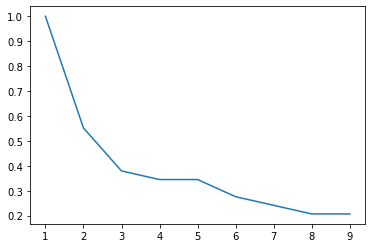

In [478]:
plt.plot(range(1,10),acc)

# 42) location_Hosur Road

In [479]:
df42 = df[df['location_Hosur Road']==1]

In [480]:
df42 = df42[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [481]:
df42

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
3163     2      1.0  12000          1656.0    2     7246.376812   
3164     2      0.0   6900          1194.0    2     5778.894472   
3165     5      2.0  24000          3300.0    5     7272.727273   
3166     2      1.0  10500          1510.0    3     6953.642384   
3167     2      1.0   8063          1427.0    3     5650.315347   
3168     2      1.0  11000          1508.0    3     7294.429708   
3169     1      1.0   2100           460.0    1     4565.217391   
3170     2      1.0   4900          1179.0    2     4156.064461   
3171     2      1.0   6000           950.0    2     6315.789474   
3172     2      1.0   7164          1194.0    2     6000.000000   
3173     3      1.0  13000          1766.0    3     7361.268403   
3174     3      1.0  10300          1689.0    3     6098.283008   
3175     5      3.0  18000          3600.0    5     5000.000000   
3176     2      1.0   4800          1170.0    2     4102.564103   
3177     2      1.0   5500          1250.0    2     4400.000000   
3178     3      2.0  10300          1689.0    3     6098.283008   
3179     4      1.0  13000          2000.0    4     6500.000000   
3180     2      2.0   6500          1250.0    2     5200.000000   
3181     3      2.0  10300          1689.0    3     6098.283008   
3182     2      1.0   9300          1223.0    2     7604.251840   
3183     3      2.0  11700          1919.0    3     6096.925482   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
3163                              0                        1   
3164                              0                        1   
3165                              0                        1   
3166                              1                        0   
3167                              1                        0   
3168                              1                        0   
3169                              1                        0   
3170                              1                        0   
3171                              1                        0   
3172                              1                        0   
3173                              1                        0   
3174                              1                        0   
3175                              0                        1   
3176                              1                        0   
3177                              1                        0   
3178                              1                        0   
3179                              0                        0   
3180                              1                        0   
3181                              1                        0   
3182                              1                        0   
3183                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
3163                    0                           1  
3164                    0                           0  
3165                    0                           1  
3166                    0                           0  
3167                    0                           0  
3168                    0                           1  
3169                    0                           1  
3170                    0                           1  
3171                    0                           1  
3172                    0                           0  
3173                    0                           0  
3174                    0                           0  
3175                    0                           1  
3176                    0                           1  
3177                    0                           1  
3178                    0                           0  
3179                    1                           1  
3180                    0                           1  
3181                    0                           0  
31

In [482]:
df42.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.647599  0.883337        0.945078   
balcony                        0.647599  1.000000  0.531886        0.684389   
price                          0.883337  0.531886  1.000000        0.928355   
total_sqft_int                 0.945078  0.684389  0.928355        1.000000   
bhk                            0.938132  0.595026  0.904164        0.939750   
price_per_sqft                 0.227468 -0.067623  0.559063        0.252347   
area_typeSuper built-up  Area -0.573043 -0.101710 -0.590350       -0.605059   
area_typeBuilt-up  Area        0.448899  0.165479  0.557828        0.586365   
area_typePlot  Area            0.318357 -0.101710  0.152117        0.128914   
availability_Ready To Move     0.067874  0.130107  0.004987        0.097969   

                                    bhk  price_per_sqft  \
bath                           0.938132        0.227468   
balcony                        0.595026       -0.067623   
price                          0.904164        0.559063   
total_sqft_int                 0.939750        0.252347   
bhk                            1.000000        0.319597   
price_per_sqft                 0.319597        1.000000   
area_typeSuper built-up  Area -0.503771       -0.193181   
area_typeBuilt-up  Area        0.387779        0.151701   
area_typePlot  Area            0.292512        0.106639   
availability_Ready To Move     0.013859       -0.342347   

                               area_typeSuper built-up  Area  \
bath                                               -0.573043   
balcony                                            -0.101710   
price                                              -0.590350   
total_sqft_int                                     -0.605059   
bhk                                                -0.503771   
price_per_sqft                                     -0.193181   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.867722   
area_typePlot  Area                                -0.400000   
availability_Ready To Move                         -0.309141   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.448899             0.318357   
balcony                                       0.165479            -0.101710   
price                                         0.557828             0.152117   
total_sqft_int                                0.586365             0.128914   
bhk                                           0.387779             0.292512   
price_per_sqft                                0.151701             0.106639   
area_typeSuper built-up  Area                -0.867722            -0.400000   
area_typeBuilt-up  Area                       1.000000            -0.108465   
area_typePlot  Area                          -0.108465             1.000000   
availability_Ready To Move                    0.219686             0.213201   

                               availability_Ready To Move  
bath                                             0.067874  
balcony                                          0.130107  
price                                            0.004987  
total_sqft_int                                   0.097969  
bhk                                              0.013859  
price_per_sqft                                  -0.342347  
area_typeSuper built-up  Area                   -0.309141  
area_typeBuilt-up  Area                          0.219686  
area_typePlot  Area                              0.213201  
availability_Ready To Move                       1.000000

In [483]:
x = df42[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df42[['price']]

In [484]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5238095238095238]
k= 3 [1.0, 0.5238095238095238, 0.5238095238095238]
k= 4 [1.0, 0.5238095238095238, 0.5238095238095238, 0.3333333333333333]
k= 5 [1.0, 0.5238095238095238, 0.5238095238095238, 0.3333333333333333, 0.23809523809523808]
k= 6 [1.0, 0.5238095238095238, 0.5238095238095238, 0.3333333333333333, 0.23809523809523808, 0.23809523809523808]
k= 7 [1.0, 0.5238095238095238, 0.5238095238095238, 0.3333333333333333, 0.23809523809523808, 0.23809523809523808, 0.23809523809523808]
k= 8 [1.0, 0.5238095238095238, 0.5238095238095238, 0.3333333333333333, 0.23809523809523808, 0.23809523809523808, 0.23809523809523808, 0.19047619047619047]
k= 9 [1.0, 0.5238095238095238, 0.5238095238095238, 0.3333333333333333, 0.23809523809523808, 0.23809523809523808, 0.23809523809523808, 0.19047619047619047, 0.19047619047619047]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [485]:
max(acc)

1.0

In [486]:
k = acc.index(max(acc))+1
k

1

In [487]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


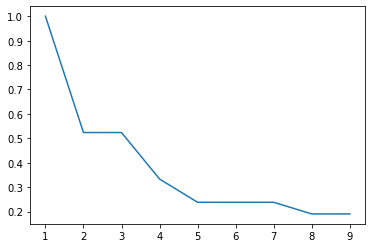

In [488]:
plt.plot(range(1,10),acc)

# 43) location_HSR Layout

In [489]:
df43 = df[df['location_HSR Layout']==1]

In [490]:
df43 = df43[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [491]:
df43

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
2454     2  1.000000   6800          1372.0    2     4956.268222   
2455     3  2.000000   7500          1475.0    3     5084.745763   
2456     2  1.000000   5500          1467.0    2     3749.147921   
2457     2  2.000000   4600          1140.0    2     4035.087719   
2458     2  1.000000   6100          1372.0    2     4446.064140   
2459     3  2.000000   9500          1750.0    3     5428.571429   
2460     2  2.000000   4400          1027.0    2     4284.323272   
2461     3  2.000000  11000          1650.0    3     6666.666667   
2462     2  2.000000   4600          1140.0    2     4035.087719   
2463     2  1.000000   6100          1372.0    2     4446.064140   
2464     2  2.000000   4600          1140.0    2     4035.087719   
2465     2  2.000000   6000          1185.0    2     5063.291139   
2466     2  1.000000   6800          1127.0    2     6033.717835   
2467     2  2.000000  11500          1600.0    3     7187.500000   
2468     2  2.000000   4800          1145.0    2     4192.139738   
2469     2  2.000000   5600          1009.0    2     5550.049554   
2470     2  2.000000   9800          1300.0    2     7538.461538   
2471     2  2.000000   4600          1140.0    2     4035.087719   
2472     2  1.000000   6900          1126.0    2     6127.886323   
2473     2  2.000000   4600          1140.0    2     4035.087719   
2474     2  2.000000   4600          1145.0    2     4017.467249   
2475     2  2.000000   6500          1142.0    2     5691.768827   
2476     2  2.000000   4600          1145.0    2     4017.467249   
2477     3  3.000000   9500          1844.0    3     5151.843818   
2478     2  2.000000   7200          1203.0    2     5985.037406   
2479     2  2.000000   4600          1140.0    2     4035.087719   
2480     5  1.584376  24500          4200.0    5     5833.333333   
2481     2  2.000000   4600          1140.0    2     4035.087719   
2482     2  2.000000   4600          1145.0    2     4017.467249   
2483     2  2.000000   5600          1009.0    2     5550.049554   
2484     2  2.000000   4600          1145.0    2     4017.467249   
2485     2  2.000000   4400          1100.0    2     4000.000000   
2486     2  2.000000   6000          1203.0    2     4987.531172   
2487     2  1.000000   7000          1120.0    2     6250.000000   
2488     2  2.000000   4600          1140.0    2     4035.087719   
2489     2  1.584376   7000          1289.0    2     5430.566330   
2490     3  1.000000   8900          1844.0    3     4826.464208   
2491     2  2.000000   6000          1203.0    2     4987.531172   
2492     2  2.000000   4600          1140.0    2     4035.087719   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
2454                              1                        0   
2455                              1                        0   
2456                              0                        1   
2457                              1                        0   
2458                              1                        0   
2459                              1                        0   
2460                              1                        0   
2461                              1                        0   
2462                              1                        0   
2463                              1                        0   
2464                              1                        0   
2465                              1                        0   
2466                              1                        0   
2467                              1                        0   
2468                              1                        0   
2469                              1                        0   
2470                              1                        0   
2471                              1                        0   
2472                              0                        1   
2473 

In [492]:
df43.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.036683  0.874102        0.933375   
balcony                        0.036683  1.000000 -0.088664       -0.089760   
price                          0.874102 -0.088664  1.000000        0.937615   
total_sqft_int                 0.933375 -0.089760  0.937615        1.000000   
bhk                            0.961700  0.055908  0.916782        0.936012   
price_per_sqft                 0.246801 -0.108160  0.572604        0.257856   
area_typeSuper built-up  Area -0.185645  0.300825 -0.287775       -0.278396   
area_typeBuilt-up  Area        0.185645 -0.300825  0.287775        0.278396   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move          NaN       NaN       NaN             NaN   

                                    bhk  price_per_sqft  \
bath                           0.961700        0.246801   
balcony                        0.055908       -0.108160   
price                          0.916782        0.572604   
total_sqft_int                 0.936012        0.257856   
bhk                            1.000000        0.344518   
price_per_sqft                 0.344518        1.000000   
area_typeSuper built-up  Area -0.160714       -0.171790   
area_typeBuilt-up  Area        0.160714        0.171790   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move          NaN             NaN   

                               area_typeSuper built-up  Area  \
bath                                               -0.185645   
balcony                                             0.300825   
price                                              -0.287775   
total_sqft_int                                     -0.278396   
bhk                                                -0.160714   
price_per_sqft                                     -0.171790   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                               NaN   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.185645                  NaN   
balcony                                      -0.300825                  NaN   
price                                         0.287775                  NaN   
total_sqft_int                                0.278396                  NaN   
bhk                                           0.160714                  NaN   
price_per_sqft                                0.171790                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                         NaN                  NaN   

                               availability_Ready To Move  
bath                                                  NaN  
balcony                                               NaN  
price                                                 NaN  
total_sqft_int                                        NaN  
bhk                                                   NaN  
price_per_sqft                                        NaN  
area_typeSuper built-up  Area                         NaN  
area_typeBuilt-up  Area                               NaN  
area_typePlot  Area                                   NaN  
availability_Ready To Move                            NaN

In [493]:
x = df43[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df43[['price']]

In [494]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.7435897435897436]
k= 3 [1.0, 0.7435897435897436, 0.6410256410256411]
k= 4 [1.0, 0.7435897435897436, 0.6410256410256411, 0.5897435897435898]
k= 5 [1.0, 0.7435897435897436, 0.6410256410256411, 0.5897435897435898, 0.5641025641025641]
k= 6 [1.0, 0.7435897435897436, 0.6410256410256411, 0.5897435897435898, 0.5641025641025641, 0.5128205128205128]
k= 7 [1.0, 0.7435897435897436, 0.6410256410256411, 0.5897435897435898, 0.5641025641025641, 0.5128205128205128, 0.5128205128205128]
k= 8 [1.0, 0.7435897435897436, 0.6410256410256411, 0.5897435897435898, 0.5641025641025641, 0.5128205128205128, 0.5128205128205128, 0.48717948717948717]
k= 9 [1.0, 0.7435897435897436, 0.6410256410256411, 0.5897435897435898, 0.5641025641025641, 0.5128205128205128, 0.5128205128205128, 0.48717948717948717, 0.46153846153846156]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [495]:
max(acc)

1.0

In [496]:
k = acc.index(max(acc))+1
k

1

In [497]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


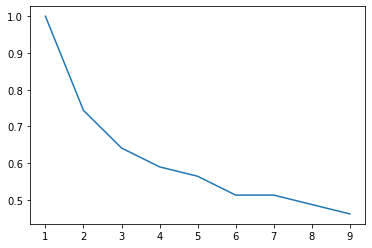

In [498]:
plt.plot(range(1,10),acc)

# 44) location_Hulimavu

In [499]:
df44 = df[df['location_Hulimavu']==1]

In [500]:
df44 = df44[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [501]:
df44

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
3189     2  2.000000   5000          1125.0    2     4444.444444   
3190     2  3.000000   5100          1242.0    2     4106.280193   
3191     3  2.000000  10000          1823.0    3     5485.463522   
3192     2  3.000000   3600          1300.0    2     2769.230769   
3193     2  2.000000   4320          1080.0    2     4000.000000   
3194     2  2.000000   7150          1100.0    2     6500.000000   
3195     1  2.000000   5000           688.0    1     7267.441860   
3196     2  2.000000   7300          1255.0    2     5816.733068   
3197     2  1.000000   4800          1058.0    2     4536.862004   
3198     2  2.000000   8000          1375.0    2     5818.181818   
3199     2  1.000000   6900          1248.0    2     5528.846154   
3200     3  1.000000  13500          1818.0    3     7425.742574   
3201     2  2.000000   5500          1225.0    2     4489.795918   
3202     2  2.000000   7400          1255.0    2     5896.414343   
3203     2  1.584376   4500          1175.0    2     3829.787234   
3204     2  2.000000   6900          1255.0    2     5498.007968   
3205     2  3.000000   6600          1255.0    2     5258.964143   
3206     2  1.000000   6500          1127.0    2     5767.524401   
3207     2  1.000000   5000          1200.0    2     4166.666667   
3208     2  0.000000   7500          1200.0    2     6250.000000   
3209     2  2.000000   9000          1430.0    3     6293.706294   
3210     1  1.000000   3950           850.0    2     4647.058824   
3211     2  1.000000   4500          1000.0    2     4500.000000   
3212     5  3.000000  31800          3560.0    4     8932.584270   
3213     2  2.000000   3800          1011.0    2     3758.654797   
3214     2  2.000000   7600          1276.0    2     5956.112853   
3215     2  0.000000   9000          1500.0    2     6000.000000   
3216     2  0.000000   6048          1315.0    2     4599.239544   
3217     2  1.000000   7600          1021.0    2     7443.682664   
3218     1  1.000000   2900           581.0    1     4991.394148   
3219     2  3.000000   4500           935.0    2     4812.834225   
3220     2  2.000000  12500          1050.0    2    11904.761900   
3221     2  1.000000   8200          1260.0    3     6507.936508   
3222     1  1.000000   2000           450.0    1     4444.444444   
3223     2  1.000000   8450          1231.0    2     6864.337937   
3224     2  1.000000  15000          1916.0    3     7828.810021   
3225     2  2.000000   4460          1115.0    2     4000.000000   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
3189                              1                        0   
3190                              1                        0   
3191                              0                        1   
3192                              1                        0   
3193                              1                        0   
3194                              1                        0   
3195                              1                        0   
3196                              1                        0   
3197                              1                        0   
3198                              1                        0   
3199                              1                        0   
3200                              1                        0   
3201                              1                        0   
3202                              1                        0   
3203                              0                        1   
3204                              1                        0   
3205                              1                        0   
3206                              1                        0   
3207                              1                        0   
3208                              0                        0   
3209                              1                        0   
3210         

In [502]:
df44.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.281075  0.842029        0.926848   
balcony                        0.281075  1.000000  0.143077        0.210536   
price                          0.842029  0.143077  1.000000        0.918208   
total_sqft_int                 0.926848  0.210536  0.918208        1.000000   
bhk                            0.827615  0.151801  0.784493        0.867857   
price_per_sqft                 0.323839 -0.057442  0.681192        0.374630   
area_typeSuper built-up  Area  0.020523  0.312422  0.020107        0.080629   
area_typeBuilt-up  Area       -0.016794 -0.045374 -0.051964       -0.124733   
area_typePlot  Area           -0.010156 -0.472532  0.043736        0.048925   
availability_Ready To Move    -0.454327 -0.142060 -0.607698       -0.606129   

                                    bhk  price_per_sqft  \
bath                           0.827615        0.323839   
balcony                        0.151801       -0.057442   
price                          0.784493        0.681192   
total_sqft_int                 0.867857        0.374630   
bhk                            1.000000        0.352582   
price_per_sqft                 0.352582        1.000000   
area_typeSuper built-up  Area  0.093396       -0.123912   
area_typeBuilt-up  Area       -0.076427        0.095170   
area_typePlot  Area           -0.046219        0.070739   
availability_Ready To Move    -0.473820       -0.258451   

                               area_typeSuper built-up  Area  \
bath                                                0.020523   
balcony                                             0.312422   
price                                               0.020107   
total_sqft_int                                      0.080629   
bhk                                                 0.093396   
price_per_sqft                                     -0.123912   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.818317   
area_typePlot  Area                                -0.494872   
availability_Ready To Move                         -0.143486   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.016794            -0.010156   
balcony                                      -0.045374            -0.472532   
price                                        -0.051964             0.043736   
total_sqft_int                               -0.124733             0.048925   
bhk                                          -0.076427            -0.046219   
price_per_sqft                                0.095170             0.070739   
area_typeSuper built-up  Area                -0.818317            -0.494872   
area_typeBuilt-up  Area                       1.000000            -0.094491   
area_typePlot  Area                          -0.094491             1.000000   
availability_Ready To Move                    0.117417             0.071007   

                               availability_Ready To Move  
bath                                            -0.454327  
balcony                                         -0.142060  
price                                           -0.607698  
total_sqft_int                                  -0.606129  
bhk                                             -0.473820  
price_per_sqft                                  -0.258451  
area_typeSuper built-up  Area                   -0.143486  
area_typeBuilt-up  Area                          0.117417  
area_typePlot  Area                              0.071007  
availability_Ready To Move                       1.000000

In [503]:
x = df44[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df44[['price']]

In [504]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5405405405405406]
k= 3 [1.0, 0.5405405405405406, 0.3783783783783784]
k= 4 [1.0, 0.5405405405405406, 0.3783783783783784, 0.2972972972972973]
k= 5 [1.0, 0.5405405405405406, 0.3783783783783784, 0.2972972972972973, 0.32432432432432434]
k= 6 [1.0, 0.5405405405405406, 0.3783783783783784, 0.2972972972972973, 0.32432432432432434, 0.35135135135135137]
k= 7 [1.0, 0.5405405405405406, 0.3783783783783784, 0.2972972972972973, 0.32432432432432434, 0.35135135135135137, 0.2972972972972973]
k= 8 [1.0, 0.5405405405405406, 0.3783783783783784, 0.2972972972972973, 0.32432432432432434, 0.35135135135135137, 0.2972972972972973, 0.21621621621621623]
k= 9 [1.0, 0.5405405405405406, 0.3783783783783784, 0.2972972972972973, 0.32432432432432434, 0.35135135135135137, 0.2972972972972973, 0.21621621621621623, 0.21621621621621623]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [505]:
max(acc)

1.0

In [506]:
k = acc.index(max(acc))+1
k

1

In [507]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


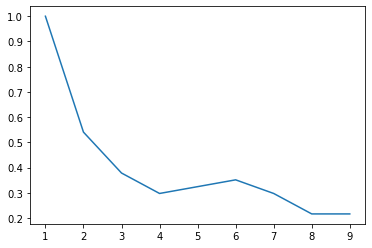

In [508]:
plt.plot(range(1,10),acc)

# 45) location_Indira Nagar

In [509]:
df45 = df[df['location_Indira Nagar']==1]

In [510]:
df45 = df45[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [511]:
df45

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
3271     2  2.000000   9300          1200.0    2     7750.000000   
3272     2  2.000000  10500          1128.0    2     9308.510638   
3273     3  1.000000  33000          2800.0    3    11785.714290   
3274     3  2.000000  20000          1650.0    3    12121.212120   
3275     2  1.000000  10200          1210.0    2     8429.752066   
3276     2  2.000000  10500          1224.0    2     8578.431373   
3277     3  2.000000  22500          2070.0    3    10869.565220   
3278     1  0.000000   7000           500.0    1    14000.000000   
3279     2  2.000000  16800          1400.0    2    12000.000000   
3280     4  2.000000  52500          2400.0    4    21875.000000   
3281     2  2.000000  10000          1145.0    2     8733.624454   
3282     2  2.000000  17000          1470.0    2    11564.625850   
3283     3  1.584376  32400          2700.0    3    12000.000000   
3284     1  2.000000   5700           850.0    1     6705.882353   
3285     8  1.000000  60000          3250.0    8    18461.538460   
3286     4  1.584376  31200          2601.0    3    11995.386390   
3287     2  2.000000  10000          1260.0    2     7936.507937   
3288     3  2.000000  19100          1740.0    3    10977.011490   
3289     3  3.000000  22000          1650.0    3    13333.333330   
3290     3  1.000000  27500          1440.0    3    19097.222220   
3291     2  2.000000  17100          1475.0    2    11593.220340   
3292     4  1.584376  44000          3200.0    4    13750.000000   
3293     4  1.000000  70000          4000.0    4    17500.000000   
3294     1  2.000000   6000           850.0    1     7058.823529   
3295     4  2.000000  40500          2400.0    4    16875.000000   
3296     5  2.000000  35000          1800.0    5    19444.444440   
3297     3  2.000000  20000          1650.0    3    12121.212120   
3298     4  3.000000  36500          2800.0    4    13035.714290   
3299     2  3.000000  12000          1260.0    2     9523.809524   
3300     2  1.000000  13000          1149.0    2    11314.186250   
3301     6  2.000000  47500          2400.0    6    19791.666670   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
3271                              1                        0   
3272                              1                        0   
3273                              1                        0   
3274                              1                        0   
3275                              0                        1   
3276                              0                        1   
3277                              1                        0   
3278                              0                        1   
3279                              1                        0   
3280                              0                        0   
3281                              1                        0   
3282                              1                        0   
3283                              1                        0   
3284                              0                        1   
3285                              0                        0   
3286                              1                        0   
3287                              1                        0   
3288                              0                        1   
3289                              0                        1   
3290                              0                        0   
3291                              1                        0   
3292                              1                        0   
3293                              0                        1   
3294                              0                        1   
3295                              0                        0   
3296                              0                        0   
3297                              1                        0   
3298                              1  

In [512]:
df45.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000 -0.036044  0.845472        0.754933   
balcony                       -0.036044  1.000000 -0.145521       -0.079022   
price                          0.845472 -0.145521  1.000000        0.922190   
total_sqft_int                 0.754933 -0.079022  0.922190        1.000000   
bhk                            0.992749 -0.028808  0.843932        0.740150   
price_per_sqft                 0.743813 -0.203234  0.808040        0.561008   
area_typeSuper built-up  Area -0.240428  0.224585 -0.259407       -0.009585   
area_typeBuilt-up  Area       -0.338161 -0.162703 -0.213149       -0.235912   
area_typePlot  Area            0.677380 -0.102692  0.562829        0.273359   
availability_Ready To Move    -0.128226  0.062162 -0.070530       -0.173604   

                                    bhk  price_per_sqft  \
bath                           0.992749        0.743813   
balcony                       -0.028808       -0.203234   
price                          0.843932        0.808040   
total_sqft_int                 0.740150        0.561008   
bhk                            1.000000        0.753126   
price_per_sqft                 0.753126        1.000000   
area_typeSuper built-up  Area -0.262503       -0.423671   
area_typeBuilt-up  Area       -0.327913       -0.256285   
area_typePlot  Area            0.693837        0.817517   
availability_Ready To Move    -0.008081        0.025957   

                               area_typeSuper built-up  Area  \
bath                                               -0.240428   
balcony                                             0.224585   
price                                              -0.259407   
total_sqft_int                                     -0.009585   
bhk                                                -0.262503   
price_per_sqft                                     -0.423671   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.649892   
area_typePlot  Area                                -0.539841   
availability_Ready To Move                         -0.165683   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.338161             0.677380   
balcony                                      -0.162703            -0.102692   
price                                        -0.213149             0.562829   
total_sqft_int                               -0.235912             0.273359   
bhk                                          -0.327913             0.693837   
price_per_sqft                               -0.256285             0.817517   
area_typeSuper built-up  Area                -0.649892            -0.539841   
area_typeBuilt-up  Area                       1.000000            -0.288926   
area_typePlot  Area                          -0.288926             1.000000   
availability_Ready To Move                    0.107676             0.089443   

                               availability_Ready To Move  
bath                                            -0.128226  
balcony                                          0.062162  
price                                           -0.070530  
total_sqft_int                                  -0.173604  
bhk                                             -0.008081  
price_per_sqft                                   0.025957  
area_typeSuper built-up  Area                   -0.165683  
area_typeBuilt-up  Area                          0.107676  
area_typePlot  Area                              0.089443  
availability_Ready To Move                       1.000000

In [513]:
x = df45[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df45[['price']]

In [514]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5806451612903226]
k= 3 [1.0, 0.5806451612903226, 0.3225806451612903]
k= 4 [1.0, 0.5806451612903226, 0.3225806451612903, 0.22580645161290322]
k= 5 [1.0, 0.5806451612903226, 0.3225806451612903, 0.22580645161290322, 0.22580645161290322]
k= 6 [1.0, 0.5806451612903226, 0.3225806451612903, 0.22580645161290322, 0.22580645161290322, 0.22580645161290322]
k= 7 [1.0, 0.5806451612903226, 0.3225806451612903, 0.22580645161290322, 0.22580645161290322, 0.22580645161290322, 0.16129032258064516]
k= 8 [1.0, 0.5806451612903226, 0.3225806451612903, 0.22580645161290322, 0.22580645161290322, 0.22580645161290322, 0.16129032258064516, 0.12903225806451613]
k= 9 [1.0, 0.5806451612903226, 0.3225806451612903, 0.22580645161290322, 0.22580645161290322, 0.22580645161290322, 0.16129032258064516, 0.12903225806451613, 0.12903225806451613]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [515]:
max(acc)

1.0

In [516]:
k = acc.index(max(acc))+1
k

1

In [517]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


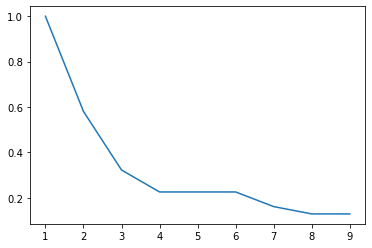

In [518]:
plt.plot(range(1,10),acc)

# 46) location_Jakkur

In [519]:
df46 = df[df['location_Jakkur']==1]

In [520]:
df46 = df46[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [521]:
df46

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
3351     2      3.0   7500         1417.00    2     5292.872265   
3352     2      2.0  12500         1590.00    3     7861.635220   
3353     2      1.0   7700         1279.00    2     6020.328382   
3354     3      2.0  10700         1710.00    3     6257.309942   
3355     2      1.0   8651         1396.00    3     6196.991404   
3356     3      1.0  12400         1865.00    3     6648.793566   
3357     2      1.0   5335         1100.00    2     4850.000000   
3358     3      2.0  13900         1760.00    3     7897.727273   
3359     2      1.0  10000         1290.00    2     7751.937984   
3360     2      1.0  10000         1452.19    2     6886.151261   
3361     3      1.0  12000         1798.00    3     6674.082314   
3362     2      1.0   8500         1300.00    2     6538.461538   
3363     4      0.0  26050         3181.00    4     8189.248664   
3364     3      2.0  13100         1950.00    3     6717.948718   
3365     2      1.0   7600         1230.00    2     6178.861789   
3366     2      1.0   8000         1290.00    2     6201.550388   
3367     3      2.0  11000         1760.00    3     6250.000000   
3368     2      1.0   9800         1483.00    2     6608.226568   
3369     3      2.0  11100         1650.00    3     6727.272727   
3370     4      3.0  16000         2423.00    3     6603.384234   
3371     3      2.0  13600         2197.00    3     6190.259445   
3372     2      2.0   6500         1125.00    2     5777.777778   
3373     2      1.0   7900         1230.00    2     6422.764228   
3374     2      1.0   7900         1202.00    2     6572.379368   
3375     3      1.0  12300         1858.00    3     6620.021529   
3376     3      1.0  11000         1798.00    3     6117.908788   
3377     3      2.0  13000         1785.00    3     7282.913165   
3378     2      2.0   6000         1080.00    2     5555.555556   
3379     2      0.0   7119         1260.00    2     5650.396825   
3380     3      1.0  11900         1816.00    3     6552.863436   
3381     2      3.0   8000         1424.00    2     5617.977528   
3382     2      1.0   8500         1290.00    2     6589.147287   
3383     2      2.0   8000         1300.00    2     6153.846154   
3384     2      1.0   8004         1290.00    2     6204.651163   
3385     2      1.0   7200         1282.00    2     5616.224649   
3386     3      2.0  10400         1660.00    3     6265.060241   
3387     2      1.0   7500         1291.00    2     5809.450039   
3388     2      1.0   8500         1473.00    2     5770.536320   
3389     3      2.0  10400         1660.00    3     6265.060241   
3390     3      2.0  13100         1950.00    3     6717.948718   
3391     2      1.0   8500         1432.00    2     5935.754190   
3392     3      2.0  11000         1710.00    3     6432.748538   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
3351                              1                        0   
3352                              0                        1   
3353                              1                        0   
3354                              1                        0   
3355                              1                        0   
3356                              1                        0   
3357                              1                        0   
3358                              1                        0   
3359                              1                        0   
3360                              1                        0   
3361                              1                        0   
3362                              1                        0   
3363                              1                        0   
3364                              1                        0   
3365                              1                        0   
3366                              1                        0   
3367                              1 

In [522]:
df46.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.229967  0.832808        0.897708   
balcony                        0.229967  1.000000  0.004340        0.095730   
price                          0.832808  0.004340  1.000000        0.962589   
total_sqft_int                 0.897708  0.095730  0.962589        1.000000   
bhk                            0.892070  0.156538  0.832667        0.853845   
price_per_sqft                 0.441798 -0.096623  0.729376        0.541851   
area_typeSuper built-up  Area  0.067488 -0.217904 -0.077878        0.009878   
area_typeBuilt-up  Area       -0.067488  0.217904  0.077878       -0.009878   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move    -0.362927  0.216941 -0.374267       -0.420118   

                                    bhk  price_per_sqft  \
bath                           0.892070        0.441798   
balcony                        0.156538       -0.096623   
price                          0.832667        0.729376   
total_sqft_int                 0.853845        0.541851   
bhk                            1.000000        0.544123   
price_per_sqft                 0.544123        1.000000   
area_typeSuper built-up  Area -0.084732       -0.290388   
area_typeBuilt-up  Area        0.084732        0.290388   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move    -0.352767       -0.165649   

                               area_typeSuper built-up  Area  \
bath                                                0.067488   
balcony                                            -0.217904   
price                                              -0.077878   
total_sqft_int                                      0.009878   
bhk                                                -0.084732   
price_per_sqft                                     -0.290388   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.240192   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.067488                  NaN   
balcony                                       0.217904                  NaN   
price                                         0.077878                  NaN   
total_sqft_int                               -0.009878                  NaN   
bhk                                           0.084732                  NaN   
price_per_sqft                                0.290388                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.240192                  NaN   

                               availability_Ready To Move  
bath                                            -0.362927  
balcony                                          0.216941  
price                                           -0.374267  
total_sqft_int                                  -0.420118  
bhk                                             -0.352767  
price_per_sqft                                  -0.165649  
area_typeSuper built-up  Area                   -0.240192  
area_typeBuilt-up  Area                          0.240192  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [523]:
x = df46[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df46[['price']]

In [524]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6666666666666666]
k= 3 [1.0, 0.6666666666666666, 0.47619047619047616]
k= 4 [1.0, 0.6666666666666666, 0.47619047619047616, 0.40476190476190477]
k= 5 [1.0, 0.6666666666666666, 0.47619047619047616, 0.40476190476190477, 0.30952380952380953]
k= 6 [1.0, 0.6666666666666666, 0.47619047619047616, 0.40476190476190477, 0.30952380952380953, 0.30952380952380953]
k= 7 [1.0, 0.6666666666666666, 0.47619047619047616, 0.40476190476190477, 0.30952380952380953, 0.30952380952380953, 0.2857142857142857]
k= 8 [1.0, 0.6666666666666666, 0.47619047619047616, 0.40476190476190477, 0.30952380952380953, 0.30952380952380953, 0.2857142857142857, 0.2619047619047619]
k= 9 [1.0, 0.6666666666666666, 0.47619047619047616, 0.40476190476190477, 0.30952380952380953, 0.30952380952380953, 0.2857142857142857, 0.2619047619047619, 0.23809523809523808]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [525]:
max(acc)

1.0

In [526]:
k = acc.index(max(acc))+1
k

1

In [527]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


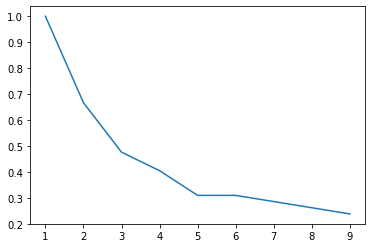

In [528]:
plt.plot(range(1,10),acc)

# 47) location_Jalahalli

In [529]:
df47 = df[df['location_Jalahalli']==1]

In [530]:
df47 = df47[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [531]:
df47

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
3402     3      2.0  16000          2250.0    3     7111.111111   
3403     2      2.0  12500          1694.0    2     7378.984652   
3404     1      1.0   8000          1400.0    2     5714.285714   
3405     2      2.0   7677          1045.0    2     7346.411483   
3406     3      2.0  15500          2113.0    3     7335.541884   
3407     4      3.0  13500          1932.0    3     6987.577640   
3408     2      1.0   5800          1045.0    2     5550.239234   
3409     2      1.0   5200          1020.0    2     5098.039216   
3410     4      2.0  16500          2384.0    3     6921.140940   
3411     2      1.0   4950           790.0    2     6265.822785   
3412     3      2.0  11800          1569.0    3     7520.713830   
3413     1      0.0   3700           600.0    1     6166.666667   
3414     1      1.0   4600           615.0    1     7479.674797   
3415     2      2.0   5500           905.0    2     6077.348066   
3416     2      0.0   7000          1000.0    2     7000.000000   
3417     1      1.0   4600           615.0    1     7479.674797   
3418     2      3.0  10200          1470.0    3     6938.775510   
3419     2      2.0   8800          1244.0    2     7073.954984   
3420     2      1.0   9849          1407.0    2     7000.000000   
3421     2      1.0   6600          1200.0    1     5500.000000   
3422     2      1.0   7677          1045.0    2     7346.411483   
3423     3      2.0  16000          2086.0    3     7670.182167   
3424     2      2.0   6800          1313.0    2     5178.979436   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
3402                              1                        0   
3403                              1                        0   
3404                              0                        1   
3405                              1                        0   
3406                              1                        0   
3407                              1                        0   
3408                              1                        0   
3409                              1                        0   
3410                              1                        0   
3411                              1                        0   
3412                              1                        0   
3413                              0                        0   
3414                              1                        0   
3415                              1                        0   
3416                              0                        1   
3417                              1                        0   
3418                              1                        0   
3419                              1                        0   
3420                              0                        1   
3421                              1                        0   
3422                              1                        0   
3423                              1                        0   
3424                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
3402                    0                           1  
3403                    0                           1  
3404                    0                           1  
3405                    0                           1  
3406                    0                           1  
3407                    0                           1  
3408                    0                           0  
3409                    0                           1  
3410                    0                           1  
3411                    0                           1  
3412                    0                           1  
3413                    1                           1  
3414                    0                           1  
3415                    0                           1  
3416                

In [532]:
df47.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.614666  0.816240        0.827209   
balcony                        0.614666  1.000000  0.622401        0.623706   
price                          0.816240  0.622401  1.000000        0.973654   
total_sqft_int                 0.827209  0.623706  0.973654        1.000000   
bhk                            0.822339  0.698656  0.833173        0.832418   
price_per_sqft                 0.253995  0.273092  0.489334        0.285164   
area_typeSuper built-up  Area  0.379065  0.606565  0.219409        0.207148   
area_typeBuilt-up  Area       -0.240836 -0.428482 -0.075765       -0.050335   
area_typePlot  Area           -0.306818 -0.419772 -0.282681       -0.301889   
availability_Ready To Move     0.097823  0.012906  0.234940        0.120050   

                                    bhk  price_per_sqft  \
bath                           0.822339        0.253995   
balcony                        0.698656        0.273092   
price                          0.833173        0.489334   
total_sqft_int                 0.832418        0.285164   
bhk                            1.000000        0.300757   
price_per_sqft                 0.300757        1.000000   
area_typeSuper built-up  Area  0.257020        0.132982   
area_typeBuilt-up  Area       -0.074383       -0.063199   
area_typePlot  Area           -0.354868       -0.142796   
availability_Ready To Move     0.257020        0.503066   

                               area_typeSuper built-up  Area  \
bath                                                0.379065   
balcony                                             0.606565   
price                                               0.219409   
total_sqft_int                                      0.207148   
bhk                                                 0.257020   
price_per_sqft                                      0.132982   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.844097   
area_typePlot  Area                                -0.464660   
availability_Ready To Move                         -0.210526   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.240836            -0.306818   
balcony                                      -0.428482            -0.419772   
price                                        -0.075765            -0.282681   
total_sqft_int                               -0.050335            -0.301889   
bhk                                          -0.074383            -0.354868   
price_per_sqft                               -0.063199            -0.142796   
area_typeSuper built-up  Area                -0.844097            -0.464660   
area_typeBuilt-up  Area                       1.000000            -0.082572   
area_typePlot  Area                          -0.082572             1.000000   
availability_Ready To Move                    0.177705             0.097823   

                               availability_Ready To Move  
bath                                             0.097823  
balcony                                          0.012906  
price                                            0.234940  
total_sqft_int                                   0.120050  
bhk                                              0.257020  
price_per_sqft                                   0.503066  
area_typeSuper built-up  Area                   -0.210526  
area_typeBuilt-up  Area                          0.177705  
area_typePlot  Area                              0.097823  
availability_Ready To Move                       1.000000

In [533]:
x = df47[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df47[['price']]

In [534]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6086956521739131]
k= 3 [1.0, 0.6086956521739131, 0.43478260869565216]
k= 4 [1.0, 0.6086956521739131, 0.43478260869565216, 0.30434782608695654]
k= 5 [1.0, 0.6086956521739131, 0.43478260869565216, 0.30434782608695654, 0.34782608695652173]
k= 6 [1.0, 0.6086956521739131, 0.43478260869565216, 0.30434782608695654, 0.34782608695652173, 0.2608695652173913]
k= 7 [1.0, 0.6086956521739131, 0.43478260869565216, 0.30434782608695654, 0.34782608695652173, 0.2608695652173913, 0.21739130434782608]
k= 8 [1.0, 0.6086956521739131, 0.43478260869565216, 0.30434782608695654, 0.34782608695652173, 0.2608695652173913, 0.21739130434782608, 0.21739130434782608]
k= 9 [1.0, 0.6086956521739131, 0.43478260869565216, 0.30434782608695654, 0.34782608695652173, 0.2608695652173913, 0.21739130434782608, 0.21739130434782608, 0.21739130434782608]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [535]:
max(acc)

1.0

In [536]:
k = acc.index(max(acc))+1
k

1

In [537]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


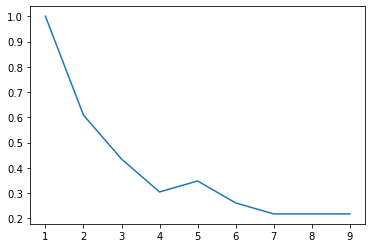

In [538]:
plt.plot(range(1,10),acc)

# 48) location_Jigani

In [539]:
df48 = df[df['location_Jigani']==1]

In [540]:
df48 = df48[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [541]:
df48

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
3448     2      2.0   5200           918.0    2     5664.488017   
3449     2      2.0   4800           918.0    2     5228.758170   
3450     2      2.0   4700           914.0    2     5142.231947   
3451     2      2.0   5500           927.0    2     5933.117584   
3452     2      2.0   4600           920.0    2     5000.000000   
3453     4      1.0  13000          2400.0    3     5416.666667   
3454     2      2.0   4500           918.0    2     4901.960784   
3455     2      2.0   6320           918.0    2     6884.531590   
3456     2      2.0   4300           933.0    2     4608.788853   
3457     2      2.0   5500           918.0    2     5991.285403   
3458     3      2.0  14900          2400.0    3     6208.333333   
3459     2      1.0   4400           937.0    2     4695.837780   
3460     2      1.0   5000           923.0    2     5417.118093   
3461     3      3.0   7200          1221.0    3     5896.805897   
3462     2      1.0   4900           918.0    2     5337.690632   
3463     2      2.0   4900           914.0    2     5361.050328   
3464     2      2.0   5000           918.0    2     5446.623094   
3465     3      2.0   6500          1200.0    3     5416.666667   
3466     2      2.0   5500           914.0    2     6017.505470   
3467     3      3.0   7500          1221.0    3     6142.506143   
3468     3      3.0   7000          1252.0    3     5591.054313   
3469     2      2.0   3900           939.0    2     4153.354633   
3470     3      3.0   7000          1221.0    3     5733.005733   
3471     2      2.0   4800           943.0    2     5090.137858   
3472     2      2.0   5600           918.0    2     6100.217865   
3473     2      2.0   4950           943.0    2     5249.204666   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
3448                              1                        0   
3449                              1                        0   
3450                              0                        1   
3451                              1                        0   
3452                              1                        0   
3453                              0                        0   
3454                              1                        0   
3455                              1                        0   
3456                              1                        0   
3457                              1                        0   
3458                              0                        0   
3459                              0                        1   
3460                              1                        0   
3461                              1                        0   
3462                              0                        1   
3463                              1                        0   
3464                              1                        0   
3465                              0                        1   
3466                              1                        0   
3467                              1                        0   
3468                              1                        0   
3469                              1                        0   
3470                              1                        0   
3471                              0                        1   
3472                              1                        0   
3473                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
3448                    0                           1  
3449                    0                           1  
3450                    0                           1  
3451                    0                           1  
3452                    0                           1  
3453                    1                           1  
3454                    0                           1  
3455               

In [542]:
df48.corr()

bath       balcony     price  \
bath                           1.000000  2.575394e-01  0.796376   
balcony                        0.257539  1.000000e+00  0.039146   
price                          0.796376  3.914565e-02  1.000000   
total_sqft_int                 0.824745 -4.621323e-02  0.972542   
bhk                            0.941434  4.689614e-01  0.723970   
price_per_sqft                 0.241924  3.027975e-01  0.435657   
area_typeSuper built-up  Area -0.297295  4.689614e-01 -0.377794   
area_typeBuilt-up  Area       -0.097590 -3.518658e-01 -0.196091   
area_typePlot  Area            0.639209 -2.602082e-01  0.918891   
availability_Ready To Move    -0.257143  2.293905e-16 -0.713246   

                               total_sqft_int       bhk  price_per_sqft  \
bath                                 0.824745  0.941434        0.241924   
balcony                             -0.046213  0.468961        0.302798   
price                                0.972542  0.723970        0.435657   
total_sqft_int                       1.000000  0.714404        0.223947   
bhk                                  0.714404  1.000000        0.304162   
price_per_sqft                       0.223947  0.304162        1.000000   
area_typeSuper built-up  Area       -0.450052 -0.218045        0.165744   
area_typeBuilt-up  Area             -0.139047 -0.076159       -0.298125   
area_typePlot  Area                  0.954802  0.475595        0.165038   
availability_Ready To Move          -0.661506 -0.329502       -0.252848   

                               area_typeSuper built-up  Area  \
bath                                               -0.297295   
balcony                                             0.468961   
price                                              -0.377794   
total_sqft_int                                     -0.450052   
bhk                                                -0.218045   
price_per_sqft                                      0.165744   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.803902   
area_typePlot  Area                                -0.475595   
availability_Ready To Move                          0.329502   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.097590             0.639209   
balcony                                      -0.351866            -0.260208   
price                                        -0.196091             0.918891   
total_sqft_int                               -0.139047             0.954802   
bhk                                          -0.076159             0.475595   
price_per_sqft                               -0.298125             0.165038   
area_typeSuper built-up  Area                -0.803902            -0.475595   
area_typeBuilt-up  Area                       1.000000            -0.140859   
area_typePlot  Area                          -0.140859             1.000000   
availability_Ready To Move                    0.097590            -0.692820   

                               availability_Ready To Move  
bath                                        -2.571429e-01  
balcony                                      2.293905e-16  
price                                       -7.132462e-01  
total_sqft_int                              -6.615062e-01  
bhk                                         -3.295018e-01  
price_per_sqft                              -2.528483e-01  
area_typeSuper built-up  Area                3.295018e-01  
area_typeBuilt-up  Area                      9.759001e-02  
area_typePlot  Area                         -6.928203e-01  
availability_Ready To Move                   1.000000e+00

In [543]:
x = df48[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df48[['price']]

In [544]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6538461538461539]
k= 3 [1.0, 0.6538461538461539, 0.46153846153846156]
k= 4 [1.0, 0.6538461538461539, 0.46153846153846156, 0.38461538461538464]
k= 5 [1.0, 0.6538461538461539, 0.46153846153846156, 0.38461538461538464, 0.34615384615384615]
k= 6 [1.0, 0.6538461538461539, 0.46153846153846156, 0.38461538461538464, 0.34615384615384615, 0.38461538461538464]
k= 7 [1.0, 0.6538461538461539, 0.46153846153846156, 0.38461538461538464, 0.34615384615384615, 0.38461538461538464, 0.3076923076923077]
k= 8 [1.0, 0.6538461538461539, 0.46153846153846156, 0.38461538461538464, 0.34615384615384615, 0.38461538461538464, 0.3076923076923077, 0.19230769230769232]
k= 9 [1.0, 0.6538461538461539, 0.46153846153846156, 0.38461538461538464, 0.34615384615384615, 0.38461538461538464, 0.3076923076923077, 0.19230769230769232, 0.19230769230769232]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [545]:
max(acc)

1.0

In [546]:
k = acc.index(max(acc))+1
k

1

In [547]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


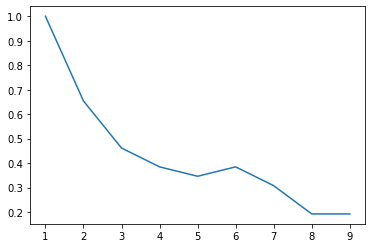

In [548]:
plt.plot(range(1,10),acc)

# 49) location_JP Nagar

In [549]:
df49 = df[df['location_JP Nagar']==1]

In [550]:
df49 = df49[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [551]:
df49

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
3311     3  3.000000  15000          1850.0    3     8108.108108   
3312     2  1.000000   3500          1000.0    2     3500.000000   
3313     2  2.000000   7000          1100.0    2     6363.636364   
3314     2  1.000000   4900           940.0    2     5212.765957   
3315     4  0.000000  31450          4624.5    4     6800.735215   
3316     2  2.000000   4500          1078.0    2     4174.397032   
3317     1  1.000000   4400          1050.0    1     4190.476190   
3318     2  0.000000   9386          1352.5    2     6940.110906   
3319     2  2.000000   6200          1200.0    2     5166.666667   
3320     2  1.000000   9087          1300.0    2     6990.000000   
3321     2  1.000000   8540          1315.0    3     6494.296578   
3322     3  2.000000  11200          1690.0    3     6627.218935   
3323     1  1.000000   5250           750.0    1     7000.000000   
3324     2  3.000000   7800          1200.0    2     6500.000000   
3325     2  1.584376  11000          1850.0    3     5945.945946   
3326     2  1.000000   4500          1100.0    2     4090.909091   
3327     2  1.000000   4788          1197.0    2     4000.000000   
3328     4  1.000000  16000          2700.0    7     5925.925926   
3329     2  1.000000   4500           820.0    2     5487.804878   
3330     3  1.000000  12300          1750.0    3     7028.571429   
3331     1  0.000000   3427           745.0    1     4600.000000   
3332     2  2.000000   9000          1150.0    2     7826.086957   
3333     3  1.000000  13800          1960.0    3     7040.816327   
3334     2  2.000000   6000          1250.0    2     4800.000000   
3335     2  2.000000   3997          1125.0    2     3553.777778   
3336     3  3.000000  19600          2400.0    3     8166.666667   
3337     2  1.000000   9165          1300.0    2     7050.000000   
3338     2  1.000000   5700          1107.0    2     5149.051491   
3339     2  2.000000   9300          1250.0    2     7440.000000   
3340     2  1.000000  10800          1500.0    3     7200.000000   
3341     2  1.000000   9900          1405.0    2     7046.263345   
3342     2  1.000000   7300          1157.0    2     6309.420916   
3343     2  1.000000   4400          1048.0    2     4198.473282   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
3311                              1                        0   
3312                              1                        0   
3313                              1                        0   
3314                              1                        0   
3315                              1                        0   
3316                              0                        1   
3317                              1                        0   
3318                              1                        0   
3319                              1                        0   
3320                              1                        0   
3321                              0                        1   
3322                              1                        0   
3323                              1                        0   
3324                              1                        0   
3325                              1                        0   
3326                              1                        0   
3327                              1                        0   
3328                              0                        1   
3329                              0                        1   
3330                              1                        0   
3331                              1                        0   
3332                              1                        0   
3333                              1                        0   
3334                              1                        0   
3335                              1                        0   
3336                         

In [552]:
df49.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.111712  0.812585        0.837649   
balcony                        0.111712  1.000000  0.007584       -0.083382   
price                          0.812585  0.007584  1.000000        0.958333   
total_sqft_int                 0.837649 -0.083382  0.958333        1.000000   
bhk                            0.859788  0.014189  0.656258        0.713540   
price_per_sqft                 0.361013  0.220050  0.607312        0.368318   
area_typeSuper built-up  Area -0.223152 -0.091880 -0.058462       -0.085137   
area_typeBuilt-up  Area        0.137169 -0.083515 -0.099582       -0.023889   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move    -0.267782  0.352355 -0.354271       -0.335331   

                                    bhk  price_per_sqft  \
bath                           0.859788        0.361013   
balcony                        0.014189        0.220050   
price                          0.656258        0.607312   
total_sqft_int                 0.713540        0.368318   
bhk                            1.000000        0.268287   
price_per_sqft                 0.268287        1.000000   
area_typeSuper built-up  Area -0.364281        0.078870   
area_typeBuilt-up  Area        0.340104       -0.222278   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move    -0.074231       -0.246281   

                               area_typeSuper built-up  Area  \
bath                                               -0.223152   
balcony                                            -0.091880   
price                                              -0.058462   
total_sqft_int                                     -0.085137   
bhk                                                -0.364281   
price_per_sqft                                      0.078870   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.896421   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.266667   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.137169                  NaN   
balcony                                      -0.083515                  NaN   
price                                        -0.099582                  NaN   
total_sqft_int                               -0.023889                  NaN   
bhk                                           0.340104                  NaN   
price_per_sqft                               -0.222278                  NaN   
area_typeSuper built-up  Area                -0.896421                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.239046                  NaN   

                               availability_Ready To Move  
bath                                            -0.267782  
balcony                                          0.352355  
price                                           -0.354271  
total_sqft_int                                  -0.335331  
bhk                                             -0.074231  
price_per_sqft                                  -0.246281  
area_typeSuper built-up  Area                   -0.266667  
area_typeBuilt-up  Area                          0.239046  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [553]:
x = df49[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df49[['price']]

In [554]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5454545454545454]
k= 3 [1.0, 0.5454545454545454, 0.30303030303030304]
k= 4 [1.0, 0.5454545454545454, 0.30303030303030304, 0.24242424242424243]
k= 5 [1.0, 0.5454545454545454, 0.30303030303030304, 0.24242424242424243, 0.21212121212121213]
k= 6 [1.0, 0.5454545454545454, 0.30303030303030304, 0.24242424242424243, 0.21212121212121213, 0.21212121212121213]
k= 7 [1.0, 0.5454545454545454, 0.30303030303030304, 0.24242424242424243, 0.21212121212121213, 0.21212121212121213, 0.18181818181818182]
k= 8 [1.0, 0.5454545454545454, 0.30303030303030304, 0.24242424242424243, 0.21212121212121213, 0.21212121212121213, 0.18181818181818182, 0.15151515151515152]
k= 9 [1.0, 0.5454545454545454, 0.30303030303030304, 0.24242424242424243, 0.21212121212121213, 0.21212121212121213, 0.18181818181818182, 0.15151515151515152, 0.09090909090909091]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [555]:
max(acc)

1.0

In [556]:
k = acc.index(max(acc))+1
k

1

In [557]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


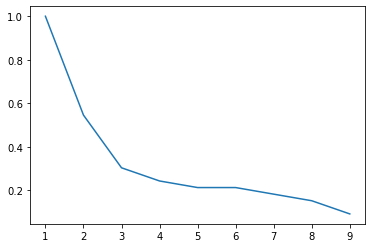

In [558]:
plt.plot(range(1,10),acc)

# 50) location_Kadugodi

In [559]:
df50 = df[df['location_Kadugodi']==1]

In [560]:
df50 = df50[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [561]:
df50

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
3582     3  3.000000   9145          1762.0    3     5190.124858   
3583     2  2.000000   5800          1198.0    2     4841.402337   
3584     4  3.000000  12700          1890.0    3     6719.576720   
3585     4  0.000000  21000          3750.0    4     5600.000000   
3586     3  3.000000  11000          1762.0    3     6242.905789   
3587     3  1.584376  10800          1900.0    3     5684.210526   
3588     2  3.000000   6820          1314.0    2     5190.258752   
3589     2  2.000000   8200          1645.0    3     4984.802432   
3590     2  1.000000   4500          1100.0    2     4090.909091   
3591     2  2.000000   7800          1314.0    2     5936.073059   
3592     3  3.000000  11200          1762.0    3     6356.413167   
3593     2  3.000000   8300          1314.0    2     6316.590563   
3594     1  0.000000   4070           925.0    1     4400.000000   
3595     2  2.000000   7800          1351.0    3     5773.501110   
3596     2  1.000000   5000          1010.0    2     4950.495050   
3597     4  3.000000  12500          1890.0    3     6613.756614   
3598     2  2.000000   6100          1152.0    2     5295.138889   
3599     2  2.000000   5600          1394.0    2     4017.216643   
3600     3  3.000000  11200          1762.0    3     6356.413167   
3601     4  3.000000  12500          1890.0    3     6613.756614   
3602     2  2.000000   4400          1088.0    2     4044.117647   
3603     2  1.000000  11000          1875.0    3     5866.666667   
3604     2  2.000000   4200          1150.0    2     3652.173913   
3605     3  3.000000  10900          1762.0    3     6186.152100   
3606     2  3.000000   8000          1314.0    2     6088.280061   
3607     2  3.000000   6000          1196.0    2     5016.722408   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
3582                              1                        0   
3583                              1                        0   
3584                              1                        0   
3585                              0                        0   
3586                              1                        0   
3587                              1                        0   
3588                              1                        0   
3589                              1                        0   
3590                              0                        1   
3591                              1                        0   
3592                              1                        0   
3593                              1                        0   
3594                              1                        0   
3595                              1                        0   
3596                              1                        0   
3597                              1                        0   
3598                              1                        0   
3599                              1                        0   
3600                              1                        0   
3601                              1                        0   
3602                              0                        1   
3603                              0                        0   
3604                              1                        0   
3605                              1                        0   
3606                              1                        0   
3607                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
3582                    0                           1  
3583                    0                           1  
3584                    0                           0  
3585                    1                           1  
3586                    0                           0  
3587                    0                           0  
3588                    0                       

In [562]:
df50.corr()

bath   balcony     price  \
bath                           1.000000e+00  0.327553  0.836337   
balcony                        3.275525e-01  1.000000  0.058011   
price                          8.363366e-01  0.058011  1.000000   
total_sqft_int                 7.492230e-01 -0.125980  0.952440   
bhk                            7.977240e-01  0.149581  0.873962   
price_per_sqft                 6.394997e-01  0.496751  0.687571   
area_typeSuper built-up  Area  3.714100e-18  0.540820 -0.173681   
area_typeBuilt-up  Area       -1.811858e-01 -0.210509 -0.331483   
area_typePlot  Area            1.811858e-01 -0.521765  0.566648   
availability_Ready To Move    -4.842393e-01 -0.621280 -0.398301   

                               total_sqft_int       bhk  price_per_sqft  \
bath                                 0.749223  0.797724        0.639500   
balcony                             -0.125980  0.149581        0.496751   
price                                0.952440  0.873962        0.687571   
total_sqft_int                       1.000000  0.849758        0.440134   
bhk                                  0.849758  1.000000        0.573965   
price_per_sqft                       0.440134  0.573965        1.000000   
area_typeSuper built-up  Area       -0.312875 -0.167745        0.271459   
area_typeBuilt-up  Area             -0.246965 -0.227128       -0.456060   
area_typePlot  Area                  0.670600  0.454257        0.088503   
availability_Ready To Move          -0.170603 -0.242810       -0.764752   

                               area_typeSuper built-up  Area  \
bath                                            3.714100e-18   
balcony                                         5.408201e-01   
price                                          -1.736808e-01   
total_sqft_int                                 -3.128753e-01   
bhk                                            -1.677454e-01   
price_per_sqft                                  2.714586e-01   
area_typeSuper built-up  Area                   1.000000e+00   
area_typeBuilt-up  Area                        -6.770032e-01   
area_typePlot  Area                            -6.770032e-01   
availability_Ready To Move                     -3.947710e-01   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.181186             0.181186   
balcony                                      -0.210509            -0.521765   
price                                        -0.331483             0.566648   
total_sqft_int                               -0.246965             0.670600   
bhk                                          -0.227128             0.454257   
price_per_sqft                               -0.456060             0.088503   
area_typeSuper built-up  Area                -0.677003            -0.677003   
area_typeBuilt-up  Area                       1.000000            -0.083333   
area_typePlot  Area                          -0.083333             1.000000   
availability_Ready To Move                    0.267261             0.267261   

                               availability_Ready To Move  
bath                                            -0.484239  
balcony                                         -0.621280  
price                                           -0.398301  
total_sqft_int                                  -0.170603  
bhk                                             -0.242810  
price_per_sqft                                  -0.764752  
area_typeSuper built-up  Area                   -0.394771  
area_typeBuilt-up  Area                          0.267261  
area_typePlot  Area                              0.267261  
availability_Ready To Move                       1.000000

In [563]:
x = df50[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df50[['price']]

In [564]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5769230769230769]
k= 3 [1.0, 0.5769230769230769, 0.4230769230769231]
k= 4 [1.0, 0.5769230769230769, 0.4230769230769231, 0.38461538461538464]
k= 5 [1.0, 0.5769230769230769, 0.4230769230769231, 0.38461538461538464, 0.2692307692307692]
k= 6 [1.0, 0.5769230769230769, 0.4230769230769231, 0.38461538461538464, 0.2692307692307692, 0.23076923076923078]
k= 7 [1.0, 0.5769230769230769, 0.4230769230769231, 0.38461538461538464, 0.2692307692307692, 0.23076923076923078, 0.2692307692307692]
k= 8 [1.0, 0.5769230769230769, 0.4230769230769231, 0.38461538461538464, 0.2692307692307692, 0.23076923076923078, 0.2692307692307692, 0.23076923076923078]
k= 9 [1.0, 0.5769230769230769, 0.4230769230769231, 0.38461538461538464, 0.2692307692307692, 0.23076923076923078, 0.2692307692307692, 0.23076923076923078, 0.15384615384615385]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [565]:
max(acc)

1.0

In [566]:
k = acc.index(max(acc))+1
k

1

In [567]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


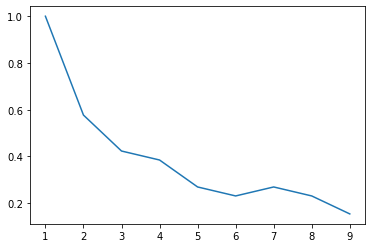

In [568]:
plt.plot(range(1,10),acc)

# 51) location_Kaggadasapura

In [569]:
df51 = df[df['location_Kundalahalli']==1]

In [570]:
df51 = df51[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [571]:
df51

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
4335     3      2.0  12500          1724.0    3     7250.580046   
4336     2      2.0   4900          1030.0    2     4757.281553   
4337     2      1.0   5799           735.0    2     7889.795918   
4338     2      1.0   8200          1047.0    2     7831.900669   
4339     3      3.0  10500          1397.0    3     7516.105941   
4340     3      2.0  12700          1724.0    3     7366.589327   
4341     2      1.0   4927          1010.0    2     4878.217822   
4342     3      2.0  11000          1397.0    3     7874.015748   
4343     3      2.0  10400          1397.0    3     7444.523980   
4344     3      3.0  10800          1397.0    3     7730.851825   
4345     3      2.0  15000          1920.0    3     7812.500000   
4346     3      3.0  10500          1397.0    3     7516.105941   
4347     3      2.0  12400          1724.0    3     7192.575406   
4348     2      1.0   8400          1047.0    2     8022.922636   
4349     2      1.0   8300          1047.0    2     7927.411652   
4350     4      3.0  55000          7000.0    4     7857.142857   
4351     2      1.0   5376          1120.0    2     4800.000000   
4352     2      1.0   8262          1047.0    2     7891.117479   
4353     2      1.0   9100          1047.0    2     8691.499522   
4354     3      1.0  14600          1724.0    3     8468.677494   
4355     3      2.0  17000          1600.0    3    10625.000000   
4356     3      1.0  12500          1724.0    3     7250.580046   
4357     2      1.0   4827          1010.0    2     4779.207921   
4358     2      1.0   8900          1047.0    2     8500.477555   
4359     5      2.0  24500          2500.0    4     9800.000000   
4360     3      3.0  10500          1397.0    3     7516.105941   
4361     2      1.0   7200          1047.0    2     6876.790831   
4362     2      0.0   5800          1260.0    2     4603.174603   
4363     4      3.0  23000          3092.0    4     7438.551100   
4364     2      1.0   7000          1065.0    2     6572.769953   
4365     3      1.0  14600          1724.0    3     8468.677494   
4366     2      2.0   9100          1047.0    2     8691.499522   
4367     3      2.0  12800          1724.0    3     7424.593968   
4368     2      3.0   7400          1315.0    2     5627.376426   
4369     3      2.0  15000          2100.0    3     7142.857143   
4370     3      1.0  12500          1724.0    3     7250.580046   
4371     3      3.0  14000          1724.0    3     8120.649652   
4372     2      1.0   6500          1175.0    2     5531.914894   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
4335                              1                        0   
4336                              0                        1   
4337                              1                        0   
4338                              0                        1   
4339                              1                        0   
4340                              1                        0   
4341                              1                        0   
4342                              1                        0   
4343                              1                        0   
4344                              1                        0   
4345                              1                        0   
4346                              1                        0   
4347                              1                        0   
4348                              1                        0   
4349                              1                        0   
4350                              0                        0   
4351                              1                        0   
4352                              1                        0   
4353                              1                        0   
4354                              1                        0   
4355                              0             

In [572]:
df51.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.559144  0.728165        0.662281   
balcony                        0.559144  1.000000  0.435131        0.424029   
price                          0.728165  0.435131  1.000000        0.977228   
total_sqft_int                 0.662281  0.424029  0.977228        1.000000   
bhk                            0.976892  0.610354  0.750570        0.701915   
price_per_sqft                 0.463018  0.220246  0.388507        0.193568   
area_typeSuper built-up  Area -0.272754 -0.045454 -0.395514       -0.398115   
area_typeBuilt-up  Area       -0.097849 -0.110600 -0.064213        0.006333   
area_typePlot  Area            0.562344  0.221222  0.710405        0.619111   
availability_Ready To Move    -0.121540 -0.064873  0.012103        0.056072   

                                    bhk  price_per_sqft  \
bath                           0.976892        0.463018   
balcony                        0.610354        0.220246   
price                          0.750570        0.388507   
total_sqft_int                 0.701915        0.193568   
bhk                            1.000000        0.440269   
price_per_sqft                 0.440269        1.000000   
area_typeSuper built-up  Area -0.229363       -0.026082   
area_typeBuilt-up  Area       -0.091166       -0.307268   
area_typePlot  Area            0.484895        0.456623   
availability_Ready To Move    -0.161050       -0.236437   

                               area_typeSuper built-up  Area  \
bath                                               -0.272754   
balcony                                            -0.045454   
price                                              -0.395514   
total_sqft_int                                     -0.398115   
bhk                                                -0.229363   
price_per_sqft                                     -0.026082   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.777282   
area_typePlot  Area                                -0.525538   
availability_Ready To Move                         -0.192355   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.097849             0.562344   
balcony                                      -0.110600             0.221222   
price                                        -0.064213             0.710405   
total_sqft_int                                0.006333             0.619111   
bhk                                          -0.091166             0.484895   
price_per_sqft                               -0.307268             0.456623   
area_typeSuper built-up  Area                -0.777282            -0.525538   
area_typeBuilt-up  Area                       1.000000            -0.126773   
area_typePlot  Area                          -0.126773             1.000000   
availability_Ready To Move                    0.094884             0.174964   

                               availability_Ready To Move  
bath                                            -0.121540  
balcony                                         -0.064873  
price                                            0.012103  
total_sqft_int                                   0.056072  
bhk                                             -0.161050  
price_per_sqft                                  -0.236437  
area_typeSuper built-up  Area                   -0.192355  
area_typeBuilt-up  Area                          0.094884  
area_typePlot  Area                              0.174964  
availability_Ready To Move                       1.000000

In [573]:
x = df51[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df51[['price']]

In [574]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6052631578947368]
k= 3 [1.0, 0.6052631578947368, 0.3684210526315789]
k= 4 [1.0, 0.6052631578947368, 0.3684210526315789, 0.3684210526315789]
k= 5 [1.0, 0.6052631578947368, 0.3684210526315789, 0.3684210526315789, 0.34210526315789475]
k= 6 [1.0, 0.6052631578947368, 0.3684210526315789, 0.3684210526315789, 0.34210526315789475, 0.3157894736842105]
k= 7 [1.0, 0.6052631578947368, 0.3684210526315789, 0.3684210526315789, 0.34210526315789475, 0.3157894736842105, 0.3157894736842105]
k= 8 [1.0, 0.6052631578947368, 0.3684210526315789, 0.3684210526315789, 0.34210526315789475, 0.3157894736842105, 0.3157894736842105, 0.2631578947368421]
k= 9 [1.0, 0.6052631578947368, 0.3684210526315789, 0.3684210526315789, 0.34210526315789475, 0.3157894736842105, 0.3157894736842105, 0.2631578947368421, 0.2631578947368421]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [575]:
max(acc)

1.0

In [576]:
k = acc.index(max(acc))+1
k

1

In [577]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


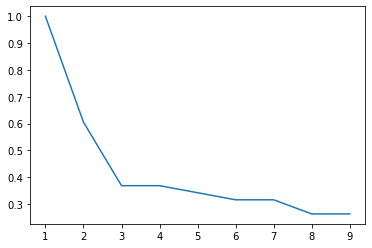

In [578]:
plt.plot(range(1,10),acc)

# 52) location_Kalena Agrahara

In [579]:
df52 = df[df['location_Kalena Agrahara']==1]

In [580]:
df52 = df52[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [581]:
df52

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
3668     2      2.0   5000          1200.0    2     4166.666667   
3669     3      2.0  12000          1804.0    3     6651.884701   
3670     2      1.0   7000          1425.0    3     4912.280702   
3671     2      2.0   7600          1325.0    2     5735.849057   
3672     2      3.0   8500          1450.0    3     5862.068966   
3673     2      1.0   4000           980.0    2     4081.632653   
3674     2      3.0   5200          1187.0    2     4380.791912   
3675     2      2.0   3000           800.0    2     3750.000000   
3676     3      2.0   7800          1565.0    3     4984.025559   
3677     1      1.0   3900           610.0    1     6393.442623   
3678     2      2.0   4500          1040.0    2     4326.923077   
3679     3      3.0  10000          1450.0    3     6896.551724   
3680     2      2.0   4500          1200.0    2     3750.000000   
3681     3      2.0   8900          1902.0    3     4679.284963   
3682     2      1.0   4000           800.0    2     5000.000000   
3683     2      3.0   4800          1222.0    2     3927.986907   
3684     2      1.0   4000           900.0    2     4444.444444   
3685     2      2.0   9500          1837.0    3     5171.475231   
3686     3      2.0   7800          1510.0    3     5165.562914   
3687     2      2.0   7000          1354.0    2     5169.867061   
3688     3      2.0   7000          1200.0    2     5833.333333   
3689     2      2.0   7100          1354.0    2     5243.722304   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
3668                              1                        0   
3669                              1                        0   
3670                              1                        0   
3671                              1                        0   
3672                              1                        0   
3673                              0                        1   
3674                              1                        0   
3675                              1                        0   
3676                              0                        1   
3677                              1                        0   
3678                              0                        1   
3679                              1                        0   
3680                              1                        0   
3681                              1                        0   
3682                              1                        0   
3683                              1                        0   
3684                              1                        0   
3685                              1                        0   
3686                              0                        1   
3687                              1                        0   
3688                              1                        0   
3689                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
3668                    0                           1  
3669                    0                           1  
3670                    0                           1  
3671                    0                           1  
3672                    0                           1  
3673                    0                           1  
3674                    0                           1  
3675                    0                           1  
3676                    0                           1  
3677                    0                           1  
3678                    0                           1  
3679                    0                           1  
3680                    0                           1  
3681                    0                           1  
3682                    0                           1  
3683                    0                           1  
3684                    0              

In [582]:
df52.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.307375  0.645002        0.644018   
balcony                        0.307375  1.000000  0.369958        0.401263   
price                          0.645002  0.369958  1.000000        0.886751   
total_sqft_int                 0.644018  0.401263  0.886751        1.000000   
bhk                            0.699655  0.297676  0.775552        0.834892   
price_per_sqft                 0.266673  0.100774  0.677863        0.284177   
area_typeSuper built-up  Area -0.249029  0.151138  0.096975        0.005963   
area_typeBuilt-up  Area        0.249029 -0.151138 -0.096975       -0.005963   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move          NaN       NaN       NaN             NaN   

                                    bhk  price_per_sqft  \
bath                           0.699655        0.266673   
balcony                        0.297676        0.100774   
price                          0.775552        0.677863   
total_sqft_int                 0.834892        0.284177   
bhk                            1.000000        0.254066   
price_per_sqft                 0.254066        1.000000   
area_typeSuper built-up  Area -0.154476        0.203513   
area_typeBuilt-up  Area        0.154476       -0.203513   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move          NaN             NaN   

                               area_typeSuper built-up  Area  \
bath                                               -0.249029   
balcony                                             0.151138   
price                                               0.096975   
total_sqft_int                                      0.005963   
bhk                                                -0.154476   
price_per_sqft                                      0.203513   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                               NaN   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.249029                  NaN   
balcony                                      -0.151138                  NaN   
price                                        -0.096975                  NaN   
total_sqft_int                               -0.005963                  NaN   
bhk                                           0.154476                  NaN   
price_per_sqft                               -0.203513                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                         NaN                  NaN   

                               availability_Ready To Move  
bath                                                  NaN  
balcony                                               NaN  
price                                                 NaN  
total_sqft_int                                        NaN  
bhk                                                   NaN  
price_per_sqft                                        NaN  
area_typeSuper built-up  Area                         NaN  
area_typeBuilt-up  Area                               NaN  
area_typePlot  Area                                   NaN  
availability_Ready To Move                            NaN

In [583]:
x = df52[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df52[['price']]

In [584]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5454545454545454]
k= 3 [1.0, 0.5454545454545454, 0.36363636363636365]
k= 4 [1.0, 0.5454545454545454, 0.36363636363636365, 0.4090909090909091]
k= 5 [1.0, 0.5454545454545454, 0.36363636363636365, 0.4090909090909091, 0.36363636363636365]
k= 6 [1.0, 0.5454545454545454, 0.36363636363636365, 0.4090909090909091, 0.36363636363636365, 0.36363636363636365]
k= 7 [1.0, 0.5454545454545454, 0.36363636363636365, 0.4090909090909091, 0.36363636363636365, 0.36363636363636365, 0.36363636363636365]
k= 8 [1.0, 0.5454545454545454, 0.36363636363636365, 0.4090909090909091, 0.36363636363636365, 0.36363636363636365, 0.36363636363636365, 0.3181818181818182]
k= 9 [1.0, 0.5454545454545454, 0.36363636363636365, 0.4090909090909091, 0.36363636363636365, 0.36363636363636365, 0.36363636363636365, 0.3181818181818182, 0.2727272727272727]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [585]:
max(acc)

1.0

In [586]:
k = acc.index(max(acc))+1
k

1

In [587]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


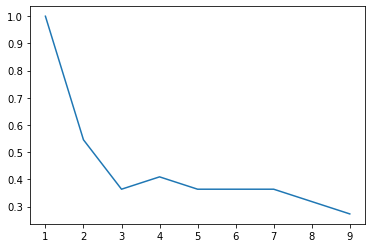

In [588]:
plt.plot(range(1,10),acc)

# 53) location_Kanakapura

In [589]:
df53 = df[df['location_Kanakapura']==1]

In [590]:
df53 = df53[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [591]:
df53

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
3769     3      3.0   7500          1419.0    3     5285.412262   
3770     1      1.0   3600           711.0    1     5063.291139   
3771     1      1.0   3800           711.0    1     5344.585091   
3772     2      1.0   4600           929.0    2     4951.560818   
3773     1      1.0   3000           551.0    1     5444.646098   
3774     2      1.0   4283          1020.0    2     4199.019608   
3775     3      3.0   9700          1699.0    3     5709.240730   
3776     2      1.0   4520          1130.0    2     4000.000000   
3777     3      1.0   7500          1476.0    3     5081.300813   
3778     2      2.0   6400          1295.0    2     4942.084942   
3779     2      1.0   4639          1160.0    2     3999.137931   
3780     2      2.0   5500          1277.0    2     4306.969460   
3781     2      1.0   5900          1151.0    2     5125.977411   
3782     2      1.0   4700           945.0    2     4973.544974   
3783     2      2.0   7000          1254.0    3     5582.137161   
3784     3      1.0  12100          2200.0    3     5500.000000   
3785     2      2.0   6500          1340.0    2     4850.746269   
3786     3      1.0   7500          1450.0    3     5172.413793   
3787     2      1.0   4520          1130.0    2     4000.000000   
3788     2      2.0   6800          1283.0    2     5300.077942   
3789     4      0.0  12000          2130.0    4     5633.802817   
3790     1      1.0   5000           938.0    1     5330.490405   
3791     1      0.0   3547           825.0    1     4300.000000   
3792     2      1.0   7000          1489.0    3     4701.141706   
3793     2      1.0   6950          1477.0    3     4705.484089   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
3769                              0                        1   
3770                              1                        0   
3771                              1                        0   
3772                              1                        0   
3773                              1                        0   
3774                              1                        0   
3775                              1                        0   
3776                              1                        0   
3777                              1                        0   
3778                              1                        0   
3779                              1                        0   
3780                              1                        0   
3781                              1                        0   
3782                              1                        0   
3783                              1                        0   
3784                              0                        1   
3785                              0                        1   
3786                              1                        0   
3787                              1                        0   
3788                              1                        0   
3789                              0                        1   
3790                              1                        0   
3791                              1                        0   
3792                              1                        0   
3793                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
3769                    0                           1  
3770                    0                           0  
3771                    0                           0  
3772                    0                           0  
3773                    0                           0  
3774                    0                           1  
3775                    0                           0  
3776                    0                           1  
3777                    0                           0  
3778                    0             

In [592]:
df53.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.181628  0.851064        0.871856   
balcony                        0.181628  1.000000  0.184336        0.150367   
price                          0.851064  0.184336  1.000000        0.965522   
total_sqft_int                 0.871856  0.150367  0.965522        1.000000   
bhk                            0.913926  0.180001  0.842957        0.875498   
price_per_sqft                 0.271935  0.259447  0.521680        0.288174   
area_typeSuper built-up  Area -0.539647 -0.132946 -0.624376       -0.599484   
area_typeBuilt-up  Area        0.539647  0.132946  0.624376        0.599484   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move     0.367362  0.055385  0.047106        0.193323   

                                    bhk  price_per_sqft  \
bath                           0.913926        0.271935   
balcony                        0.180001        0.259447   
price                          0.842957        0.521680   
total_sqft_int                 0.875498        0.288174   
bhk                            1.000000        0.268969   
price_per_sqft                 0.268969        1.000000   
area_typeSuper built-up  Area -0.436436       -0.314049   
area_typeBuilt-up  Area        0.436436        0.314049   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move     0.229167       -0.478869   

                               area_typeSuper built-up  Area  \
bath                                               -0.539647   
balcony                                            -0.132946   
price                                              -0.624376   
total_sqft_int                                     -0.599484   
bhk                                                -0.436436   
price_per_sqft                                     -0.314049   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.354604   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.539647                  NaN   
balcony                                       0.132946                  NaN   
price                                         0.624376                  NaN   
total_sqft_int                                0.599484                  NaN   
bhk                                           0.436436                  NaN   
price_per_sqft                                0.314049                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.354604                  NaN   

                               availability_Ready To Move  
bath                                             0.367362  
balcony                                          0.055385  
price                                            0.047106  
total_sqft_int                                   0.193323  
bhk                                              0.229167  
price_per_sqft                                  -0.478869  
area_typeSuper built-up  Area                   -0.354604  
area_typeBuilt-up  Area                          0.354604  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [593]:
x = df53[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df53[['price']]

In [594]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6]
k= 3 [1.0, 0.6, 0.4]
k= 4 [1.0, 0.6, 0.4, 0.28]
k= 5 [1.0, 0.6, 0.4, 0.28, 0.28]
k= 6 [1.0, 0.6, 0.4, 0.28, 0.28, 0.24]
k= 7 [1.0, 0.6, 0.4, 0.28, 0.28, 0.24, 0.24]
k= 8 [1.0, 0.6, 0.4, 0.28, 0.28, 0.24, 0.24, 0.24]
k= 9 [1.0, 0.6, 0.4, 0.28, 0.28, 0.24, 0.24, 0.24, 0.24]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [595]:
max(acc)

1.0

In [596]:
k = acc.index(max(acc))+1
k

1

In [597]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


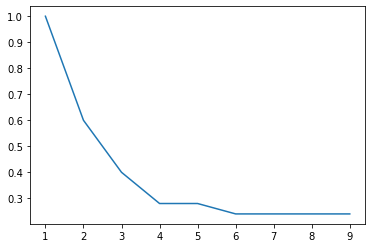

In [598]:
plt.plot(range(1,10),acc)

# 54) location_Kanakpura Road

In [599]:
df54 = df[df['location_Kanakpura Road']==1]

In [600]:
df54 = df54[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [601]:
df54

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
3794     2  1.000000   3600           700.0    2     5142.857143   
3795     3  2.000000   8800          1665.0    3     5285.285285   
3796     2  1.000000   5700           950.0    2     6000.000000   
3797     4  1.000000  11000          2250.0    4     4888.888889   
3798     1  1.000000   2600           525.0    1     4952.380952   
...    ...       ...    ...             ...  ...             ...   
3874     3  3.000000  10500          1938.0    3     5417.956656   
3875     3  2.000000   9620          1843.0    3     5219.750407   
3876     1  1.000000   2600           525.0    1     4952.380952   
3877     2  2.000000   3600           700.0    2     5142.857143   
3878     3  1.584376   9500          1622.0    3     5856.966708   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
3794                              1                        0   
3795                              1                        0   
3796                              0                        1   
3797                              0                        1   
3798                              1                        0   
...                             ...                      ...   
3874                              1                        0   
3875                              1                        0   
3876                              1                        0   
3877                              1                        0   
3878                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
3794                    0                           0  
3795                    0                           1  
3796                    0                           1  
3797                    0                           0  
3798                    0                           0  
...                   ...                         ...  
3874                    0                           0  
3875                    0                           1  
3876                    0                           0  
3877                    0                           0  
3878                    0                           1  

[85 rows x 10 columns]

In [602]:
df54.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.444678  0.794127        0.827602   
balcony                        0.444678  1.000000  0.519057        0.517816   
price                          0.794127  0.519057  1.000000        0.984001   
total_sqft_int                 0.827602  0.517816  0.984001        1.000000   
bhk                            0.919487  0.505671  0.811989        0.838157   
price_per_sqft                 0.213438  0.274023  0.439431        0.289690   
area_typeSuper built-up  Area -0.227113  0.043852 -0.302850       -0.302558   
area_typeBuilt-up  Area        0.107713  0.052927  0.098152        0.125930   
area_typePlot  Area            0.206061 -0.123065  0.369735        0.342241   
availability_Ready To Move     0.433124  0.410695  0.590880        0.596065   

                                    bhk  price_per_sqft  \
bath                           0.919487        0.213438   
balcony                        0.505671        0.274023   
price                          0.811989        0.439431   
total_sqft_int                 0.838157        0.289690   
bhk                            1.000000        0.248278   
price_per_sqft                 0.248278        1.000000   
area_typeSuper built-up  Area -0.239085       -0.077220   
area_typeBuilt-up  Area        0.120564       -0.000788   
area_typePlot  Area            0.228896        0.179912   
availability_Ready To Move     0.469251        0.240604   

                               area_typeSuper built-up  Area  \
bath                                               -0.227113   
balcony                                             0.043852   
price                                              -0.302850   
total_sqft_int                                     -0.302558   
bhk                                                -0.239085   
price_per_sqft                                     -0.077220   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.647150   
area_typePlot  Area                                -0.540062   
availability_Ready To Move                         -0.454440   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.107713             0.206061   
balcony                                       0.052927            -0.123065   
price                                         0.098152             0.369735   
total_sqft_int                                0.125930             0.342241   
bhk                                           0.120564             0.228896   
price_per_sqft                               -0.000788             0.179912   
area_typeSuper built-up  Area                -0.647150            -0.540062   
area_typeBuilt-up  Area                       1.000000            -0.074893   
area_typePlot  Area                          -0.074893             1.000000   
availability_Ready To Move                    0.288237             0.313823   

                               availability_Ready To Move  
bath                                             0.433124  
balcony                                          0.410695  
price                                            0.590880  
total_sqft_int                                   0.596065  
bhk                                              0.469251  
price_per_sqft                                   0.240604  
area_typeSuper built-up  Area                   -0.454440  
area_typeBuilt-up  Area                          0.288237  
area_typePlot  Area                              0.313823  
availability_Ready To Move                       1.000000

In [603]:
x = df54[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df54[['price']]

In [604]:
acc = []
for i in range(1,12):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6588235294117647]
k= 3 [1.0, 0.6588235294117647, 0.4823529411764706]
k= 4 [1.0, 0.6588235294117647, 0.4823529411764706, 0.4]
k= 5 [1.0, 0.6588235294117647, 0.4823529411764706, 0.4, 0.3764705882352941]
k= 6 [1.0, 0.6588235294117647, 0.4823529411764706, 0.4, 0.3764705882352941, 0.36470588235294116]
k= 7 [1.0, 0.6588235294117647, 0.4823529411764706, 0.4, 0.3764705882352941, 0.36470588235294116, 0.36470588235294116]
k= 8 [1.0, 0.6588235294117647, 0.4823529411764706, 0.4, 0.3764705882352941, 0.36470588235294116, 0.36470588235294116, 0.32941176470588235]
k= 9 [1.0, 0.6588235294117647, 0.4823529411764706, 0.4, 0.3764705882352941, 0.36470588235294116, 0.36470588235294116, 0.32941176470588235, 0.32941176470588235]
k= 10 [1.0, 0.6588235294117647, 0.4823529411764706, 0.4, 0.3764705882352941, 0.36470588235294116, 0.36470588235294116, 0.32941176470588235, 0.32941176470588235, 0.3058823529411765]
k= 11 [1.0, 0.6588235294117647, 0.4823529411764706, 0.4, 0.3764705882352941, 0.3

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [605]:
max(acc)

1.0

In [606]:
k = acc.index(max(acc))+1
k

1

In [607]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


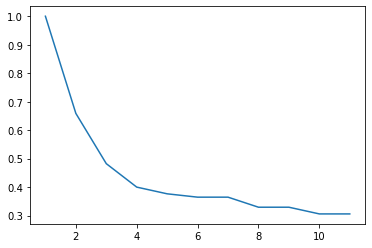

In [608]:
plt.plot(range(1,12),acc)

# 55) location_Kasavanhalli

In [609]:
df55 = df[df['location_Kasavanhalli']==1]

In [610]:
df55 = df55[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [611]:
df55

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
3898     2      2.0   5806         1060.00    2     5477.358491   
3899     3      1.0  10500         1563.05    3     6717.635392   
3900     3      3.0   9900         1717.00    3     5765.870705   
3901     4      1.0  24000         3260.00    4     7361.963190   
3902     2      2.0   7800         1349.00    2     5782.060786   
3903     2      2.0   7800         1121.00    2     6958.073149   
3904     2      1.0   5000         1100.00    2     4545.454545   
3905     2      1.0   7800         1200.00    2     6500.000000   
3906     3      0.0   8900         1476.00    3     6029.810298   
3907     2      2.0   5000         1200.00    2     4166.666667   
3908     3      2.0  11600         1719.00    3     6748.109366   
3909     2      2.0   5000         1115.00    2     4484.304933   
3910     2      1.0   6120         1125.00    2     5440.000000   
3911     3      2.0  15100         2170.00    3     6958.525346   
3912     3      1.0   9500         1476.00    3     6436.314363   
3913     2      1.0   5030         1200.00    2     4191.666667   
3914     3      2.0  12300         1787.00    3     6883.044208   
3915     2      2.0   5980         1090.00    2     5486.238532   
3916     3      2.0  10400         1691.00    3     6150.206978   
3917     4      3.0  27200         4260.00    4     6384.976526   
3918     4      3.0  12000         2111.00    3     5684.509711   
3919     2      1.0   3900          950.00    2     4105.263158   
3920     2      2.0   4200         1105.00    2     3800.904977   
3921     1      1.0   4382          770.00    1     5690.909091   
3922     2      1.0   6000         1147.00    2     5231.037489   
3923     2      2.0   7200         1375.00    2     5236.363636   
3924     2      2.0   6000         1200.00    2     5000.000000   
3925     4      2.0  33300         4260.00    4     7816.901408   
3926     2      2.0   8300         1495.00    2     5551.839465   
3927     4      2.0  32500         4000.00    4     8125.000000   
3928     2      1.0   6900         1225.00    3     5632.653061   
3929     3      2.0  13200         1917.00    3     6885.758998   
3930     2      1.0   7800         1375.00    2     5672.727273   
3931     4      2.0  34400         4408.00    4     7803.992740   
3932     2      2.0   9500         1309.00    2     7257.448434   
3933     3      0.0  10500         1476.00    3     7113.821138   
3934     2      2.0   6700         1158.00    2     5785.837651   
3935     2      3.0   6700         1214.00    2     5518.945634   
3936     4      3.0  12000         2110.00    3     5687.203791   
3937     2      2.0  11000         1495.00    2     7357.859532   
3938     2      3.0   8500         1575.00    2     5396.825397   
3939     2      2.0   5500         1069.00    2     5144.995323   
3940     2      1.0   6800         1100.00    2     6181.818182   
3941     3      3.0  11200         1715.00    3     6530.612245   
3942     2      1.0   6500         1100.00    2     5909.090909   
3943     2      2.0   6625         1230.00    2     5386.178862   
3944     2      2.0   9000         1585.00    2     5678.233438   
3945     2      2.0   8000         1245.00    2     6425.702811   
3946     3      2.0  14200         2035.00    3     6977.886978   
3947     3      1.0  11000         1747.00    3     6296.508300   
3948     2      2.0   8000         1377.00    2     5809.731300   
3949     2      1.0   6100         1181.00    2     5165.114310   
3950     2      2.0   7500         1121.00    2     6690.454951   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
3898                              1                        0   
3899                              1                        0   
3900                              0                        1   
3901                              0                        1   
3902                              1                        0   
390

In [612]:
df55.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.223616  0.816502        0.840933   
balcony                        0.223616  1.000000  0.204256        0.265060   
price                          0.816502  0.204256  1.000000        0.984185   
total_sqft_int                 0.840933  0.265060  0.984185        1.000000   
bhk                            0.947862  0.118292  0.853117        0.861765   
price_per_sqft                 0.572202  0.036338  0.714828        0.608769   
area_typeSuper built-up  Area -0.413601 -0.237512 -0.353775       -0.378287   
area_typeBuilt-up  Area        0.242516  0.222512  0.046715        0.087475   
area_typePlot  Area            0.402396  0.067054  0.660874        0.632728   
availability_Ready To Move    -0.350970 -0.173287 -0.448732       -0.435152   

                                    bhk  price_per_sqft  \
bath                           0.947862        0.572202   
balcony                        0.118292        0.036338   
price                          0.853117        0.714828   
total_sqft_int                 0.861765        0.608769   
bhk                            1.000000        0.623117   
price_per_sqft                 0.623117        1.000000   
area_typeSuper built-up  Area -0.324576       -0.168445   
area_typeBuilt-up  Area        0.127859       -0.006172   
area_typePlot  Area            0.438846        0.370652   
availability_Ready To Move    -0.392036       -0.425852   

                               area_typeSuper built-up  Area  \
bath                                               -0.413601   
balcony                                            -0.237512   
price                                              -0.353775   
total_sqft_int                                     -0.378287   
bhk                                                -0.324576   
price_per_sqft                                     -0.168445   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.883737   
area_typePlot  Area                                -0.386953   
availability_Ready To Move                          0.082251   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.242516             0.402396   
balcony                                       0.222512             0.067054   
price                                         0.046715             0.660874   
total_sqft_int                                0.087475             0.632728   
bhk                                           0.127859             0.438846   
price_per_sqft                               -0.006172             0.370652   
area_typeSuper built-up  Area                -0.883737            -0.386953   
area_typeBuilt-up  Area                       1.000000            -0.089562   
area_typePlot  Area                          -0.089562             1.000000   
availability_Ready To Move                    0.107545            -0.386953   

                               availability_Ready To Move  
bath                                            -0.350970  
balcony                                         -0.173287  
price                                           -0.448732  
total_sqft_int                                  -0.435152  
bhk                                             -0.392036  
price_per_sqft                                  -0.425852  
area_typeSuper built-up  Area                    0.082251  
area_typeBuilt-up  Area                          0.107545  
area_typePlot  Area                             -0.386953  
availability_Ready To Move                       1.000000

In [613]:
x = df55[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df55[['price']]

In [614]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5283018867924528]
k= 3 [1.0, 0.5283018867924528, 0.2830188679245283]
k= 4 [1.0, 0.5283018867924528, 0.2830188679245283, 0.24528301886792453]
k= 5 [1.0, 0.5283018867924528, 0.2830188679245283, 0.24528301886792453, 0.22641509433962265]
k= 6 [1.0, 0.5283018867924528, 0.2830188679245283, 0.24528301886792453, 0.22641509433962265, 0.24528301886792453]
k= 7 [1.0, 0.5283018867924528, 0.2830188679245283, 0.24528301886792453, 0.22641509433962265, 0.24528301886792453, 0.3018867924528302]
k= 8 [1.0, 0.5283018867924528, 0.2830188679245283, 0.24528301886792453, 0.22641509433962265, 0.24528301886792453, 0.3018867924528302, 0.2641509433962264]
k= 9 [1.0, 0.5283018867924528, 0.2830188679245283, 0.24528301886792453, 0.22641509433962265, 0.24528301886792453, 0.3018867924528302, 0.2641509433962264, 0.2641509433962264]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [615]:
max(acc)

1.0

In [616]:
k = acc.index(max(acc))+1
k

1

In [617]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


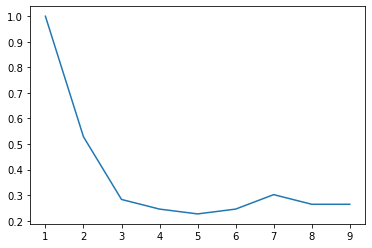

In [618]:
plt.plot(range(1,10),acc)

# 56) location_Kengeri

In [619]:
df56 = df[df['location_Kengeri']==1]

In [620]:
df56 = df56[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [621]:
df56

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
4018     2  1.000000   3800           750.0    2     5066.666667   
4019     2  0.000000   5800          1200.0    2     4833.333333   
4020     2  2.000000   5700          1025.0    2     5560.975610   
4021     2  1.000000   4900          1082.0    3     4528.650647   
4022     2  1.000000   3600           750.0    2     4800.000000   
4023     2  1.000000   3500           726.0    2     4820.936639   
4024     1  1.000000   1950           416.0    1     4687.500000   
4025     2  2.000000   4500           900.0    2     5000.000000   
4026     1  1.000000   2500           502.0    1     4980.079681   
4027     3  1.000000   6700          1200.0    3     5583.333333   
4028     1  1.000000   1700           500.0    1     3400.000000   
4029     1  1.000000   2250           540.0    1     4166.666667   
4030     2  1.000000   3550           750.0    2     4733.333333   
4031     3  2.000000   8000          1741.0    3     4595.060310   
4032     2  0.000000   5800          1200.0    2     4833.333333   
4033     2  1.000000   3650           750.0    2     4866.666667   
4034     1  1.000000   1800           416.0    1     4326.923077   
4035     2  0.000000   4900           883.0    2     5549.263873   
4036     2  2.000000   5100          1052.0    2     4847.908745   
4037     2  2.000000   6300          1220.0    2     5163.934426   
4038     1  0.000000   5200          1150.0    1     4521.739130   
4039     2  2.000000   5350          1192.0    2     4488.255034   
4040     2  1.000000   4000           750.0    2     5333.333333   
4041     1  1.000000   3500           600.0    1     5833.333333   
4042     2  1.000000   5150          1035.0    2     4975.845411   
4043     5  1.584376  13000          3000.0    8     4333.333333   
4044     1  1.000000   1500           410.0    1     3658.536585   
4045     1  1.000000   1719           416.0    1     4132.211538   
4046     4  3.000000  10000          2500.0    5     4000.000000   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
4018                              1                        0   
4019                              1                        0   
4020                              1                        0   
4021                              0                        1   
4022                              0                        1   
4023                              1                        0   
4024                              1                        0   
4025                              1                        0   
4026                              0                        1   
4027                              0                        0   
4028                              0                        1   
4029                              1                        0   
4030                              1                        0   
4031                              1                        0   
4032                              0                        0   
4033                              1                        0   
4034                              1                        0   
4035                              0                        1   
4036                              1                        0   
4037                              1                        0   
4038                              0                        0   
4039                              1                        0   
4040                              1                        0   
4041                              0                        1   
4042                              1                        0   
4043                              0                        1   
4044                              0                        1   
4045                              1                        0   
4046                              0                        1   

      area_typePlot  Area  availability_Read

In [622]:
df56.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.447656  0.925100        0.918716   
balcony                        0.447656  1.000000  0.390779        0.428413   
price                          0.925100  0.390779  1.000000        0.980456   
total_sqft_int                 0.918716  0.428413  0.980456        1.000000   
bhk                            0.957242  0.397068  0.901194        0.922143   
price_per_sqft                 0.066288 -0.118944  0.118941       -0.061580   
area_typeSuper built-up  Area -0.141061  0.236292 -0.203177       -0.232520   
area_typeBuilt-up  Area        0.133171  0.017582  0.106396        0.172014   
area_typePlot  Area            0.025826 -0.408844  0.166953        0.114727   
availability_Ready To Move     0.242699 -0.006399  0.299199        0.246544   

                                    bhk  price_per_sqft  \
bath                           0.957242        0.066288   
balcony                        0.397068       -0.118944   
price                          0.901194        0.118941   
total_sqft_int                 0.922143       -0.061580   
bhk                            1.000000       -0.055254   
price_per_sqft                -0.055254        1.000000   
area_typeSuper built-up  Area -0.238294        0.117340   
area_typeBuilt-up  Area        0.270228       -0.219676   
area_typePlot  Area           -0.025133        0.143948   
availability_Ready To Move     0.220444        0.268967   

                               area_typeSuper built-up  Area  \
bath                                               -0.141061   
balcony                                             0.236292   
price                                              -0.203177   
total_sqft_int                                     -0.232520   
bhk                                                -0.238294   
price_per_sqft                                      0.117340   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.798436   
area_typePlot  Area                                -0.404304   
availability_Ready To Move                         -0.429119   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.133171             0.025826   
balcony                                       0.017582            -0.408844   
price                                         0.106396             0.166953   
total_sqft_int                                0.172014             0.114727   
bhk                                           0.270228            -0.025133   
price_per_sqft                               -0.219676             0.143948   
area_typeSuper built-up  Area                -0.798436            -0.404304   
area_typeBuilt-up  Area                       1.000000            -0.227866   
area_typePlot  Area                          -0.227866             1.000000   
availability_Ready To Move                    0.342624             0.173494   

                               availability_Ready To Move  
bath                                             0.242699  
balcony                                         -0.006399  
price                                            0.299199  
total_sqft_int                                   0.246544  
bhk                                              0.220444  
price_per_sqft                                   0.268967  
area_typeSuper built-up  Area                   -0.429119  
area_typeBuilt-up  Area                          0.342624  
area_typePlot  Area                              0.173494  
availability_Ready To Move                       1.000000

In [623]:
x = df56[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df56[['price']]

In [624]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5862068965517241]
k= 3 [1.0, 0.5862068965517241, 0.3448275862068966]
k= 4 [1.0, 0.5862068965517241, 0.3448275862068966, 0.27586206896551724]
k= 5 [1.0, 0.5862068965517241, 0.3448275862068966, 0.27586206896551724, 0.2413793103448276]
k= 6 [1.0, 0.5862068965517241, 0.3448275862068966, 0.27586206896551724, 0.2413793103448276, 0.1724137931034483]
k= 7 [1.0, 0.5862068965517241, 0.3448275862068966, 0.27586206896551724, 0.2413793103448276, 0.1724137931034483, 0.10344827586206896]
k= 8 [1.0, 0.5862068965517241, 0.3448275862068966, 0.27586206896551724, 0.2413793103448276, 0.1724137931034483, 0.10344827586206896, 0.10344827586206896]
k= 9 [1.0, 0.5862068965517241, 0.3448275862068966, 0.27586206896551724, 0.2413793103448276, 0.1724137931034483, 0.10344827586206896, 0.10344827586206896, 0.10344827586206896]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [625]:
max(acc)

1.0

In [626]:
k = acc.index(max(acc))+1
k

1

In [627]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


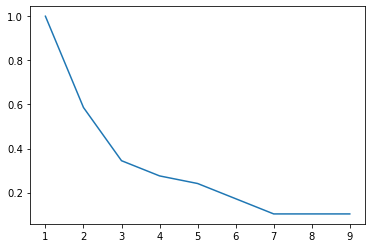

In [628]:
plt.plot(range(1,10),acc)

# 57) location_Kengeri Satellite Town

In [629]:
df57 = df[df['location_Kengeri Satellite Town']==1]

In [630]:
df57 = df57[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [631]:
df57

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
4049     2  1.000000   3500           890.0    2     3932.584270   
4050     2  1.000000   4500           883.0    2     5096.262741   
4051     2  3.000000   6600          1415.0    3     4664.310954   
4052     1  1.000000   3000           930.0    1     3225.806452   
4053     2  1.584376   7800          1635.0    3     4770.642202   
4054     2  2.000000   4300          1050.0    2     4095.238095   
4055     2  3.000000   4200          1007.0    2     4170.804369   
4056     2  1.000000   2600           818.0    2     3178.484108   
4057     2  2.000000   5000          1030.0    2     4854.368932   
4058     2  2.000000   3200           795.0    2     4025.157233   
4059     2  0.000000   4428          1302.5    2     3400.000000   
4060     2  1.000000   4000           800.0    2     5000.000000   
4061     1  1.000000   2200           654.0    1     3363.914373   
4062     2  3.000000   4200          1060.0    2     3962.264151   
4063     2  1.000000   3300           750.0    2     4400.000000   
4064     2  3.000000   3900           920.0    2     4239.130435   
4065     2  2.000000   4200           985.0    2     4263.959391   
4066     1  1.000000   1500           410.0    1     3658.536585   
4067     2  2.000000   4900          1120.0    2     4375.000000   
4068     2  1.000000   4300          1110.0    2     3873.873874   
4069     2  3.000000   5000          1170.0    2     4273.504274   
4070     2  0.000000   2500           777.4    2     3215.847697   
4071     2  1.000000   3200           800.0    2     4000.000000   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
4049                              1                        0   
4050                              0                        1   
4051                              1                        0   
4052                              1                        0   
4053                              1                        0   
4054                              1                        0   
4055                              1                        0   
4056                              1                        0   
4057                              0                        1   
4058                              1                        0   
4059                              1                        0   
4060                              0                        1   
4061                              1                        0   
4062                              1                        0   
4063                              1                        0   
4064                              1                        0   
4065                              1                        0   
4066                              1                        0   
4067                              1                        0   
4068                              0                        1   
4069                              0                        1   
4070                              1                        0   
4071                              0                        1   

      area_typePlot  Area  availability_Ready To Move  
4049                    0                           1  
4050                    0                           1  
4051                    0                           1  
4052                    0                           1  
4053                    0                           1  
4054                    0                           1  
4055                    0                           1  
4056                    0                           0  
4057                    0                           1  
4058                    0                           1  
4059                    0                           0  
4060                    0                           1  
4061                    0                           1  
4062                    0                           

In [632]:
df57.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.249596  0.513685        0.466124   
balcony                        0.249596  1.000000  0.441600        0.340539   
price                          0.513685  0.441600  1.000000        0.926061   
total_sqft_int                 0.466124  0.340539  0.926061        1.000000   
bhk                            0.798024  0.324468  0.817085        0.747772   
price_per_sqft                 0.468210  0.414712  0.655453        0.339430   
area_typeSuper built-up  Area -0.230089  0.058746 -0.141171        0.010728   
area_typeBuilt-up  Area        0.230089 -0.058746  0.141171       -0.010728   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move    -0.119523  0.367249  0.114976       -0.109653   

                                    bhk  price_per_sqft  \
bath                           0.798024        0.468210   
balcony                        0.324468        0.414712   
price                          0.817085        0.655453   
total_sqft_int                 0.747772        0.339430   
bhk                            1.000000        0.551378   
price_per_sqft                 0.551378        1.000000   
area_typeSuper built-up  Area -0.055641       -0.456650   
area_typeBuilt-up  Area        0.055641        0.456650   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move    -0.028904        0.443437   

                               area_typeSuper built-up  Area  \
bath                                               -0.230089   
balcony                                             0.058746   
price                                              -0.141171   
total_sqft_int                                      0.010728   
bhk                                                -0.055641   
price_per_sqft                                     -0.456650   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.183340   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.230089                  NaN   
balcony                                      -0.058746                  NaN   
price                                         0.141171                  NaN   
total_sqft_int                               -0.010728                  NaN   
bhk                                           0.055641                  NaN   
price_per_sqft                                0.456650                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.183340                  NaN   

                               availability_Ready To Move  
bath                                            -0.119523  
balcony                                          0.367249  
price                                            0.114976  
total_sqft_int                                  -0.109653  
bhk                                             -0.028904  
price_per_sqft                                   0.443437  
area_typeSuper built-up  Area                   -0.183340  
area_typeBuilt-up  Area                          0.183340  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [633]:
x = df57[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df57[['price']]

In [634]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5217391304347826]
k= 3 [1.0, 0.5217391304347826, 0.391304347826087]
k= 4 [1.0, 0.5217391304347826, 0.391304347826087, 0.2608695652173913]
k= 5 [1.0, 0.5217391304347826, 0.391304347826087, 0.2608695652173913, 0.21739130434782608]
k= 6 [1.0, 0.5217391304347826, 0.391304347826087, 0.2608695652173913, 0.21739130434782608, 0.21739130434782608]
k= 7 [1.0, 0.5217391304347826, 0.391304347826087, 0.2608695652173913, 0.21739130434782608, 0.21739130434782608, 0.17391304347826086]
k= 8 [1.0, 0.5217391304347826, 0.391304347826087, 0.2608695652173913, 0.21739130434782608, 0.21739130434782608, 0.17391304347826086, 0.13043478260869565]
k= 9 [1.0, 0.5217391304347826, 0.391304347826087, 0.2608695652173913, 0.21739130434782608, 0.21739130434782608, 0.17391304347826086, 0.13043478260869565, 0.17391304347826086]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [635]:
max(acc)

1.0

In [636]:
k = acc.index(max(acc))+1
k

1

In [637]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


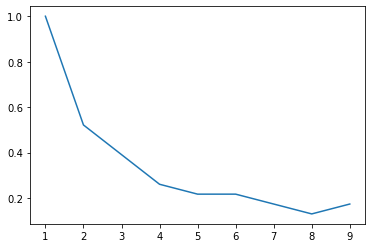

In [638]:
plt.plot(range(1,10),acc)

# 58) location_Koramangala

In [639]:
df58 = df[df['location_Koramangala']==1]

In [640]:
df58 = df58[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [641]:
df58

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
4164     2  1.000000  16500          1320.0    2    12500.000000   
4165     2  1.000000  10200          1253.0    2     8140.462889   
4166     3  2.000000  16000          1580.0    3    10126.582280   
4167     5  2.000000  42500          3500.0    4    12142.857140   
4168     1  1.000000  11000          1005.0    2    10945.273630   
4169     4  1.000000  27500          2292.0    3    11998.254800   
4170     2  3.000000  10000          1290.0    2     7751.937984   
4171     2  3.000000  11000          1300.0    2     8461.538462   
4172     2  2.000000  11900          1325.0    2     8981.132075   
4173     2  1.000000   7520          1140.0    2     6596.491228   
4174     2  3.000000  10000          1260.0    2     7936.507937   
4175     3  1.584376  21000          1975.0    3    10632.911390   
4176     2  1.000000  20000          1900.0    2    10526.315790   
4177     3  2.000000  28600          2292.0    3    12478.184990   
4178     3  3.000000  29000          2300.0    3    12608.695650   
4179     2  1.000000  15000          1320.0    2    11363.636360   
4180     2  2.000000  11000          1320.0    2     8333.333333   
4181     4  1.584376  77500          5985.0    4    12949.039260   
4182     3  0.000000  30000          2246.0    3    13357.079250   
4183     2  1.000000  10000          1083.0    2     9233.610342   
4184     3  1.000000  20000          1744.0    3    11467.889910   
4185     2  1.000000  12800          1180.0    2    10847.457630   
4186     2  1.000000  16000          1320.0    2    12121.212120   
4187     2  2.000000  12500          1370.0    2     9124.087591   
4188     2  2.000000   8500          1100.0    2     7727.272727   
4189     2  1.000000  16500          1249.0    2    13210.568450   
4190     2  2.000000  10000          1200.0    2     8333.333333   
4191     3  2.000000  30000          2223.0    3    13495.276650   
4192     4  1.000000  21000          1744.0    3    12041.284400   
4193     4  2.000000  24500          1866.0    3    13129.689170   
4194     2  1.000000  16000          1320.0    2    12121.212120   
4195     2  2.000000  10300          1350.0    2     7629.629630   
4196     4  0.000000  62500          6000.0    4    10416.666670   
4197     2  1.000000  16000          1320.0    2    12121.212120   
4198     3  2.000000  21000          1710.0    3    12280.701750   
4199     2  2.000000   9500          1355.0    2     7011.070111   
4200     3  1.000000  17000          1600.0    3    10625.000000   
4201     2  1.000000  10000          1260.0    2     7936.507937   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
4164                              1                        0   
4165                              1                        0   
4166                              1                        0   
4167                              1                        0   
4168                              1                        0   
4169                              1                        0   
4170                              1                        0   
4171                              1                        0   
4172                              1                        0   
4173                              0                        1   
4174                              0                        1   
4175                              0                        1   
4176                              0                        1   
4177                              1                        0   
4178                              0                        1   
4179                              1                        0   
4180                              1                        0   
4181                              1                        0   
4182                              1                        0   
4183                              1                        0   
4184     

In [642]:
df58.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000 -0.058098  0.742311        0.705034   
balcony                       -0.058098  1.000000 -0.191546       -0.177411   
price                          0.742311 -0.191546  1.000000        0.974806   
total_sqft_int                 0.705034 -0.177411  0.974806        1.000000   
bhk                            0.925389 -0.099933  0.856376        0.826354   
price_per_sqft                 0.503987 -0.299256  0.534726        0.357317   
area_typeSuper built-up  Area  0.073736 -0.214456  0.015830       -0.089805   
area_typeBuilt-up  Area       -0.073736  0.214456 -0.015830        0.089805   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move    -0.124190  0.009757 -0.012515        0.053056   

                                    bhk  price_per_sqft  \
bath                           0.925389        0.503987   
balcony                       -0.099933       -0.299256   
price                          0.856376        0.534726   
total_sqft_int                 0.826354        0.357317   
bhk                            1.000000        0.531790   
price_per_sqft                 0.531790        1.000000   
area_typeSuper built-up  Area  0.019144        0.349141   
area_typeBuilt-up  Area       -0.019144       -0.349141   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move    -0.009720       -0.308322   

                               area_typeSuper built-up  Area  \
bath                                                0.073736   
balcony                                            -0.214456   
price                                               0.015830   
total_sqft_int                                     -0.089805   
bhk                                                 0.019144   
price_per_sqft                                      0.349141   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.150445   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.073736                  NaN   
balcony                                       0.214456                  NaN   
price                                        -0.015830                  NaN   
total_sqft_int                                0.089805                  NaN   
bhk                                          -0.019144                  NaN   
price_per_sqft                               -0.349141                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.150445                  NaN   

                               availability_Ready To Move  
bath                                            -0.124190  
balcony                                          0.009757  
price                                           -0.012515  
total_sqft_int                                   0.053056  
bhk                                             -0.009720  
price_per_sqft                                  -0.308322  
area_typeSuper built-up  Area                   -0.150445  
area_typeBuilt-up  Area                          0.150445  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [643]:
x = df58[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df58[['price']]

In [644]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6842105263157895]
k= 3 [1.0, 0.6842105263157895, 0.47368421052631576]
k= 4 [1.0, 0.6842105263157895, 0.47368421052631576, 0.39473684210526316]
k= 5 [1.0, 0.6842105263157895, 0.47368421052631576, 0.39473684210526316, 0.3684210526315789]
k= 6 [1.0, 0.6842105263157895, 0.47368421052631576, 0.39473684210526316, 0.3684210526315789, 0.3157894736842105]
k= 7 [1.0, 0.6842105263157895, 0.47368421052631576, 0.39473684210526316, 0.3684210526315789, 0.3157894736842105, 0.3157894736842105]
k= 8 [1.0, 0.6842105263157895, 0.47368421052631576, 0.39473684210526316, 0.3684210526315789, 0.3157894736842105, 0.3157894736842105, 0.23684210526315788]
k= 9 [1.0, 0.6842105263157895, 0.47368421052631576, 0.39473684210526316, 0.3684210526315789, 0.3157894736842105, 0.3157894736842105, 0.23684210526315788, 0.23684210526315788]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [645]:
max(acc)

1.0

In [646]:
k = acc.index(max(acc))+1
k

1

In [647]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


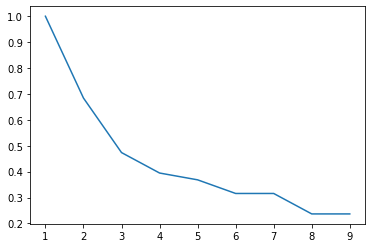

In [648]:
plt.plot(range(1,10),acc)

# 59) location_Kothanur

In [649]:
df59 = df[df['location_Kothanur']==1]

In [650]:
df59 = df59[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [651]:
df59

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
4212     2  1.000000   5100          1200.0    2     4250.000000   
4213     2  1.000000  15000          2400.0    3     6250.000000   
4214     3  1.584376  11000          1828.0    3     6017.505470   
4215     2  2.000000   5800          1186.0    2     4890.387858   
4216     3  2.000000  10500          1847.0    3     5684.894423   
4217     5  2.000000  55000          9600.0    5     5729.166667   
4218     3  3.000000   7000          1435.0    3     4878.048780   
4219     2  2.000000   5800          1187.0    2     4886.267902   
4220     3  2.000000  11000          1847.0    3     5955.603682   
4221     3  3.000000   7100          1460.0    3     4863.013699   
4222     2  2.000000   5900          1185.0    2     4978.902954   
4223     3  3.000000   7000          1436.0    3     4874.651811   
4224     3  3.000000   7100          1462.0    3     4856.361149   
4225     3  2.000000  10500          1790.0    3     5865.921788   
4226     2  1.000000   4550          1070.0    2     4252.336449   
4227     2  2.000000   5600          1145.0    2     4890.829694   
4228     5  1.584376  23000          3401.0    4     6762.716848   
4229     2  1.584376   6900          1455.0    2     4742.268041   
4230     1  1.000000   3000           627.0    1     4784.688995   
4231     2  1.000000   6850          1302.0    2     5261.136713   
4232     3  1.584376  11100          1760.0    3     6306.818182   
4233     2  2.000000   5800          1185.0    2     4894.514768   
4234     1  0.000000   7500          1500.0    1     5000.000000   
4235     2  2.000000   5300          1075.0    2     4930.232558   
4236     3  0.000000   9700          1790.0    3     5418.994413   
4237     4  2.000000  17500          2700.0    4     6481.481481   
4238     2  2.000000  10600          1786.0    3     5935.050392   
4239     3  2.000000  10700          1787.0    3     5987.688864   
4240     2  2.000000   5400          1141.0    2     4732.690622   
4241     3  1.584376  11000          1760.0    3     6250.000000   
4242     2  2.000000   5700          1160.0    2     4913.793103   
4243     2  2.000000   5500          1095.0    2     5022.831050   
4244     2  2.000000   5600          1142.0    2     4903.677758   
4245     2  2.000000   5400          1074.0    2     5027.932961   
4246     2  1.000000   6000          1285.0    2     4669.260700   
4247     2  2.000000   5300          1075.0    2     4930.232558   
4248     2  2.000000   5600          1140.0    2     4912.280702   
4249     2  1.000000   7000          1400.0    2     5000.000000   
4250     2  2.000000   5600          1140.0    2     4912.280702   
4251     3  2.000000  12000          1787.0    3     6715.165081   
4252     2  2.000000   5900          1185.0    2     4978.902954   
4253     3  2.000000  10500          1790.0    3     5865.921788   
4254     2  2.000000   5500          1130.0    2     4867.256637   
4255     2  2.000000   5400          1094.0    2     4936.014625   
4256     3  2.000000   8000          1170.0    3     6837.606838   
4257     2  2.000000   6500          1400.0    2     4642.857143   
4258     2  2.000000   5900          1195.0    2     4937.238494   
4259     3  2.000000  12000          1790.0    3     6703.910615   
4260     3  3.000000   7150          1454.0    3     4917.469051   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
4212                              1                        0   
4213                              0                        0   
4214                              1                        0   
4215                              1                        0   
4216                              1                        0   
4217                              0                        0   
4218                              1                        0   
4219                              1                        0   
4220                         

In [652]:
df59.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.300469  0.742811        0.691521   
balcony                        0.300469  1.000000 -0.001650        0.007990   
price                          0.742811 -0.001650  1.000000        0.990501   
total_sqft_int                 0.691521  0.007990  0.990501        1.000000   
bhk                            0.949555  0.303808  0.773408        0.722854   
price_per_sqft                 0.626813 -0.023830  0.471659        0.352822   
area_typeSuper built-up  Area -0.253448  0.411706 -0.450698       -0.421699   
area_typeBuilt-up  Area       -0.083311 -0.276318 -0.085101       -0.092067   
area_typePlot  Area            0.399570 -0.276717  0.653512        0.622718   
availability_Ready To Move     0.083311 -0.028784  0.078194        0.081668   

                                    bhk  price_per_sqft  \
bath                           0.949555        0.626813   
balcony                        0.303808       -0.023830   
price                          0.773408        0.471659   
total_sqft_int                 0.722854        0.352822   
bhk                            1.000000        0.676922   
price_per_sqft                 0.676922        1.000000   
area_typeSuper built-up  Area -0.258667       -0.316101   
area_typeBuilt-up  Area       -0.097688        0.047433   
area_typePlot  Area            0.419250        0.361453   
availability_Ready To Move     0.097688        0.013238   

                               area_typeSuper built-up  Area  \
bath                                               -0.253448   
balcony                                             0.411706   
price                                              -0.450698   
total_sqft_int                                     -0.421699   
bhk                                                -0.258667   
price_per_sqft                                     -0.316101   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.628539   
area_typePlot  Area                                -0.710669   
availability_Ready To Move                         -0.141421   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.083311             0.399570   
balcony                                      -0.276318            -0.276717   
price                                        -0.085101             0.653512   
total_sqft_int                               -0.092067             0.622718   
bhk                                          -0.097688             0.419250   
price_per_sqft                                0.047433             0.361453   
area_typeSuper built-up  Area                -0.628539            -0.710669   
area_typeBuilt-up  Area                       1.000000            -0.100504   
area_typePlot  Area                          -0.100504             1.000000   
availability_Ready To Move                    0.088889             0.100504   

                               availability_Ready To Move  
bath                                             0.083311  
balcony                                         -0.028784  
price                                            0.078194  
total_sqft_int                                   0.081668  
bhk                                              0.097688  
price_per_sqft                                   0.013238  
area_typeSuper built-up  Area                   -0.141421  
area_typeBuilt-up  Area                          0.088889  
area_typePlot  Area                              0.100504  
availability_Ready To Move                       1.000000

In [653]:
x = df59[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df59[['price']]

In [654]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.7142857142857143]
k= 3 [1.0, 0.7142857142857143, 0.5918367346938775]
k= 4 [1.0, 0.7142857142857143, 0.5918367346938775, 0.5306122448979592]
k= 5 [1.0, 0.7142857142857143, 0.5918367346938775, 0.5306122448979592, 0.5102040816326531]
k= 6 [1.0, 0.7142857142857143, 0.5918367346938775, 0.5306122448979592, 0.5102040816326531, 0.3673469387755102]
k= 7 [1.0, 0.7142857142857143, 0.5918367346938775, 0.5306122448979592, 0.5102040816326531, 0.3673469387755102, 0.3673469387755102]
k= 8 [1.0, 0.7142857142857143, 0.5918367346938775, 0.5306122448979592, 0.5102040816326531, 0.3673469387755102, 0.3673469387755102, 0.2653061224489796]
k= 9 [1.0, 0.7142857142857143, 0.5918367346938775, 0.5306122448979592, 0.5102040816326531, 0.3673469387755102, 0.3673469387755102, 0.2653061224489796, 0.24489795918367346]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [655]:
max(acc)

1.0

In [656]:
k = acc.index(max(acc))+1
k

1

In [657]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


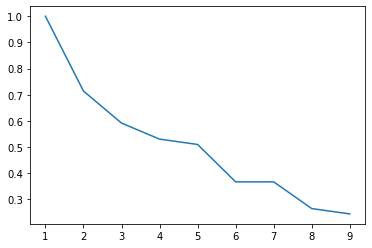

In [658]:
plt.plot(range(1,10),acc)

# 60) location_KR Puram

In [659]:
df60 = df[df['location_KR Puram']==1]

In [660]:
df60 = df60[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [661]:
df60

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
3494     2      0.0   5680          1277.5    2     4446.183953   
3495     2      2.0   3900           930.0    2     4193.548387   
3496     2      2.0   4274          1155.0    2     3700.432900   
3497     2      1.0   4655          1225.0    2     3800.000000   
3498     2      1.0   4700          1100.0    2     4272.727273   
...    ...      ...    ...             ...  ...             ...   
3550     2      1.0   3990          1100.0    2     3627.272727   
3551     6      1.0  11000          2800.0    7     3928.571429   
3552     2      2.0   3900          1020.0    2     3823.529412   
3553     2      0.0   7500          1200.0    2     6250.000000   
3554     2      1.0   6000          1245.0    2     4819.277108   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
3494                              1                        0   
3495                              0                        1   
3496                              1                        0   
3497                              1                        0   
3498                              1                        0   
...                             ...                      ...   
3550                              0                        1   
3551                              0                        1   
3552                              1                        0   
3553                              0                        0   
3554                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
3494                    0                           1  
3495                    0                           1  
3496                    0                           1  
3497                    0                           1  
3498                    0                           0  
...                   ...                         ...  
3550                    0                           1  
3551                    0                           1  
3552                    0                           1  
3553                    1                           1  
3554                    0                           1  

[61 rows x 10 columns]

In [662]:
df60.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.177922  0.774853        0.908405   
balcony                        0.177922  1.000000  0.078660        0.137376   
price                          0.774853  0.078660  1.000000        0.923079   
total_sqft_int                 0.908405  0.137376  0.923079        1.000000   
bhk                            0.984914  0.158106  0.763110        0.897275   
price_per_sqft                 0.072120 -0.150136  0.500363        0.186740   
area_typeSuper built-up  Area -0.149887  0.172087  0.016033       -0.055667   
area_typeBuilt-up  Area        0.254041  0.087448 -0.012286        0.118970   
area_typePlot  Area           -0.120281 -0.410761  0.071324       -0.036569   
availability_Ready To Move    -0.246633  0.034397 -0.092399       -0.163077   

                                    bhk  price_per_sqft  \
bath                           0.984914        0.072120   
balcony                        0.158106       -0.150136   
price                          0.763110        0.500363   
total_sqft_int                 0.897275        0.186740   
bhk                            1.000000        0.077313   
price_per_sqft                 0.077313        1.000000   
area_typeSuper built-up  Area -0.166237        0.126236   
area_typeBuilt-up  Area        0.248929       -0.311163   
area_typePlot  Area           -0.079156        0.392880   
availability_Ready To Move    -0.223843        0.108646   

                               area_typeSuper built-up  Area  \
bath                                               -0.149887   
balcony                                             0.172087   
price                                               0.016033   
total_sqft_int                                     -0.055667   
bhk                                                -0.166237   
price_per_sqft                                      0.126236   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.771780   
area_typePlot  Area                                -0.371011   
availability_Ready To Move                         -0.040641   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.254041            -0.120281   
balcony                                       0.087448            -0.410761   
price                                        -0.012286             0.071324   
total_sqft_int                                0.118970            -0.036569   
bhk                                           0.248929            -0.079156   
price_per_sqft                               -0.311163             0.392880   
area_typeSuper built-up  Area                -0.771780            -0.371011   
area_typeBuilt-up  Area                       1.000000            -0.185733   
area_typePlot  Area                          -0.185733             1.000000   
availability_Ready To Move                   -0.040255             0.098693   

                               availability_Ready To Move  
bath                                            -0.246633  
balcony                                          0.034397  
price                                           -0.092399  
total_sqft_int                                  -0.163077  
bhk                                             -0.223843  
price_per_sqft                                   0.108646  
area_typeSuper built-up  Area                   -0.040641  
area_typeBuilt-up  Area                         -0.040255  
area_typePlot  Area                              0.098693  
availability_Ready To Move                       1.000000

In [663]:
x = df60[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df60[['price']]

In [664]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5245901639344263]
k= 3 [1.0, 0.5245901639344263, 0.3114754098360656]
k= 4 [1.0, 0.5245901639344263, 0.3114754098360656, 0.2459016393442623]
k= 5 [1.0, 0.5245901639344263, 0.3114754098360656, 0.2459016393442623, 0.19672131147540983]
k= 6 [1.0, 0.5245901639344263, 0.3114754098360656, 0.2459016393442623, 0.19672131147540983, 0.18032786885245902]
k= 7 [1.0, 0.5245901639344263, 0.3114754098360656, 0.2459016393442623, 0.19672131147540983, 0.18032786885245902, 0.16393442622950818]
k= 8 [1.0, 0.5245901639344263, 0.3114754098360656, 0.2459016393442623, 0.19672131147540983, 0.18032786885245902, 0.16393442622950818, 0.16393442622950818]
k= 9 [1.0, 0.5245901639344263, 0.3114754098360656, 0.2459016393442623, 0.19672131147540983, 0.18032786885245902, 0.16393442622950818, 0.16393442622950818, 0.14754098360655737]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [665]:
max(acc)

1.0

In [666]:
k = acc.index(max(acc))+1
k

1

In [667]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


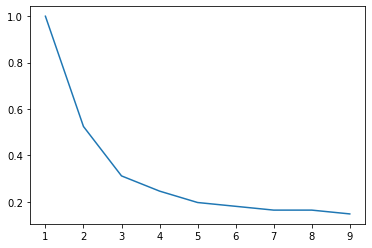

In [668]:
plt.plot(range(1,10),acc)

# 61) location_Kudlu

In [669]:
df61 = df[df['location_Kudlu']==1]

In [670]:
df61 = df61[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [671]:
df61

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
4264     2      1.0   5350          1152.0    2     4644.097222   
4265     2      2.0   4300          1027.0    2     4186.952288   
4266     2      2.0   4400          1092.0    2     4029.304029   
4267     2      2.0   4300          1027.0    2     4186.952288   
4268     2      2.0   4400          1092.0    2     4029.304029   
4269     2      1.0   5500          1143.0    2     4811.898513   
4270     2      2.0   4400          1024.0    2     4296.875000   
4271     3      3.0   7900          1600.0    3     4937.500000   
4272     2      2.0   4200          1027.0    2     4089.581305   
4273     2      1.0   5000          1076.0    2     4646.840149   
4274     2      2.0   4400          1027.0    2     4284.323272   
4275     2      1.0   5300          1084.0    2     4889.298893   
4276     2      2.0   5600          1300.0    2     4307.692308   
4277     2      2.0   4400          1027.0    2     4284.323272   
4278     2      1.0   6000          1245.0    3     4819.277108   
4279     2      1.0   4400          1027.0    2     4284.323272   
4280     2      1.0   4600          1110.0    2     4144.144144   
4281     3      1.0  11400          2100.0    4     5428.571429   
4282     2      2.0   4400          1027.0    2     4284.323272   
4283     1      1.0   3300           720.0    1     4583.333333   
4284     2      2.0   4400          1027.0    2     4284.323272   
4285     2      1.0   5200          1162.0    2     4475.043029   
4286     2      1.0   5300          1041.0    2     5091.258405   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
4264                              1                        0   
4265                              1                        0   
4266                              1                        0   
4267                              1                        0   
4268                              1                        0   
4269                              1                        0   
4270                              1                        0   
4271                              0                        1   
4272                              1                        0   
4273                              0                        1   
4274                              1                        0   
4275                              1                        0   
4276                              0                        1   
4277                              0                        1   
4278                              0                        0   
4279                              1                        0   
4280                              0                        1   
4281                              1                        0   
4282                              1                        0   
4283                              1                        0   
4284                              1                        0   
4285                              1                        0   
4286                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
4264                    0                           1  
4265                    0                           1  
4266                    0                           1  
4267                    0                           1  
4268                    0                           1  
4269                    0                           1  
4270                    0                           1  
4271                    0                           1  
4272                    0                           1  
4273                    0                           1  
4274                    0                           1  
4275                    0                           1  
4276                    0                           1  
4277                    0                           1  
4278                

In [672]:
df61.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.301650  0.826038        0.879496   
balcony                        0.301650  1.000000 -0.092279        0.033407   
price                          0.826038 -0.092279  1.000000        0.976835   
total_sqft_int                 0.879496  0.033407  0.976835        1.000000   
bhk                            0.875415  0.042798  0.914045        0.929984   
price_per_sqft                 0.434917 -0.433301  0.757258        0.607244   
area_typeSuper built-up  Area -0.204124 -0.104489 -0.161621       -0.208266   
area_typeBuilt-up  Area        0.230089  0.214529  0.115809        0.177020   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move          NaN       NaN       NaN             NaN   

                                    bhk  price_per_sqft  \
bath                           0.875415        0.434917   
balcony                        0.042798       -0.433301   
price                          0.914045        0.757258   
total_sqft_int                 0.929984        0.607244   
bhk                            1.000000        0.578670   
price_per_sqft                 0.578670        1.000000   
area_typeSuper built-up  Area -0.224872       -0.072217   
area_typeBuilt-up  Area        0.068399       -0.021765   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move          NaN             NaN   

                               area_typeSuper built-up  Area  \
bath                                               -0.204124   
balcony                                            -0.104489   
price                                              -0.161621   
total_sqft_int                                     -0.208266   
bhk                                                -0.224872   
price_per_sqft                                     -0.072217   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.887151   
area_typePlot  Area                                      NaN   
availability_Ready To Move                               NaN   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.230089                  NaN   
balcony                                       0.214529                  NaN   
price                                         0.115809                  NaN   
total_sqft_int                                0.177020                  NaN   
bhk                                           0.068399                  NaN   
price_per_sqft                               -0.021765                  NaN   
area_typeSuper built-up  Area                -0.887151                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                         NaN                  NaN   

                               availability_Ready To Move  
bath                                                  NaN  
balcony                                               NaN  
price                                                 NaN  
total_sqft_int                                        NaN  
bhk                                                   NaN  
price_per_sqft                                        NaN  
area_typeSuper built-up  Area                         NaN  
area_typeBuilt-up  Area                               NaN  
area_typePlot  Area                                   NaN  
availability_Ready To Move                            NaN

In [673]:
x = df61[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df61[['price']]

In [674]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

k= 1 [1.0]
k= 2 [1.0, 0.6956521739130435]
k= 3 [1.0, 0.6956521739130435, 0.6086956521739131]
k= 4 [1.0, 0.6956521739130435, 0.6086956521739131, 0.5652173913043478]
k= 5 [1.0, 0.6956521739130435, 0.6086956521739131, 0.5652173913043478, 0.5652173913043478]
k= 6 [1.0, 0.6956521739130435, 0.6086956521739131, 0.5652173913043478, 0.5652173913043478, 0.4782608695652174]
k= 7 [1.0, 0.6956521739130435, 0.6086956521739131, 0.5652173913043478, 0.5652173913043478, 0.4782608695652174, 0.43478260869565216]
k= 8 [1.0, 0.6956521739130435, 0.6086956521739131, 0.5652173913043478, 0.5652173913043478, 0.4782608695652174, 0.43478260869565216, 0.43478260869565216]
k= 9 [1.0, 0.6956521739130435, 0.6086956521739131, 0.5652173913043478, 0.5652173913043478, 0.4782608695652174, 0.43478260869565216, 0.43478260869565216, 0.43478260869565216]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [675]:
max(acc)

1.0

In [676]:
k = acc.index(max(acc))+1
k

1

In [677]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


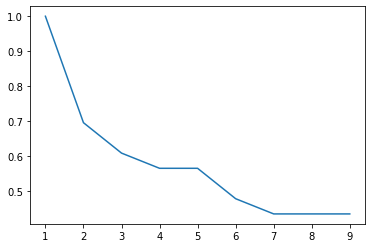

In [678]:
plt.plot(range(1,10),acc)

# 62) location_Kudlu Gate

In [679]:
df62 = df[df['location_Kudlu Gate']==1]

In [680]:
df62 = df62[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [681]:
df62

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
4287     3      2.0   8300          1535.0    3     5407.166124   
4288     3      2.0   8500          1535.0    3     5537.459283   
4289     3      2.0   8600          1535.0    3     5602.605863   
4290     2      1.0   9200          1564.0    3     5882.352941   
4291     2      3.0   5500          1238.0    2     4442.649435   
4292     3      2.0   8900          1335.0    3     6666.666667   
4293     1      1.0   5200           703.0    1     7396.870555   
4294     3      2.0   8600          1535.0    3     5602.605863   
4295     3      2.0   8300          1532.0    3     5417.754569   
4296     2      1.0   5000          1113.0    2     4492.362983   
4297     2      1.0   5000          1185.0    2     4219.409283   
4298     2      1.0   4500          1215.0    2     3703.703704   
4299     2      1.0   3825           812.0    2     4710.591133   
4300     2      2.0  10300          1547.0    2     6658.047835   
4301     2      1.0   8600          1336.0    2     6437.125749   
4302     3      2.0  12100          1919.0    3     6305.367379   
4303     3      3.0   5600          1464.0    2     3825.136612   
4304     3      2.0   8500          1535.0    3     5537.459283   
4305     3      2.0  12000          1850.0    3     6486.486486   
4306     2      1.0   6956           940.0    2     7401.063830   
4307     2      1.0   4496          1215.0    2     3700.411523   
4308     2      2.0   7500          1164.0    2     6443.298969   
4309     2      1.0   7954          1183.0    2     6723.584108   
4310     3      2.0  11000          1850.0    3     5945.945946   
4311     2      1.0   7954          1183.0    2     6723.584108   
4312     2      1.0   4440          1200.0    2     3700.000000   
4313     2      2.0   5300          1310.0    2     4045.801527   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
4287                              1                        0   
4288                              1                        0   
4289                              1                        0   
4290                              1                        0   
4291                              1                        0   
4292                              0                        1   
4293                              1                        0   
4294                              1                        0   
4295                              1                        0   
4296                              1                        0   
4297                              1                        0   
4298                              1                        0   
4299                              0                        1   
4300                              1                        0   
4301                              0                        1   
4302                              0                        1   
4303                              1                        0   
4304                              1                        0   
4305                              1                        0   
4306                              1                        0   
4307                              1                        0   
4308                              0                        1   
4309                              1                        0   
4310                              1                        0   
4311                              1                        0   
4312                              1                        0   
4313                              0                        1   

      area_typePlot  Area  availability_Ready To Move  
4287                    0                           1  
4288                    0                           1  
4289                    0                           1  
4290                    0                           0  
4291                    0                           1  


In [682]:
df62.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.617127  0.586215        0.785135   
balcony                        0.617127  1.000000  0.332097        0.536950   
price                          0.586215  0.332097  1.000000        0.801324   
total_sqft_int                 0.785135  0.536950  0.801324        1.000000   
bhk                            0.879464  0.400732  0.689976        0.808287   
price_per_sqft                -0.014711 -0.085147  0.633129        0.055470   
area_typeSuper built-up  Area  0.035714 -0.032059 -0.050279        0.074840   
area_typeBuilt-up  Area       -0.035714  0.032059  0.050279       -0.074840   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move     0.282038  0.357148 -0.452518       -0.079449   

                                    bhk  price_per_sqft  \
bath                           0.879464       -0.014711   
balcony                        0.400732       -0.085147   
price                          0.689976        0.633129   
total_sqft_int                 0.808287        0.055470   
bhk                            1.000000        0.104836   
price_per_sqft                 0.104836        1.000000   
area_typeSuper built-up  Area  0.035714       -0.115780   
area_typeBuilt-up  Area       -0.035714        0.115780   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move     0.146055       -0.638716   

                               area_typeSuper built-up  Area  \
bath                                                0.035714   
balcony                                            -0.032059   
price                                              -0.050279   
total_sqft_int                                      0.074840   
bhk                                                 0.035714   
price_per_sqft                                     -0.115780   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.080582   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.035714                  NaN   
balcony                                       0.032059                  NaN   
price                                         0.050279                  NaN   
total_sqft_int                               -0.074840                  NaN   
bhk                                          -0.035714                  NaN   
price_per_sqft                                0.115780                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.080582                  NaN   

                               availability_Ready To Move  
bath                                             0.282038  
balcony                                          0.357148  
price                                           -0.452518  
total_sqft_int                                  -0.079449  
bhk                                              0.146055  
price_per_sqft                                  -0.638716  
area_typeSuper built-up  Area                   -0.080582  
area_typeBuilt-up  Area                          0.080582  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [683]:
x = df62[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df62[['price']]

In [684]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5925925925925926]
k= 3 [1.0, 0.5925925925925926, 0.5185185185185185]
k= 4 [1.0, 0.5925925925925926, 0.5185185185185185, 0.3333333333333333]
k= 5 [1.0, 0.5925925925925926, 0.5185185185185185, 0.3333333333333333, 0.3333333333333333]
k= 6 [1.0, 0.5925925925925926, 0.5185185185185185, 0.3333333333333333, 0.3333333333333333, 0.25925925925925924]
k= 7 [1.0, 0.5925925925925926, 0.5185185185185185, 0.3333333333333333, 0.3333333333333333, 0.25925925925925924, 0.25925925925925924]
k= 8 [1.0, 0.5925925925925926, 0.5185185185185185, 0.3333333333333333, 0.3333333333333333, 0.25925925925925924, 0.25925925925925924, 0.2222222222222222]
k= 9 [1.0, 0.5925925925925926, 0.5185185185185185, 0.3333333333333333, 0.3333333333333333, 0.25925925925925924, 0.25925925925925924, 0.2222222222222222, 0.2222222222222222]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [685]:
max(acc)

1.0

In [686]:
k = acc.index(max(acc))+1
k

1

In [687]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


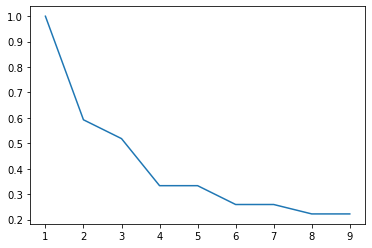

In [688]:
plt.plot(range(1,10),acc)

# 63) location_Kundalahalli

In [689]:
df63 = df[df['location_Kundalahalli']==1]

In [690]:
df63 = df63[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [691]:
df63

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
4335     3      2.0  12500          1724.0    3     7250.580046   
4336     2      2.0   4900          1030.0    2     4757.281553   
4337     2      1.0   5799           735.0    2     7889.795918   
4338     2      1.0   8200          1047.0    2     7831.900669   
4339     3      3.0  10500          1397.0    3     7516.105941   
4340     3      2.0  12700          1724.0    3     7366.589327   
4341     2      1.0   4927          1010.0    2     4878.217822   
4342     3      2.0  11000          1397.0    3     7874.015748   
4343     3      2.0  10400          1397.0    3     7444.523980   
4344     3      3.0  10800          1397.0    3     7730.851825   
4345     3      2.0  15000          1920.0    3     7812.500000   
4346     3      3.0  10500          1397.0    3     7516.105941   
4347     3      2.0  12400          1724.0    3     7192.575406   
4348     2      1.0   8400          1047.0    2     8022.922636   
4349     2      1.0   8300          1047.0    2     7927.411652   
4350     4      3.0  55000          7000.0    4     7857.142857   
4351     2      1.0   5376          1120.0    2     4800.000000   
4352     2      1.0   8262          1047.0    2     7891.117479   
4353     2      1.0   9100          1047.0    2     8691.499522   
4354     3      1.0  14600          1724.0    3     8468.677494   
4355     3      2.0  17000          1600.0    3    10625.000000   
4356     3      1.0  12500          1724.0    3     7250.580046   
4357     2      1.0   4827          1010.0    2     4779.207921   
4358     2      1.0   8900          1047.0    2     8500.477555   
4359     5      2.0  24500          2500.0    4     9800.000000   
4360     3      3.0  10500          1397.0    3     7516.105941   
4361     2      1.0   7200          1047.0    2     6876.790831   
4362     2      0.0   5800          1260.0    2     4603.174603   
4363     4      3.0  23000          3092.0    4     7438.551100   
4364     2      1.0   7000          1065.0    2     6572.769953   
4365     3      1.0  14600          1724.0    3     8468.677494   
4366     2      2.0   9100          1047.0    2     8691.499522   
4367     3      2.0  12800          1724.0    3     7424.593968   
4368     2      3.0   7400          1315.0    2     5627.376426   
4369     3      2.0  15000          2100.0    3     7142.857143   
4370     3      1.0  12500          1724.0    3     7250.580046   
4371     3      3.0  14000          1724.0    3     8120.649652   
4372     2      1.0   6500          1175.0    2     5531.914894   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
4335                              1                        0   
4336                              0                        1   
4337                              1                        0   
4338                              0                        1   
4339                              1                        0   
4340                              1                        0   
4341                              1                        0   
4342                              1                        0   
4343                              1                        0   
4344                              1                        0   
4345                              1                        0   
4346                              1                        0   
4347                              1                        0   
4348                              1                        0   
4349                              1                        0   
4350                              0                        0   
4351                              1                        0   
4352                              1                        0   
4353                              1                        0   
4354                              1                        0   
4355                              0             

In [692]:
df63.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.559144  0.728165        0.662281   
balcony                        0.559144  1.000000  0.435131        0.424029   
price                          0.728165  0.435131  1.000000        0.977228   
total_sqft_int                 0.662281  0.424029  0.977228        1.000000   
bhk                            0.976892  0.610354  0.750570        0.701915   
price_per_sqft                 0.463018  0.220246  0.388507        0.193568   
area_typeSuper built-up  Area -0.272754 -0.045454 -0.395514       -0.398115   
area_typeBuilt-up  Area       -0.097849 -0.110600 -0.064213        0.006333   
area_typePlot  Area            0.562344  0.221222  0.710405        0.619111   
availability_Ready To Move    -0.121540 -0.064873  0.012103        0.056072   

                                    bhk  price_per_sqft  \
bath                           0.976892        0.463018   
balcony                        0.610354        0.220246   
price                          0.750570        0.388507   
total_sqft_int                 0.701915        0.193568   
bhk                            1.000000        0.440269   
price_per_sqft                 0.440269        1.000000   
area_typeSuper built-up  Area -0.229363       -0.026082   
area_typeBuilt-up  Area       -0.091166       -0.307268   
area_typePlot  Area            0.484895        0.456623   
availability_Ready To Move    -0.161050       -0.236437   

                               area_typeSuper built-up  Area  \
bath                                               -0.272754   
balcony                                            -0.045454   
price                                              -0.395514   
total_sqft_int                                     -0.398115   
bhk                                                -0.229363   
price_per_sqft                                     -0.026082   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.777282   
area_typePlot  Area                                -0.525538   
availability_Ready To Move                         -0.192355   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.097849             0.562344   
balcony                                      -0.110600             0.221222   
price                                        -0.064213             0.710405   
total_sqft_int                                0.006333             0.619111   
bhk                                          -0.091166             0.484895   
price_per_sqft                               -0.307268             0.456623   
area_typeSuper built-up  Area                -0.777282            -0.525538   
area_typeBuilt-up  Area                       1.000000            -0.126773   
area_typePlot  Area                          -0.126773             1.000000   
availability_Ready To Move                    0.094884             0.174964   

                               availability_Ready To Move  
bath                                            -0.121540  
balcony                                         -0.064873  
price                                            0.012103  
total_sqft_int                                   0.056072  
bhk                                             -0.161050  
price_per_sqft                                  -0.236437  
area_typeSuper built-up  Area                   -0.192355  
area_typeBuilt-up  Area                          0.094884  
area_typePlot  Area                              0.174964  
availability_Ready To Move                       1.000000

In [693]:
x = df63[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df63[['price']]

In [694]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6052631578947368]
k= 3 [1.0, 0.6052631578947368, 0.3684210526315789]
k= 4 [1.0, 0.6052631578947368, 0.3684210526315789, 0.3684210526315789]
k= 5 [1.0, 0.6052631578947368, 0.3684210526315789, 0.3684210526315789, 0.34210526315789475]
k= 6 [1.0, 0.6052631578947368, 0.3684210526315789, 0.3684210526315789, 0.34210526315789475, 0.3157894736842105]
k= 7 [1.0, 0.6052631578947368, 0.3684210526315789, 0.3684210526315789, 0.34210526315789475, 0.3157894736842105, 0.3157894736842105]
k= 8 [1.0, 0.6052631578947368, 0.3684210526315789, 0.3684210526315789, 0.34210526315789475, 0.3157894736842105, 0.3157894736842105, 0.2631578947368421]
k= 9 [1.0, 0.6052631578947368, 0.3684210526315789, 0.3684210526315789, 0.34210526315789475, 0.3157894736842105, 0.3157894736842105, 0.2631578947368421, 0.2631578947368421]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [695]:
max(acc)

1.0

In [696]:
k = acc.index(max(acc))+1
k

1

In [697]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


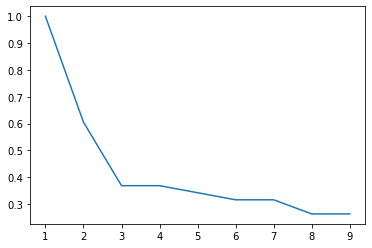

In [698]:
plt.plot(range(1,10),acc)

# 64) location_Lakshminarayana Pura

In [699]:
df64 = df[df['location_Lakshminarayana Pura']==1]

In [700]:
df64 = df64[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [701]:
df64

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
4395     2      2.0   7500          1185.0    2     6329.113924   
4396     2      1.0  10800          1600.0    3     6750.000000   
4397     2      2.0   7500          1180.0    2     6355.932203   
4398     2      2.0   8200          1172.0    2     6996.587031   
4399     2      1.0   7500          1179.0    2     6361.323155   
4400     2      1.0   7500          1149.0    2     6527.415144   
4401     2      2.0  10000          1336.0    2     7485.029940   
4402     2      2.0   7500          1175.0    2     6382.978723   
4403     2      1.0   7500          1190.0    2     6302.521008   
4404     2      1.0   7500          1200.0    2     6250.000000   
4405     2      2.0   7500          1200.0    2     6250.000000   
4406     2      2.0   7500          1165.0    2     6437.768240   
4407     2      1.0   7500          1145.0    2     6550.218341   
4408     3      2.0  10400          1500.0    3     6933.333333   
4409     2      2.0   7500          1210.0    2     6198.347107   
4410     2      2.0   7500          1169.0    2     6415.739949   
4411     2      1.0   7500          1200.0    2     6250.000000   
4412     2      1.0   7500          1172.0    2     6399.317406   
4413     2      2.0   7500          1172.0    2     6399.317406   
4414     2      1.0   7500          1180.0    2     6355.932203   
4415     2      3.0   8300          1200.0    2     6916.666667   
4416     2      2.0   8000          1200.0    2     6666.666667   
4417     2      1.0   7500          1195.0    2     6276.150628   
4418     2      1.0   8000          1200.0    2     6666.666667   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
4395                              1                        0   
4396                              1                        0   
4397                              0                        1   
4398                              1                        0   
4399                              0                        1   
4400                              1                        0   
4401                              1                        0   
4402                              1                        0   
4403                              1                        0   
4404                              1                        0   
4405                              1                        0   
4406                              0                        1   
4407                              1                        0   
4408                              1                        0   
4409                              1                        0   
4410                              0                        1   
4411                              0                        1   
4412                              0                        1   
4413                              1                        0   
4414                              1                        0   
4415                              1                        0   
4416                              1                        0   
4417                              0                        1   
4418                              0                        1   

      area_typePlot  Area  availability_Ready To Move  
4395                    0                           1  
4396                    0                           1  
4397                    0                           1  
4398                    0                           1  
4399                    0                           1  
4400                    0                           1  
4401                    0                           1  
4402                    0                           1  
4403                    0                           1  
4404                    0                           1  
4405                    0                           1  
4406                    0                           1  
4

In [702]:
df64.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.152075  0.530509        0.549302   
balcony                        0.152075  1.000000  0.127094       -0.008570   
price                          0.530509  0.127094  1.000000        0.937469   
total_sqft_int                 0.549302 -0.008570  0.937469        1.000000   
bhk                            0.691564 -0.043980  0.830166        0.936000   
price_per_sqft                 0.285752  0.341985  0.746281        0.468410   
area_typeSuper built-up  Area  0.147442  0.257855  0.298814        0.247594   
area_typeBuilt-up  Area       -0.147442 -0.257855 -0.298814       -0.247594   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move          NaN       NaN       NaN             NaN   

                                    bhk  price_per_sqft  \
bath                           0.691564        0.285752   
balcony                       -0.043980        0.341985   
price                          0.830166        0.746281   
total_sqft_int                 0.936000        0.468410   
bhk                            1.000000        0.321772   
price_per_sqft                 0.321772        1.000000   
area_typeSuper built-up  Area  0.213201        0.289291   
area_typeBuilt-up  Area       -0.213201       -0.289291   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move          NaN             NaN   

                               area_typeSuper built-up  Area  \
bath                                                0.147442   
balcony                                             0.257855   
price                                               0.298814   
total_sqft_int                                      0.247594   
bhk                                                 0.213201   
price_per_sqft                                      0.289291   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                               NaN   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.147442                  NaN   
balcony                                      -0.257855                  NaN   
price                                        -0.298814                  NaN   
total_sqft_int                               -0.247594                  NaN   
bhk                                          -0.213201                  NaN   
price_per_sqft                               -0.289291                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                         NaN                  NaN   

                               availability_Ready To Move  
bath                                                  NaN  
balcony                                               NaN  
price                                                 NaN  
total_sqft_int                                        NaN  
bhk                                                   NaN  
price_per_sqft                                        NaN  
area_typeSuper built-up  Area                         NaN  
area_typeBuilt-up  Area                               NaN  
area_typePlot  Area                                   NaN  
availability_Ready To Move                            NaN

In [703]:
x = df64[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df64[['price']]

In [704]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.875]
k= 3 [1.0, 0.875, 0.7916666666666666]
k= 4 [1.0, 0.875, 0.7916666666666666, 0.7083333333333334]
k= 5 [1.0, 0.875, 0.7916666666666666, 0.7083333333333334, 0.7083333333333334]
k= 6 [1.0, 0.875, 0.7916666666666666, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334]
k= 7 [1.0, 0.875, 0.7916666666666666, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334]
k= 8 [1.0, 0.875, 0.7916666666666666, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334]
k= 9 [1.0, 0.875, 0.7916666666666666, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [705]:
max(acc)

1.0

In [706]:
k = acc.index(max(acc))+1
k

1

In [707]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


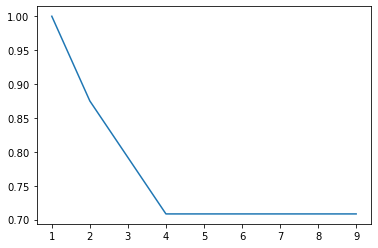

In [708]:
plt.plot(range(1,10),acc)

# 65) location_Mahadevpura

In [709]:
df65 = df[df['location_Mahadevpura']==1]

In [710]:
df65 = df65[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [711]:
df65

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
4475     2      3.0   5200          1150.0    2     4521.739130   
4476     2      3.0   5200          1250.0    2     4160.000000   
4477     2      3.0   5760          1260.0    2     4571.428571   
4478     1      1.0   3500           730.0    1     4794.520548   
4479     2      1.0   6739          1434.0    3     4699.442120   
4480     2      1.0   5380          1146.0    2     4694.589878   
4481     2      2.0   6200          1532.0    2     4046.997389   
4482     2      1.0   7600          1620.0    3     4691.358025   
4483     2      3.0   6450          1136.0    2     5677.816901   
4484     2      2.0   6580          1400.0    3     4700.000000   
4485     2      1.0   5340          1137.0    2     4696.569921   
4486     3      2.0   9500          1601.0    3     5933.791380   
4487     3      2.0   7500          1450.0    3     5172.413793   
4488     2      1.0   5400          1152.0    2     4687.500000   
4489     2      1.0   5690          1212.0    2     4694.719472   
4490     3      2.0   7800          1505.0    3     5182.724252   
4491     2      1.0   7000          1500.0    3     4666.666667   
4492     2      1.0   5800          1236.0    2     4692.556634   
4493     2      1.0   5800          1236.0    2     4692.556634   
4494     2      2.0   5300          1120.0    2     4732.142857   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
4475                              1                        0   
4476                              1                        0   
4477                              1                        0   
4478                              1                        0   
4479                              1                        0   
4480                              1                        0   
4481                              1                        0   
4482                              1                        0   
4483                              1                        0   
4484                              1                        0   
4485                              1                        0   
4486                              1                        0   
4487                              1                        0   
4488                              1                        0   
4489                              1                        0   
4490                              1                        0   
4491                              1                        0   
4492                              1                        0   
4493                              1                        0   
4494                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
4475                    0                           1  
4476                    0                           1  
4477                    0                           1  
4478                    0                           1  
4479                    0                           1  
4480                    0                           1  
4481                    0                           1  
4482                    0                           1  
4483                    0                           1  
4484                    0                           1  
4485                    0                           1  
4486                    0                           1  
4487                    0                           1  
4488                    0                           1  
4489                    0                           1  
4490                    0                           1  
4491                    0                           1  
4492                    0                           1  
4493                    0                           1  
4494                    0                           1

In [712]:
df65.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.234989  0.820301        0.682401   
balcony                        0.234989  1.000000  0.076046        0.041317   
price                          0.820301  0.076046  1.000000        0.878467   
total_sqft_int                 0.682401  0.041317  0.878467        1.000000   
bhk                            0.700473 -0.022996  0.870354        0.874268   
price_per_sqft                 0.522498  0.096021  0.588383        0.135872   
area_typeSuper built-up  Area       NaN       NaN       NaN             NaN   
area_typeBuilt-up  Area             NaN       NaN       NaN             NaN   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move          NaN       NaN       NaN             NaN   

                                    bhk  price_per_sqft  \
bath                           0.700473        0.522498   
balcony                       -0.022996        0.096021   
price                          0.870354        0.588383   
total_sqft_int                 0.874268        0.135872   
bhk                            1.000000        0.327296   
price_per_sqft                 0.327296        1.000000   
area_typeSuper built-up  Area       NaN             NaN   
area_typeBuilt-up  Area             NaN             NaN   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move          NaN             NaN   

                               area_typeSuper built-up  Area  \
bath                                                     NaN   
balcony                                                  NaN   
price                                                    NaN   
total_sqft_int                                           NaN   
bhk                                                      NaN   
price_per_sqft                                           NaN   
area_typeSuper built-up  Area                            NaN   
area_typeBuilt-up  Area                                  NaN   
area_typePlot  Area                                      NaN   
availability_Ready To Move                               NaN   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                               NaN                  NaN   
balcony                                            NaN                  NaN   
price                                              NaN                  NaN   
total_sqft_int                                     NaN                  NaN   
bhk                                                NaN                  NaN   
price_per_sqft                                     NaN                  NaN   
area_typeSuper built-up  Area                      NaN                  NaN   
area_typeBuilt-up  Area                            NaN                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                         NaN                  NaN   

                               availability_Ready To Move  
bath                                                  NaN  
balcony                                               NaN  
price                                                 NaN  
total_sqft_int                                        NaN  
bhk                                                   NaN  
price_per_sqft                                        NaN  
area_typeSuper built-up  Area                         NaN  
area_typeBuilt-up  Area                               NaN  
area_typePlot  Area                                   NaN  
availability_Ready To Move                            NaN

In [713]:
x = df65[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df65[['price']]

In [714]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.55]
k= 3 [1.0, 0.55, 0.45]
k= 4 [1.0, 0.55, 0.45, 0.35]
k= 5 [1.0, 0.55, 0.45, 0.35, 0.3]
k= 6 [1.0, 0.55, 0.45, 0.35, 0.3, 0.3]
k= 7 [1.0, 0.55, 0.45, 0.35, 0.3, 0.3, 0.25]
k= 8 [1.0, 0.55, 0.45, 0.35, 0.3, 0.3, 0.25, 0.2]
k= 9 [1.0, 0.55, 0.45, 0.35, 0.3, 0.3, 0.25, 0.2, 0.15]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [715]:
max(acc)

1.0

In [716]:
k = acc.index(max(acc))+1
k

1

In [717]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


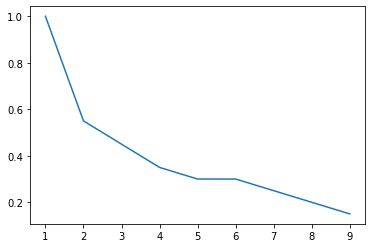

In [718]:
plt.plot(range(1,10),acc)

# 66) location_Malleshwaram

In [719]:
df66 = df[df['location_Malleshwaram']==1]

In [720]:
df66 = df66[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [721]:
df66

bath   balcony   price  total_sqft_int  bhk  price_per_sqft  \
4533     1  2.000000    6700           705.0    1     9503.546099   
4534     7  3.000000  220000         12000.0    7    18333.333330   
4535     5  2.000000   32500          2500.0    4    13000.000000   
4536     3  1.584376   29700          2006.0    3    14805.583250   
4537     1  1.000000    6250           686.0    1     9110.787172   
4538     4  3.000000   33200          2475.0    3    13414.141410   
4539     3  1.584376   39900          2610.0    3    15287.356320   
4540     4  3.000000   32000          2475.0    3    12929.292930   
4541     2  1.000000    9500           900.0    2    10555.555560   
4542     2  1.000000   15800          1420.0    2    11126.760560   
4543     3  2.000000   25000          2000.0    3    12500.000000   
4544     3  1.000000   27500          2215.0    3    12415.349890   
4545     3  3.000000   16000          1600.0    3    10000.000000   
4546     4  3.000000   30000          2475.0    3    12121.212120   
4547     4  1.000000   31000          2215.0    3    13995.485330   
4548     1  1.000000    6000           480.0    1    12500.000000   
4549     2  1.000000   12000          1290.0    2     9302.325581   
4550     4  3.000000   32600          2475.0    3    13171.717170   
4551     3  3.000000   33700          2476.0    3    13610.662360   
4552     2  1.000000    9000           900.0    2    10000.000000   
4553     4  1.584376   27000          2050.0    3    13170.731710   
4554     2  1.000000    7200           900.0    2     8000.000000   
4555     1  1.000000    8680           620.0    1    14000.000000   
4556     4  3.000000   33700          2475.0    3    13616.161620   
4557     3  2.000000   27500          2215.0    3    12415.349890   
4558     3  2.000000   33000          2215.0    3    14898.419860   
4559     2  1.000000    8000          1020.0    2     7843.137255   
4560     3  2.000000   27500          2200.0    3    12500.000000   
4561     4  3.000000   32600          2475.0    3    13171.717170   
4562     2  1.584376   14000          1500.0    2     9333.333333   
4563     4  3.000000   34000          2475.0    3    13737.373740   
4564     2  1.000000   19000          1400.0    2    13571.428570   
4565     4  3.000000   30000          2475.0    3    12121.212120   
4566     3  2.000000   38000          2400.0    3    15833.333330   
4567     2  3.000000   12500          1410.0    2     8865.248227   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
4533                              1                        0   
4534                              1                        0   
4535                              0                        1   
4536                              0                        1   
4537                              1                        0   
4538                              1                        0   
4539                              1                        0   
4540                              1                        0   
4541                              1                        0   
4542                              1                        0   
4543                              0                        1   
4544                              1                        0   
4545                              1                        0   
4546                              1                        0   
4547                              1                        0   
4548                              1                        0   
4549                              1                        0   
4550                              1                        0   
4551                              1                        0   
4552                              0                        1   
4553                              1                        0   
4554                              0                        1   
4555                              1              

In [722]:
df66.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.624005  0.744291        0.791808   
balcony                        0.624005  1.000000  0.376835        0.435453   
price                          0.744291  0.376835  1.000000        0.994654   
total_sqft_int                 0.791808  0.435453  0.994654        1.000000   
bhk                            0.934729  0.518917  0.869519        0.902800   
price_per_sqft                 0.630003  0.311657  0.644500        0.629247   
area_typeSuper built-up  Area -0.010370  0.192616  0.089357        0.088553   
area_typeBuilt-up  Area        0.010370 -0.192616 -0.089357       -0.088553   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move    -0.551286 -0.214227 -0.950500       -0.928746   

                                    bhk  price_per_sqft  \
bath                           0.934729        0.630003   
balcony                        0.518917        0.311657   
price                          0.869519        0.644500   
total_sqft_int                 0.902800        0.629247   
bhk                            1.000000        0.651807   
price_per_sqft                 0.651807        1.000000   
area_typeSuper built-up  Area -0.077029        0.099072   
area_typeBuilt-up  Area        0.077029       -0.099072   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move    -0.715867       -0.444389   

                               area_typeSuper built-up  Area  \
bath                                               -0.010370   
balcony                                             0.192616   
price                                               0.089357   
total_sqft_int                                      0.088553   
bhk                                                -0.077029   
price_per_sqft                                      0.099072   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.078008   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.010370                  NaN   
balcony                                      -0.192616                  NaN   
price                                        -0.089357                  NaN   
total_sqft_int                               -0.088553                  NaN   
bhk                                           0.077029                  NaN   
price_per_sqft                               -0.099072                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.078008                  NaN   

                               availability_Ready To Move  
bath                                            -0.551286  
balcony                                         -0.214227  
price                                           -0.950500  
total_sqft_int                                  -0.928746  
bhk                                             -0.715867  
price_per_sqft                                  -0.444389  
area_typeSuper built-up  Area                   -0.078008  
area_typeBuilt-up  Area                          0.078008  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [723]:
x = df66[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df66[['price']]

In [724]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6285714285714286]
k= 3 [1.0, 0.6285714285714286, 0.45714285714285713]
k= 4 [1.0, 0.6285714285714286, 0.45714285714285713, 0.2857142857142857]
k= 5 [1.0, 0.6285714285714286, 0.45714285714285713, 0.2857142857142857, 0.2857142857142857]
k= 6 [1.0, 0.6285714285714286, 0.45714285714285713, 0.2857142857142857, 0.2857142857142857, 0.22857142857142856]
k= 7 [1.0, 0.6285714285714286, 0.45714285714285713, 0.2857142857142857, 0.2857142857142857, 0.22857142857142856, 0.22857142857142856]
k= 8 [1.0, 0.6285714285714286, 0.45714285714285713, 0.2857142857142857, 0.2857142857142857, 0.22857142857142856, 0.22857142857142856, 0.17142857142857143]
k= 9 [1.0, 0.6285714285714286, 0.45714285714285713, 0.2857142857142857, 0.2857142857142857, 0.22857142857142856, 0.22857142857142856, 0.17142857142857143, 0.17142857142857143]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [725]:
max(acc)

1.0

In [726]:
k = acc.index(max(acc))+1
k

1

In [727]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


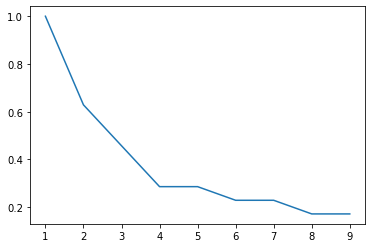

In [728]:
plt.plot(range(1,10),acc)

# 67) location_Marathahalli

In [729]:
df67 = df[df['location_Marathahalli']==1]

In [730]:
df67 = df67[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [731]:
df67

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
4582     2      1.0   5700          1220.0    2     4672.131148   
4583     2      2.0   5200          1200.0    2     4333.333333   
4584     2      2.0   6000          1200.0    2     5000.000000   
4585     3      2.0  14000          1933.0    3     7242.628039   
4586     2      1.0   4696           950.0    2     4943.157895   
...    ...      ...    ...             ...  ...             ...   
4693     2      2.0   8000          1270.0    2     6299.212598   
4694     2      1.0   5000          1100.0    2     4545.454545   
4695     2      2.0   5795          1196.0    2     4845.317726   
4696     2      2.0   9000          1485.0    3     6060.606061   
4697     2      1.0   6900          1146.0    2     6020.942408   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
4582                              1                        0   
4583                              1                        0   
4584                              1                        0   
4585                              1                        0   
4586                              1                        0   
...                             ...                      ...   
4693                              0                        1   
4694                              1                        0   
4695                              1                        0   
4696                              0                        1   
4697                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
4582                    0                           1  
4583                    0                           1  
4584                    0                           1  
4585                    0                           1  
4586                    0                           0  
...                   ...                         ...  
4693                    0                           1  
4694                    0                           1  
4695                    0                           1  
4696                    0                           1  
4697                    0                           0  

[116 rows x 10 columns]

In [732]:
df67.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.447429  0.853212        0.837572   
balcony                        0.447429  1.000000  0.454529        0.502460   
price                          0.853212  0.454529  1.000000        0.963782   
total_sqft_int                 0.837572  0.502460  0.963782        1.000000   
bhk                            0.927310  0.471734  0.864512        0.861338   
price_per_sqft                 0.470913  0.136666  0.661704        0.450674   
area_typeSuper built-up  Area  0.123897 -0.002550  0.058863        0.080866   
area_typeBuilt-up  Area       -0.123897  0.002550 -0.058863       -0.080866   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move     0.129598  0.295958  0.169473        0.184920   

                                    bhk  price_per_sqft  \
bath                           0.927310        0.470913   
balcony                        0.471734        0.136666   
price                          0.864512        0.661704   
total_sqft_int                 0.861338        0.450674   
bhk                            1.000000        0.466672   
price_per_sqft                 0.466672        1.000000   
area_typeSuper built-up  Area  0.091340       -0.053377   
area_typeBuilt-up  Area       -0.091340        0.053377   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move     0.163598        0.052142   

                               area_typeSuper built-up  Area  \
bath                                                0.123897   
balcony                                            -0.002550   
price                                               0.058863   
total_sqft_int                                      0.080866   
bhk                                                 0.091340   
price_per_sqft                                     -0.053377   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.174185   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.123897                  NaN   
balcony                                       0.002550                  NaN   
price                                        -0.058863                  NaN   
total_sqft_int                               -0.080866                  NaN   
bhk                                          -0.091340                  NaN   
price_per_sqft                                0.053377                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.174185                  NaN   

                               availability_Ready To Move  
bath                                             0.129598  
balcony                                          0.295958  
price                                            0.169473  
total_sqft_int                                   0.184920  
bhk                                              0.163598  
price_per_sqft                                   0.052142  
area_typeSuper built-up  Area                   -0.174185  
area_typeBuilt-up  Area                          0.174185  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [733]:
x = df67[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df67[['price']]

In [734]:
acc = []
for i in range(1,13):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.646551724137931]
k= 3 [1.0, 0.646551724137931, 0.41379310344827586]
k= 4 [1.0, 0.646551724137931, 0.41379310344827586, 0.3275862068965517]
k= 5 [1.0, 0.646551724137931, 0.41379310344827586, 0.3275862068965517, 0.27586206896551724]
k= 6 [1.0, 0.646551724137931, 0.41379310344827586, 0.3275862068965517, 0.27586206896551724, 0.2672413793103448]
k= 7 [1.0, 0.646551724137931, 0.41379310344827586, 0.3275862068965517, 0.27586206896551724, 0.2672413793103448, 0.25862068965517243]
k= 8 [1.0, 0.646551724137931, 0.41379310344827586, 0.3275862068965517, 0.27586206896551724, 0.2672413793103448, 0.25862068965517243, 0.25862068965517243]
k= 9 [1.0, 0.646551724137931, 0.41379310344827586, 0.3275862068965517, 0.27586206896551724, 0.2672413793103448, 0.25862068965517243, 0.25862068965517243, 0.27586206896551724]
k= 10 [1.0, 0.646551724137931, 0.41379310344827586, 0.3275862068965517, 0.27586206896551724, 0.2672413793103448, 0.25862068965517243, 0.25862068965517243, 0.27586206896551

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [735]:
max(acc)

1.0

In [736]:
k = acc.index(max(acc))+1
k

1

In [737]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


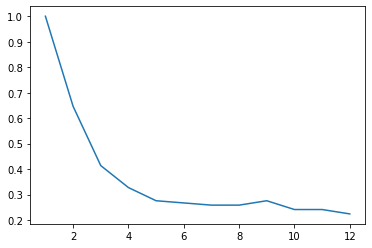

In [738]:
plt.plot(range(1,13),acc)

# 68) location_Mysore Road

In [739]:
df68 = df[df['location_Mysore Road']==1]

In [740]:
df68 = df68[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [741]:
df68

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
4783     2      2.0   7350          1175.0    2     6255.319149   
4784     4      2.0   9131          1710.0    3     5339.766082   
4785     2      1.0   4895          1020.0    2     4799.019608   
4786     2      1.0   7350          1175.0    2     6255.319149   
4787     2      1.0   4500          1070.0    2     4205.607477   
4788     2      1.0   5300          1239.0    2     4277.643261   
4789     2      1.0   6200          1060.0    2     5849.056604   
4790     2      1.0   4547           980.0    2     4639.795918   
4791     2      1.0   4000           883.0    2     4530.011325   
4792     3      2.0   9600          1525.0    3     6295.081967   
4793     2      3.0   6500          1200.0    2     5416.666667   
4794     2      1.0   4095           883.0    2     4637.599094   
4795     2      1.0   4965          1070.0    2     4640.186916   
4796     2      1.0   5000           883.0    2     5662.514156   
4797     2      1.0   5100          1155.0    2     4415.584416   
4798     2      1.0   4300          1003.0    2     4287.138584   
4799     2      2.0   7300          1237.0    2     5901.374293   
4800     2      1.0   4500           883.0    2     5096.262741   
4801     2      2.0   6500          1170.0    2     5555.555556   
4802     2      0.0   5085          1029.5    2     4939.776591   
4803     2      1.0   4361           940.0    2     4639.361702   
4804     2      2.0   4895          1020.0    2     4799.019608   
4805     2      2.0  10000          1568.0    3     6377.551020   
4806     2      2.0   7050          1175.0    2     6000.000000   
4807     2      1.0   6000          1080.0    3     5555.555556   
4808     2      1.0   3700           883.0    2     4190.260476   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
4783                              1                        0   
4784                              1                        0   
4785                              1                        0   
4786                              1                        0   
4787                              1                        0   
4788                              1                        0   
4789                              1                        0   
4790                              1                        0   
4791                              1                        0   
4792                              1                        0   
4793                              1                        0   
4794                              1                        0   
4795                              1                        0   
4796                              0                        1   
4797                              1                        0   
4798                              1                        0   
4799                              1                        0   
4800                              1                        0   
4801                              1                        0   
4802                              1                        0   
4803                              1                        0   
4804                              1                        0   
4805                              1                        0   
4806                              0                        1   
4807                              1                        0   
4808                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
4783                    0                           1  
4784                    0                           0  
4785                    0                           1  
4786                    0                           0  
4787                    0                           1  
4788                    0                           1  
4789                    0                           1  
4790               

In [742]:
df68.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.289208  0.544166        0.691984   
balcony                        0.289208  1.000000  0.618149        0.566801   
price                          0.544166  0.618149  1.000000        0.913231   
total_sqft_int                 0.691984  0.566801  0.913231        1.000000   
bhk                            0.639602  0.279281  0.700938        0.720970   
price_per_sqft                 0.184104  0.509229  0.821303        0.525954   
area_typeSuper built-up  Area  0.078730 -0.072028 -0.028565        0.119736   
area_typeBuilt-up  Area       -0.078730  0.072028  0.028565       -0.119736   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move    -0.212121  0.103964  0.058087       -0.023573   

                                    bhk  price_per_sqft  \
bath                           0.639602        0.184104   
balcony                        0.279281        0.509229   
price                          0.700938        0.821303   
total_sqft_int                 0.720970        0.525954   
bhk                            1.000000        0.427228   
price_per_sqft                 0.427228        1.000000   
area_typeSuper built-up  Area  0.123091       -0.264721   
area_typeBuilt-up  Area       -0.123091        0.264721   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move     0.053300        0.156402   

                               area_typeSuper built-up  Area  \
bath                                                0.078730   
balcony                                            -0.072028   
price                                              -0.028565   
total_sqft_int                                      0.119736   
bhk                                                 0.123091   
price_per_sqft                                     -0.264721   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.192450   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.078730                  NaN   
balcony                                       0.072028                  NaN   
price                                         0.028565                  NaN   
total_sqft_int                               -0.119736                  NaN   
bhk                                          -0.123091                  NaN   
price_per_sqft                                0.264721                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.192450                  NaN   

                               availability_Ready To Move  
bath                                            -0.212121  
balcony                                          0.103964  
price                                            0.058087  
total_sqft_int                                  -0.023573  
bhk                                              0.053300  
price_per_sqft                                   0.156402  
area_typeSuper built-up  Area                   -0.192450  
area_typeBuilt-up  Area                          0.192450  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [743]:
x = df68[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df68[['price']]

In [744]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6538461538461539]
k= 3 [1.0, 0.6538461538461539, 0.46153846153846156]
k= 4 [1.0, 0.6538461538461539, 0.46153846153846156, 0.34615384615384615]
k= 5 [1.0, 0.6538461538461539, 0.46153846153846156, 0.34615384615384615, 0.3076923076923077]
k= 6 [1.0, 0.6538461538461539, 0.46153846153846156, 0.34615384615384615, 0.3076923076923077, 0.3076923076923077]
k= 7 [1.0, 0.6538461538461539, 0.46153846153846156, 0.34615384615384615, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077]
k= 8 [1.0, 0.6538461538461539, 0.46153846153846156, 0.34615384615384615, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077]
k= 9 [1.0, 0.6538461538461539, 0.46153846153846156, 0.34615384615384615, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.3076923076923077, 0.2692307692307692]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [745]:
max(acc)

1.0

In [746]:
k = acc.index(max(acc))+1
k

1

In [747]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


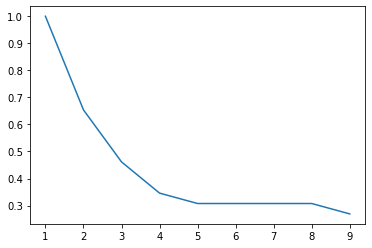

In [748]:
plt.plot(range(1,10),acc)

# 69) location_Nagarbhavi

In [749]:
df69=df[df['location_Nagarbhavi']==1]

In [750]:
df69 = df69[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [751]:
df69

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
4843     2  1.000000   9800          1630.0    3     6012.269939   
4844     3  2.000000  15000          1350.0    3    11111.111110   
4845     2  1.000000  15000          1200.0    2    12500.000000   
4846     3  0.000000  16000          2400.0    3     6666.666667   
4847     2  2.000000   3600           884.0    1     4072.398190   
4848     2  2.000000   5500          1055.0    2     5213.270142   
4849     2  1.000000   6000          1223.0    2     4905.968929   
4850     2  1.000000   4900           956.0    2     5125.523013   
4851     2  1.000000  15000          1200.0    2    12500.000000   
4852     2  1.000000   8500          1400.0    3     6071.428571   
4853     2  2.000000   4000          1145.0    2     3493.449782   
4854     2  2.000000   4000           710.0    1     5633.802817   
4855     2  1.584376   5000          1212.0    2     4125.412541   
4856     2  2.000000   5500          1020.0    2     5392.156863   
4857     2  3.000000   5300          1120.0    2     4732.142857   
4858     2  1.000000   5000          1146.0    2     4363.001745   
4859     2  2.000000   6300          1190.0    2     5294.117647   
4860     2  1.000000   8000          1050.0    2     7619.047619   
4861     3  2.000000  18000          2500.0    5     7200.000000   
4862     2  2.000000  13500          1400.0    3     9642.857143   
4863     2  2.000000   4620          1100.0    2     4200.000000   
4864     2  1.000000   4900          1080.0    2     4537.037037   
4865     3  0.000000  18000          1800.0    4    10000.000000   
4866     2  3.000000   5800          1225.0    2     4734.693878   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
4843                              0                        1   
4844                              0                        0   
4845                              0                        0   
4846                              0                        1   
4847                              1                        0   
4848                              1                        0   
4849                              1                        0   
4850                              0                        1   
4851                              0                        0   
4852                              0                        1   
4853                              1                        0   
4854                              0                        1   
4855                              1                        0   
4856                              1                        0   
4857                              1                        0   
4858                              1                        0   
4859                              1                        0   
4860                              0                        1   
4861                              0                        1   
4862                              1                        0   
4863                              1                        0   
4864                              1                        0   
4865                              0                        1   
4866                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
4843                    0                           1  
4844                    1                           1  
4845                    1                           1  
4846                    0                           1  
4847                    0                           1  
4848                    0                           1  
4849                    0                           1  
4850                    0                           1  
4851                    1                           1  
4852                    0                           1  
4853                    0                           1  
4854                    0       

In [752]:
df69.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000 -0.309886  0.746983        0.781076   
balcony                       -0.309886  1.000000 -0.425117       -0.360193   
price                          0.746983 -0.425117  1.000000        0.754854   
total_sqft_int                 0.781076 -0.360193  0.754854        1.000000   
bhk                            0.745499 -0.271788  0.768162        0.873413   
price_per_sqft                 0.385862 -0.321304  0.824438        0.261580   
area_typeSuper built-up  Area -0.486172  0.526890 -0.640648       -0.403013   
area_typeBuilt-up  Area        0.395285 -0.489973  0.329743        0.452629   
area_typePlot  Area            0.169031 -0.095408  0.495187       -0.037996   
availability_Ready To Move          NaN       NaN       NaN             NaN   

                                        bhk  price_per_sqft  \
bath                           7.454993e-01        0.385862   
balcony                       -2.717880e-01       -0.321304   
price                          7.681619e-01        0.824438   
total_sqft_int                 8.734132e-01        0.261580   
bhk                            1.000000e+00        0.365189   
price_per_sqft                 3.651885e-01        1.000000   
area_typeSuper built-up  Area -4.264014e-01       -0.611742   
area_typeBuilt-up  Area        4.506939e-01        0.087410   
area_typePlot  Area            8.949604e-17        0.797056   
availability_Ready To Move              NaN             NaN   

                               area_typeSuper built-up  Area  \
bath                                               -0.486172   
balcony                                             0.526890   
price                                              -0.640648   
total_sqft_int                                     -0.403013   
bhk                                                -0.426401   
price_per_sqft                                     -0.611742   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.768706   
area_typePlot  Area                                -0.410891   
availability_Ready To Move                               NaN   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.395285         1.690309e-01   
balcony                                      -0.489973        -9.540838e-02   
price                                         0.329743         4.951865e-01   
total_sqft_int                                0.452629        -3.799635e-02   
bhk                                           0.450694         8.949604e-17   
price_per_sqft                                0.087410         7.970560e-01   
area_typeSuper built-up  Area                -0.768706        -4.108907e-01   
area_typeBuilt-up  Area                       1.000000        -2.672612e-01   
area_typePlot  Area                          -0.267261         1.000000e+00   
availability_Ready To Move                         NaN                  NaN   

                               availability_Ready To Move  
bath                                                  NaN  
balcony                                               NaN  
price                                                 NaN  
total_sqft_int                                        NaN  
bhk                                                   NaN  
price_per_sqft                                        NaN  
area_typeSuper built-up  Area                         NaN  
area_typeBuilt-up  Area                               NaN  
area_typePlot  Area                                   NaN  
availability_Ready To Move                            NaN

In [753]:
x = df69[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df69[['price']]

In [754]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5833333333333334]
k= 3 [1.0, 0.5833333333333334, 0.375]
k= 4 [1.0, 0.5833333333333334, 0.375, 0.375]
k= 5 [1.0, 0.5833333333333334, 0.375, 0.375, 0.3333333333333333]
k= 6 [1.0, 0.5833333333333334, 0.375, 0.375, 0.3333333333333333, 0.2916666666666667]
k= 7 [1.0, 0.5833333333333334, 0.375, 0.375, 0.3333333333333333, 0.2916666666666667, 0.2916666666666667]
k= 8 [1.0, 0.5833333333333334, 0.375, 0.375, 0.3333333333333333, 0.2916666666666667, 0.2916666666666667, 0.2916666666666667]
k= 9 [1.0, 0.5833333333333334, 0.375, 0.375, 0.3333333333333333, 0.2916666666666667, 0.2916666666666667, 0.2916666666666667, 0.2916666666666667]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [755]:
max(acc)

1.0

In [756]:
k = acc.index(max(acc))+1
k

1

In [757]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


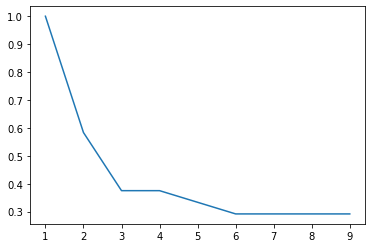

In [758]:
plt.plot(range(1,10),acc)

# 70) location_Old Airport Road

In [759]:
df70 = df[df['location_Old Airport Road']==1]

In [760]:
df70 = df70[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [761]:
df70

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
4978     4  1.584376  20400          2732.0    4     7467.057101   
4979     4  1.584376  25100          3356.0    4     7479.141836   
4980     2  3.000000   7500          1206.0    2     6218.905473   
4981     4  1.584376  20700          2774.0    4     7462.148522   
4982     4  3.000000  19100          2690.0    4     7100.371747   
4983     4  3.000000  19900          2690.0    4     7397.769517   
4984     2  1.000000   9765          1655.0    2     5900.302115   
4985     2  2.000000   6000          1075.0    2     5581.395349   
4986     2  1.000000  16700          1858.0    3     8988.159311   
4987     2  1.000000   9000          1150.0    2     7826.086957   
4988     4  3.000000  19100          2690.0    4     7100.371747   
4989     5  3.000000  18700          2658.0    4     7035.364936   
4990     2  2.000000   5800           946.0    2     6131.078224   
4991     4  3.000000  20800          2774.0    4     7498.197549   
4992     4  3.000000  20800          2774.0    4     7498.197549   
4993     4  1.584376  28000          3200.0    4     8750.000000   
4994     4  3.000000  20100          2690.0    4     7472.118959   
4995     2  2.000000   7500          1145.0    2     6550.218341   
4996     4  3.000000  19400          2732.0    4     7101.024890   
4997     5  3.000000  18900          2658.0    4     7110.609481   
4998     4  3.000000  19700          2774.0    4     7101.658255   
4999     4  1.584376  26200          3496.0    4     7494.279176   
5000     4  3.000000  19700          2774.0    4     7101.658255   
5001     4  3.000000  20400          2732.0    4     7467.057101   
5002     3  1.584376  15000          1798.0    3     8342.602892   
5003     4  3.000000  20800          2774.0    4     7498.197549   
5004     2  1.000000   7800          1184.0    2     6587.837838   
5005     4  1.584376  26200          3504.0    4     7477.168950   
5006     2  3.000000   7500          1055.0    2     7109.004739   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
4978                              1                        0   
4979                              1                        0   
4980                              1                        0   
4981                              1                        0   
4982                              1                        0   
4983                              1                        0   
4984                              1                        0   
4985                              1                        0   
4986                              0                        1   
4987                              1                        0   
4988                              1                        0   
4989                              1                        0   
4990                              1                        0   
4991                              1                        0   
4992                              1                        0   
4993                              0                        1   
4994                              1                        0   
4995                              1                        0   
4996                              1                        0   
4997                              1                        0   
4998                              1                        0   
4999                              1                        0   
5000                              1                        0   
5001                              1                        0   
5002                              1                        0   
5003                              1                        0   
5004                              1                        0   
5005                              1                        0   
5006                              0                        1   

      area_typePlot  Area  availability_Read

In [762]:
df70.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.488752  0.845414        0.889742   
balcony                        0.488752  1.000000  0.158905        0.237156   
price                          0.845414  0.158905  1.000000        0.981167   
total_sqft_int                 0.889742  0.237156  0.981167        1.000000   
bhk                            0.949645  0.416794  0.930735        0.948356   
price_per_sqft                 0.332585 -0.161014  0.613180        0.463873   
area_typeSuper built-up  Area  0.253635  0.180261 -0.014561        0.124284   
area_typeBuilt-up  Area       -0.253635 -0.180261  0.014561       -0.124284   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move    -0.807550 -0.426101 -0.678271       -0.790025   

                                    bhk  price_per_sqft  \
bath                           0.949645        0.332585   
balcony                        0.416794       -0.161014   
price                          0.930735        0.613180   
total_sqft_int                 0.948356        0.463873   
bhk                            1.000000        0.485947   
price_per_sqft                 0.485947        1.000000   
area_typeSuper built-up  Area  0.145224       -0.487761   
area_typeBuilt-up  Area       -0.145224        0.487761   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move    -0.800779       -0.027489   

                               area_typeSuper built-up  Area  \
bath                                                0.253635   
balcony                                             0.180261   
price                                              -0.014561   
total_sqft_int                                      0.124284   
bhk                                                 0.145224   
price_per_sqft                                     -0.487761   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.468221   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.253635                  NaN   
balcony                                      -0.180261                  NaN   
price                                         0.014561                  NaN   
total_sqft_int                               -0.124284                  NaN   
bhk                                          -0.145224                  NaN   
price_per_sqft                                0.487761                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.468221                  NaN   

                               availability_Ready To Move  
bath                                            -0.807550  
balcony                                         -0.426101  
price                                           -0.678271  
total_sqft_int                                  -0.790025  
bhk                                             -0.800779  
price_per_sqft                                  -0.027489  
area_typeSuper built-up  Area                   -0.468221  
area_typeBuilt-up  Area                          0.468221  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [763]:
x = df70[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df70[['price']]

In [764]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.7586206896551724]
k= 3 [1.0, 0.7586206896551724, 0.5172413793103449]
k= 4 [1.0, 0.7586206896551724, 0.5172413793103449, 0.4827586206896552]
k= 5 [1.0, 0.7586206896551724, 0.5172413793103449, 0.4827586206896552, 0.3793103448275862]
k= 6 [1.0, 0.7586206896551724, 0.5172413793103449, 0.4827586206896552, 0.3793103448275862, 0.3448275862068966]
k= 7 [1.0, 0.7586206896551724, 0.5172413793103449, 0.4827586206896552, 0.3793103448275862, 0.3448275862068966, 0.27586206896551724]
k= 8 [1.0, 0.7586206896551724, 0.5172413793103449, 0.4827586206896552, 0.3793103448275862, 0.3448275862068966, 0.27586206896551724, 0.27586206896551724]
k= 9 [1.0, 0.7586206896551724, 0.5172413793103449, 0.4827586206896552, 0.3793103448275862, 0.3448275862068966, 0.27586206896551724, 0.27586206896551724, 0.27586206896551724]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [765]:
max(acc)

1.0

In [766]:
k = acc.index(max(acc))+1
k

1

In [767]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


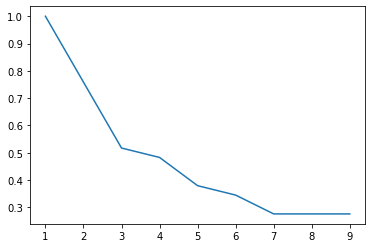

In [768]:
plt.plot(range(1,10),acc)

# 71) location_Old Madras Road

In [769]:
df71 = df[df['location_Old Madras Road']==1]

In [770]:
df71 = df71[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [771]:
df71

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
5007     2      2.0   9400          1425.0    3     6596.491228   
5008     2      1.0   4500           935.0    2     4812.834225   
5009     3      2.0  10000          1720.0    3     5813.953488   
5010     2      1.0   7200          1200.0    2     6000.000000   
5011     2      1.0   5355          1225.0    2     4371.428571   
5012     2      1.0   7000          1100.0    2     6363.636364   
5013     2      2.0   7500          1171.0    2     6404.782237   
5014     2      1.0   4500           935.0    2     4812.834225   
5015     2      1.0   4786          1065.0    2     4493.896714   
5016     3      2.0  12500          2010.0    4     6218.905473   
5017     2      2.0   8400          1480.0    3     5675.675676   
5018     2      1.0   7400          1210.0    2     6115.702479   
5019     2      2.0   7200          1171.0    2     6148.590948   
5020     3      2.0   9500          1480.0    3     6418.918919   
5021     2      1.0   8000          1210.0    2     6611.570248   
5022     3      2.0  12100          1859.0    3     6508.875740   
5023     3      2.0  14200          2300.0    3     6173.913043   
5024     2      1.0   8000          1210.0    2     6611.570248   
5025     2      1.0   7700          1210.0    2     6363.636364   
5026     2      2.0   7400          1330.0    2     5563.909774   
5027     3      2.0  10600          1720.0    3     6162.790698   
5028     3      2.0  17000          2990.0    3     5685.618729   
5029     2      2.0   7300          1171.0    2     6233.988044   
5030     3      2.0  11000          1630.0    3     6748.466258   
5031     2      1.0   5200          1165.0    2     4463.519313   
5032     2      1.0  17000          2640.0    2     6439.393939   
5033     2      1.0   5142          1165.0    2     4413.733906   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
5007                              1                        0   
5008                              1                        0   
5009                              1                        0   
5010                              1                        0   
5011                              1                        0   
5012                              1                        0   
5013                              1                        0   
5014                              1                        0   
5015                              1                        0   
5016                              1                        0   
5017                              1                        0   
5018                              1                        0   
5019                              1                        0   
5020                              1                        0   
5021                              1                        0   
5022                              1                        0   
5023                              0                        1   
5024                              1                        0   
5025                              1                        0   
5026                              1                        0   
5027                              1                        0   
5028                              1                        0   
5029                              1                        0   
5030                              1                        0   
5031                              1                        0   
5032                              1                        0   
5033                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
5007                    0                           0  
5008                    0                           0  
5009                    0                           1  
5010                    0                           0  
5011                    0                           0  


In [772]:
df71.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.625282  0.647933        0.640523   
balcony                        0.625282  1.000000  0.477721        0.424791   
price                          0.647933  0.477721  1.000000        0.963494   
total_sqft_int                 0.640523  0.424791  0.963494        1.000000   
bhk                            0.828984  0.698934  0.606509        0.586936   
price_per_sqft                 0.305639  0.422608  0.539149        0.301590   
area_typeSuper built-up  Area -0.302235 -0.188982 -0.316912       -0.325875   
area_typeBuilt-up  Area        0.302235  0.188982  0.316912        0.325875   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move     0.538028  0.407879  0.406143        0.315621   

                                    bhk  price_per_sqft  \
bath                           0.828984        0.305639   
balcony                        0.698934        0.422608   
price                          0.606509        0.539149   
total_sqft_int                 0.586936        0.301590   
bhk                            1.000000        0.327841   
price_per_sqft                 0.327841        1.000000   
area_typeSuper built-up  Area -0.206904       -0.081346   
area_typeBuilt-up  Area        0.206904        0.081346   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move     0.467205        0.540440   

                               area_typeSuper built-up  Area  \
bath                                               -0.302235   
balcony                                            -0.188982   
price                                              -0.316912   
total_sqft_int                                     -0.325875   
bhk                                                -0.206904   
price_per_sqft                                     -0.081346   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.162611   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.302235                  NaN   
balcony                                       0.188982                  NaN   
price                                         0.316912                  NaN   
total_sqft_int                                0.325875                  NaN   
bhk                                           0.206904                  NaN   
price_per_sqft                                0.081346                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.162611                  NaN   

                               availability_Ready To Move  
bath                                             0.538028  
balcony                                          0.407879  
price                                            0.406143  
total_sqft_int                                   0.315621  
bhk                                              0.467205  
price_per_sqft                                   0.540440  
area_typeSuper built-up  Area                   -0.162611  
area_typeBuilt-up  Area                          0.162611  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [773]:
x = df71[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df71[['price']]

In [774]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5925925925925926]
k= 3 [1.0, 0.5925925925925926, 0.37037037037037035]
k= 4 [1.0, 0.5925925925925926, 0.37037037037037035, 0.3333333333333333]
k= 5 [1.0, 0.5925925925925926, 0.37037037037037035, 0.3333333333333333, 0.37037037037037035]
k= 6 [1.0, 0.5925925925925926, 0.37037037037037035, 0.3333333333333333, 0.37037037037037035, 0.3333333333333333]
k= 7 [1.0, 0.5925925925925926, 0.37037037037037035, 0.3333333333333333, 0.37037037037037035, 0.3333333333333333, 0.2962962962962963]
k= 8 [1.0, 0.5925925925925926, 0.37037037037037035, 0.3333333333333333, 0.37037037037037035, 0.3333333333333333, 0.2962962962962963, 0.2962962962962963]
k= 9 [1.0, 0.5925925925925926, 0.37037037037037035, 0.3333333333333333, 0.37037037037037035, 0.3333333333333333, 0.2962962962962963, 0.2962962962962963, 0.2962962962962963]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [775]:
max(acc)

1.0

In [776]:
k = acc.index(max(acc))+1
k

1

In [777]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


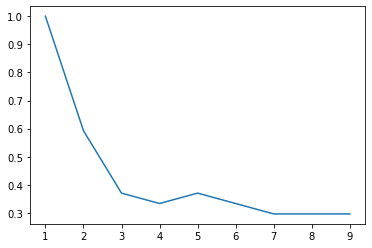

In [778]:
plt.plot(range(1,10),acc)

# 72) location_Panathur

In [779]:
df72 = df[df['location_Panathur']==1]

In [780]:
df72 = df70[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [781]:
df72

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
4978     4  1.584376  20400          2732.0    4     7467.057101   
4979     4  1.584376  25100          3356.0    4     7479.141836   
4980     2  3.000000   7500          1206.0    2     6218.905473   
4981     4  1.584376  20700          2774.0    4     7462.148522   
4982     4  3.000000  19100          2690.0    4     7100.371747   
4983     4  3.000000  19900          2690.0    4     7397.769517   
4984     2  1.000000   9765          1655.0    2     5900.302115   
4985     2  2.000000   6000          1075.0    2     5581.395349   
4986     2  1.000000  16700          1858.0    3     8988.159311   
4987     2  1.000000   9000          1150.0    2     7826.086957   
4988     4  3.000000  19100          2690.0    4     7100.371747   
4989     5  3.000000  18700          2658.0    4     7035.364936   
4990     2  2.000000   5800           946.0    2     6131.078224   
4991     4  3.000000  20800          2774.0    4     7498.197549   
4992     4  3.000000  20800          2774.0    4     7498.197549   
4993     4  1.584376  28000          3200.0    4     8750.000000   
4994     4  3.000000  20100          2690.0    4     7472.118959   
4995     2  2.000000   7500          1145.0    2     6550.218341   
4996     4  3.000000  19400          2732.0    4     7101.024890   
4997     5  3.000000  18900          2658.0    4     7110.609481   
4998     4  3.000000  19700          2774.0    4     7101.658255   
4999     4  1.584376  26200          3496.0    4     7494.279176   
5000     4  3.000000  19700          2774.0    4     7101.658255   
5001     4  3.000000  20400          2732.0    4     7467.057101   
5002     3  1.584376  15000          1798.0    3     8342.602892   
5003     4  3.000000  20800          2774.0    4     7498.197549   
5004     2  1.000000   7800          1184.0    2     6587.837838   
5005     4  1.584376  26200          3504.0    4     7477.168950   
5006     2  3.000000   7500          1055.0    2     7109.004739   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
4978                              1                        0   
4979                              1                        0   
4980                              1                        0   
4981                              1                        0   
4982                              1                        0   
4983                              1                        0   
4984                              1                        0   
4985                              1                        0   
4986                              0                        1   
4987                              1                        0   
4988                              1                        0   
4989                              1                        0   
4990                              1                        0   
4991                              1                        0   
4992                              1                        0   
4993                              0                        1   
4994                              1                        0   
4995                              1                        0   
4996                              1                        0   
4997                              1                        0   
4998                              1                        0   
4999                              1                        0   
5000                              1                        0   
5001                              1                        0   
5002                              1                        0   
5003                              1                        0   
5004                              1                        0   
5005                              1                        0   
5006                              0                        1   

      area_typePlot  Area  availability_Read

In [782]:
df72.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.488752  0.845414        0.889742   
balcony                        0.488752  1.000000  0.158905        0.237156   
price                          0.845414  0.158905  1.000000        0.981167   
total_sqft_int                 0.889742  0.237156  0.981167        1.000000   
bhk                            0.949645  0.416794  0.930735        0.948356   
price_per_sqft                 0.332585 -0.161014  0.613180        0.463873   
area_typeSuper built-up  Area  0.253635  0.180261 -0.014561        0.124284   
area_typeBuilt-up  Area       -0.253635 -0.180261  0.014561       -0.124284   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move    -0.807550 -0.426101 -0.678271       -0.790025   

                                    bhk  price_per_sqft  \
bath                           0.949645        0.332585   
balcony                        0.416794       -0.161014   
price                          0.930735        0.613180   
total_sqft_int                 0.948356        0.463873   
bhk                            1.000000        0.485947   
price_per_sqft                 0.485947        1.000000   
area_typeSuper built-up  Area  0.145224       -0.487761   
area_typeBuilt-up  Area       -0.145224        0.487761   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move    -0.800779       -0.027489   

                               area_typeSuper built-up  Area  \
bath                                                0.253635   
balcony                                             0.180261   
price                                              -0.014561   
total_sqft_int                                      0.124284   
bhk                                                 0.145224   
price_per_sqft                                     -0.487761   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.468221   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.253635                  NaN   
balcony                                      -0.180261                  NaN   
price                                         0.014561                  NaN   
total_sqft_int                               -0.124284                  NaN   
bhk                                          -0.145224                  NaN   
price_per_sqft                                0.487761                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.468221                  NaN   

                               availability_Ready To Move  
bath                                            -0.807550  
balcony                                         -0.426101  
price                                           -0.678271  
total_sqft_int                                  -0.790025  
bhk                                             -0.800779  
price_per_sqft                                  -0.027489  
area_typeSuper built-up  Area                   -0.468221  
area_typeBuilt-up  Area                          0.468221  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [783]:
x = df72[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df72[['price']]

In [784]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.7586206896551724]
k= 3 [1.0, 0.7586206896551724, 0.5172413793103449]
k= 4 [1.0, 0.7586206896551724, 0.5172413793103449, 0.4827586206896552]
k= 5 [1.0, 0.7586206896551724, 0.5172413793103449, 0.4827586206896552, 0.3793103448275862]
k= 6 [1.0, 0.7586206896551724, 0.5172413793103449, 0.4827586206896552, 0.3793103448275862, 0.3448275862068966]
k= 7 [1.0, 0.7586206896551724, 0.5172413793103449, 0.4827586206896552, 0.3793103448275862, 0.3448275862068966, 0.27586206896551724]
k= 8 [1.0, 0.7586206896551724, 0.5172413793103449, 0.4827586206896552, 0.3793103448275862, 0.3448275862068966, 0.27586206896551724, 0.27586206896551724]
k= 9 [1.0, 0.7586206896551724, 0.5172413793103449, 0.4827586206896552, 0.3793103448275862, 0.3448275862068966, 0.27586206896551724, 0.27586206896551724, 0.27586206896551724]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [785]:
max(acc)

1.0

In [786]:
k = acc.index(max(acc))+1
k

1

In [787]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


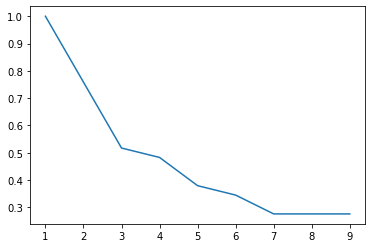

In [788]:
plt.plot(range(1,10),acc)

# 73) location_Rachenahalli

In [789]:
df73 = df[df['location_Rachenahalli']==1]

In [790]:
df73 = df73[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [791]:
df73

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
5189     2  2.000000   5207          1050.0    2     4959.047619   
5190     2  2.000000   5550          1050.0    2     5285.714286   
5191     2  2.000000   5350          1050.0    2     5095.238095   
5192     2  2.000000   5950          1220.0    2     4877.049180   
5193     2  2.000000   5250          1050.0    2     5000.000000   
5194     2  2.000000   5210          1050.0    2     4961.904762   
5195     2  2.000000   5350          1050.0    2     5095.238095   
5196     2  1.000000   5500          1113.0    2     4941.599281   
5197     5  1.584376  22000          3657.0    4     6015.859995   
5198     1  0.000000   3264           680.0    1     4800.000000   
5199     2  2.000000   5250          1050.0    2     5000.000000   
5200     1  1.000000   3979           690.0    1     5768.115942   
5201     2  2.000000   5000          1200.0    2     4166.666667   
5202     2  2.000000   4725          1050.0    2     4500.000000   
5203     2  2.000000   5550          1050.0    2     5285.714286   
5204     2  1.000000   4997           985.0    2     5073.096447   
5205     2  2.000000   5250          1050.0    2     5000.000000   
5206     2  2.000000   5208          1050.0    2     4960.000000   
5207     2  2.000000   5207          1050.0    2     4959.047619   
5208     2  2.000000   5208          1050.0    2     4960.000000   
5209     2  1.000000   4997           985.0    2     5073.096447   
5210     3  3.000000  10600          1856.0    3     5711.206897   
5211     2  2.000000   5250          1050.0    2     5000.000000   
5212     2  1.000000   5017           985.0    2     5093.401015   
5213     3  2.000000  16000          2600.0    3     6153.846154   
5214     2  1.000000   5017           985.0    2     5093.401015   
5215     2  2.000000   5271          1050.0    2     5020.000000   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
5189                              1                        0   
5190                              1                        0   
5191                              1                        0   
5192                              1                        0   
5193                              1                        0   
5194                              1                        0   
5195                              1                        0   
5196                              1                        0   
5197                              1                        0   
5198                              1                        0   
5199                              1                        0   
5200                              1                        0   
5201                              1                        0   
5202                              1                        0   
5203                              1                        0   
5204                              1                        0   
5205                              1                        0   
5206                              1                        0   
5207                              1                        0   
5208                              1                        0   
5209                              1                        0   
5210                              1                        0   
5211                              1                        0   
5212                              1                        0   
5213                              0                        1   
5214                              1                        0   
5215                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
5189                    0                           1  
5190                    0                           1  
5191                    0                           1  
5192                    0                           1  
5193                    0   

In [792]:
df73.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.332521  0.932439        0.950938   
balcony                        0.332521  1.000000  0.205718        0.238042   
price                          0.932439  0.205718  1.000000        0.994897   
total_sqft_int                 0.950938  0.238042  0.994897        1.000000   
bhk                            0.980444  0.438987  0.904729        0.924405   
price_per_sqft                 0.540809  0.067796  0.717866        0.648050   
area_typeSuper built-up  Area -0.254514 -0.092598 -0.492481       -0.459498   
area_typeBuilt-up  Area        0.254514  0.092598  0.492481        0.459498   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move     0.346844  0.819674  0.249256        0.294307   

                                    bhk  price_per_sqft  \
bath                           0.980444        0.540809   
balcony                        0.438987        0.067796   
price                          0.904729        0.717866   
total_sqft_int                 0.924405        0.648050   
bhk                            1.000000        0.531652   
price_per_sqft                 0.531652        1.000000   
area_typeSuper built-up  Area -0.336733       -0.510483   
area_typeBuilt-up  Area        0.336733        0.510483   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move     0.403823       -0.059270   

                               area_typeSuper built-up  Area  \
bath                                               -0.254514   
balcony                                            -0.092598   
price                                              -0.492481   
total_sqft_int                                     -0.459498   
bhk                                                -0.336733   
price_per_sqft                                     -0.510483   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.104828   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.254514                  NaN   
balcony                                       0.092598                  NaN   
price                                         0.492481                  NaN   
total_sqft_int                                0.459498                  NaN   
bhk                                           0.336733                  NaN   
price_per_sqft                                0.510483                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.104828                  NaN   

                               availability_Ready To Move  
bath                                             0.346844  
balcony                                          0.819674  
price                                            0.249256  
total_sqft_int                                   0.294307  
bhk                                              0.403823  
price_per_sqft                                  -0.059270  
area_typeSuper built-up  Area                   -0.104828  
area_typeBuilt-up  Area                          0.104828  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [793]:
x = df73[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df73[['price']]

In [794]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.7407407407407407]
k= 3 [1.0, 0.7407407407407407, 0.6296296296296297]
k= 4 [1.0, 0.7407407407407407, 0.6296296296296297, 0.3333333333333333]
k= 5 [1.0, 0.7407407407407407, 0.6296296296296297, 0.3333333333333333, 0.3333333333333333]
k= 6 [1.0, 0.7407407407407407, 0.6296296296296297, 0.3333333333333333, 0.3333333333333333, 0.2962962962962963]
k= 7 [1.0, 0.7407407407407407, 0.6296296296296297, 0.3333333333333333, 0.3333333333333333, 0.2962962962962963, 0.2962962962962963]
k= 8 [1.0, 0.7407407407407407, 0.6296296296296297, 0.3333333333333333, 0.3333333333333333, 0.2962962962962963, 0.2962962962962963, 0.2222222222222222]
k= 9 [1.0, 0.7407407407407407, 0.6296296296296297, 0.3333333333333333, 0.3333333333333333, 0.2962962962962963, 0.2962962962962963, 0.2222222222222222, 0.2222222222222222]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [795]:
max(acc)

1.0

In [796]:
k = acc.index(max(acc))+1
k

1

In [797]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


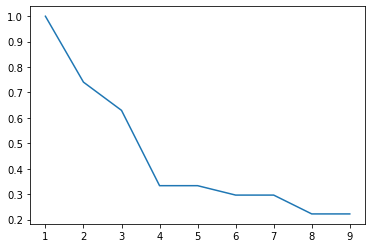

In [798]:
plt.plot(range(1,10),acc)

# 74) location_Raja Rajeshwari Nagar

In [799]:
df74 = df[df['location_Raja Rajeshwari Nagar']==1]

In [800]:
df74 = df74[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [801]:
df74

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
5224     3      3.0   6000          1540.0    3     3896.103896   
5225     2      2.0   4390          1295.0    2     3389.961390   
5226     2      2.0   4579          1145.0    2     3999.126638   
5227     2      2.0   4810          1419.0    2     3389.711064   
5228     2      1.0   5547          1295.0    2     4283.397683   
...    ...      ...    ...             ...  ...             ...   
5335     2      2.0   4400          1140.0    2     3859.649123   
5336     8      3.0  21500          6000.0    8     3583.333333   
5337     2      2.0   3900          1140.0    2     3421.052632   
5338     1      1.0   2200           510.0    1     4313.725490   
5339     2      2.0   4014          1187.0    2     3381.634372   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
5224                              1                        0   
5225                              1                        0   
5226                              1                        0   
5227                              1                        0   
5228                              1                        0   
...                             ...                      ...   
5335                              1                        0   
5336                              0                        1   
5337                              1                        0   
5338                              1                        0   
5339                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
5224                    0                           1  
5225                    0                           1  
5226                    0                           1  
5227                    0                           1  
5228                    0                           1  
...                   ...                         ...  
5335                    0                           1  
5336                    0                           1  
5337                    0                           1  
5338                    0                           1  
5339                    0                           1  

[116 rows x 10 columns]

In [802]:
df74.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.249727  0.935709        0.958854   
balcony                        0.249727  1.000000  0.141600        0.269850   
price                          0.935709  0.141600  1.000000        0.957907   
total_sqft_int                 0.958854  0.269850  0.957907        1.000000   
bhk                            0.937251  0.248453  0.952130        0.951608   
price_per_sqft                 0.107015 -0.409926  0.342218        0.094378   
area_typeSuper built-up  Area -0.432835  0.045483 -0.467441       -0.419946   
area_typeBuilt-up  Area        0.159369 -0.044566  0.178016        0.172286   
area_typePlot  Area            0.690229 -0.009917  0.732125        0.629924   
availability_Ready To Move    -0.014094  0.116139 -0.005763        0.045361   

                                    bhk  price_per_sqft  \
bath                           0.937251        0.107015   
balcony                        0.248453       -0.409926   
price                          0.952130        0.342218   
total_sqft_int                 0.951608        0.094378   
bhk                            1.000000        0.199829   
price_per_sqft                 0.199829        1.000000   
area_typeSuper built-up  Area -0.426176       -0.267376   
area_typeBuilt-up  Area        0.171283        0.197822   
area_typePlot  Area            0.647278        0.202713   
availability_Ready To Move     0.011884       -0.230244   

                               area_typeSuper built-up  Area  \
bath                                               -0.432835   
balcony                                             0.045483   
price                                              -0.467441   
total_sqft_int                                     -0.419946   
bhk                                                -0.426176   
price_per_sqft                                     -0.267376   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.911063   
area_typePlot  Area                                -0.372829   
availability_Ready To Move                         -0.067139   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.159369             0.690229   
balcony                                      -0.044566            -0.009917   
price                                         0.178016             0.732125   
total_sqft_int                                0.172286             0.629924   
bhk                                           0.171283             0.647278   
price_per_sqft                                0.197822             0.202713   
area_typeSuper built-up  Area                -0.911063            -0.372829   
area_typeBuilt-up  Area                       1.000000            -0.042871   
area_typePlot  Area                          -0.042871             1.000000   
availability_Ready To Move                    0.061168             0.025031   

                               availability_Ready To Move  
bath                                            -0.014094  
balcony                                          0.116139  
price                                           -0.005763  
total_sqft_int                                   0.045361  
bhk                                              0.011884  
price_per_sqft                                  -0.230244  
area_typeSuper built-up  Area                   -0.067139  
area_typeBuilt-up  Area                          0.061168  
area_typePlot  Area                              0.025031  
availability_Ready To Move                       1.000000

In [803]:
x = df74[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df74[['price']]

In [804]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.646551724137931]
k= 3 [1.0, 0.646551724137931, 0.46551724137931033]
k= 4 [1.0, 0.646551724137931, 0.46551724137931033, 0.39655172413793105]
k= 5 [1.0, 0.646551724137931, 0.46551724137931033, 0.39655172413793105, 0.3448275862068966]
k= 6 [1.0, 0.646551724137931, 0.46551724137931033, 0.39655172413793105, 0.3448275862068966, 0.27586206896551724]
k= 7 [1.0, 0.646551724137931, 0.46551724137931033, 0.39655172413793105, 0.3448275862068966, 0.27586206896551724, 0.25862068965517243]
k= 8 [1.0, 0.646551724137931, 0.46551724137931033, 0.39655172413793105, 0.3448275862068966, 0.27586206896551724, 0.25862068965517243, 0.2672413793103448]
k= 9 [1.0, 0.646551724137931, 0.46551724137931033, 0.39655172413793105, 0.3448275862068966, 0.27586206896551724, 0.25862068965517243, 0.2672413793103448, 0.25862068965517243]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [805]:
max(acc)

1.0

In [806]:
k = acc.index(max(acc))+1
k

1

In [807]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


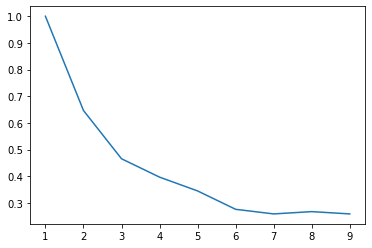

In [808]:
plt.plot(range(1,10),acc)

# 75) location_Rajaji Nagar

In [809]:
df75 = df[df['location_Rajaji Nagar']==1]

In [810]:
df75 = df75[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [811]:
df75

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
5343     3  2.000000  22900          1640.0    3    13963.414630   
5344     3  2.000000  41500          2390.0    3    17364.016740   
5345     3  2.000000  41000          2390.0    3    17154.811720   
5346     4  3.000000  54000          3516.0    4    15358.361770   
5347     3  3.000000  22300          1640.0    3    13597.560980   
5348     4  1.000000  55800          3526.0    4    15825.297790   
5349     3  3.000000  26000          1800.0    3    14444.444440   
5350     3  2.000000  24100          1640.0    3    14695.121950   
5351     2  1.000000  17000          1370.0    2    12408.759120   
5352     3  2.000000  36000          2409.0    3    14943.960150   
5353     3  2.000000  28800          1718.0    2    16763.678700   
5354     3  1.584376  33400          2386.0    3    13998.323550   
5355     2  0.000000  15000          1200.0    2    12500.000000   
5356     1  0.000000  16300          1160.0    2    14051.724140   
5357     2  0.000000  11200          1222.0    2     9165.302782   
5358     1  0.000000   7500           660.0    1    11363.636360   
5359     2  2.000000  17000          1440.0    2    11805.555560   
5360     3  2.000000  40000          2448.0    3    16339.869280   
5361     2  2.000000  18500          1440.0    2    12847.222220   
5362     3  3.000000  23000          1640.0    3    14024.390240   
5363     2  2.000000  25000          1800.0    3    13888.888890   
5364     4  3.000000  55000          3100.0    4    17741.935480   
5365     4  3.000000  59800          3526.0    4    16959.727740   
5366     2  1.000000  13000          1357.0    2     9579.955785   
5367     3  3.000000  36900          2300.0    3    16043.478260   
5368     3  2.000000  22000          1640.0    3    13414.634150   
5369     3  3.000000  35000          2500.0    3    14000.000000   
5370     3  2.000000  40300          2559.0    3    15748.339190   
5371     3  2.000000  26200          1763.0    2    14861.032330   
5372     3  3.000000  22000          1640.0    3    13414.634150   
5373     3  2.000000  24000          1800.0    3    13333.333330   
5374     3  3.000000  42500          2533.0    3    16778.523490   
5375     2  1.000000  12700          1268.0    2    10015.772870   
5376     3  3.000000  33000          2450.0    3    13469.387760   
5377     3  2.000000  26200          1640.0    3    15975.609760   
5378     1  1.000000  20000          1200.0    2    16666.666670   
5379     3  3.000000  37500          2367.0    3    15842.839040   
5380     2  0.000000  41500          2440.0    4    17008.196720   
5381     3  2.000000  25100          1640.0    3    15304.878050   
5382     3  2.000000  26800          1640.0    3    16341.463410   
5383     4  3.000000  34000          2367.0    3    14364.174060   
5384     3  2.000000  22400          1720.0    3    13023.255810   
5385     5  1.584376  51000          3600.0    5    14166.666670   
5386     2  1.000000  12300          1357.0    2     9064.112012   
5387     5  1.000000  40800          2400.0    5    17000.000000   
5388     3  3.000000  34000          2500.0    3    13600.000000   
5389     3  1.000000  37200          2390.0    3    15564.853560   
5390     3  2.000000  39900          2415.0    3    16521.739130   
5391     3  2.000000  27500          1718.0    2    16006.984870   
5392     3  2.000000  24000          1763.0    2    13613.159390   
5393     3  2.000000  32000          2367.0    3    13519.222640   
5394     3  3.000000  39500          2409.0    3    16396.845160   
5395     2  0.000000  22500          1314.0    2    17123.287670   
5396     2  2.000000  16500          1440.0    2    11458.333330   
5397     3  3.000000  24500          1640.0    3    14939.024390   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
5343                              0                        1   
5344                              1                        0   
5345 

In [812]:
df75.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.518115  0.745537        0.774395   
balcony                        0.518115  1.000000  0.402476        0.424864   
price                          0.745537  0.402476  1.000000        0.965785   
total_sqft_int                 0.774395  0.424864  0.965785        1.000000   
bhk                            0.822506  0.344184  0.798943        0.811438   
price_per_sqft                 0.444763  0.280852  0.714876        0.528410   
area_typeSuper built-up  Area  0.373250  0.511164  0.220239        0.308757   
area_typeBuilt-up  Area       -0.204321 -0.048652 -0.199295       -0.211444   
area_typePlot  Area           -0.291579 -0.591875 -0.106464       -0.205856   
availability_Ready To Move     0.291434  0.348681  0.401885        0.300974   

                                    bhk  price_per_sqft  \
bath                           0.822506        0.444763   
balcony                        0.344184        0.280852   
price                          0.798943        0.714876   
total_sqft_int                 0.811438        0.528410   
bhk                            1.000000        0.506264   
price_per_sqft                 0.506264        1.000000   
area_typeSuper built-up  Area  0.147168       -0.064756   
area_typeBuilt-up  Area       -0.216895       -0.154098   
area_typePlot  Area           -0.001401        0.208476   
availability_Ready To Move     0.309370        0.660774   

                               area_typeSuper built-up  Area  \
bath                                                0.373250   
balcony                                             0.511164   
price                                               0.220239   
total_sqft_int                                      0.308757   
bhk                                                 0.147168   
price_per_sqft                                     -0.064756   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.594089   
area_typePlot  Area                                -0.742307   
availability_Ready To Move                         -0.132020   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.204321            -0.291579   
balcony                                      -0.048652            -0.591875   
price                                        -0.199295            -0.106464   
total_sqft_int                               -0.211444            -0.205856   
bhk                                          -0.216895            -0.001401   
price_per_sqft                               -0.154098             0.208476   
area_typeSuper built-up  Area                -0.594089            -0.742307   
area_typeBuilt-up  Area                       1.000000            -0.097999   
area_typePlot  Area                          -0.097999             1.000000   
availability_Ready To Move                    0.078431             0.097999   

                               availability_Ready To Move  
bath                                             0.291434  
balcony                                          0.348681  
price                                            0.401885  
total_sqft_int                                   0.300974  
bhk                                              0.309370  
price_per_sqft                                   0.660774  
area_typeSuper built-up  Area                   -0.132020  
area_typeBuilt-up  Area                          0.078431  
area_typePlot  Area                              0.097999  
availability_Ready To Move                       1.000000

In [813]:
x = df75[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df75[['price']]

In [814]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.45454545454545453]
k= 3 [1.0, 0.45454545454545453, 0.32727272727272727]
k= 4 [1.0, 0.45454545454545453, 0.32727272727272727, 0.2545454545454545]
k= 5 [1.0, 0.45454545454545453, 0.32727272727272727, 0.2545454545454545, 0.2]
k= 6 [1.0, 0.45454545454545453, 0.32727272727272727, 0.2545454545454545, 0.2, 0.16363636363636364]
k= 7 [1.0, 0.45454545454545453, 0.32727272727272727, 0.2545454545454545, 0.2, 0.16363636363636364, 0.18181818181818182]
k= 8 [1.0, 0.45454545454545453, 0.32727272727272727, 0.2545454545454545, 0.2, 0.16363636363636364, 0.18181818181818182, 0.16363636363636364]
k= 9 [1.0, 0.45454545454545453, 0.32727272727272727, 0.2545454545454545, 0.2, 0.16363636363636364, 0.18181818181818182, 0.16363636363636364, 0.14545454545454545]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [815]:
max(acc)

1.0

In [816]:
k = acc.index(max(acc))+1
k

1

In [817]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


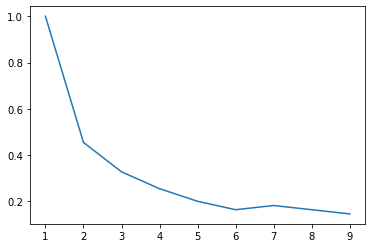

In [818]:
plt.plot(range(1,10),acc)

# 76) location_Ramagondanahalli

In [819]:
df76 = df[df['location_Ramagondanahalli']==1]

In [820]:
df76 = df76[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [821]:
df76

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
5416     2      2.0   4877          1151.0    2     4237.185056   
5417     2      1.0   4700          1251.0    2     3756.994404   
5418     2      1.0   5204          1235.0    2     4213.765182   
5419     2      2.0  11100          1610.0    3     6894.409938   
5420     1      0.0   3000           540.0    1     5555.555556   
5421     2      1.0   4680          1235.0    2     3789.473684   
5422     2      1.0   5126          1215.0    2     4218.930041   
5423     4      2.0  15700          2257.0    3     6956.136464   
5424     2      1.0   4740          1251.0    2     3788.968825   
5425     2      2.0  11500          1610.0    3     7142.857143   
5426     2      3.0   6500           920.0    2     7065.217391   
5427     2      1.0   4550          1215.0    2     3744.855967   
5428     2      1.0   5266          1253.0    2     4202.713488   
5429     2      2.0   9500          1295.0    2     7335.907336   
5430     2      2.0   5050          1151.0    2     4387.489140   
5431     2      1.0   4930          1235.0    2     3991.902834   
5432     3      2.0  15900          2257.0    3     7044.749668   
5433     2      2.0   9500          1295.0    2     7335.907336   
5434     3      2.0  14200          1910.0    3     7434.554974   
5435     2      1.0   4610          1215.0    2     3794.238683   
5436     2      1.0   5000          1251.0    2     3996.802558   
5437     2      2.0  11500          1610.0    3     7142.857143   
5438     2      2.0   4360          1151.0    2     3788.010426   
5439     2      1.0   5300          1251.0    2     4236.610711   
5440     2      1.0   4582           845.0    2     5422.485207   
5441     3      2.0  15000          1910.0    3     7853.403141   
5442     3      2.0  11400          2040.0    3     5588.235294   
5443     2      1.0   4600          1251.0    2     3677.058353   
5444     2      2.0   4600          1151.0    2     3996.524761   
5445     2      1.0  11200          1610.0    3     6956.521739   
5446     2      2.0  11500          1610.0    3     7142.857143   
5447     3      1.0   5610          1200.0    3     4675.000000   
5448     5      2.0  22000          2787.0    4     7893.792609   
5449     2      2.0   7500          1125.0    2     6666.666667   
5450     2      2.0   4250          1151.0    2     3692.441355   
5451     3      2.0  15500          2257.0    3     6867.523261   
5452     3      3.0  10000          1500.0    3     6666.666667   
5453     3      2.0  13100          1910.0    3     6858.638743   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
5416                              1                        0   
5417                              1                        0   
5418                              1                        0   
5419                              1                        0   
5420                              0                        0   
5421                              1                        0   
5422                              1                        0   
5423                              1                        0   
5424                              1                        0   
5425                              1                        0   
5426                              0                        1   
5427                              1                        0   
5428                              1                        0   
5429                              1                        0   
5430                              1                        0   
5431                              1                        0   
5432                              1                        0   
5433                              1                        0   
5434                              0                        1   
5435                              1                        0   
5436                              1             

In [822]:
df76.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.406546  0.796405        0.857535   
balcony                        0.406546  1.000000  0.514984        0.415121   
price                          0.796405  0.514984  1.000000        0.932410   
total_sqft_int                 0.857535  0.415121  0.932410        1.000000   
bhk                            0.794611  0.492834  0.880502        0.879540   
price_per_sqft                 0.465753  0.576081  0.835607        0.591029   
area_typeSuper built-up  Area -0.077417 -0.082241  0.048300        0.171306   
area_typeBuilt-up  Area        0.148393  0.338381  0.151468        0.120731   
area_typePlot  Area           -0.133553 -0.436226 -0.256297       -0.380205   
availability_Ready To Move     0.328579  0.510810  0.700457        0.500495   

                                    bhk  price_per_sqft  \
bath                           0.794611        0.465753   
balcony                        0.492834        0.576081   
price                          0.880502        0.835607   
total_sqft_int                 0.879540        0.591029   
bhk                            1.000000        0.662674   
price_per_sqft                 0.662674        1.000000   
area_typeSuper built-up  Area -0.027405       -0.165438   
area_typeBuilt-up  Area        0.135703        0.224219   
area_typePlot  Area           -0.196988       -0.059252   
availability_Ready To Move     0.529564        0.865355   

                               area_typeSuper built-up  Area  \
bath                                               -0.077417   
balcony                                            -0.082241   
price                                               0.048300   
total_sqft_int                                      0.171306   
bhk                                                -0.027405   
price_per_sqft                                     -0.165438   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.616110   
area_typePlot  Area                                -0.616110   
availability_Ready To Move                         -0.228981   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.148393            -0.133553   
balcony                                       0.338381            -0.436226   
price                                         0.151468            -0.256297   
total_sqft_int                                0.120731            -0.380205   
bhk                                           0.135703            -0.196988   
price_per_sqft                                0.224219            -0.059252   
area_typeSuper built-up  Area                -0.616110            -0.616110   
area_typeBuilt-up  Area                       1.000000            -0.085714   
area_typePlot  Area                          -0.085714             1.000000   
availability_Ready To Move                    0.308607            -0.082295   

                               availability_Ready To Move  
bath                                             0.328579  
balcony                                          0.510810  
price                                            0.700457  
total_sqft_int                                   0.500495  
bhk                                              0.529564  
price_per_sqft                                   0.865355  
area_typeSuper built-up  Area                   -0.228981  
area_typeBuilt-up  Area                          0.308607  
area_typePlot  Area                             -0.082295  
availability_Ready To Move                       1.000000

In [823]:
x = df76[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df76[['price']]

In [824]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5526315789473685]
k= 3 [1.0, 0.5526315789473685, 0.4473684210526316]
k= 4 [1.0, 0.5526315789473685, 0.4473684210526316, 0.2894736842105263]
k= 5 [1.0, 0.5526315789473685, 0.4473684210526316, 0.2894736842105263, 0.18421052631578946]
k= 6 [1.0, 0.5526315789473685, 0.4473684210526316, 0.2894736842105263, 0.18421052631578946, 0.18421052631578946]
k= 7 [1.0, 0.5526315789473685, 0.4473684210526316, 0.2894736842105263, 0.18421052631578946, 0.18421052631578946, 0.13157894736842105]
k= 8 [1.0, 0.5526315789473685, 0.4473684210526316, 0.2894736842105263, 0.18421052631578946, 0.18421052631578946, 0.13157894736842105, 0.13157894736842105]
k= 9 [1.0, 0.5526315789473685, 0.4473684210526316, 0.2894736842105263, 0.18421052631578946, 0.18421052631578946, 0.13157894736842105, 0.13157894736842105, 0.10526315789473684]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [825]:
max(acc)

1.0

In [826]:
k = acc.index(max(acc))+1
k

1

In [827]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


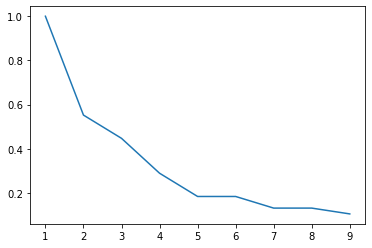

In [828]:
plt.plot(range(1,10),acc)

# 77) location_Ramamurthy Nagar

In [829]:
df77 = df[df['location_Ramamurthy Nagar']==1]

In [830]:
df77 = df77[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [831]:
df77

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
5460     4      1.0  22500          3700.0    4     6081.081081   
5461     5      2.0  15000          3500.0    5     4285.714286   
5462     2      0.0   3700          1050.0    2     3523.809524   
5463     2      2.0   5000          1040.0    2     4807.692308   
5464     3      1.0   7200          1200.0    2     6000.000000   
5465     1      1.0   2600           360.0    1     7222.222222   
5466     2      1.0   5079           950.0    2     5346.315789   
5467     2      0.0   6600          1200.0    3     5500.000000   
5468     3      1.0  10000          1525.0    3     6557.377049   
5469     2      0.0   8000          1200.0    2     6666.666667   
5470     2      3.0   4200          1200.0    2     3500.000000   
5471     2      0.0   6800          1100.0    2     6181.818182   
5472     2      1.0   4550          1185.0    2     3839.662447   
5473     2      2.0   4680          1170.0    2     4000.000000   
5474     2      2.0   5100          1150.0    2     4434.782609   
5475     2      1.0   4800          1200.0    2     4000.000000   
5476     2      0.0   6500          1110.0    2     5855.855856   
5477     2      1.0   7800          1200.0    2     6500.000000   
5478     1      1.0   4300           600.0    1     7166.666667   
5479     2      1.0   5700          1006.0    2     5666.003976   
5480     2      1.0   7600          1200.0    2     6333.333333   
5481     2      1.0   3300           700.0    2     4714.285714   
5482     2      1.0   4700          1125.0    2     4177.777778   
5483     2      1.0   6200          1000.0    2     6200.000000   
5484     2      1.0   6700          1334.0    2     5022.488756   
5485     2      1.0   4600          1200.0    2     3833.333333   
5486     2      1.0   5790          1200.0    2     4825.000000   
5487     2      0.0   4500          1360.0    2     3308.823529   
5488     2      2.0   4400          1170.0    2     3760.683761   
5489     4      2.0  13000          2200.0    4     5909.090909   
5490     2      1.0   5166          1050.0    2     4920.000000   
5491     3      0.0  12500          2316.0    3     5397.236615   
5492     2      1.0   5000          1101.0    2     4541.326067   
5493     2      2.0   4000          1150.0    2     3478.260870   
5494     2      2.0   3779          1050.0    2     3600.000000   
5495     2      2.0   3900           935.0    2     4171.122995   
5496     2      1.0   6800          1200.0    2     5666.666667   
5497     1      0.0   3500           540.0    1     6481.481481   
5498     2      2.0   3500           960.0    2     3645.833333   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
5460                              0                        1   
5461                              0                        1   
5462                              0                        1   
5463                              0                        1   
5464                              0                        0   
5465                              1                        0   
5466                              0                        1   
5467                              0                        0   
5468                              0                        1   
5469                              0                        0   
5470                              1                        0   
5471                              0                        0   
5472                              1                        0   
5473                              1                        0   
5474                              1                        0   
5475                              1                        0   
5476                              0                        0   
5477                              0                        0   
5478                              0                        1   
5479                              0          

In [832]:
df77.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.197634  0.834028        0.912292   
balcony                        0.197634  1.000000 -0.063597        0.095966   
price                          0.834028 -0.063597  1.000000        0.924576   
total_sqft_int                 0.912292  0.095966  0.924576        1.000000   
bhk                            0.954009  0.151480  0.828505        0.912292   
price_per_sqft                -0.043766 -0.422605  0.317985       -0.029117   
area_typeSuper built-up  Area -0.270306  0.445525 -0.401156       -0.247779   
area_typeBuilt-up  Area        0.178049 -0.174998  0.243287        0.253446   
area_typePlot  Area            0.112853 -0.320888  0.191340        0.000711   
availability_Ready To Move     0.160254 -0.206774  0.168184        0.092410   

                                    bhk  price_per_sqft  \
bath                           0.954009       -0.043766   
balcony                        0.151480       -0.422605   
price                          0.828505        0.317985   
total_sqft_int                 0.912292       -0.029117   
bhk                            1.000000       -0.058763   
price_per_sqft                -0.058763        1.000000   
area_typeSuper built-up  Area -0.270306       -0.471986   
area_typeBuilt-up  Area        0.178049        0.058057   
area_typePlot  Area            0.112853        0.484923   
availability_Ready To Move     0.160254        0.260441   

                               area_typeSuper built-up  Area  \
bath                                               -0.270306   
balcony                                             0.445525   
price                                              -0.401156   
total_sqft_int                                     -0.247779   
bhk                                                -0.270306   
price_per_sqft                                     -0.471986   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.624152   
area_typePlot  Area                                -0.456832   
availability_Ready To Move                         -0.460469   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.178049             0.112853   
balcony                                      -0.174998            -0.320888   
price                                         0.243287             0.191340   
total_sqft_int                                0.253446             0.000711   
bhk                                           0.178049             0.112853   
price_per_sqft                                0.058057             0.484923   
area_typeSuper built-up  Area                -0.624152            -0.456832   
area_typeBuilt-up  Area                       1.000000            -0.409878   
area_typePlot  Area                          -0.409878             1.000000   
availability_Ready To Move                    0.383074             0.101430   

                               availability_Ready To Move  
bath                                             0.160254  
balcony                                         -0.206774  
price                                            0.168184  
total_sqft_int                                   0.092410  
bhk                                              0.160254  
price_per_sqft                                   0.260441  
area_typeSuper built-up  Area                   -0.460469  
area_typeBuilt-up  Area                          0.383074  
area_typePlot  Area                              0.101430  
availability_Ready To Move                       1.000000

In [833]:
x = df77[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df77[['price']]

In [834]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.48717948717948717]
k= 3 [1.0, 0.48717948717948717, 0.3333333333333333]
k= 4 [1.0, 0.48717948717948717, 0.3333333333333333, 0.23076923076923078]
k= 5 [1.0, 0.48717948717948717, 0.3333333333333333, 0.23076923076923078, 0.20512820512820512]
k= 6 [1.0, 0.48717948717948717, 0.3333333333333333, 0.23076923076923078, 0.20512820512820512, 0.20512820512820512]
k= 7 [1.0, 0.48717948717948717, 0.3333333333333333, 0.23076923076923078, 0.20512820512820512, 0.20512820512820512, 0.23076923076923078]
k= 8 [1.0, 0.48717948717948717, 0.3333333333333333, 0.23076923076923078, 0.20512820512820512, 0.20512820512820512, 0.23076923076923078, 0.15384615384615385]
k= 9 [1.0, 0.48717948717948717, 0.3333333333333333, 0.23076923076923078, 0.20512820512820512, 0.20512820512820512, 0.23076923076923078, 0.15384615384615385, 0.1794871794871795]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [835]:
max(acc)

1.0

In [836]:
k = acc.index(max(acc))+1
k

1

In [837]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


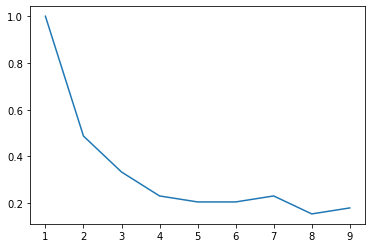

In [838]:
plt.plot(range(1,10),acc)

# 78) location_Sahakara Nagar

In [839]:
df78 = df[df['location_Sahakara Nagar']==1]

In [840]:
df78 = df78[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [841]:
df78

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
5562     2  2.000000   9500          1500.0    3     6333.333333   
5563     2  1.000000   5600          1100.0    2     5090.909091   
5564     2  2.000000   4800          1219.0    2     3937.653815   
5565     2  2.000000   7500          1100.0    3     6818.181818   
5566     3  1.000000  11500          1655.0    3     6948.640483   
5567     2  1.000000   5400          1150.0    2     4695.652174   
5568     2  1.000000   6984          1270.0    2     5500.000000   
5569     2  3.000000   5600           960.0    2     5833.333333   
5570     2  3.000000   5000          1048.0    2     4770.992366   
5571     2  1.000000   5500          1160.0    2     4741.379310   
5572     2  2.000000   7500          1200.0    3     6250.000000   
5573     4  1.584376  20000          2500.0    4     8000.000000   
5574     3  3.000000  17900          1914.0    3     9352.142111   
5575     3  2.000000  12500          1500.0    3     8333.333333   
5576     2  1.000000   5500          1100.0    2     5000.000000   
5577     3  2.000000  14900          1914.0    3     7784.743992   
5578     2  1.000000   6000          1000.0    2     6000.000000   
5579     2  3.000000   4900          1175.0    2     4170.212766   
5580     2  2.000000   9000          1370.0    3     6569.343066   
5581     2  1.000000   5500          1100.0    2     5000.000000   
5582     2  2.000000   7500          1100.0    3     6818.181818   
5583     2  2.000000   7200          1180.0    2     6101.694915   
5584     2  2.000000   6000          1200.0    2     5000.000000   
5585     2  2.000000   4500          1032.0    2     4360.465116   
5586     2  0.000000   4600          1200.0    2     3833.333333   
5587     2  1.000000   9600          1270.0    2     7559.055118   
5588     2  3.000000   8000          1201.0    2     6661.115737   
5589     2  1.000000   5400          1200.0    2     4500.000000   
5590     2  2.000000   7230          1291.0    2     5600.309837   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
5562                              1                        0   
5563                              1                        0   
5564                              1                        0   
5565                              1                        0   
5566                              0                        1   
5567                              0                        1   
5568                              1                        0   
5569                              1                        0   
5570                              1                        0   
5571                              1                        0   
5572                              1                        0   
5573                              0                        1   
5574                              1                        0   
5575                              1                        0   
5576                              0                        1   
5577                              1                        0   
5578                              1                        0   
5579                              1                        0   
5580                              1                        0   
5581                              0                        1   
5582                              1                        0   
5583                              1                        0   
5584                              0                        1   
5585                              0                        1   
5586                              0                        1   
5587                              0                        1   
5588                              0                        1   
5589                              1                        0   
5590                              1                        0   

      area_typePlot  Area  availability_Read

In [842]:
df78.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.065059  0.903006        0.921555   
balcony                        0.065059  1.000000  0.184509        0.064608   
price                          0.903006  0.184509  1.000000        0.938310   
total_sqft_int                 0.921555  0.064608  0.938310        1.000000   
bhk                            0.741071  0.160458  0.808725        0.765233   
price_per_sqft                 0.666819  0.278566  0.872335        0.659333   
area_typeSuper built-up  Area -0.139913  0.362672 -0.016955       -0.097875   
area_typeBuilt-up  Area        0.139913 -0.362672  0.016955        0.097875   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move    -0.310471  0.182236 -0.172200       -0.207818   

                                    bhk  price_per_sqft  \
bath                           0.741071        0.666819   
balcony                        0.160458        0.278566   
price                          0.808725        0.872335   
total_sqft_int                 0.765233        0.659333   
bhk                            1.000000        0.728354   
price_per_sqft                 0.728354        1.000000   
area_typeSuper built-up  Area  0.104287        0.110149   
area_typeBuilt-up  Area       -0.104287       -0.110149   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move    -0.212605       -0.140977   

                               area_typeSuper built-up  Area  \
bath                                               -0.139913   
balcony                                             0.362672   
price                                              -0.016955   
total_sqft_int                                     -0.097875   
bhk                                                 0.104287   
price_per_sqft                                      0.110149   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                          0.260494   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.139913                  NaN   
balcony                                      -0.362672                  NaN   
price                                         0.016955                  NaN   
total_sqft_int                                0.097875                  NaN   
bhk                                          -0.104287                  NaN   
price_per_sqft                               -0.110149                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                   -0.260494                  NaN   

                               availability_Ready To Move  
bath                                            -0.310471  
balcony                                          0.182236  
price                                           -0.172200  
total_sqft_int                                  -0.207818  
bhk                                             -0.212605  
price_per_sqft                                  -0.140977  
area_typeSuper built-up  Area                    0.260494  
area_typeBuilt-up  Area                         -0.260494  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [843]:
x = df78[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df78[['price']]

In [844]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5172413793103449]
k= 3 [1.0, 0.5172413793103449, 0.3448275862068966]
k= 4 [1.0, 0.5172413793103449, 0.3448275862068966, 0.2413793103448276]
k= 5 [1.0, 0.5172413793103449, 0.3448275862068966, 0.2413793103448276, 0.2413793103448276]
k= 6 [1.0, 0.5172413793103449, 0.3448275862068966, 0.2413793103448276, 0.2413793103448276, 0.20689655172413793]
k= 7 [1.0, 0.5172413793103449, 0.3448275862068966, 0.2413793103448276, 0.2413793103448276, 0.20689655172413793, 0.2413793103448276]
k= 8 [1.0, 0.5172413793103449, 0.3448275862068966, 0.2413793103448276, 0.2413793103448276, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724]
k= 9 [1.0, 0.5172413793103449, 0.3448275862068966, 0.2413793103448276, 0.2413793103448276, 0.20689655172413793, 0.2413793103448276, 0.27586206896551724, 0.2413793103448276]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [845]:
max(acc)

1.0

In [846]:
k = acc.index(max(acc))+1
k

1

In [847]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


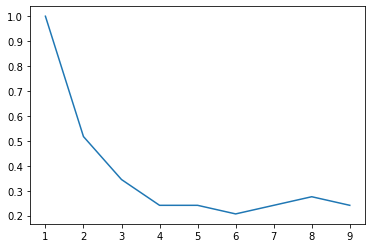

In [848]:
plt.plot(range(1,10),acc)

# 79) location_Sarjapur

In [849]:
df79 = df[df['location_Sarjapur']==1]

In [850]:
df79 = df79[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [851]:
df79

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
5620     3      2.0  14800          2250.0    3     6577.777778   
5621     3      1.0   7500          1600.0    3     4687.500000   
5622     2      0.0   4349          1242.5    2     3500.201207   
5623     2      1.0   3200           913.0    2     3504.928806   
5624     2      1.0   6000          1128.0    2     5319.148936   
5625     2      2.0   4700          1185.0    2     3966.244726   
5626     1      0.0   1753           649.5    1     2699.769053   
5627     2      2.0   3500          1020.0    2     3431.372549   
5628     2      1.0   4200          1195.0    2     3514.644351   
5629     2      1.0   4400          1240.0    2     3548.387097   
5630     2      2.0   3250           950.0    2     3421.052632   
5631     2      2.0   6800          1285.0    3     5291.828794   
5632     2      1.0   2500           925.0    2     2702.702703   
5633     3      1.0  16000          3190.0    4     5015.673981   
5634     2      0.0   4000          1215.0    2     3292.181070   
5635     3      2.0   7800          1200.0    3     6500.000000   
5636     2      2.0   3000          1000.0    2     3000.000000   
5637     2      1.0   4000          1157.0    2     3457.216940   
5638     3      1.0  14000          2238.0    3     6255.585344   
5639     3      3.0   8500          2020.0    3     4207.920792   
5640     3      1.0  18500          2885.0    4     6412.478336   
5641     2      1.0   4430          1240.0    2     3572.580645   
5642     1      1.0   1900           625.0    1     3040.000000   
5643     4      0.0  13950          2585.5    4     5395.474763   
5644     2      1.0   2538           940.0    2     2700.000000   
5645     3      1.0  12500          2100.0    4     5952.380952   
5646     2      1.0   3600           913.0    2     3943.044907   
5647     2      0.0   5335          1404.0    3     3799.857550   
5648     3      1.0   8800          1830.0    3     4808.743169   
5649     2      2.0   5600          1364.0    3     4105.571848   
5650     2      1.0   3035          1124.0    2     2700.177936   
5651     2      2.0   3200          1044.0    2     3065.134100   
5652     1      2.0   1987           650.0    1     3056.923077   
5653     2      2.0   4200          1175.0    2     3574.468085   
5654     2      2.0   4310          1240.0    2     3475.806452   
5655     2      1.0   4200          1032.0    2     4069.767442   
5656     2      2.0   3400          1044.0    2     3256.704981   
5657     3      2.0   7613          1200.0    3     6344.166667   
5658     2      2.0   6200          1200.0    2     5166.666667   
5659     2      2.0   2798           900.0    2     3108.888889   
5660     2      2.0   2900          1205.0    2     2406.639004   
5661     2      2.0   3200           850.0    2     3764.705882   
5662     2      1.0   4168          1175.0    2     3547.234043   
5663     2      2.0   3300           920.0    2     3586.956522   
5664     2      1.0   4100          1150.0    2     3565.217391   
5665     2      1.0   4260          1200.0    2     3550.000000   
5666     3      1.0   5000          1333.0    3     3750.937734   
5667     2      2.0   3600          1044.0    2     3448.275862   
5668     2      2.0   3500           950.0    2     3684.210526   
5669     3      0.0  10000          2172.0    3     4604.051565   
5670     1      1.0   1709           633.0    1     2699.842022   
5671     2      1.0   8700          1451.0    2     5995.864921   
5672     3      3.0  14000          2400.0    4     5833.333333   
5673     2      2.0   6800          1525.0    3     4459.016393   
5674     2      1.0   4500          1095.0    2     4109.589041   
5675     3      2.0   5700          1425.0    3     4000.000000   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
5620                              0                        0   
5621                              0                       

In [852]:
df79.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.021019  0.782876        0.799691   
balcony                        0.021019  1.000000 -0.032586       -0.080708   
price                          0.782876 -0.032586  1.000000        0.953950   
total_sqft_int                 0.799691 -0.080708  0.953950        1.000000   
bhk                            0.886844  0.050036  0.859228        0.875472   
price_per_sqft                 0.685829  0.084494  0.844885        0.680117   
area_typeSuper built-up  Area -0.658424  0.039764 -0.662683       -0.610329   
area_typeBuilt-up  Area        0.305324 -0.113141  0.273124        0.269041   
area_typePlot  Area            0.544581  0.070761  0.585507        0.520103   
availability_Ready To Move    -0.105550  0.271554 -0.076816       -0.033062   

                                    bhk  price_per_sqft  \
bath                           0.886844        0.685829   
balcony                        0.050036        0.084494   
price                          0.859228        0.844885   
total_sqft_int                 0.875472        0.680117   
bhk                            1.000000        0.721383   
price_per_sqft                 0.721383        1.000000   
area_typeSuper built-up  Area -0.647549       -0.621461   
area_typeBuilt-up  Area        0.340975        0.208054   
area_typePlot  Area            0.491046        0.601709   
availability_Ready To Move    -0.041877       -0.125344   

                               area_typeSuper built-up  Area  \
bath                                               -0.658424   
balcony                                             0.039764   
price                                              -0.662683   
total_sqft_int                                     -0.610329   
bhk                                                -0.647549   
price_per_sqft                                     -0.621461   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.677449   
area_typePlot  Area                                -0.593171   
availability_Ready To Move                          0.013312   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.305324             0.544581   
balcony                                      -0.113141             0.070761   
price                                         0.273124             0.585507   
total_sqft_int                                0.269041             0.520103   
bhk                                           0.340975             0.491046   
price_per_sqft                                0.208054             0.601709   
area_typeSuper built-up  Area                -0.677449            -0.593171   
area_typeBuilt-up  Area                       1.000000            -0.190347   
area_typePlot  Area                          -0.190347             1.000000   
availability_Ready To Move                    0.016233            -0.035533   

                               availability_Ready To Move  
bath                                            -0.105550  
balcony                                          0.271554  
price                                           -0.076816  
total_sqft_int                                  -0.033062  
bhk                                             -0.041877  
price_per_sqft                                  -0.125344  
area_typeSuper built-up  Area                    0.013312  
area_typeBuilt-up  Area                          0.016233  
area_typePlot  Area                             -0.035533  
availability_Ready To Move                       1.000000

In [853]:
x = df79[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df79[['price']]

In [854]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5178571428571429]
k= 3 [1.0, 0.5178571428571429, 0.26785714285714285]
k= 4 [1.0, 0.5178571428571429, 0.26785714285714285, 0.19642857142857142]
k= 5 [1.0, 0.5178571428571429, 0.26785714285714285, 0.19642857142857142, 0.16071428571428573]
k= 6 [1.0, 0.5178571428571429, 0.26785714285714285, 0.19642857142857142, 0.16071428571428573, 0.14285714285714285]
k= 7 [1.0, 0.5178571428571429, 0.26785714285714285, 0.19642857142857142, 0.16071428571428573, 0.14285714285714285, 0.16071428571428573]
k= 8 [1.0, 0.5178571428571429, 0.26785714285714285, 0.19642857142857142, 0.16071428571428573, 0.14285714285714285, 0.16071428571428573, 0.14285714285714285]
k= 9 [1.0, 0.5178571428571429, 0.26785714285714285, 0.19642857142857142, 0.16071428571428573, 0.14285714285714285, 0.16071428571428573, 0.14285714285714285, 0.14285714285714285]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [855]:
max(acc)

1.0

In [856]:
k = acc.index(max(acc))+1
k

1

In [857]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


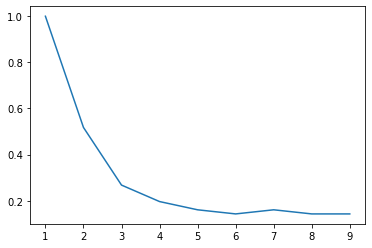

In [858]:
plt.plot(range(1,10),acc)

# 80) location_Sarjapur Road

In [859]:
df80 = df[df['location_Sarjapur  Road']==1]

In [860]:
df80 = df80[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [861]:
df80

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
5676     3  2.000000  14000          2497.0    3     5606.728074   
5677     3  2.000000   9829          1787.0    3     5500.279799   
5678     3  2.000000  12500          1787.0    3     6994.963626   
5679     2  1.000000   6700          1000.0    2     6700.000000   
5680     2  1.000000   7403          1346.0    2     5500.000000   
...    ...       ...    ...             ...  ...             ...   
5854     2  1.000000   5800          1112.0    2     5215.827338   
5855     2  1.584376   7500          1340.0    2     5597.014925   
5856     3  2.000000  27500          3500.0    3     7857.142857   
5857     2  1.000000   7000          1132.0    2     6183.745583   
5858     5  1.000000  19500          2425.0    4     8041.237113   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
5676                              0                        1   
5677                              1                        0   
5678                              1                        0   
5679                              1                        0   
5680                              1                        0   
...                             ...                      ...   
5854                              1                        0   
5855                              1                        0   
5856                              0                        0   
5857                              1                        0   
5858                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
5676                    0                           1  
5677                    0                           0  
5678                    0                           1  
5679                    0                           0  
5680                    0                           0  
...                   ...                         ...  
5854                    0                           0  
5855                    0                           1  
5856                    1                           1  
5857                    0                           0  
5858                    0                           1  

[183 rows x 10 columns]

In [862]:
df80.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.305727  0.797282        0.777759   
balcony                        0.305727  1.000000  0.277077        0.270385   
price                          0.797282  0.277077  1.000000        0.967365   
total_sqft_int                 0.777759  0.270385  0.967365        1.000000   
bhk                            0.841697  0.352724  0.773770        0.786853   
price_per_sqft                 0.553952  0.237161  0.643510        0.451501   
area_typeSuper built-up  Area -0.071478 -0.099765 -0.130139       -0.158458   
area_typeBuilt-up  Area        0.009143  0.085190  0.056889        0.112499   
area_typePlot  Area            0.105378  0.047020  0.136263        0.106191   
availability_Ready To Move     0.265812  0.329367  0.289180        0.243792   

                                    bhk  price_per_sqft  \
bath                           0.841697        0.553952   
balcony                        0.352724        0.237161   
price                          0.773770        0.643510   
total_sqft_int                 0.786853        0.451501   
bhk                            1.000000        0.482816   
price_per_sqft                 0.482816        1.000000   
area_typeSuper built-up  Area -0.122885       -0.003396   
area_typeBuilt-up  Area        0.031756       -0.091557   
area_typePlot  Area            0.159008        0.132093   
availability_Ready To Move     0.224674        0.298810   

                               area_typeSuper built-up  Area  \
bath                                               -0.071478   
balcony                                            -0.099765   
price                                              -0.130139   
total_sqft_int                                     -0.158458   
bhk                                                -0.122885   
price_per_sqft                                     -0.003396   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.796700   
area_typePlot  Area                                -0.550325   
availability_Ready To Move                          0.037444   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.009143             0.105378   
balcony                                       0.085190             0.047020   
price                                         0.056889             0.136263   
total_sqft_int                                0.112499             0.106191   
bhk                                           0.031756             0.159008   
price_per_sqft                               -0.091557             0.132093   
area_typeSuper built-up  Area                -0.796700            -0.550325   
area_typeBuilt-up  Area                       1.000000            -0.066180   
area_typePlot  Area                          -0.066180             1.000000   
availability_Ready To Move                    0.027035            -0.099169   

                               availability_Ready To Move  
bath                                             0.265812  
balcony                                          0.329367  
price                                            0.289180  
total_sqft_int                                   0.243792  
bhk                                              0.224674  
price_per_sqft                                   0.298810  
area_typeSuper built-up  Area                    0.037444  
area_typeBuilt-up  Area                          0.027035  
area_typePlot  Area                             -0.099169  
availability_Ready To Move                       1.000000

In [863]:
x = df80[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df80[['price']]

In [864]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6612021857923497]
k= 3 [1.0, 0.6612021857923497, 0.4207650273224044]
k= 4 [1.0, 0.6612021857923497, 0.4207650273224044, 0.3114754098360656]
k= 5 [1.0, 0.6612021857923497, 0.4207650273224044, 0.3114754098360656, 0.29508196721311475]
k= 6 [1.0, 0.6612021857923497, 0.4207650273224044, 0.3114754098360656, 0.29508196721311475, 0.2786885245901639]
k= 7 [1.0, 0.6612021857923497, 0.4207650273224044, 0.3114754098360656, 0.29508196721311475, 0.2786885245901639, 0.23497267759562843]
k= 8 [1.0, 0.6612021857923497, 0.4207650273224044, 0.3114754098360656, 0.29508196721311475, 0.2786885245901639, 0.23497267759562843, 0.26229508196721313]
k= 9 [1.0, 0.6612021857923497, 0.4207650273224044, 0.3114754098360656, 0.29508196721311475, 0.2786885245901639, 0.23497267759562843, 0.26229508196721313, 0.24043715846994534]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [865]:
max(acc)

1.0

In [866]:
k = acc.index(max(acc))+1
k

1

In [867]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


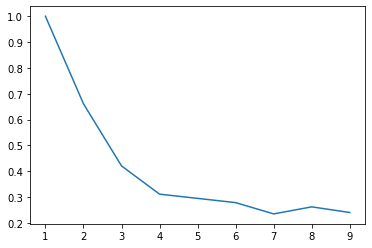

In [868]:
plt.plot(range(1,10),acc)

# 81) location_Subramanyapura

In [869]:
df81 = df[df['location_Subramanyapura']==1]

In [870]:
df81 = df81[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [871]:
df81

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
6059     2      0.0   5017           929.0    2     5400.430571   
6060     2      2.0   5200          1200.0    2     4333.333333   
6061     2      1.0   5800           975.0    2     5948.717949   
6062     2      2.0   5500          1277.0    2     4306.969460   
6063     2      1.0   5800           985.0    2     5888.324873   
6064     2      1.0   6800          1245.0    3     5461.847390   
6065     2      2.0   7300          1313.0    2     5559.786748   
6066     2      2.0   6650          1313.0    2     5064.737243   
6067     2      2.0   7900          1255.0    3     6294.820717   
6068     3      2.0   7200          1330.0    3     5413.533835   
6069     2      1.0   4800           929.0    2     5166.846071   
6070     2      1.0   5500           950.0    2     5789.473684   
6071     2      1.0   5600           929.0    2     6027.987083   
6072     2      2.0   7600          1260.0    3     6031.746032   
6073     2      1.0   5500           960.0    2     5729.166667   
6074     2      1.0   7300          1260.0    3     5793.650794   
6075     3      2.0   7000          1278.0    3     5477.308294   
6076     2      2.0   4900           929.0    2     5274.488698   
6077     2      1.0   7500          1260.0    3     5952.380952   
6078     2      1.0   4500          1000.0    2     4500.000000   
6079     1      2.0   5100           929.0    2     5489.773950   
6080     3      2.0  11000          1880.0    3     5851.063830   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
6059                              1                        0   
6060                              0                        1   
6061                              1                        0   
6062                              0                        1   
6063                              1                        0   
6064                              1                        0   
6065                              1                        0   
6066                              1                        0   
6067                              1                        0   
6068                              1                        0   
6069                              0                        1   
6070                              1                        0   
6071                              1                        0   
6072                              0                        1   
6073                              1                        0   
6074                              1                        0   
6075                              1                        0   
6076                              1                        0   
6077                              1                        0   
6078                              1                        0   
6079                              1                        0   
6080                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
6059                    0                           1  
6060                    0                           1  
6061                    0                           1  
6062                    0                           1  
6063                    0                           1  
6064                    0                           1  
6065                    0                           1  
6066                    0                           1  
6067                    0                           1  
6068                    0                           1  
6069                    0                           1  
6070                    0                           1  
6071                    0                           1  
6072                    0                           1  
6073                    0                           1  
6074                    0                           1  
6075                    0              

In [872]:
df81.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.204479  0.559519        0.607725   
balcony                        0.204479  1.000000  0.374413        0.520008   
price                          0.559519  0.374413  1.000000        0.900404   
total_sqft_int                 0.607725  0.520008  0.900404        1.000000   
bhk                            0.515491  0.221356  0.756412        0.646419   
price_per_sqft                 0.056138 -0.174626  0.473950        0.047488   
area_typeSuper built-up  Area  0.102869 -0.239268  0.183852       -0.026423   
area_typeBuilt-up  Area       -0.102869  0.239268 -0.183852        0.026423   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move          NaN       NaN       NaN             NaN   

                                    bhk  price_per_sqft  \
bath                           0.515491        0.056138   
balcony                        0.221356       -0.174626   
price                          0.756412        0.473950   
total_sqft_int                 0.646419        0.047488   
bhk                            1.000000        0.419194   
price_per_sqft                 0.419194        1.000000   
area_typeSuper built-up  Area  0.111359        0.467973   
area_typeBuilt-up  Area       -0.111359       -0.467973   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move          NaN             NaN   

                               area_typeSuper built-up  Area  \
bath                                                0.102869   
balcony                                            -0.239268   
price                                               0.183852   
total_sqft_int                                     -0.026423   
bhk                                                 0.111359   
price_per_sqft                                      0.467973   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                               NaN   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.102869                  NaN   
balcony                                       0.239268                  NaN   
price                                        -0.183852                  NaN   
total_sqft_int                                0.026423                  NaN   
bhk                                          -0.111359                  NaN   
price_per_sqft                               -0.467973                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                         NaN                  NaN   

                               availability_Ready To Move  
bath                                                  NaN  
balcony                                               NaN  
price                                                 NaN  
total_sqft_int                                        NaN  
bhk                                                   NaN  
price_per_sqft                                        NaN  
area_typeSuper built-up  Area                         NaN  
area_typeBuilt-up  Area                               NaN  
area_typePlot  Area                                   NaN  
availability_Ready To Move                            NaN

In [873]:
x = df81[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df81[['price']]

In [874]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5909090909090909]
k= 3 [1.0, 0.5909090909090909, 0.36363636363636365]
k= 4 [1.0, 0.5909090909090909, 0.36363636363636365, 0.36363636363636365]
k= 5 [1.0, 0.5909090909090909, 0.36363636363636365, 0.36363636363636365, 0.2727272727272727]
k= 6 [1.0, 0.5909090909090909, 0.36363636363636365, 0.36363636363636365, 0.2727272727272727, 0.2727272727272727]
k= 7 [1.0, 0.5909090909090909, 0.36363636363636365, 0.36363636363636365, 0.2727272727272727, 0.2727272727272727, 0.22727272727272727]
k= 8 [1.0, 0.5909090909090909, 0.36363636363636365, 0.36363636363636365, 0.2727272727272727, 0.2727272727272727, 0.22727272727272727, 0.22727272727272727]
k= 9 [1.0, 0.5909090909090909, 0.36363636363636365, 0.36363636363636365, 0.2727272727272727, 0.2727272727272727, 0.22727272727272727, 0.22727272727272727, 0.22727272727272727]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [875]:
max(acc)

1.0

In [876]:
k = acc.index(max(acc))+1
k

1

In [877]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


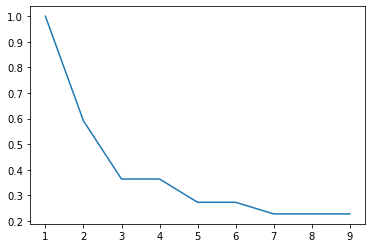

In [878]:
plt.plot(range(1,10),acc)

# 82) location_Talaghattapura

In [879]:
df82 = df[df['location_Talaghattapura']==1]

In [880]:
df82 = df82[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [881]:
df82

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
6127     3      2.0  13100          1868.0    3     7012.847966   
6128     3      0.0  12000          2038.5    3     5886.681383   
6129     3      2.0  12600          2106.0    3     5982.905983   
6130     3      1.0  12100          1868.0    3     6477.516060   
6131     3      2.0  12600          2106.0    3     5982.905983   
6132     3      1.0  13500          1868.0    3     7226.980728   
6133     3      2.0  13500          1856.0    3     7273.706897   
6134     3      1.0  12000          1868.0    3     6423.982869   
6135     3      1.0  11500          1804.0    3     6374.722838   
6136     3      2.0  13500          1856.0    3     7273.706897   
6137     3      2.0  15300          2254.0    3     6787.932564   
6138     3      3.0  14800          2106.0    3     7027.540361   
6139     3      2.0  13500          1856.0    3     7273.706897   
6140     3      3.0  15900          2273.0    3     6995.160581   
6141     3      3.0  14700          2099.0    3     7003.334921   
6142     2      0.0   5000          1100.0    2     4545.454545   
6143     2      1.0   4949          1100.0    2     4499.090909   
6144     3      2.0   8000          1575.0    3     5079.365079   
6145     3      2.0  14500          2273.0    3     6379.234492   
6146     2      2.0   6200          1175.0    2     5276.595745   
6147     3      2.0  12700          1804.0    3     7039.911308   
6148     2      1.0   4248          1062.0    2     4000.000000   
6149     3      0.0  12200          2038.5    3     5984.792740   
6150     3      1.0   8400          1800.0    3     4666.666667   
6151     3      3.0  15900          2265.0    3     7019.867550   
6152     3      2.0  13400          2099.0    3     6383.992377   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
6127                              1                        0   
6128                              1                        0   
6129                              1                        0   
6130                              1                        0   
6131                              1                        0   
6132                              1                        0   
6133                              1                        0   
6134                              1                        0   
6135                              1                        0   
6136                              1                        0   
6137                              1                        0   
6138                              1                        0   
6139                              1                        0   
6140                              1                        0   
6141                              1                        0   
6142                              0                        1   
6143                              1                        0   
6144                              1                        0   
6145                              1                        0   
6146                              1                        0   
6147                              1                        0   
6148                              1                        0   
6149                              1                        0   
6150                              0                        1   
6151                              1                        0   
6152                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
6127                    0                           0  
6128                    0                           0  
6129                    0                           1  
6130                    0                           0  
6131                    0                           1  
6132                    0                           0  
6133                    0                           0  
6134               

In [882]:
df82.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.318803  0.842761        0.878110   
balcony                        0.318803  1.000000  0.549124        0.448944   
price                          0.842761  0.549124  1.000000        0.938163   
total_sqft_int                 0.878110  0.448944  0.938163        1.000000   
bhk                            1.000000  0.318803  0.842761        0.878110   
price_per_sqft                 0.726889  0.527419  0.909203        0.720272   
area_typeSuper built-up  Area  0.276956  0.380878  0.433700        0.321272   
area_typeBuilt-up  Area       -0.276956 -0.380878 -0.433700       -0.321272   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move    -0.702500 -0.156355 -0.739932       -0.657695   

                                    bhk  price_per_sqft  \
bath                           1.000000        0.726889   
balcony                        0.318803        0.527419   
price                          0.842761        0.909203   
total_sqft_int                 0.878110        0.720272   
bhk                            1.000000        0.726889   
price_per_sqft                 0.726889        1.000000   
area_typeSuper built-up  Area  0.276956        0.484399   
area_typeBuilt-up  Area       -0.276956       -0.484399   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move    -0.702500       -0.737944   

                               area_typeSuper built-up  Area  \
bath                                                0.276956   
balcony                                             0.380878   
price                                               0.433700   
total_sqft_int                                      0.321272   
bhk                                                 0.276956   
price_per_sqft                                      0.484399   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.150188   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.276956                  NaN   
balcony                                      -0.380878                  NaN   
price                                        -0.433700                  NaN   
total_sqft_int                               -0.321272                  NaN   
bhk                                          -0.276956                  NaN   
price_per_sqft                               -0.484399                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.150188                  NaN   

                               availability_Ready To Move  
bath                                            -0.702500  
balcony                                         -0.156355  
price                                           -0.739932  
total_sqft_int                                  -0.657695  
bhk                                             -0.702500  
price_per_sqft                                  -0.737944  
area_typeSuper built-up  Area                   -0.150188  
area_typeBuilt-up  Area                          0.150188  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [883]:
x = df82[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df82[['price']]

In [884]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.7307692307692307]
k= 3 [1.0, 0.7307692307692307, 0.5]
k= 4 [1.0, 0.7307692307692307, 0.5, 0.38461538461538464]
k= 5 [1.0, 0.7307692307692307, 0.5, 0.38461538461538464, 0.38461538461538464]
k= 6 [1.0, 0.7307692307692307, 0.5, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464]
k= 7 [1.0, 0.7307692307692307, 0.5, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464]
k= 8 [1.0, 0.7307692307692307, 0.5, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.3076923076923077]
k= 9 [1.0, 0.7307692307692307, 0.5, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.3076923076923077, 0.23076923076923078]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [885]:
max(acc)

1.0

In [886]:
k = acc.index(max(acc))+1
k

1

In [887]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


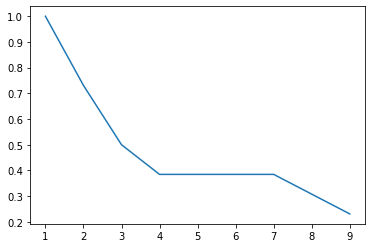

In [888]:
plt.plot(range(1,10),acc)

# 83) location_TC Palaya

In [889]:
df83 = df[df['location_TC Palaya']==1]

In [890]:
df83 = df83[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [891]:
df83

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
6100     3      1.0   9800          1475.0    3     6644.067797   
6101     2      0.0   6000          1200.0    2     5000.000000   
6102     2      1.0   6000          1240.0    2     4838.709677   
6103     2      1.0  10000          1500.0    3     6666.666667   
6104     2      0.0   6500          1200.0    2     5416.666667   
6105     2      0.0   7000          1200.0    2     5833.333333   
6106     2      0.0   5500           900.0    2     6111.111111   
6107     3      3.0  30200          4800.0    4     6291.666667   
6108     2      0.0   6400          1000.0    2     6400.000000   
6109     2      0.0   5500           900.0    2     6111.111111   
6110     2      0.0   6600          1200.0    2     5500.000000   
6111     2      0.0   5500           900.0    2     6111.111111   
6112     2      0.0   5500           900.0    2     6111.111111   
6113     2      0.0   6500          1200.0    2     5416.666667   
6114     2      0.0   7500          1500.0    2     5000.000000   
6115     2      0.0   7000          1000.0    2     7000.000000   
6116     2      0.0   6500          1100.0    2     5909.090909   
6117     2      2.0   8000          1800.0    2     4444.444444   
6118     2      1.0   7000          1200.0    2     5833.333333   
6119     1      0.0   5500          1350.0    1     4074.074074   
6120     2      0.0   5500           900.0    2     6111.111111   
6121     2      0.0   5500           900.0    2     6111.111111   
6122     2      2.0   6400          1082.0    2     5914.972274   
6123     2      2.0   5500          1152.0    2     4774.305556   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
6100                              0                        0   
6101                              0                        0   
6102                              0                        0   
6103                              0                        0   
6104                              0                        0   
6105                              0                        0   
6106                              0                        0   
6107                              0                        0   
6108                              0                        1   
6109                              0                        0   
6110                              0                        0   
6111                              0                        0   
6112                              0                        0   
6113                              0                        1   
6114                              1                        0   
6115                              0                        1   
6116                              0                        1   
6117                              0                        1   
6118                              0                        0   
6119                              0                        0   
6120                              0                        0   
6121                              0                        0   
6122                              0                        1   
6123                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
6100                    1                           0  
6101                    1                           1  
6102                    1                           1  
6103                    1                           1  
6104                    1                           1  
6105                    1                           1  
6106                    1                           1  
6107                    1                           1  
6108                    0                           1  
6109                    1                           1  
6110                    1                           1  
6111                    1                           1  
6

In [892]:
df83.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.474472  0.655815        0.562310   
balcony                        0.474472  1.000000  0.641610        0.680996   
price                          0.655815  0.641610  1.000000        0.977713   
total_sqft_int                 0.562310  0.680996  0.977713        1.000000   
bhk                            0.875297  0.584459  0.846252        0.757592   
price_per_sqft                 0.514963 -0.095003  0.220589        0.015177   
area_typeSuper built-up  Area -0.035783  0.159756 -0.065450        0.003712   
area_typeBuilt-up  Area       -0.068519  0.083430 -0.089802       -0.090689   
area_typePlot  Area            0.083918 -0.170301  0.120862        0.081127   
availability_Ready To Move    -0.569160 -0.110482 -0.095872       -0.043363   

                                    bhk  price_per_sqft  \
bath                           0.875297        0.514963   
balcony                        0.584459       -0.095003   
price                          0.846252        0.220589   
total_sqft_int                 0.757592        0.015177   
bhk                            1.000000        0.508030   
price_per_sqft                 0.508030        1.000000   
area_typeSuper built-up  Area -0.071734       -0.354430   
area_typeBuilt-up  Area       -0.137361        0.090657   
area_typePlot  Area            0.168232        0.124529   
availability_Ready To Move    -0.347262       -0.263193   

                               area_typeSuper built-up  Area  \
bath                                               -0.035783   
balcony                                             0.159756   
price                                              -0.065450   
total_sqft_int                                      0.003712   
bhk                                                -0.071734   
price_per_sqft                                     -0.354430   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.174078   
area_typePlot  Area                                -0.426401   
availability_Ready To Move                          0.062869   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.068519             0.083918   
balcony                                       0.083430            -0.170301   
price                                        -0.089802             0.120862   
total_sqft_int                               -0.090689             0.081127   
bhk                                          -0.137361             0.168232   
price_per_sqft                                0.090657             0.124529   
area_typeSuper built-up  Area                -0.174078            -0.426401   
area_typeBuilt-up  Area                       1.000000            -0.816497   
area_typePlot  Area                          -0.816497             1.000000   
availability_Ready To Move                    0.120386            -0.147442   

                               availability_Ready To Move  
bath                                            -0.569160  
balcony                                         -0.110482  
price                                           -0.095872  
total_sqft_int                                  -0.043363  
bhk                                             -0.347262  
price_per_sqft                                  -0.263193  
area_typeSuper built-up  Area                    0.062869  
area_typeBuilt-up  Area                          0.120386  
area_typePlot  Area                             -0.147442  
availability_Ready To Move                       1.000000

In [893]:
x = df83[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df83[['price']]

In [894]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6666666666666666]
k= 3 [1.0, 0.6666666666666666, 0.5833333333333334]
k= 4 [1.0, 0.6666666666666666, 0.5833333333333334, 0.5416666666666666]
k= 5 [1.0, 0.6666666666666666, 0.5833333333333334, 0.5416666666666666, 0.5416666666666666]
k= 6 [1.0, 0.6666666666666666, 0.5833333333333334, 0.5416666666666666, 0.5416666666666666, 0.5416666666666666]
k= 7 [1.0, 0.6666666666666666, 0.5833333333333334, 0.5416666666666666, 0.5416666666666666, 0.5416666666666666, 0.4583333333333333]
k= 8 [1.0, 0.6666666666666666, 0.5833333333333334, 0.5416666666666666, 0.5416666666666666, 0.5416666666666666, 0.4583333333333333, 0.4583333333333333]
k= 9 [1.0, 0.6666666666666666, 0.5833333333333334, 0.5416666666666666, 0.5416666666666666, 0.5416666666666666, 0.4583333333333333, 0.4583333333333333, 0.4583333333333333]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [895]:
max(acc)

1.0

In [896]:
k = acc.index(max(acc))+1
k

1

In [897]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


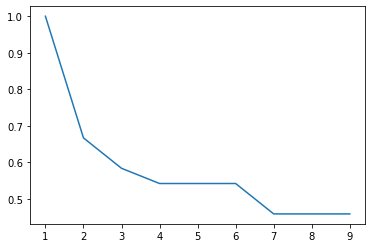

In [898]:
plt.plot(range(1,10),acc)

# 84) location_Thanisandra

In [899]:
df84 = df[df['location_Thanisandra']==1]

In [900]:
df84 = df84[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [901]:
df84

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
6166     2      3.0   8000          1296.0    2     6172.839506   
6167     3      2.0  14500          2144.0    3     6763.059701   
6168     2      2.0   8300          1296.0    2     6404.320988   
6169     3      2.0  13500          2144.0    3     6296.641791   
6170     2      2.0   7000          1093.0    2     6404.391583   
...    ...      ...    ...             ...  ...             ...   
6264     4      1.0  22000          3671.0    4     5992.917461   
6265     2      2.0   9000          1305.0    2     6896.551724   
6266     4      2.0  12500          1965.0    3     6361.323155   
6267     3      2.0  10000          1573.0    3     6357.279085   
6268     4      2.0  13000          1917.0    4     6781.429317   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
6166                              1                        0   
6167                              1                        0   
6168                              1                        0   
6169                              1                        0   
6170                              1                        0   
...                             ...                      ...   
6264                              0                        1   
6265                              1                        0   
6266                              1                        0   
6267                              1                        0   
6268                              0                        1   

      area_typePlot  Area  availability_Ready To Move  
6166                    0                           0  
6167                    0                           1  
6168                    0                           1  
6169                    0                           1  
6170                    0                           1  
...                   ...                         ...  
6264                    0                           0  
6265                    0                           1  
6266                    0                           1  
6267                    0                           0  
6268                    0                           0  

[103 rows x 10 columns]

In [902]:
df84.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.379498  0.892845        0.881878   
balcony                        0.379498  1.000000  0.423372        0.334512   
price                          0.892845  0.423372  1.000000        0.966755   
total_sqft_int                 0.881878  0.334512  0.966755        1.000000   
bhk                            0.924317  0.322630  0.880185        0.885437   
price_per_sqft                 0.318720  0.420179  0.418247        0.203768   
area_typeSuper built-up  Area -0.109613  0.213034 -0.142032       -0.227204   
area_typeBuilt-up  Area        0.159143 -0.200196  0.171619        0.238817   
area_typePlot  Area           -0.149473 -0.066473 -0.080497       -0.011903   
availability_Ready To Move     0.050029  0.310407  0.091766        0.077915   

                                    bhk  price_per_sqft  \
bath                           0.924317        0.318720   
balcony                        0.322630        0.420179   
price                          0.880185        0.418247   
total_sqft_int                 0.885437        0.203768   
bhk                            1.000000        0.313911   
price_per_sqft                 0.313911        1.000000   
area_typeSuper built-up  Area -0.179294        0.211698   
area_typeBuilt-up  Area        0.232793       -0.136653   
area_typePlot  Area           -0.154455       -0.269857   
availability_Ready To Move     0.107705        0.161898   

                               area_typeSuper built-up  Area  \
bath                                               -0.109613   
balcony                                             0.213034   
price                                              -0.142032   
total_sqft_int                                     -0.227204   
bhk                                                -0.179294   
price_per_sqft                                      0.211698   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.955475   
area_typePlot  Area                                -0.260525   
availability_Ready To Move                          0.072942   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.159143            -0.149473   
balcony                                      -0.200196            -0.066473   
price                                         0.171619            -0.080497   
total_sqft_int                                0.238817            -0.011903   
bhk                                           0.232793            -0.154455   
price_per_sqft                               -0.136653            -0.269857   
area_typeSuper built-up  Area                -0.955475            -0.260525   
area_typeBuilt-up  Area                       1.000000            -0.035956   
area_typePlot  Area                          -0.035956             1.000000   
availability_Ready To Move                   -0.098640             0.075707   

                               availability_Ready To Move  
bath                                             0.050029  
balcony                                          0.310407  
price                                            0.091766  
total_sqft_int                                   0.077915  
bhk                                              0.107705  
price_per_sqft                                   0.161898  
area_typeSuper built-up  Area                    0.072942  
area_typeBuilt-up  Area                         -0.098640  
area_typePlot  Area                              0.075707  
availability_Ready To Move                       1.000000

In [903]:
x = df84[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df84[['price']]

In [904]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6310679611650486]
k= 3 [1.0, 0.6310679611650486, 0.42718446601941745]
k= 4 [1.0, 0.6310679611650486, 0.42718446601941745, 0.34951456310679613]
k= 5 [1.0, 0.6310679611650486, 0.42718446601941745, 0.34951456310679613, 0.34951456310679613]
k= 6 [1.0, 0.6310679611650486, 0.42718446601941745, 0.34951456310679613, 0.34951456310679613, 0.32038834951456313]
k= 7 [1.0, 0.6310679611650486, 0.42718446601941745, 0.34951456310679613, 0.34951456310679613, 0.32038834951456313, 0.2815533980582524]
k= 8 [1.0, 0.6310679611650486, 0.42718446601941745, 0.34951456310679613, 0.34951456310679613, 0.32038834951456313, 0.2815533980582524, 0.2524271844660194]
k= 9 [1.0, 0.6310679611650486, 0.42718446601941745, 0.34951456310679613, 0.34951456310679613, 0.32038834951456313, 0.2815533980582524, 0.2524271844660194, 0.23300970873786409]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [905]:
max(acc)

1.0

In [906]:
k = acc.index(max(acc))+1
k

1

In [907]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


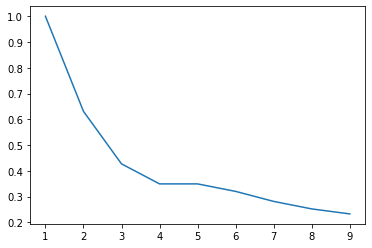

In [908]:
plt.plot(range(1,10),acc)

# 85) location_Thigalarapalya

In [909]:
df85 = df[df['location_Thigalarapalya']==1]

In [910]:
df85 = df85[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [911]:
df85

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
6274     2  2.000000  10300          1297.0    2     7941.403238   
6275     2  2.000000   9500          1418.0    2     6699.576869   
6276     2  2.000000  10300          1418.0    2     7263.751763   
6277     2  2.000000  10100          1418.0    2     7122.708039   
6278     2  2.000000  10400          1418.0    2     7334.273625   
6279     5  2.000000  22500          3122.0    4     7206.918642   
6280     2  2.000000  10300          1418.0    2     7263.751763   
6281     4  2.000000  15900          2072.0    3     7673.745174   
6282     2  2.000000  10600          1418.0    2     7475.317348   
6283     2  2.000000  10400          1418.0    2     7334.273625   
6284     2  2.000000  10500          1418.0    2     7404.795487   
6285     2  2.000000  10400          1418.0    2     7334.273625   
6286     2  2.000000  10600          1418.0    2     7475.317348   
6287     4  2.000000  15500          2072.0    3     7480.694981   
6288     4  2.000000  13500          1830.0    3     7377.049180   
6289     2  2.000000  10500          1418.0    2     7404.795487   
6290     4  2.000000  16000          2072.0    3     7722.007722   
6291     4  2.000000  16000          2072.0    3     7722.007722   
6292     4  2.000000  15500          2072.0    3     7480.694981   
6293     4  2.000000  15300          2072.0    3     7384.169884   
6294     4  2.000000  15700          2072.0    3     7577.220077   
6295     2  2.000000  10500          1418.0    2     7404.795487   
6296     5  2.000000  24900          3362.0    4     7406.305770   
6297     4  1.584376  32500          4190.0    4     7756.563246   
6298     2  2.000000  10500          1400.0    2     7500.000000   
6299     2  2.000000   9800          1297.0    2     7555.898227   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
6274                              1                        0   
6275                              1                        0   
6276                              1                        0   
6277                              1                        0   
6278                              1                        0   
6279                              1                        0   
6280                              1                        0   
6281                              1                        0   
6282                              1                        0   
6283                              1                        0   
6284                              1                        0   
6285                              1                        0   
6286                              1                        0   
6287                              1                        0   
6288                              1                        0   
6289                              1                        0   
6290                              1                        0   
6291                              1                        0   
6292                              1                        0   
6293                              1                        0   
6294                              1                        0   
6295                              1                        0   
6296                              0                        1   
6297                              1                        0   
6298                              1                        0   
6299                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
6274                    0                           1  
6275                    0                           1  
6276                    0                           1  
6277                    0                           1  
6278                    0                           1  
6279                    0                           1  
6280                    0                       

In [912]:
df85.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000 -0.194613  0.795113        0.801854   
balcony                       -0.194613  1.000000 -0.693789       -0.668464   
price                          0.795113 -0.693789  1.000000        0.996993   
total_sqft_int                 0.801854 -0.668464  0.996993        1.000000   
bhk                            0.957622 -0.422222  0.930434        0.937170   
price_per_sqft                 0.261259 -0.275732  0.303755        0.235086   
area_typeSuper built-up  Area -0.375326 -0.040000 -0.412285       -0.432249   
area_typeBuilt-up  Area        0.375326  0.040000  0.412285        0.432249   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move          NaN       NaN       NaN             NaN   

                                    bhk  price_per_sqft  \
bath                           0.957622        0.261259   
balcony                       -0.422222       -0.275732   
price                          0.930434        0.303755   
total_sqft_int                 0.937170        0.235086   
bhk                            1.000000        0.254936   
price_per_sqft                 0.254936        1.000000   
area_typeSuper built-up  Area -0.422222        0.024328   
area_typeBuilt-up  Area        0.422222       -0.024328   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move          NaN             NaN   

                               area_typeSuper built-up  Area  \
bath                                               -0.375326   
balcony                                            -0.040000   
price                                              -0.412285   
total_sqft_int                                     -0.432249   
bhk                                                -0.422222   
price_per_sqft                                      0.024328   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                               NaN   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.375326                  NaN   
balcony                                       0.040000                  NaN   
price                                         0.412285                  NaN   
total_sqft_int                                0.432249                  NaN   
bhk                                           0.422222                  NaN   
price_per_sqft                               -0.024328                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                         NaN                  NaN   

                               availability_Ready To Move  
bath                                                  NaN  
balcony                                               NaN  
price                                                 NaN  
total_sqft_int                                        NaN  
bhk                                                   NaN  
price_per_sqft                                        NaN  
area_typeSuper built-up  Area                         NaN  
area_typeBuilt-up  Area                               NaN  
area_typePlot  Area                                   NaN  
availability_Ready To Move                            NaN

In [913]:
x = df85[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df85[['price']]

In [914]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.8461538461538461]
k= 3 [1.0, 0.8461538461538461, 0.6538461538461539]
k= 4 [1.0, 0.8461538461538461, 0.6538461538461539, 0.5]
k= 5 [1.0, 0.8461538461538461, 0.6538461538461539, 0.5, 0.4230769230769231]
k= 6 [1.0, 0.8461538461538461, 0.6538461538461539, 0.5, 0.4230769230769231, 0.34615384615384615]
k= 7 [1.0, 0.8461538461538461, 0.6538461538461539, 0.5, 0.4230769230769231, 0.34615384615384615, 0.34615384615384615]
k= 8 [1.0, 0.8461538461538461, 0.6538461538461539, 0.5, 0.4230769230769231, 0.34615384615384615, 0.34615384615384615, 0.23076923076923078]
k= 9 [1.0, 0.8461538461538461, 0.6538461538461539, 0.5, 0.4230769230769231, 0.34615384615384615, 0.34615384615384615, 0.23076923076923078, 0.34615384615384615]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [915]:
max(acc)

1.0

In [916]:
k = acc.index(max(acc))+1
k

1

In [917]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


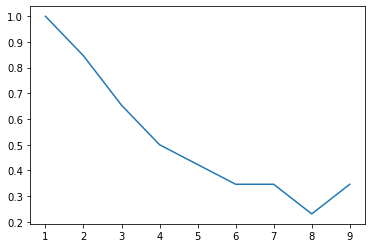

In [918]:
plt.plot(range(1,10),acc)

# 86) location_Tumkur Road

In [919]:
df86 = df[df['location_Tumkur Road']==1]

In [920]:
df86 = df86[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [921]:
df86

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
6337     3      3.0   9500          1500.0    3     6333.333333   
6338     3      2.0  11200          1779.0    3     6295.671726   
6339     3      1.0  10000          1586.0    3     6305.170240   
6340     2      1.0   7200          1098.0    2     6557.377049   
6341     3      1.0   9000          1354.0    3     6646.971935   
6342     2      1.0   8400          1240.0    3     6774.193548   
6343     2      1.0   8200          1239.0    2     6618.240517   
6344     2      1.0   8200          1246.0    2     6581.059390   
6345     3      3.0  10000          1500.0    3     6666.666667   
6346     3      1.0   9400          1416.0    3     6638.418079   
6347     2      1.0   6000          1027.0    2     5842.259007   
6348     2      1.0   6862          1027.0    2     6681.596884   
6349     2      1.0   9500          1459.0    3     6511.309116   
6350     2      1.0   6000           992.0    2     6048.387097   
6351     2      2.0   5250          1066.0    2     4924.953096   
6352     2      1.0   7900          1240.0    3     6370.967742   
6353     2      1.0   9500          1441.0    3     6592.643997   
6354     2      1.0   8300          1240.0    3     6693.548387   
6355     2      1.0   6700          1027.0    2     6523.855891   
6356     3      1.0   8586          1354.0    3     6341.211226   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
6337                              1                        0   
6338                              1                        0   
6339                              1                        0   
6340                              1                        0   
6341                              1                        0   
6342                              1                        0   
6343                              1                        0   
6344                              1                        0   
6345                              1                        0   
6346                              1                        0   
6347                              1                        0   
6348                              1                        0   
6349                              1                        0   
6350                              1                        0   
6351                              1                        0   
6352                              1                        0   
6353                              1                        0   
6354                              1                        0   
6355                              1                        0   
6356                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
6337                    0                           1  
6338                    0                           1  
6339                    0                           0  
6340                    0                           1  
6341                    0                           1  
6342                    0                           1  
6343                    0                           0  
6344                    0                           0  
6345                    0                           1  
6346                    0                           1  
6347                    0                           0  
6348                    0                           1  
6349                    0                           1  
6350                    0                           1  
6351                    0                           1  
6352                    0                           1  
6353                    0                           0  
6354                    0                           0  
6355                    0                           0  
6356                    0                           1

In [922]:
df86.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.474772  0.668474        0.721378   
balcony                        0.474772  1.000000  0.294945        0.406574   
price                          0.668474  0.294945  1.000000        0.957476   
total_sqft_int                 0.721378  0.406574  0.957476        1.000000   
bhk                            0.599145  0.223152  0.796926        0.781031   
price_per_sqft                 0.114963 -0.223595  0.527391        0.261310   
area_typeSuper built-up  Area       NaN       NaN       NaN             NaN   
area_typeBuilt-up  Area             NaN       NaN       NaN             NaN   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move     0.318681  0.343801  0.075478        0.116988   

                                    bhk  price_per_sqft  \
bath                           0.599145        0.114963   
balcony                        0.223152       -0.223595   
price                          0.796926        0.527391   
total_sqft_int                 0.781031        0.261310   
bhk                            1.000000        0.351934   
price_per_sqft                 0.351934        1.000000   
area_typeSuper built-up  Area       NaN             NaN   
area_typeBuilt-up  Area             NaN             NaN   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move     0.256776       -0.096735   

                               area_typeSuper built-up  Area  \
bath                                                     NaN   
balcony                                                  NaN   
price                                                    NaN   
total_sqft_int                                           NaN   
bhk                                                      NaN   
price_per_sqft                                           NaN   
area_typeSuper built-up  Area                            NaN   
area_typeBuilt-up  Area                                  NaN   
area_typePlot  Area                                      NaN   
availability_Ready To Move                               NaN   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                               NaN                  NaN   
balcony                                            NaN                  NaN   
price                                              NaN                  NaN   
total_sqft_int                                     NaN                  NaN   
bhk                                                NaN                  NaN   
price_per_sqft                                     NaN                  NaN   
area_typeSuper built-up  Area                      NaN                  NaN   
area_typeBuilt-up  Area                            NaN                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                         NaN                  NaN   

                               availability_Ready To Move  
bath                                             0.318681  
balcony                                          0.343801  
price                                            0.075478  
total_sqft_int                                   0.116988  
bhk                                              0.256776  
price_per_sqft                                  -0.096735  
area_typeSuper built-up  Area                         NaN  
area_typeBuilt-up  Area                               NaN  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [923]:
x = df86[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df86[['price']]

In [924]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6]
k= 3 [1.0, 0.6, 0.45]
k= 4 [1.0, 0.6, 0.45, 0.4]
k= 5 [1.0, 0.6, 0.45, 0.4, 0.35]
k= 6 [1.0, 0.6, 0.45, 0.4, 0.35, 0.35]
k= 7 [1.0, 0.6, 0.45, 0.4, 0.35, 0.35, 0.3]
k= 8 [1.0, 0.6, 0.45, 0.4, 0.35, 0.35, 0.3, 0.3]
k= 9 [1.0, 0.6, 0.45, 0.4, 0.35, 0.35, 0.3, 0.3, 0.35]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [925]:
max(acc)

1.0

In [926]:
k = acc.index(max(acc))+1
k

1

In [927]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


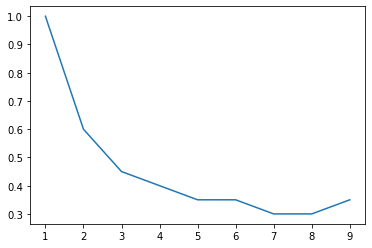

In [928]:
plt.plot(range(1,10),acc)

# 87) location_Uttarahalli

In [929]:
df87 = df[df['location_Uttarahalli']==1]

In [930]:
df87 = df87[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [931]:
df87

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
6377     2      3.0   6200          1440.0    3     4305.555556   
6378     2      2.0   4500          1143.0    2     3937.007874   
6379     2      2.0   4500          1020.0    2     4411.764706   
6380     2      2.0   6300          1286.0    2     4898.911353   
6381     2      0.0   4500          1101.0    2     4087.193460   
...    ...      ...    ...             ...  ...             ...   
6478     2      1.0   5600          1328.0    3     4216.867470   
6479     2      2.0   3640          1040.0    2     3500.000000   
6480     2      2.0   5612          1290.0    3     4350.387597   
6481     2      1.0   4676          1075.0    2     4349.767442   
6482     2      1.0   5700          1345.0    3     4237.918216   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
6377                              0                        1   
6378                              0                        1   
6379                              0                        1   
6380                              1                        0   
6381                              1                        0   
...                             ...                      ...   
6478                              1                        0   
6479                              1                        0   
6480                              1                        0   
6481                              1                        0   
6482                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
6377                    0                           1  
6378                    0                           1  
6379                    0                           1  
6380                    0                           1  
6381                    0                           1  
...                   ...                         ...  
6478                    0                           1  
6479                    0                           1  
6480                    0                           1  
6481                    0                           1  
6482                    0                           1  

[106 rows x 10 columns]

In [932]:
df87.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.133572  0.332489        0.319061   
balcony                        0.133572  1.000000  0.354681        0.348731   
price                          0.332489  0.354681  1.000000        0.919105   
total_sqft_int                 0.319061  0.348731  0.919105        1.000000   
bhk                            0.283937  0.298437  0.781567        0.766689   
price_per_sqft                 0.199633  0.223327  0.743288        0.423813   
area_typeSuper built-up  Area  0.112944  0.011431  0.223177        0.303503   
area_typeBuilt-up  Area       -0.112944 -0.011431 -0.223177       -0.303503   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move     0.011190 -0.126761 -0.067078       -0.112262   

                                    bhk  price_per_sqft  \
bath                           0.283937        0.199633   
balcony                        0.298437        0.223327   
price                          0.781567        0.743288   
total_sqft_int                 0.766689        0.423813   
bhk                            1.000000        0.486708   
price_per_sqft                 0.486708        1.000000   
area_typeSuper built-up  Area  0.179326       -0.002185   
area_typeBuilt-up  Area       -0.179326        0.002185   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move    -0.138886        0.030664   

                               area_typeSuper built-up  Area  \
bath                                                0.112944   
balcony                                             0.011431   
price                                               0.223177   
total_sqft_int                                      0.303503   
bhk                                                 0.179326   
price_per_sqft                                     -0.002185   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.142348   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.112944                  NaN   
balcony                                      -0.011431                  NaN   
price                                        -0.223177                  NaN   
total_sqft_int                               -0.303503                  NaN   
bhk                                          -0.179326                  NaN   
price_per_sqft                                0.002185                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.142348                  NaN   

                               availability_Ready To Move  
bath                                             0.011190  
balcony                                         -0.126761  
price                                           -0.067078  
total_sqft_int                                  -0.112262  
bhk                                             -0.138886  
price_per_sqft                                   0.030664  
area_typeSuper built-up  Area                   -0.142348  
area_typeBuilt-up  Area                          0.142348  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [933]:
x = df87[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df87[['price']]

In [934]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.7830188679245284]
k= 3 [1.0, 0.7830188679245284, 0.6132075471698113]
k= 4 [1.0, 0.7830188679245284, 0.6132075471698113, 0.5660377358490566]
k= 5 [1.0, 0.7830188679245284, 0.6132075471698113, 0.5660377358490566, 0.49056603773584906]
k= 6 [1.0, 0.7830188679245284, 0.6132075471698113, 0.5660377358490566, 0.49056603773584906, 0.46226415094339623]
k= 7 [1.0, 0.7830188679245284, 0.6132075471698113, 0.5660377358490566, 0.49056603773584906, 0.46226415094339623, 0.4339622641509434]
k= 8 [1.0, 0.7830188679245284, 0.6132075471698113, 0.5660377358490566, 0.49056603773584906, 0.46226415094339623, 0.4339622641509434, 0.37735849056603776]
k= 9 [1.0, 0.7830188679245284, 0.6132075471698113, 0.5660377358490566, 0.49056603773584906, 0.46226415094339623, 0.4339622641509434, 0.37735849056603776, 0.3584905660377358]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [935]:
max(acc)

1.0

In [936]:
k = acc.index(max(acc))+1
k

1

In [937]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


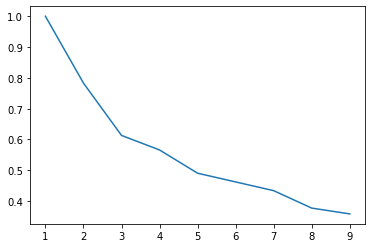

In [938]:
plt.plot(range(1,10),acc)

# 88) location_Varthur

In [939]:
df88 = df[df['location_Varthur']==1]

In [940]:
df88 = df88[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [941]:
df88

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
6500     2  2.000000   4400          1160.0    2     3793.103448   
6501     2  3.000000   8000          1385.0    2     5776.173285   
6502     3  2.000000   6598          1535.0    3     4299.022801   
6503     2  2.000000   4200          1024.0    2     4101.562500   
6504     2  2.000000   4000          1125.0    2     3555.555556   
6505     2  2.000000   4000          1112.0    2     3597.122302   
6506     2  2.000000   4535          1055.0    2     4298.578199   
6507     2  1.584376   6500          1280.0    2     5078.125000   
6508     2  2.000000   3600           977.0    2     3684.749232   
6509     3  1.584376   7100          1250.0    3     5680.000000   
6510     3  1.000000   6775          1200.0    3     5645.833333   
6511     2  2.000000   4188          1111.0    2     3769.576958   
6512     2  3.000000   5550          1140.0    2     4868.421053   
6513     2  1.000000   5900          1012.0    2     5830.039526   
6514     2  2.000000   3990          1140.0    2     3500.000000   
6515     2  2.000000   4800          1090.0    2     4403.669725   
6516     3  2.000000   7100          1450.0    3     4896.551724   
6517     2  1.000000   6000          1210.0    2     4958.677686   
6518     2  2.000000   4600          1070.0    2     4299.065421   
6519     2  3.000000   8500          1360.0    3     6250.000000   
6520     2  1.000000   3400           965.0    2     3523.316062   
6521     2  2.000000   4424          1120.0    2     3950.000000   
6522     2  3.000000   7900          1395.0    3     5663.082437   
6523     2  1.000000   4500          1085.0    2     4147.465438   
6524     2  2.000000   4700          1250.0    2     3760.000000   
6525     3  1.000000   6838          1200.0    3     5698.333333   
6526     2  1.000000   6000          1155.0    2     5194.805195   
6527     2  1.000000   6000          1035.0    2     5797.101449   
6528     2  2.000000   3900          1155.0    2     3376.623377   
6529     2  2.000000   5500          1180.0    2     4661.016949   
6530     2  1.000000   5735          1738.0    2     3299.769850   
6531     2  1.000000   4065          1045.0    2     3889.952153   
6532     2  2.000000   3900          1155.0    2     3376.623377   
6533     3  2.000000   6943          1615.0    3     4299.071207   
6534     2  1.000000   6415          1210.0    2     5301.652893   
6535     2  3.000000   3800          1105.0    2     3438.914027   
6536     3  2.000000   9000          1560.0    3     5769.230769   
6537     2  1.000000   8500          1760.0    2     4829.545455   
6538     2  2.000000   5400          1210.0    2     4462.809917   
6539     2  2.000000   4000          1112.0    2     3597.122302   
6540     3  2.000000   7158          1665.0    3     4299.099099   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
6500                              0                        1   
6501                              1                        0   
6502                              1                        0   
6503                              0                        1   
6504                              1                        0   
6505                              1                        0   
6506                              1                        0   
6507                              1                        0   
6508                              1                        0   
6509                              1                        0   
6510                              0                        0   
6511                              1                        0   
6512                              1                        0   
6513                              1                        0   
6514                              1                        0   
6515                              1                        0   
6516                              1                        0 

In [942]:
df88.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000 -0.087859  0.520030        0.493615   
balcony                       -0.087859  1.000000  0.040921        0.066229   
price                          0.520030  0.040921  1.000000        0.725099   
total_sqft_int                 0.493615  0.066229  0.725099        1.000000   
bhk                            0.866900  0.136514  0.674842        0.537820   
price_per_sqft                 0.326563 -0.060546  0.813610        0.202584   
area_typeSuper built-up  Area -0.144400  0.316753 -0.035433        0.143960   
area_typeBuilt-up  Area       -0.161889 -0.163403 -0.090379       -0.147942   
area_typePlot  Area            0.459933 -0.294652  0.182634       -0.032428   
availability_Ready To Move    -0.236951  0.317160 -0.248516       -0.152353   

                                    bhk  price_per_sqft  \
bath                           0.866900        0.326563   
balcony                        0.136514       -0.060546   
price                          0.674842        0.813610   
total_sqft_int                 0.537820        0.202584   
bhk                            1.000000        0.493345   
price_per_sqft                 0.493345        1.000000   
area_typeSuper built-up  Area -0.086225       -0.190523   
area_typeBuilt-up  Area       -0.186745        0.003470   
area_typePlot  Area            0.398716        0.307835   
availability_Ready To Move    -0.127791       -0.254187   

                               area_typeSuper built-up  Area  \
bath                                               -0.144400   
balcony                                             0.316753   
price                                              -0.035433   
total_sqft_int                                      0.143960   
bhk                                                -0.086225   
price_per_sqft                                     -0.190523   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.794123   
area_typePlot  Area                                -0.546942   
availability_Ready To Move                          0.093159   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.161889             0.459933   
balcony                                      -0.163403            -0.294652   
price                                        -0.090379             0.182634   
total_sqft_int                               -0.147942            -0.032428   
bhk                                          -0.186745             0.398716   
price_per_sqft                                0.003470             0.307835   
area_typeSuper built-up  Area                -0.794123            -0.546942   
area_typeBuilt-up  Area                       1.000000            -0.074458   
area_typePlot  Area                          -0.074458             1.000000   
availability_Ready To Move                    0.094529            -0.283069   

                               availability_Ready To Move  
bath                                            -0.236951  
balcony                                          0.317160  
price                                           -0.248516  
total_sqft_int                                  -0.152353  
bhk                                             -0.127791  
price_per_sqft                                  -0.254187  
area_typeSuper built-up  Area                    0.093159  
area_typeBuilt-up  Area                          0.094529  
area_typePlot  Area                             -0.283069  
availability_Ready To Move                       1.000000

In [943]:
x = df88[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df88[['price']]

In [944]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.4878048780487805]
k= 3 [1.0, 0.4878048780487805, 0.36585365853658536]
k= 4 [1.0, 0.4878048780487805, 0.36585365853658536, 0.2926829268292683]
k= 5 [1.0, 0.4878048780487805, 0.36585365853658536, 0.2926829268292683, 0.24390243902439024]
k= 6 [1.0, 0.4878048780487805, 0.36585365853658536, 0.2926829268292683, 0.24390243902439024, 0.1951219512195122]
k= 7 [1.0, 0.4878048780487805, 0.36585365853658536, 0.2926829268292683, 0.24390243902439024, 0.1951219512195122, 0.14634146341463414]
k= 8 [1.0, 0.4878048780487805, 0.36585365853658536, 0.2926829268292683, 0.24390243902439024, 0.1951219512195122, 0.14634146341463414, 0.14634146341463414]
k= 9 [1.0, 0.4878048780487805, 0.36585365853658536, 0.2926829268292683, 0.24390243902439024, 0.1951219512195122, 0.14634146341463414, 0.14634146341463414, 0.14634146341463414]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [945]:
max(acc)

1.0

In [946]:
k = acc.index(max(acc))+1
k

1

In [947]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


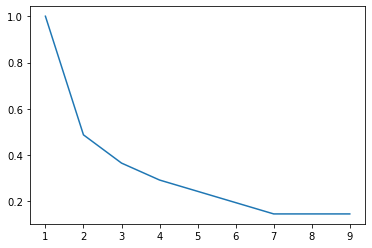

In [948]:
plt.plot(range(1,10),acc)

# 89) location_Vidyaranyapura

In [949]:
df89 = df[df['location_Vidyaranyapura']==1]

In [950]:
df89 = df89[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [951]:
df89

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
6579     2  0.000000   9500          1440.0    2     6597.222222   
6580     2  3.000000   3800          1062.0    2     3578.154426   
6581     2  2.000000   5500          1200.0    2     4583.333333   
6582     2  2.000000   5500          1060.0    2     5188.679245   
6583     2  1.000000   5400          1100.0    2     4909.090909   
6584     2  0.000000   7000          1440.0    3     4861.111111   
6585     2  1.000000   5400          1100.0    2     4909.090909   
6586     2  1.000000   3500          1000.0    2     3500.000000   
6587     2  1.000000   7000          1120.0    2     6250.000000   
6588     2  1.584376   4000           945.0    2     4232.804233   
6589     2  1.000000   5400          1100.0    2     4909.090909   
6590     2  2.000000   6500          1200.0    3     5416.666667   
6591     2  2.000000   5200          1200.0    2     4333.333333   
6592     2  1.000000   5000          1050.0    2     4761.904762   
6593     2  1.000000   5000          1188.0    2     4208.754209   
6594     2  1.000000   7500          1100.0    3     6818.181818   
6595     2  2.000000   7200          1100.0    3     6545.454545   
6596     5  1.000000  13500          2400.0    4     5625.000000   
6597     2  1.000000   4100          1100.0    2     3727.272727   
6598     2  2.000000   6050          1200.0    2     5041.666667   
6599     2  1.000000   4200          1200.0    2     3500.000000   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
6579                              0                        0   
6580                              1                        0   
6581                              0                        1   
6582                              0                        1   
6583                              1                        0   
6584                              0                        1   
6585                              1                        0   
6586                              1                        0   
6587                              0                        1   
6588                              0                        1   
6589                              1                        0   
6590                              1                        0   
6591                              0                        1   
6592                              0                        1   
6593                              1                        0   
6594                              1                        0   
6595                              1                        0   
6596                              0                        1   
6597                              1                        0   
6598                              1                        0   
6599                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
6579                    1                           1  
6580                    0                           1  
6581                    0                           1  
6582                    0                           1  
6583                    0                           1  
6584                    0                           1  
6585                    0                           1  
6586                    0                           1  
6587                    0                           1  
6588                    0                           1  
6589                    0                           1  
6590                    0                           1  
6591                    0                           1  
6592                    0                           1  
6593                    0                           0  
6594                    0                           1  
6595                    0                           1  
6596                    0                           1  
6597                    0           

In [952]:
df89.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000 -0.100220  0.765012        0.915911   
balcony                       -0.100220  1.000000 -0.317137       -0.274840   
price                          0.765012 -0.317137  1.000000        0.868376   
total_sqft_int                 0.915911 -0.274840  0.868376        1.000000   
bhk                            0.700649 -0.109645  0.760689        0.719002   
price_per_sqft                 0.158124 -0.219051  0.697282        0.254572   
area_typeSuper built-up  Area -0.258199  0.170219 -0.355797       -0.333127   
area_typeBuilt-up  Area        0.285044  0.010659  0.206301        0.260487   
area_typePlot  Area           -0.050000 -0.419860  0.356357        0.180116   
availability_Ready To Move     0.050000  0.100220  0.103380        0.013030   

                                    bhk  price_per_sqft  \
bath                           0.700649        0.158124   
balcony                       -0.109645       -0.219051   
price                          0.760689        0.697282   
total_sqft_int                 0.719002        0.254572   
bhk                            1.000000        0.470154   
price_per_sqft                 0.470154        1.000000   
area_typeSuper built-up  Area -0.075378       -0.202953   
area_typeBuilt-up  Area        0.128023        0.040695   
area_typePlot  Area           -0.116775        0.378819   
availability_Ready To Move     0.116775        0.163364   

                               area_typeSuper built-up  Area  \
bath                                               -0.258199   
balcony                                             0.170219   
price                                              -0.355797   
total_sqft_int                                     -0.333127   
bhk                                                -0.075378   
price_per_sqft                                     -0.202953   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.905822   
area_typePlot  Area                                -0.258199   
availability_Ready To Move                         -0.193649   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.285044            -0.050000   
balcony                                       0.010659            -0.419860   
price                                         0.206301             0.356357   
total_sqft_int                                0.260487             0.180116   
bhk                                           0.128023            -0.116775   
price_per_sqft                                0.040695             0.378819   
area_typeSuper built-up  Area                -0.905822            -0.258199   
area_typeBuilt-up  Area                       1.000000            -0.175412   
area_typePlot  Area                          -0.175412             1.000000   
availability_Ready To Move                    0.175412             0.050000   

                               availability_Ready To Move  
bath                                             0.050000  
balcony                                          0.100220  
price                                            0.103380  
total_sqft_int                                   0.013030  
bhk                                              0.116775  
price_per_sqft                                   0.163364  
area_typeSuper built-up  Area                   -0.193649  
area_typeBuilt-up  Area                          0.175412  
area_typePlot  Area                              0.050000  
availability_Ready To Move                       1.000000

In [953]:
x = df89[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df89[['price']]

In [954]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.47619047619047616]
k= 3 [1.0, 0.47619047619047616, 0.3333333333333333]
k= 4 [1.0, 0.47619047619047616, 0.3333333333333333, 0.2857142857142857]
k= 5 [1.0, 0.47619047619047616, 0.3333333333333333, 0.2857142857142857, 0.23809523809523808]
k= 6 [1.0, 0.47619047619047616, 0.3333333333333333, 0.2857142857142857, 0.23809523809523808, 0.23809523809523808]
k= 7 [1.0, 0.47619047619047616, 0.3333333333333333, 0.2857142857142857, 0.23809523809523808, 0.23809523809523808, 0.23809523809523808]
k= 8 [1.0, 0.47619047619047616, 0.3333333333333333, 0.2857142857142857, 0.23809523809523808, 0.23809523809523808, 0.23809523809523808, 0.23809523809523808]
k= 9 [1.0, 0.47619047619047616, 0.3333333333333333, 0.2857142857142857, 0.23809523809523808, 0.23809523809523808, 0.23809523809523808, 0.23809523809523808, 0.19047619047619047]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [955]:
max(acc)

1.0

In [956]:
k = acc.index(max(acc))+1
k

1

In [957]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


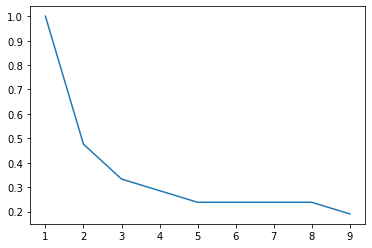

In [958]:
plt.plot(range(1,10),acc)

# 90) location_Vijayanagar

In [959]:
df90 = df[df['location_Vijayanagar']==1]

In [960]:
df90 = df90[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [961]:
df90

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
6610     3  2.000000  11000          1704.0    3     6455.399061   
6611     3  1.000000  12900          1933.0    3     6673.564408   
6612     3  0.000000  10000          1450.0    3     6896.551724   
6613     2  0.000000  13400          1580.0    3     8481.012658   
6614     3  2.000000  12100          1826.0    3     6626.506024   
6615     3  1.000000  11600          1739.0    3     6670.500288   
6616     3  2.000000  10000          1490.0    3     6711.409396   
6617     2  2.000000   6500          1180.0    2     5508.474576   
6618     1  0.000000   3478           606.0    1     5739.273927   
6619     2  2.000000   6800          1352.0    2     5029.585799   
6620     3  2.000000  11500          1527.0    3     7531.106745   
6621     2  0.000000   6000           989.0    2     6066.734075   
6622     2  1.000000  10300          1520.0    3     6776.315789   
6623     3  1.000000  11700          1749.0    3     6689.536878   
6624     2  1.000000   7500          1046.0    2     7170.172084   
6625     1  1.000000   4000           606.0    1     6600.660066   
6626     2  2.000000   6200          1200.0    2     5166.666667   
6627     3  1.584376  14000          1760.0    3     7954.545455   
6628     3  2.000000  13600          2047.0    3     6643.869077   
6629     2  1.000000   7500          1200.0    3     6250.000000   
6630     2  3.000000   8200          1178.0    2     6960.950764   
6631     2  0.000000   4500           864.0    2     5208.333333   
6632     2  2.000000   6000           920.0    2     6521.739130   
6633     2  1.000000   5800          1019.0    2     5691.854760   
6634     6  3.000000  12500          2400.0    5     5208.333333   
6635     2  1.000000   8600          1180.0    2     7288.135593   
6636     2  0.000000   4906          1046.0    2     4690.248566   
6637     2  0.000000  23000          2400.0    1     9583.333333   
6638     1  1.000000   4000           492.0    1     8130.081301   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
6610                              1                        0   
6611                              1                        0   
6612                              1                        0   
6613                              0                        1   
6614                              1                        0   
6615                              1                        0   
6616                              1                        0   
6617                              1                        0   
6618                              1                        0   
6619                              1                        0   
6620                              1                        0   
6621                              0                        1   
6622                              1                        0   
6623                              1                        0   
6624                              1                        0   
6625                              1                        0   
6626                              1                        0   
6627                              1                        0   
6628                              1                        0   
6629                              1                        0   
6630                              1                        0   
6631                              0                        1   
6632                              1                        0   
6633                              1                        0   
6634                              0                        0   
6635                              1                        0   
6636                              1                        0   
6637                              0                        1   
6638                              1                        0   

      area_typePlot  Area  availability_Read

In [962]:
df90.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.465512  0.499928        0.765563   
balcony                        0.465512  1.000000  0.068105        0.273812   
price                          0.499928  0.068105  1.000000        0.906699   
total_sqft_int                 0.765563  0.273812  0.906699        1.000000   
bhk                            0.894795  0.404155  0.410577        0.674587   
price_per_sqft                -0.110606 -0.173943  0.625897        0.278374   
area_typeSuper built-up  Area -0.207526  0.322455 -0.293077       -0.251842   
area_typeBuilt-up  Area       -0.163978 -0.552981  0.241834        0.065121   
area_typePlot  Area            0.739510  0.377491  0.149704        0.398296   
availability_Ready To Move     0.126014  0.031543  0.103910        0.075129   

                                    bhk  price_per_sqft  \
bath                           0.894795       -0.110606   
balcony                        0.404155       -0.173943   
price                          0.410577        0.625897   
total_sqft_int                 0.674587        0.278374   
bhk                            1.000000       -0.115213   
price_per_sqft                -0.115213        1.000000   
area_typeSuper built-up  Area -0.099795       -0.137826   
area_typeBuilt-up  Area       -0.194346        0.278394   
area_typePlot  Area            0.573875       -0.240789   
availability_Ready To Move     0.097790        0.024301   

                               area_typeSuper built-up  Area  \
bath                                               -0.207526   
balcony                                             0.322455   
price                                              -0.293077   
total_sqft_int                                     -0.251842   
bhk                                                -0.099795   
price_per_sqft                                     -0.137826   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.876356   
area_typePlot  Area                                -0.414039   
availability_Ready To Move                         -0.472456   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.163978             0.739510   
balcony                                      -0.552981             0.377491   
price                                         0.241834             0.149704   
total_sqft_int                                0.065121             0.398296   
bhk                                          -0.194346             0.573875   
price_per_sqft                                0.278394            -0.240789   
area_typeSuper built-up  Area                -0.876356            -0.414039   
area_typeBuilt-up  Area                       1.000000            -0.075593   
area_typePlot  Area                          -0.075593             1.000000   
availability_Ready To Move                    0.414039             0.195615   

                               availability_Ready To Move  
bath                                             0.126014  
balcony                                          0.031543  
price                                            0.103910  
total_sqft_int                                   0.075129  
bhk                                              0.097790  
price_per_sqft                                   0.024301  
area_typeSuper built-up  Area                   -0.472456  
area_typeBuilt-up  Area                          0.414039  
area_typePlot  Area                              0.195615  
availability_Ready To Move                       1.000000

In [963]:
x = df90[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df90[['price']]

In [964]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.4827586206896552]
k= 3 [1.0, 0.4827586206896552, 0.3448275862068966]
k= 4 [1.0, 0.4827586206896552, 0.3448275862068966, 0.3448275862068966]
k= 5 [1.0, 0.4827586206896552, 0.3448275862068966, 0.3448275862068966, 0.3103448275862069]
k= 6 [1.0, 0.4827586206896552, 0.3448275862068966, 0.3448275862068966, 0.3103448275862069, 0.27586206896551724]
k= 7 [1.0, 0.4827586206896552, 0.3448275862068966, 0.3448275862068966, 0.3103448275862069, 0.27586206896551724, 0.20689655172413793]
k= 8 [1.0, 0.4827586206896552, 0.3448275862068966, 0.3448275862068966, 0.3103448275862069, 0.27586206896551724, 0.20689655172413793, 0.1724137931034483]
k= 9 [1.0, 0.4827586206896552, 0.3448275862068966, 0.3448275862068966, 0.3103448275862069, 0.27586206896551724, 0.20689655172413793, 0.1724137931034483, 0.1724137931034483]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [965]:
max(acc)

1.0

In [966]:
k = acc.index(max(acc))+1
k

1

In [967]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


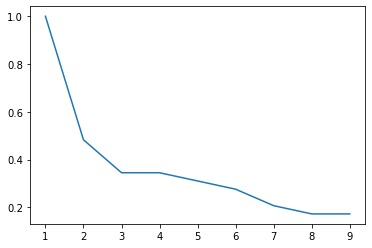

In [968]:
plt.plot(range(1,10),acc)

# 91) location_Vittasandra

In [969]:
df91 = df[df['location_Vittasandra']==1]

In [970]:
df91 = df91[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [971]:
df91

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
6666     2      1.0   7100          1404.0    2     5056.980057   
6667     2      1.0   6700          1246.0    2     5377.207063   
6668     2      1.0   6930          1404.0    2     4935.897436   
6669     2      1.0   6730          1246.0    2     5401.284109   
6670     2      1.0   6450          1246.0    2     5176.565008   
6671     2      1.0   6450          1246.0    2     5176.565008   
6672     2      1.0   6800          1246.0    2     5457.463884   
6673     2      1.0   6700          1238.0    2     5411.954766   
6674     2      1.0   7500          1404.0    2     5341.880342   
6675     2      1.0   6500          1246.0    2     5216.693419   
6676     2      1.0   6700          1238.0    2     5411.954766   
6677     2      1.0   6740          1246.0    2     5409.309791   
6678     2      1.0   6740          1259.0    2     5353.455123   
6679     2      1.0   6880          1404.0    2     4900.284900   
6680     2      1.0   6230          1246.0    2     5000.000000   
6681     2      1.0   6300          1246.0    2     5056.179775   
6682     2      1.0   6740          1246.0    2     5409.309791   
6683     2      1.0   6540          1246.0    2     5248.796148   
6684     2      1.0   6731          1238.0    2     5437.802908   
6685     2      1.0   6740          1246.0    2     5409.309791   
6686     2      1.0   6730          1246.0    2     5401.284109   
6687     2      2.0   7000          1404.0    2     4985.754986   
6688     2      1.0   6748          1259.0    2     5359.809373   
6689     2      1.0   7500          1404.0    2     5341.880342   
6690     2      1.0   6700          1246.0    2     5377.207063   
6691     2      1.0   7200          1404.0    2     5128.205128   
6692     2      1.0   6750          1246.0    2     5417.335474   
6693     2      1.0   6750          1246.0    2     5417.335474   
6694     2      1.0   7000          1404.0    2     4985.754986   
6695     2      1.0   6500          1246.0    2     5216.693419   
6696     2      1.0   6740          1246.0    2     5409.309791   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
6666                              1                        0   
6667                              1                        0   
6668                              1                        0   
6669                              1                        0   
6670                              1                        0   
6671                              1                        0   
6672                              1                        0   
6673                              1                        0   
6674                              1                        0   
6675                              1                        0   
6676                              1                        0   
6677                              1                        0   
6678                              1                        0   
6679                              1                        0   
6680                              1                        0   
6681                              1                        0   
6682                              1                        0   
6683                              1                        0   
6684                              1                        0   
6685                              1                        0   
6686                              1                        0   
6687                              1                        0   
6688                              1                        0   
6689                              1                        0   
6690                              1                        0   
6691                              1                        0   
6692                              1                        0   
6693                              1                        0   
6694 

In [972]:
df91.corr()

bath   balcony     price  total_sqft_int  bhk  \
bath                            NaN       NaN       NaN             NaN  NaN   
balcony                         NaN  1.000000  0.150438        0.309017  NaN   
price                           NaN  0.150438  1.000000        0.777337  NaN   
total_sqft_int                  NaN  0.309017  0.777337        1.000000  NaN   
bhk                             NaN       NaN       NaN             NaN  NaN   
price_per_sqft                  NaN -0.295729  0.009920       -0.620663  NaN   
area_typeSuper built-up  Area   NaN       NaN       NaN             NaN  NaN   
area_typeBuilt-up  Area         NaN       NaN       NaN             NaN  NaN   
area_typePlot  Area             NaN       NaN       NaN             NaN  NaN   
availability_Ready To Move      NaN       NaN       NaN             NaN  NaN   

                               price_per_sqft  area_typeSuper built-up  Area  \
bath                                      NaN                            NaN   
balcony                             -0.295729                            NaN   
price                                0.009920                            NaN   
total_sqft_int                      -0.620663                            NaN   
bhk                                       NaN                            NaN   
price_per_sqft                       1.000000                            NaN   
area_typeSuper built-up  Area             NaN                            NaN   
area_typeBuilt-up  Area                   NaN                            NaN   
area_typePlot  Area                       NaN                            NaN   
availability_Ready To Move                NaN                            NaN   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                               NaN                  NaN   
balcony                                            NaN                  NaN   
price                                              NaN                  NaN   
total_sqft_int                                     NaN                  NaN   
bhk                                                NaN                  NaN   
price_per_sqft                                     NaN                  NaN   
area_typeSuper built-up  Area                      NaN                  NaN   
area_typeBuilt-up  Area                            NaN                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                         NaN                  NaN   

                               availability_Ready To Move  
bath                                                  NaN  
balcony                                               NaN  
price                                                 NaN  
total_sqft_int                                        NaN  
bhk                                                   NaN  
price_per_sqft                                        NaN  
area_typeSuper built-up  Area                         NaN  
area_typeBuilt-up  Area                               NaN  
area_typePlot  Area                                   NaN  
availability_Ready To Move                            NaN

In [973]:
x = df91[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df91[['price']]

In [974]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.8064516129032258]
k= 3 [1.0, 0.8064516129032258, 0.7419354838709677]
k= 4 [1.0, 0.8064516129032258, 0.7419354838709677, 0.5806451612903226]
k= 5 [1.0, 0.8064516129032258, 0.7419354838709677, 0.5806451612903226, 0.3870967741935484]
k= 6 [1.0, 0.8064516129032258, 0.7419354838709677, 0.5806451612903226, 0.3870967741935484, 0.3225806451612903]
k= 7 [1.0, 0.8064516129032258, 0.7419354838709677, 0.5806451612903226, 0.3870967741935484, 0.3225806451612903, 0.3225806451612903]
k= 8 [1.0, 0.8064516129032258, 0.7419354838709677, 0.5806451612903226, 0.3870967741935484, 0.3225806451612903, 0.3225806451612903, 0.2903225806451613]
k= 9 [1.0, 0.8064516129032258, 0.7419354838709677, 0.5806451612903226, 0.3870967741935484, 0.3225806451612903, 0.3225806451612903, 0.2903225806451613, 0.2903225806451613]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [975]:
max(acc)

1.0

In [976]:
k = acc.index(max(acc))+1
k

1

In [977]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


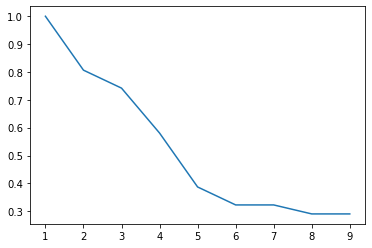

In [978]:
plt.plot(range(1,10),acc)

# 92) location_Whitefield

In [979]:
df92 = df[df['location_Whitefield']==1]

In [980]:
df92 = df92[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [981]:
df92

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
6705     3      2.0   8100          1610.0    3     5031.055901   
6706     2      1.0   9482          1459.0    2     6498.971899   
6707     2      2.0   7500          1280.0    2     5859.375000   
6708     3      2.0  16100          1910.0    3     8429.319372   
6709     4      1.0  23000          3252.0    4     7072.570726   
...    ...      ...    ...             ...  ...             ...   
6934     3      2.0  10700          1639.0    3     6528.370958   
6935     3      2.0  13900          1760.0    3     7897.727273   
6936     1      1.0   4800           613.0    1     7830.342577   
6937     3      2.0  12500          1730.0    3     7225.433526   
6938     1      1.0   5900           877.0    1     6727.480046   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
6705                              0                        1   
6706                              1                        0   
6707                              1                        0   
6708                              1                        0   
6709                              1                        0   
...                             ...                      ...   
6934                              1                        0   
6935                              1                        0   
6936                              1                        0   
6937                              1                        0   
6938                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
6705                    0                           0  
6706                    0                           0  
6707                    0                           1  
6708                    0                           1  
6709                    0                           1  
...                   ...                         ...  
6934                    0                           0  
6935                    0                           1  
6936                    0                           0  
6937                    0                           1  
6938                    0                           0  

[234 rows x 10 columns]

In [982]:
df92.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.438621  0.711830        0.705032   
balcony                        0.438621  1.000000  0.353937        0.383140   
price                          0.711830  0.353937  1.000000        0.964913   
total_sqft_int                 0.705032  0.383140  0.964913        1.000000   
bhk                            0.916884  0.454874  0.715721        0.713590   
price_per_sqft                 0.334438  0.072702  0.537934        0.340700   
area_typeSuper built-up  Area -0.353068 -0.115872 -0.419345       -0.411828   
area_typeBuilt-up  Area        0.151155  0.005092  0.177179        0.173560   
area_typePlot  Area            0.332602  0.163710  0.397918        0.391329   
availability_Ready To Move     0.150429  0.287419  0.215702        0.202063   

                                    bhk  price_per_sqft  \
bath                           0.916884        0.334438   
balcony                        0.454874        0.072702   
price                          0.715721        0.537934   
total_sqft_int                 0.713590        0.340700   
bhk                            1.000000        0.329700   
price_per_sqft                 0.329700        1.000000   
area_typeSuper built-up  Area -0.391480       -0.135995   
area_typeBuilt-up  Area        0.195866        0.046579   
area_typePlot  Area            0.334146        0.142381   
availability_Ready To Move     0.236739        0.135915   

                               area_typeSuper built-up  Area  \
bath                                               -0.353068   
balcony                                            -0.115872   
price                                              -0.419345   
total_sqft_int                                     -0.411828   
bhk                                                -0.391480   
price_per_sqft                                     -0.135995   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.738018   
area_typePlot  Area                                -0.562240   
availability_Ready To Move                          0.010039   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.151155             0.332602   
balcony                                       0.005092             0.163710   
price                                         0.177179             0.397918   
total_sqft_int                                0.173560             0.391329   
bhk                                           0.195866             0.334146   
price_per_sqft                                0.046579             0.142381   
area_typeSuper built-up  Area                -0.738018            -0.562240   
area_typeBuilt-up  Area                       1.000000            -0.143084   
area_typePlot  Area                          -0.143084             1.000000   
availability_Ready To Move                   -0.089412             0.094853   

                               availability_Ready To Move  
bath                                             0.150429  
balcony                                          0.287419  
price                                            0.215702  
total_sqft_int                                   0.202063  
bhk                                              0.236739  
price_per_sqft                                   0.135915  
area_typeSuper built-up  Area                    0.010039  
area_typeBuilt-up  Area                         -0.089412  
area_typePlot  Area                              0.094853  
availability_Ready To Move                       1.000000

In [983]:
x = df92[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df92[['price']]

In [984]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6111111111111112]
k= 3 [1.0, 0.6111111111111112, 0.4230769230769231]
k= 4 [1.0, 0.6111111111111112, 0.4230769230769231, 0.31196581196581197]
k= 5 [1.0, 0.6111111111111112, 0.4230769230769231, 0.31196581196581197, 0.2948717948717949]
k= 6 [1.0, 0.6111111111111112, 0.4230769230769231, 0.31196581196581197, 0.2948717948717949, 0.2777777777777778]
k= 7 [1.0, 0.6111111111111112, 0.4230769230769231, 0.31196581196581197, 0.2948717948717949, 0.2777777777777778, 0.25213675213675213]
k= 8 [1.0, 0.6111111111111112, 0.4230769230769231, 0.31196581196581197, 0.2948717948717949, 0.2777777777777778, 0.25213675213675213, 0.25213675213675213]
k= 9 [1.0, 0.6111111111111112, 0.4230769230769231, 0.31196581196581197, 0.2948717948717949, 0.2777777777777778, 0.25213675213675213, 0.25213675213675213, 0.21367521367521367]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [985]:
max(acc)

1.0

In [986]:
k = acc.index(max(acc))+1
k

1

In [987]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


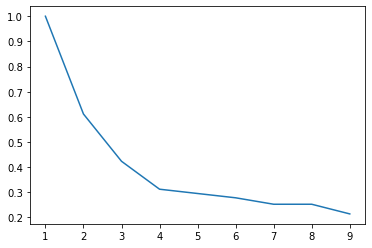

In [988]:
plt.plot(range(1,10),acc)

# 93) location_Yelahanka

In [989]:
df93 = df[df['location_Yelahanka']==1]

In [990]:
df93 = df93[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [991]:
df93

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
6956     2      2.0   7800          1326.0    2     5882.352941   
6957     3      2.0   9500          1705.0    3     5571.847507   
6958     2      2.0   8000          1234.0    2     6482.982172   
6959     2      2.0   8500          1315.0    2     6463.878327   
6960     2      1.0   6250          1170.0    2     5341.880342   
...    ...      ...    ...             ...  ...             ...   
7037     1      1.0   2500           567.0    1     4409.171076   
7038     2      1.0   3000           602.0    1     4983.388704   
7039     2      2.0   8000          1234.0    2     6482.982172   
7040     3      1.0   7800          1267.0    2     6156.274665   
7041     2      1.0   7819          1360.0    2     5749.264706   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
6956                              1                        0   
6957                              1                        0   
6958                              1                        0   
6959                              1                        0   
6960                              1                        0   
...                             ...                      ...   
7037                              0                        1   
7038                              1                        0   
7039                              1                        0   
7040                              1                        0   
7041                              1                        0   

      area_typePlot  Area  availability_Ready To Move  
6956                    0                           0  
6957                    0                           1  
6958                    0                           1  
6959                    0                           1  
6960                    0                           1  
...                   ...                         ...  
7037                    0                           1  
7038                    0                           0  
7039                    0                           1  
7040                    0                           1  
7041                    0                           0  

[86 rows x 10 columns]

In [992]:
df93.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.319626  0.848299        0.890733   
balcony                        0.319626  1.000000  0.317553        0.303195   
price                          0.848299  0.317553  1.000000        0.981482   
total_sqft_int                 0.890733  0.303195  0.981482        1.000000   
bhk                            0.928859  0.397469  0.872719        0.907321   
price_per_sqft                 0.151841  0.248144  0.387990        0.232584   
area_typeSuper built-up  Area -0.319722 -0.096966 -0.344461       -0.364109   
area_typeBuilt-up  Area        0.300399  0.115595  0.328977        0.337441   
area_typePlot  Area            0.087369 -0.036734  0.080358        0.111537   
availability_Ready To Move     0.162962  0.214461  0.156198        0.131638   

                                    bhk  price_per_sqft  \
bath                           0.928859        0.151841   
balcony                        0.397469        0.248144   
price                          0.872719        0.387990   
total_sqft_int                 0.907321        0.232584   
bhk                            1.000000        0.207384   
price_per_sqft                 0.207384        1.000000   
area_typeSuper built-up  Area -0.365312       -0.001977   
area_typeBuilt-up  Area        0.346388        0.020009   
area_typePlot  Area            0.091682       -0.046324   
availability_Ready To Move     0.171006        0.161521   

                               area_typeSuper built-up  Area  \
bath                                               -0.319722   
balcony                                            -0.096966   
price                                              -0.344461   
total_sqft_int                                     -0.364109   
bhk                                                -0.365312   
price_per_sqft                                     -0.001977   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.929243   
area_typePlot  Area                                -0.299912   
availability_Ready To Move                         -0.192655   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.300399             0.087369   
balcony                                       0.115595            -0.036734   
price                                         0.328977             0.080358   
total_sqft_int                                0.337441             0.111537   
bhk                                           0.346388             0.091682   
price_per_sqft                                0.020009            -0.046324   
area_typeSuper built-up  Area                -0.929243            -0.299912   
area_typeBuilt-up  Area                       1.000000            -0.073771   
area_typePlot  Area                          -0.073771             1.000000   
availability_Ready To Move                    0.164220             0.096003   

                               availability_Ready To Move  
bath                                             0.162962  
balcony                                          0.214461  
price                                            0.156198  
total_sqft_int                                   0.131638  
bhk                                              0.171006  
price_per_sqft                                   0.161521  
area_typeSuper built-up  Area                   -0.192655  
area_typeBuilt-up  Area                          0.164220  
area_typePlot  Area                              0.096003  
availability_Ready To Move                       1.000000

In [993]:
x = df93[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df93[['price']]

In [994]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5813953488372093]
k= 3 [1.0, 0.5813953488372093, 0.36046511627906974]
k= 4 [1.0, 0.5813953488372093, 0.36046511627906974, 0.3372093023255814]
k= 5 [1.0, 0.5813953488372093, 0.36046511627906974, 0.3372093023255814, 0.313953488372093]
k= 6 [1.0, 0.5813953488372093, 0.36046511627906974, 0.3372093023255814, 0.313953488372093, 0.3488372093023256]
k= 7 [1.0, 0.5813953488372093, 0.36046511627906974, 0.3372093023255814, 0.313953488372093, 0.3488372093023256, 0.3372093023255814]
k= 8 [1.0, 0.5813953488372093, 0.36046511627906974, 0.3372093023255814, 0.313953488372093, 0.3488372093023256, 0.3372093023255814, 0.3372093023255814]
k= 9 [1.0, 0.5813953488372093, 0.36046511627906974, 0.3372093023255814, 0.313953488372093, 0.3488372093023256, 0.3372093023255814, 0.3372093023255814, 0.3023255813953488]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [995]:
max(acc)

1.0

In [996]:
k = acc.index(max(acc))+1
k

1

In [997]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


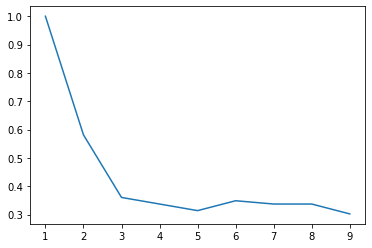

In [998]:
plt.plot(range(1,10),acc)

# 94) location_Yelahanka New Town

In [999]:
df94 = df[df['location_Yelahanka New Town']==1]

In [1000]:
df94 = df94[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [1001]:
df94

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
7042     1      2.0   3300           650.0    1     5076.923077   
7043     1      1.0   2000           500.0    1     4000.000000   
7044     1      1.0   1650           440.0    1     3750.000000   
7045     2      1.0   1800           960.0    1     1875.000000   
7046     3      2.0   9200          1610.0    3     5714.285714   
7047     3      2.0   9000          1700.0    3     5294.117647   
7048     1      1.0   2000           650.0    1     3076.923077   
7049     1      1.0   1350           350.0    1     3857.142857   
7050     2      3.0   6500          1385.0    2     4693.140794   
7051     2      1.0   2400           500.0    1     4800.000000   
7052     1      1.0   1700           650.0    1     2615.384615   
7053     1      0.0   1600           450.0    1     3555.555556   
7054     2      2.0   5000           960.0    2     5208.333333   
7055     2      3.0   6500          1209.0    3     5376.344086   
7056     2      2.0   8000          1400.0    3     5714.285714   
7057     1      1.0   1500           450.0    1     3333.333333   
7058     1      1.0   1800           500.0    1     3600.000000   
7059     2      1.0   7500          1420.0    3     5281.690141   
7060     2      0.0  18000          2200.0    2     8181.818182   
7061     1      1.0   2000           488.0    1     4098.360656   
7062     2      1.0   5800          1100.0    2     5272.727273   
7063     1      2.0   3100           860.0    2     3604.651163   
7064     2      1.0   4400          1000.0    2     4400.000000   
7065     1      1.0   1800           650.0    1     2769.230769   
7066     3      2.0  15000          1740.0    3     8620.689655   
7067     2      2.0   7000          1290.0    2     5426.356589   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
7042                              0                        1   
7043                              1                        0   
7044                              1                        0   
7045                              1                        0   
7046                              1                        0   
7047                              1                        0   
7048                              1                        0   
7049                              0                        1   
7050                              1                        0   
7051                              1                        0   
7052                              0                        1   
7053                              0                        1   
7054                              1                        0   
7055                              0                        1   
7056                              1                        0   
7057                              1                        0   
7058                              1                        0   
7059                              1                        0   
7060                              0                        0   
7061                              0                        1   
7062                              1                        0   
7063                              0                        1   
7064                              0                        1   
7065                              1                        0   
7066                              0                        0   
7067                              0                        1   

      area_typePlot  Area  availability_Ready To Move  
7042                    0                           1  
7043                    0                           1  
7044                    0                           1  
7045                    0                           1  
7046                    0                           1  
7047                    0                           1  
7048                    0                           1  
7049               

In [1002]:
df94.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.421100  0.737191        0.820556   
balcony                        0.421100  1.000000  0.199285        0.326977   
price                          0.737191  0.199285  1.000000        0.939070   
total_sqft_int                 0.820556  0.326977  0.939070        1.000000   
bhk                            0.811722  0.558476  0.737549        0.827871   
price_per_sqft                 0.665939  0.250896  0.912228        0.769455   
area_typeSuper built-up  Area  0.137290  0.024349 -0.166865       -0.041520   
area_typeBuilt-up  Area       -0.344934  0.059001 -0.270082       -0.286517   
area_typePlot  Area            0.361287 -0.150482  0.791570        0.588514   
availability_Ready To Move    -0.102398  0.104257 -0.119364       -0.184408   

                                    bhk  price_per_sqft  \
bath                           0.811722        0.665939   
balcony                        0.558476        0.250896   
price                          0.737549        0.912228   
total_sqft_int                 0.827871        0.769455   
bhk                            1.000000        0.685595   
price_per_sqft                 0.685595        1.000000   
area_typeSuper built-up  Area  0.003690       -0.227626   
area_typeBuilt-up  Area       -0.157130       -0.175213   
area_typePlot  Area            0.273690        0.734848   
availability_Ready To Move    -0.312870       -0.093001   

                               area_typeSuper built-up  Area  \
bath                                                0.137290   
balcony                                             0.024349   
price                                              -0.166865   
total_sqft_int                                     -0.041520   
bhk                                                 0.003690   
price_per_sqft                                     -0.227626   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.849662   
area_typePlot  Area                                -0.337100   
availability_Ready To Move                         -0.171270   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.344934             0.361287   
balcony                                       0.059001            -0.150482   
price                                        -0.270082             0.791570   
total_sqft_int                               -0.286517             0.588514   
bhk                                          -0.157130             0.273690   
price_per_sqft                               -0.175213             0.734848   
area_typeSuper built-up  Area                -0.849662            -0.337100   
area_typeBuilt-up  Area                       1.000000            -0.210042   
area_typePlot  Area                          -0.210042             1.000000   
availability_Ready To Move                    0.145521             0.057735   

                               availability_Ready To Move  
bath                                            -0.102398  
balcony                                          0.104257  
price                                           -0.119364  
total_sqft_int                                  -0.184408  
bhk                                             -0.312870  
price_per_sqft                                  -0.093001  
area_typeSuper built-up  Area                   -0.171270  
area_typeBuilt-up  Area                          0.145521  
area_typePlot  Area                              0.057735  
availability_Ready To Move                       1.000000

In [1003]:
x = df94[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df94[['price']]

In [1004]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.5]
k= 3 [1.0, 0.5, 0.34615384615384615]
k= 4 [1.0, 0.5, 0.34615384615384615, 0.19230769230769232]
k= 5 [1.0, 0.5, 0.34615384615384615, 0.19230769230769232, 0.15384615384615385]
k= 6 [1.0, 0.5, 0.34615384615384615, 0.19230769230769232, 0.15384615384615385, 0.19230769230769232]
k= 7 [1.0, 0.5, 0.34615384615384615, 0.19230769230769232, 0.15384615384615385, 0.19230769230769232, 0.19230769230769232]
k= 8 [1.0, 0.5, 0.34615384615384615, 0.19230769230769232, 0.15384615384615385, 0.19230769230769232, 0.19230769230769232, 0.19230769230769232]
k= 9 [1.0, 0.5, 0.34615384615384615, 0.19230769230769232, 0.15384615384615385, 0.19230769230769232, 0.19230769230769232, 0.19230769230769232, 0.19230769230769232]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [1005]:
max(acc)

1.0

In [1006]:
k = acc.index(max(acc))+1
k

1

In [1007]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


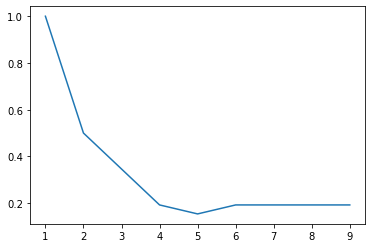

In [1008]:
plt.plot(range(1,10),acc)

# 95) location_Yeshwanthpur

In [1009]:
df95 = df[df['location_Yeshwanthpur']==1]

In [1010]:
df95 = df95[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [1011]:
df95

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
7081     3  3.000000  10800          1693.0    3     6379.208506   
7082     1  1.000000   3685           667.0    1     5524.737631   
7083     4  0.000000  13000          1950.0    4     6666.666667   
7084     1  1.000000   3685           665.0    1     5541.353383   
7085     1  1.000000   3685           671.0    1     5491.803279   
7086     2  0.000000   9581          1277.5    2     7500.195695   
7087     1  1.000000   3685           668.0    1     5516.467066   
7088     2  2.000000   7584          1185.0    2     6400.000000   
7089     3  1.000000   9600          1313.0    3     7311.500381   
7090     2  2.000000  10000          1400.0    2     7142.857143   
7091     1  1.000000   3685           673.0    1     5475.482912   
7092     2  0.000000   4947           717.0    2     6900.278940   
7093     5  1.584376  22000          3600.0    4     6111.111111   
7094     1  0.000000   4174           605.0    1     6900.000000   
7095     1  1.000000   3685           669.0    1     5508.221226   
7096     1  1.000000   3685           670.0    1     5500.000000   
7097     2  2.000000   8000          1240.0    2     6451.612903   
7098     3  2.000000  11000          1713.0    3     6421.482779   
7099     2  2.000000   6700          1144.0    2     5856.643357   
7100     2  0.000000  10000          1362.0    2     7342.143906   
7101     1  1.000000   3679           666.0    1     5525.525526   
7102     3  3.000000  14000          1855.0    3     7547.169811   
7103     2  1.000000   8500          1165.0    2     7296.137339   
7104     3  2.000000  14500          1825.0    3     7945.205479   
7105     2  0.000000   5467           994.0    1     5500.000000   
7106     1  0.000000   4000           650.0    1     6153.846154   
7107     3  3.000000  14000          1855.0    3     7547.169811   
7108     3  1.000000  10000          1500.0    3     6666.666667   
7109     1  1.000000   3685           674.0    1     5467.359050   
7110     1  1.000000   3685           672.0    1     5483.630952   
7111     3  3.000000  10800          1692.0    3     6382.978723   
7112     5  2.000000  18500          2500.0    6     7400.000000   
7113     3  3.000000  13500          1855.0    3     7277.628032   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
7081                              1                        0   
7082                              1                        0   
7083                              1                        0   
7084                              1                        0   
7085                              1                        0   
7086                              1                        0   
7087                              1                        0   
7088                              1                        0   
7089                              1                        0   
7090                              1                        0   
7091                              1                        0   
7092                              1                        0   
7093                              1                        0   
7094                              1                        0   
7095                              1                        0   
7096                              1                        0   
7097                              1                        0   
7098                              1                        0   
7099                              1                        0   
7100                              0                        0   
7101                              1                        0   
7102                              1                        0   
7103                              1                        0   
7104                              1                        0   
7105                              1                        0   
7106                         

In [1012]:
df95.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.419001  0.949522        0.947352   
balcony                        0.419001  1.000000  0.494479        0.479199   
price                          0.949522  0.494479  1.000000        0.979954   
total_sqft_int                 0.947352  0.479199  0.979954        1.000000   
bhk                            0.966833  0.449921  0.911721        0.880122   
price_per_sqft                 0.574848  0.253265  0.661224        0.514493   
area_typeSuper built-up  Area -0.143985  0.213587 -0.161167       -0.114537   
area_typeBuilt-up  Area        0.190485 -0.084127  0.151701        0.119469   
area_typePlot  Area           -0.023674 -0.241097  0.059126        0.025790   
availability_Ready To Move    -0.353525 -0.249527 -0.203652       -0.233215   

                                    bhk  price_per_sqft  \
bath                           0.966833        0.574848   
balcony                        0.449921        0.253265   
price                          0.911721        0.661224   
total_sqft_int                 0.880122        0.514493   
bhk                            1.000000        0.625537   
price_per_sqft                 0.625537        1.000000   
area_typeSuper built-up  Area -0.236626       -0.212943   
area_typeBuilt-up  Area        0.298202        0.111030   
area_typePlot  Area           -0.018245        0.202569   
availability_Ready To Move    -0.352742       -0.097717   

                               area_typeSuper built-up  Area  \
bath                                               -0.143985   
balcony                                             0.213587   
price                                              -0.161167   
total_sqft_int                                     -0.114537   
bhk                                                -0.236626   
price_per_sqft                                     -0.212943   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.803219   
area_typePlot  Area                                -0.559017   
availability_Ready To Move                         -0.149071   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.190485            -0.023674   
balcony                                      -0.084127            -0.241097   
price                                         0.151701             0.059126   
total_sqft_int                                0.119469             0.025790   
bhk                                           0.298202            -0.018245   
price_per_sqft                                0.111030             0.202569   
area_typeSuper built-up  Area                -0.803219            -0.559017   
area_typeBuilt-up  Area                       1.000000            -0.044901   
area_typePlot  Area                          -0.044901             1.000000   
availability_Ready To Move                    0.119737             0.083333   

                               availability_Ready To Move  
bath                                            -0.353525  
balcony                                         -0.249527  
price                                           -0.203652  
total_sqft_int                                  -0.233215  
bhk                                             -0.352742  
price_per_sqft                                  -0.097717  
area_typeSuper built-up  Area                   -0.149071  
area_typeBuilt-up  Area                          0.119737  
area_typePlot  Area                              0.083333  
availability_Ready To Move                       1.000000

In [1013]:
x = df95[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df95[['price']]

In [1014]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6060606060606061]
k= 3 [1.0, 0.6060606060606061, 0.5757575757575758]
k= 4 [1.0, 0.6060606060606061, 0.5757575757575758, 0.48484848484848486]
k= 5 [1.0, 0.6060606060606061, 0.5757575757575758, 0.48484848484848486, 0.45454545454545453]
k= 6 [1.0, 0.6060606060606061, 0.5757575757575758, 0.48484848484848486, 0.45454545454545453, 0.45454545454545453]
k= 7 [1.0, 0.6060606060606061, 0.5757575757575758, 0.48484848484848486, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453]
k= 8 [1.0, 0.6060606060606061, 0.5757575757575758, 0.48484848484848486, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.42424242424242425]
k= 9 [1.0, 0.6060606060606061, 0.5757575757575758, 0.48484848484848486, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.42424242424242425, 0.36363636363636365]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [1015]:
max(acc)

1.0

In [1016]:
k = acc.index(max(acc))+1
k

1

In [1017]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


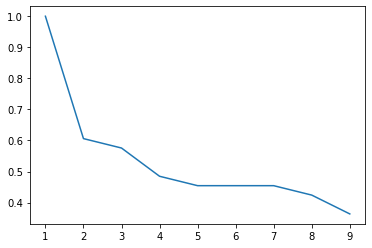

In [1018]:
plt.plot(range(1,10),acc)

# 96) location_5th Phase JP Nagar

In [1019]:
df96 = df[df['location_5th Phase JP Nagar']==1]

In [1020]:
df96 = df96[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [1021]:
df96

bath   balcony  price  total_sqft_int  bhk  price_per_sqft  \
101     2  2.000000   6000          1075.0    2     5581.395349   
102     3  3.000000   5250          1150.0    2     4565.217391   
103     2  1.000000   6280          1256.0    2     5000.000000   
104     2  2.000000   6300          1207.0    2     5219.552610   
105     2  2.000000  10000          1725.0    3     5797.101449   
106     2  2.000000   6000          1440.0    2     4166.666667   
107     2  3.000000  10000          1700.0    3     5882.352941   
108     5  1.584376  11000          2500.0    5     4400.000000   
109     1  1.000000   3000           600.0    1     5000.000000   
110     2  2.000000   6500          1390.0    2     4676.258993   
111     2  1.000000   6280          1256.0    2     5000.000000   
112     2  0.000000   4800          1000.0    2     4800.000000   
113     2  1.000000   7500          1350.0    3     5555.555556   
114     1  1.000000   2350           552.0    1     4257.246377   
115     2  2.000000   5100          1200.0    2     4250.000000   
116     2  2.000000   5700          1030.0    2     5533.980583   
117     2  1.000000   6800          1200.0    2     5666.666667   
118     2  2.000000   6180          1190.0    2     5193.277311   
119     5  2.000000  17000          4000.0    5     4250.000000   
120     2  1.000000   5300          1080.0    2     4907.407407   
121     2  2.000000   5400          1041.0    2     5187.319885   
122     2  1.000000   4200           812.0    2     5172.413793   
123     2  2.000000   5700          1010.0    2     5643.564356   
124     2  2.000000   6000          1075.0    2     5581.395349   

     area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
101                              1                        0   
102                              0                        1   
103                              0                        1   
104                              1                        0   
105                              0                        1   
106                              1                        0   
107                              0                        1   
108                              1                        0   
109                              0                        1   
110                              1                        0   
111                              0                        1   
112                              1                        0   
113                              1                        0   
114                              1                        0   
115                              1                        0   
116                              0                        1   
117                              1                        0   
118                              0                        1   
119                              1                        0   
120                              1                        0   
121                              1                        0   
122                              1                        0   
123                              0                        1   
124                              1                        0   

     area_typePlot  Area  availability_Ready To Move  
101                    0                           1  
102                    0                           1  
103                    0                           1  
104                    0                           1  
105                    0                           1  
106                    0                           1  
107                    0                           1  
108                    0                           1  
109                    0                           1  
110                    0                           1  
111                    0                           1  
112                    0                           1  
113                    0              

In [1022]:
df96.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.234297  0.801064        0.872136   
balcony                        0.234297  1.000000  0.315040        0.259411   
price                          0.801064  0.315040  1.000000        0.966118   
total_sqft_int                 0.872136  0.259411  0.966118        1.000000   
bhk                            0.906584  0.209162  0.920538        0.915361   
price_per_sqft                -0.346865  0.114091 -0.020970       -0.264820   
area_typeSuper built-up  Area  0.176961 -0.271349  0.032641        0.130586   
area_typeBuilt-up  Area       -0.176961  0.271349 -0.032641       -0.130586   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move          NaN       NaN       NaN             NaN   

                                    bhk  price_per_sqft  \
bath                           0.906584       -0.346865   
balcony                        0.209162        0.114091   
price                          0.920538       -0.020970   
total_sqft_int                 0.915361       -0.264820   
bhk                            1.000000       -0.122197   
price_per_sqft                -0.122197        1.000000   
area_typeSuper built-up  Area  0.149663       -0.347478   
area_typeBuilt-up  Area       -0.149663        0.347478   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move          NaN             NaN   

                               area_typeSuper built-up  Area  \
bath                                                0.176961   
balcony                                            -0.271349   
price                                               0.032641   
total_sqft_int                                      0.130586   
bhk                                                 0.149663   
price_per_sqft                                     -0.347478   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                               NaN   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.176961                  NaN   
balcony                                       0.271349                  NaN   
price                                        -0.032641                  NaN   
total_sqft_int                               -0.130586                  NaN   
bhk                                          -0.149663                  NaN   
price_per_sqft                                0.347478                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                         NaN                  NaN   

                               availability_Ready To Move  
bath                                                  NaN  
balcony                                               NaN  
price                                                 NaN  
total_sqft_int                                        NaN  
bhk                                                   NaN  
price_per_sqft                                        NaN  
area_typeSuper built-up  Area                         NaN  
area_typeBuilt-up  Area                               NaN  
area_typePlot  Area                                   NaN  
availability_Ready To Move                            NaN

In [1023]:
x = df96[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df96[['price']]

In [1024]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6666666666666666]
k= 3 [1.0, 0.6666666666666666, 0.4583333333333333]
k= 4 [1.0, 0.6666666666666666, 0.4583333333333333, 0.4166666666666667]
k= 5 [1.0, 0.6666666666666666, 0.4583333333333333, 0.4166666666666667, 0.3333333333333333]
k= 6 [1.0, 0.6666666666666666, 0.4583333333333333, 0.4166666666666667, 0.3333333333333333, 0.25]
k= 7 [1.0, 0.6666666666666666, 0.4583333333333333, 0.4166666666666667, 0.3333333333333333, 0.25, 0.25]
k= 8 [1.0, 0.6666666666666666, 0.4583333333333333, 0.4166666666666667, 0.3333333333333333, 0.25, 0.25, 0.25]
k= 9 [1.0, 0.6666666666666666, 0.4583333333333333, 0.4166666666666667, 0.3333333333333333, 0.25, 0.25, 0.25, 0.20833333333333334]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [1025]:
max(acc)

1.0

In [1026]:
k = acc.index(max(acc))+1
k

1

In [1027]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


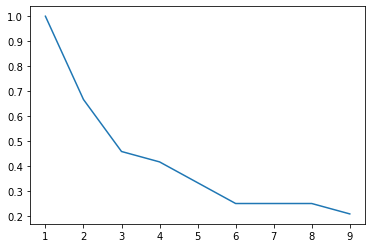

In [1028]:
plt.plot(range(1,10),acc)

# 97) location_7th Phase JP Nagar

In [1029]:
df97 = df[df['location_7th Phase JP Nagar']==1]

In [1030]:
df97 = df97[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [1031]:
df97

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
144     2      2.0   7200          1080.0    2     6666.666667   
145     2      2.0   9300          1270.0    2     7322.834646   
146     2      1.0  10000          1420.0    3     7042.253521   
147     3      1.0  15000          1850.0    3     8108.108108   
148     2      1.0   9400          1245.0    2     7550.200803   
..    ...      ...    ...             ...  ...             ...   
225     2      1.0  10200          1430.0    3     7132.867133   
226     2      1.0   6000          1128.0    2     5319.148936   
227     2      1.0   5700          1140.0    2     5000.000000   
228     3      2.0   9000          1420.0    3     6338.028169   
229     2      1.0  10800          1530.0    2     7058.823529   

     area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
144                              0                        1   
145                              1                        0   
146                              0                        1   
147                              0                        1   
148                              0                        1   
..                             ...                      ...   
225                              1                        0   
226                              1                        0   
227                              0                        1   
228                              1                        0   
229                              1                        0   

     area_typePlot  Area  availability_Ready To Move  
144                    0                           1  
145                    0                           1  
146                    0                           1  
147                    0                           1  
148                    0                           1  
..                   ...                         ...  
225                    0                           1  
226                    0                           1  
227                    0                           1  
228                    0                           1  
229                    0                           1  

[86 rows x 10 columns]

In [1032]:
df97.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.251358  0.743134        0.786562   
balcony                        0.251358  1.000000  0.207981        0.206202   
price                          0.743134  0.207981  1.000000        0.954531   
total_sqft_int                 0.786562  0.206202  0.954531        1.000000   
bhk                            0.740436  0.241466  0.811115        0.846288   
price_per_sqft                 0.402677  0.166471  0.759399        0.542968   
area_typeSuper built-up  Area  0.201246  0.122793  0.203589        0.258536   
area_typeBuilt-up  Area       -0.132169 -0.099009 -0.175743       -0.230932   
area_typePlot  Area           -0.267830 -0.096761 -0.118360       -0.122149   
availability_Ready To Move    -0.270314  0.283481 -0.283980       -0.368289   

                                    bhk  price_per_sqft  \
bath                           0.740436        0.402677   
balcony                        0.241466        0.166471   
price                          0.811115        0.759399   
total_sqft_int                 0.846288        0.542968   
bhk                            1.000000        0.503826   
price_per_sqft                 0.503826        1.000000   
area_typeSuper built-up  Area  0.180718        0.056601   
area_typeBuilt-up  Area       -0.105683       -0.033428   
area_typePlot  Area           -0.287716       -0.088919   
availability_Ready To Move    -0.195288        0.000986   

                               area_typeSuper built-up  Area  \
bath                                                0.201246   
balcony                                             0.122793   
price                                               0.203589   
total_sqft_int                                      0.258536   
bhk                                                 0.180718   
price_per_sqft                                      0.056601   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -0.963188   
area_typePlot  Area                                -0.218520   
availability_Ready To Move                         -0.109628   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                         -0.132169            -0.267830   
balcony                                      -0.099009            -0.096761   
price                                        -0.175743            -0.118360   
total_sqft_int                               -0.230932            -0.122149   
bhk                                          -0.105683            -0.287716   
price_per_sqft                               -0.033428            -0.088919   
area_typeSuper built-up  Area                -0.963188            -0.218520   
area_typeBuilt-up  Area                       1.000000            -0.051856   
area_typePlot  Area                          -0.051856             1.000000   
availability_Ready To Move                    0.105593             0.023956   

                               availability_Ready To Move  
bath                                            -0.270314  
balcony                                          0.283481  
price                                           -0.283980  
total_sqft_int                                  -0.368289  
bhk                                             -0.195288  
price_per_sqft                                   0.000986  
area_typeSuper built-up  Area                   -0.109628  
area_typeBuilt-up  Area                          0.105593  
area_typePlot  Area                              0.023956  
availability_Ready To Move                       1.000000

In [1033]:
x = df97[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df97[['price']]

In [1034]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

k= 1 [1.0]
k= 2 [1.0, 0.6162790697674418]
k= 3 [1.0, 0.6162790697674418, 0.47674418604651164]
k= 4 [1.0, 0.6162790697674418, 0.47674418604651164, 0.37209302325581395]
k= 5 [1.0, 0.6162790697674418, 0.47674418604651164, 0.37209302325581395, 0.37209302325581395]
k= 6 [1.0, 0.6162790697674418, 0.47674418604651164, 0.37209302325581395, 0.37209302325581395, 0.3488372093023256]
k= 7 [1.0, 0.6162790697674418, 0.47674418604651164, 0.37209302325581395, 0.37209302325581395, 0.3488372093023256, 0.27906976744186046]
k= 8 [1.0, 0.6162790697674418, 0.47674418604651164, 0.37209302325581395, 0.37209302325581395, 0.3488372093023256, 0.27906976744186046, 0.27906976744186046]
k= 9 [1.0, 0.6162790697674418, 0.47674418604651164, 0.37209302325581395, 0.37209302325581395, 0.3488372093023256, 0.27906976744186046, 0.27906976744186046, 0.2558139534883721]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [1035]:
max(acc)

1.0

In [1036]:
k = acc.index(max(acc))+1
k

1

In [1037]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


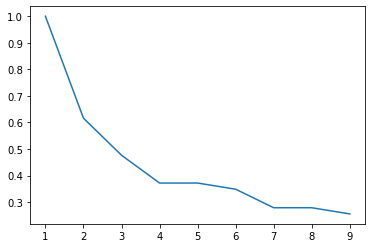

In [1038]:
plt.plot(range(1,10),acc)

# 98) location_8th Phase JP Nagar

In [1049]:
df98 = df[df['location_8th Phase JP Nagar']==1]

In [1050]:
df98 = df98[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move']]

In [1051]:
df98

bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
231     2      0.0   5400          1073.5    2     5030.740568   
232     2      1.0   4247          1062.0    2     3999.058380   
233     3      2.0   7331          1455.0    3     5038.487973   
234     2      1.0   4391          1098.0    2     3999.089253   
235     3      1.0   8000          1800.0    3     4444.444444   
236     4      2.0  13000          2700.0    4     4814.814815   
237     2      2.0   3800          1080.0    2     3518.518519   
238     2      2.0   3450          1059.0    2     3257.790368   
239     2      2.0   3500          1080.0    2     3240.740741   
240     2      1.0   4247          1062.0    2     3999.058380   
241     1      1.0   3100           500.0    1     6200.000000   
242     2      2.0   3500          1100.0    2     3181.818182   
243     4      3.0   9200          2100.0    4     4380.952381   
244     2      1.0   3933          1035.0    2     3800.000000   
245     2      1.0   4090           909.0    2     4499.449945   
246     3      0.0   7202          1431.5    3     5031.086273   
247     4      1.0   9000          1900.0    3     4736.842105   
248     1      1.0   3000           500.0    1     6000.000000   
249     2      2.0   3694          1125.0    2     3283.555556   
250     2      3.0   3500          1100.0    2     3181.818182   
251     2      1.0   4355          1089.0    2     3999.081726   
252     2      2.0   6500          1605.0    3     4049.844237   
253     2      2.0   8300          1504.0    3     5518.617021   
254     4      2.0  11500          2600.0    4     4423.076923   
255     2      1.0   4355          1089.0    2     3999.081726   
256     2      3.0   6200          1513.0    2     4097.818903   
257     2      1.0   5900          1298.0    2     4545.454545   
258     2      0.0   4400          1006.0    2     4373.757455   
259     2      1.0   5900          1245.0    2     4738.955823   
260     2      3.0   8000          1510.0    2     5298.013245   
261     3      2.0  16500          3300.0    3     5000.000000   
262     2      1.0   4800          1046.0    2     4588.910134   
263     3      2.0   8000          1408.0    3     5681.818182   

     area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
231                              1                        0   
232                              1                        0   
233                              1                        0   
234                              1                        0   
235                              1                        0   
236                              0                        1   
237                              1                        0   
238                              1                        0   
239                              1                        0   
240                              1                        0   
241                              1                        0   
242                              1                        0   
243                              1                        0   
244                              1                        0   
245                              1                        0   
246                              1                        0   
247                              0                        1   
248                              1                        0   
249                              1                        0   
250                              1                        0   
251                              1                        0   
252                              1                        0   
253                              1                        0   
254                              0                        1   
255                              1                        0   
256                              1                        0   
257                              0                        1

In [1052]:
df98.corr()

bath   balcony     price  total_sqft_int  \
bath                           1.000000  0.208967  0.762999        0.806178   
balcony                        0.208967  1.000000  0.261594        0.352907   
price                          0.762999  0.261594  1.000000        0.961086   
total_sqft_int                 0.806178  0.352907  0.961086        1.000000   
bhk                            0.920643  0.293759  0.794386        0.832248   
price_per_sqft                 0.053013 -0.219776  0.361738        0.103829   
area_typeSuper built-up  Area -0.478478  0.162215 -0.363618       -0.381095   
area_typeBuilt-up  Area        0.478478 -0.162215  0.363618        0.381095   
area_typePlot  Area                 NaN       NaN       NaN             NaN   
availability_Ready To Move     0.270082  0.128190  0.345266        0.401749   

                                    bhk  price_per_sqft  \
bath                           0.920643        0.053013   
balcony                        0.293759       -0.219776   
price                          0.794386        0.361738   
total_sqft_int                 0.832248        0.103829   
bhk                            1.000000        0.076987   
price_per_sqft                 0.076987        1.000000   
area_typeSuper built-up  Area -0.367844       -0.083556   
area_typeBuilt-up  Area        0.367844        0.083556   
area_typePlot  Area                 NaN             NaN   
availability_Ready To Move     0.316196       -0.101880   

                               area_typeSuper built-up  Area  \
bath                                               -0.478478   
balcony                                             0.162215   
price                                              -0.363618   
total_sqft_int                                     -0.381095   
bhk                                                -0.367844   
price_per_sqft                                     -0.083556   
area_typeSuper built-up  Area                       1.000000   
area_typeBuilt-up  Area                            -1.000000   
area_typePlot  Area                                      NaN   
availability_Ready To Move                         -0.340693   

                               area_typeBuilt-up  Area  area_typePlot  Area  \
bath                                          0.478478                  NaN   
balcony                                      -0.162215                  NaN   
price                                         0.363618                  NaN   
total_sqft_int                                0.381095                  NaN   
bhk                                           0.367844                  NaN   
price_per_sqft                                0.083556                  NaN   
area_typeSuper built-up  Area                -1.000000                  NaN   
area_typeBuilt-up  Area                       1.000000                  NaN   
area_typePlot  Area                                NaN                  NaN   
availability_Ready To Move                    0.340693                  NaN   

                               availability_Ready To Move  
bath                                             0.270082  
balcony                                          0.128190  
price                                            0.345266  
total_sqft_int                                   0.401749  
bhk                                              0.316196  
price_per_sqft                                  -0.101880  
area_typeSuper built-up  Area                   -0.340693  
area_typeBuilt-up  Area                          0.340693  
area_typePlot  Area                                   NaN  
availability_Ready To Move                       1.000000

In [1053]:
x = df98[['bath', 'balcony', 'total_sqft_int', 'bhk',
       'price_per_sqft', 'area_typeSuper built-up  Area',
       'area_typeBuilt-up  Area', 'area_typePlot  Area',
       'availability_Ready To Move']]
y = df98[['price']]

In [1054]:
acc = []
for i in range(1,10):
    knn = sn.KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(x,y)
    predy = model.predict(x)
    acc.append(sm.accuracy_score(predy,y['price']))
    print('k=',i,acc)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k= 1 [1.0]
k= 2 [1.0, 0.5757575757575758]
k= 3 [1.0, 0.5757575757575758, 0.45454545454545453]
k= 4 [1.0, 0.5757575757575758, 0.45454545454545453, 0.3939393939393939]
k= 5 [1.0, 0.5757575757575758, 0.45454545454545453, 0.3939393939393939, 0.30303030303030304]
k= 6 [1.0, 0.5757575757575758, 0.45454545454545453, 0.3939393939393939, 0.30303030303030304, 0.2727272727272727]
k= 7 [1.0, 0.5757575757575758, 0.45454545454545453, 0.3939393939393939, 0.30303030303030304, 0.2727272727272727, 0.2727272727272727]
k= 8 [1.0, 0.5757575757575758, 0.45454545454545453, 0.3939393939393939, 0.30303030303030304, 0.2727272727272727, 0.2727272727272727, 0.2727272727272727]
k= 9 [1.0, 0.5757575757575758, 0.45454545454545453, 0.3939393939393939, 0.30303030303030304, 0.2727272727272727, 0.2727272727272727, 0.2727272727272727, 0.24242424242424243]


C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [1055]:
max(acc)

1.0

In [1056]:
k = acc.index(max(acc))+1
k

1

In [1057]:
knn = sn.KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x,y)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


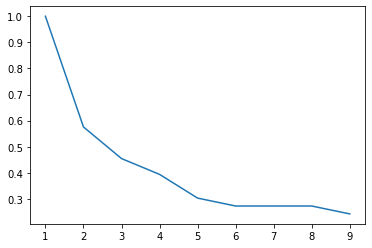

In [1058]:
plt.plot(range(1,10),acc)